In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

import shap
from sklearn.metrics import  RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, precision_recall_curve,auc, roc_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
# import SVC classifier
from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
import re
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import matplotlib
from sklearn.model_selection import RandomizedSearchCV
import sklearn
#from skopt import BayesSearchCV, space
import optuna
import optuna.study
from optuna import distributions
from optuna import integration
from optuna.study import create_study
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner
import joblib
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
청년가구 = pd.read_csv('청년가구_변수추가.csv', encoding='cp949')
청년가구.rename(columns = {'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':'target'}, inplace=True)

In [4]:
청년가구.columns = [
    'Cat_현재 거주 지역', 'Cat_현재 주택의 유형','Cat_현재 주택의 위치',
    '현재 주택 거주 기간(총 개월)','현재 무주택 기간(총 개월)',
    'Cat_현재 주택의 점유형태','Cat_현재 주택의 구조', '현재 주택의 면적(㎡)',
    'Cat_현재 상업시설 접근용이성', 'Cat_현재 의료시설 접근용이성',
    'Cat_현재 공공기관 접근용이성', 'Cat_현재 문화시설 접근용이성',
    'Cat_현재 도시공원 및 녹지 접근용이성', 'Cat_현재 대중교통 접근용이성',
    'Cat_현재 주차시설 이용편의성', 'Cat_현재 주변도로의 보행 안전',
    'Cat_현재 교육환경', 'Cat_현재 치안 및 범죄 등 방범 상태',
    'Cat_현재 자동차 경적/집주변의 소음 정도', 'Cat_현재 청소/쓰레기 처리상태',
    'Cat_현재 대기오염 정도', 'Cat_현재 주택에 대한 전반적인 만족도',
    '총 이사 횟수', 'Cat_이사 예상 기간','Cat_이사 계획 첫 번째 이유',
    'Cat_이사 계획 중인 거주 지역', 'Cat_이사 계획 중인 주택의 유형', 'Cat_이사 계획 중인 주택의 점유형태',
    'Cat_주택 보유 의식', 'Cat_현재 가장 필요한 주거지원 1순위',
    '가구주 나이','Cat_가구주 성별','Cat_가구주 주민등록상 등재 여부','Cat_가구주 동거 여부','Cat_가구주 장애 여부',
    '총 가구원 수','Cat_기초생활보장 수급가구 여부','Cat_소득 계층',
    '소득 대비 주택 임대료의 비율', '소득 중 근로/사업소득의 비중(월평균)',
    '소득 중 재산소득의 비중(월평균)', '소득 중 사회보험 수혜금의 비중(월평균)',
    '소득 중 정부 보조금의 비중(월평균)', '소득 중 사적이전소득의 비중(월평균)', 
    '소득 대비 생활비의 비율', '소득 대비 주거관리비의 비율',
    '자산 중 부동산 자산의 비중', '자산 중 금융자산의 비중', '자산 중 기타자산의 비중',
    '부채 중 금융기관 대출금의 비중', '부채 중 비금융기관 대출금의 비중', '부채 중 임대 보증금의 비중',
    '중기부채부담지표', '장기부채부담지표', 'Cat_가구주 최종 학력', 'Cat_가구주 종사상 지위',
    'target'    
]

In [5]:
cat = 청년가구.select_dtypes(include = 'object')

In [7]:
num = 청년가구.select_dtypes(exclude = 'object')
num_청년 = num.drop('target',axis=1)

In [8]:
scaler=RobustScaler()
scaler.fit(num_청년)
num_scaled_청년=scaler.transform(num_청년)
num_df_scaled_청년=pd.DataFrame(data=num_scaled_청년, columns=num_청년.columns)
num_df_scaled_청년

,현재 주택 거주 기간(총 개월),현재 무주택 기간(총 개월),현재 주택의 면적(㎡),총 이사 횟수,가구주 나이,총 가구원 수,소득 대비 주택 임대료의 비율,소득 중 근로/사업소득의 비중(월평균),소득 중 재산소득의 비중(월평균),소득 중 사회보험 수혜금의 비중(월평균),...,소득 대비 생활비의 비율,소득 대비 주거관리비의 비율,자산 중 부동산 자산의 비중,자산 중 금융자산의 비중,자산 중 기타자산의 비중,부채 중 금융기관 대출금의 비중,부채 중 비금융기관 대출금의 비중,부채 중 임대 보증금의 비중,중기부채부담지표,장기부채부담지표
0,1.5,4.880952,0.927927,3.0,1.0625,0.0,-0.128210,0.000000,0.0,0.0,...,0.000000,0.352499,0.0,0.00000,0.000000,0.0,0.0,0.0,-0.338164,-0.261905
1,1.0,4.857143,-0.069629,3.0,1.4375,0.0,0.400514,0.000000,0.0,0.0,...,-0.684298,-0.168586,0.0,0.00000,0.000000,100.0,0.0,0.0,151.811594,149.714286
2,1.5,4.285714,-0.867674,3.0,1.3125,0.0,-0.397808,0.000000,0.0,0.0,...,-0.611570,-0.410471,0.0,0.00000,0.000000,0.0,0.0,0.0,-0.328874,-0.252747
3,6.5,4.000000,-0.668163,3.0,1.0625,0.0,-0.360738,0.000000,0.0,0.0,...,-0.475207,-0.421466,0.0,0.00000,0.000000,100.0,0.0,0.0,108.333333,106.857143
4,0.5,4.023810,1.326949,3.0,1.1875,3.0,-0.255855,-0.074074,0.0,0.0,...,0.492807,0.349661,0.0,-3.12766,14.893617,0.0,100.0,0.0,53.985507,45.306991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8439,0.0,0.000000,0.325902,1.0,0.5625,0.0,-0.051289,0.000000,0.0,0.0,...,0.361157,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,-0.144928,-0.071429
8440,0.0,-0.285714,1.520874,1.0,1.3125,1.0,-0.315063,0.000000,0.0,0.0,...,-0.893388,-0.337173,0.0,-21.00000,100.000000,0.0,0.0,0.0,217.028986,-0.183673
8441,0.0,-0.238095,0.325902,0.0,1.1875,1.0,-1.000190,-0.285714,0.0,0.0,...,0.271547,0.927225,0.0,0.00000,0.000000,100.0,0.0,0.0,217.028986,214.000000
8442,0.0,-0.142857,2.317522,0.0,-0.1875,0.0,-1.000190,0.000000,0.0,0.0,...,-0.266116,0.379319,0.0,0.00000,0.000000,0.0,0.0,0.0,-0.217391,-0.142857


In [9]:
target = 청년가구.target

In [10]:
enc = OneHotEncoder()
enc.fit(cat)

X_cat = enc.transform(cat).toarray()
new_feature_names = enc.get_feature_names_out(cat.columns)
cat2 = pd.DataFrame(X_cat, columns= new_feature_names)

In [11]:
comp =pd.concat([num_df_scaled_청년, target,cat2],axis=1)

In [12]:
X =comp.drop('target', axis = 1)
y=comp.target
X.shape

(8444, 213)

In [13]:
def combine_one_hot(shap_values, name, mask, return_original=True):
    """  shap_values: an Explanation object
          name: name of new feature
          mask: bool array same lenght as features

         This function assumes that shap_values[:, mask] make up a one-hot-encoded feature
    """
    mask = np.array(mask)
    mask_col_names = np.array(shap_values.feature_names, dtype='object')[mask]

    sv_name = shap.Explanation(shap_values.values[:, mask],
                               feature_names=list(mask_col_names),
                               data=shap_values.data[:, mask],
                               base_values=shap_values.base_values,
                               display_data=shap_values.display_data,
                               instance_names=shap_values.instance_names,
                               output_names=shap_values.output_names,
                               output_indexes=shap_values.output_indexes,
                               lower_bounds=shap_values.lower_bounds,
                               upper_bounds=shap_values.upper_bounds,
                               main_effects=shap_values.main_effects,
                               hierarchical_values=shap_values.hierarchical_values,
                               clustering=shap_values.clustering,
                               )

    new_data = (sv_name.data * np.arange(sum(mask))).sum(axis=1).astype(int)

    svdata = np.concatenate([
        shap_values.data[:, ~mask],
        new_data.reshape(-1, 1)
    ], axis=1)

    if shap_values.display_data is None:
        svdd = shap_values.data[:, ~mask]
    else:
        svdd = shap_values.display_data[:, ~mask]

    svdisplay_data = np.concatenate([
        svdd,
        mask_col_names[new_data].reshape(-1, 1)
    ], axis=1)

    new_values = sv_name.values.sum(axis=1)
    svvalues = np.concatenate([
        shap_values.values[:, ~mask],
        new_values.reshape(-1, 1)
    ], axis=1)
    svfeature_names = list(np.array(shap_values.feature_names)[~mask]) + [name]

    sv = shap.Explanation(svvalues,
                          base_values=shap_values.base_values,
                          data=svdata,
                          display_data=svdisplay_data,
                          instance_names=shap_values.instance_names,
                          feature_names=svfeature_names,
                          output_names=shap_values.output_names,
                          output_indexes=shap_values.output_indexes,
                          lower_bounds=shap_values.lower_bounds,
                          upper_bounds=shap_values.upper_bounds,
                          main_effects=shap_values.main_effects,
                          hierarchical_values=shap_values.hierarchical_values,
                          clustering=shap_values.clustering,
                          )
    if return_original:
        return sv, sv_name
    else:
        return sv

In [14]:
import operator

class EarlyStoppingCallback(object):
    """Early stopping callback for Optuna."""

    def __init__(self, early_stopping_rounds: int, direction: str = "minimize"):
        self.early_stopping_rounds = early_stopping_rounds

        self._iter = 0

        if direction == "minimize":
            self._operator = operator.lt
            self._score = np.inf
        elif direction == "maximize":
            self._operator = operator.gt
            self._score = -np.inf
        else:
            ValueError(f"invalid direction: {direction}")

    def __call__(self, study, trial):
        """Do early stopping."""
        if self._operator(study.best_value, self._score):
            self._iter = 0
            self._score = study.best_value
        else:
            self._iter += 1

        if self._iter >= self.early_stopping_rounds:
            study.stop()

In [15]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [16]:
tuning_roc_auc_score=[]

In [17]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X)
shap_base_values = np.zeros_like(X)
shap_data = np.zeros_like(X)
skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X, y)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    base = DecisionTreeClassifier(random_state = 0)
    base.fit(X_train, y_train)
    base_proba = base.predict_proba(X_test)[:, 1]
    base_score[index] = roc_auc_score(y_test, base_proba)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result = optuna_search.fit(X_train, y_train) 
    result.best_estimator_.fit(X_train, y_train)      

    explainer = shap.TreeExplainer(result.best_estimator_)     
    
    shap_values_te = explainer(X_test, check_additivity = False)   
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
       
    y_train_pred_proba = result.best_estimator_.predict_proba(X_train)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train, y_train_pred_proba)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba = result.best_estimator_.predict_proba(X_test)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test, y_test_pred_proba)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.629202819956616
Train ROC_AUC: 0.775771766515353
TEST ROC_AUC: 0.7539683884671005

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.590578113702097
Train ROC_AUC: 0.7650044039078484
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6322363069414316
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7475963711135213

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.5944815392263195
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6651676738614547
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6413065024948602
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.630763134057971
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [18]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753]

In [19]:
new_shap_values = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X.columns)

In [20]:
new_shap_values_001,sv_주택유형 = combine_one_hot(new_shap_values, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values.feature_names])
new_shap_values_002,sv_점유형태 = combine_one_hot(new_shap_values_001, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_001.feature_names])
new_shap_values_003,sv_거주지 = combine_one_hot(new_shap_values_002, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_002.feature_names])
new_shap_values_004,sv_최종학력 = combine_one_hot(new_shap_values_003, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_003.feature_names])
new_shap_values_005,sv_종사상지위 = combine_one_hot(new_shap_values_004, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_004.feature_names])
new_shap_values_006,sv_국민기초생활보장급여여부 = combine_one_hot(new_shap_values_005, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_005.feature_names])
new_shap_values_007,sv_성별 = combine_one_hot(new_shap_values_006, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_006.feature_names])
new_shap_values_008,sv_주택구조 = combine_one_hot(new_shap_values_007, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_007.feature_names])
new_shap_values_009,sv_이사계획 = combine_one_hot(new_shap_values_008, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_008.feature_names])
new_shap_values_010,sv_소득계층 = combine_one_hot(new_shap_values_009, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_009.feature_names])
new_shap_values_011,sv_상업시설 = combine_one_hot(new_shap_values_010, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_010.feature_names])
new_shap_values_012,sv_의료시설 = combine_one_hot(new_shap_values_011, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_011.feature_names])
new_shap_values_013,sv_공공기관 = combine_one_hot(new_shap_values_012, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_012.feature_names])
new_shap_values_014,sv_문화시설 = combine_one_hot(new_shap_values_013, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_013.feature_names])
new_shap_values_015,sv_도시공원 = combine_one_hot(new_shap_values_014, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_014.feature_names])
new_shap_values_016,sv_대중교통 = combine_one_hot(new_shap_values_015, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_015.feature_names])
new_shap_values_017,sv_주차시설 = combine_one_hot(new_shap_values_016, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_016.feature_names])
new_shap_values_018,sv_보행안전 = combine_one_hot(new_shap_values_017, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_017.feature_names])
new_shap_values_019,sv_교육환경 = combine_one_hot(new_shap_values_018, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_018.feature_names])
new_shap_values_020,sv_방범상태 = combine_one_hot(new_shap_values_019, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_019.feature_names])
new_shap_values_021,sv_소음정도 = combine_one_hot(new_shap_values_020, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_020.feature_names])
new_shap_values_022,sv_청소상태 = combine_one_hot(new_shap_values_021, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_021.feature_names])
new_shap_values_023,sv_대기오염 = combine_one_hot(new_shap_values_022, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_022.feature_names])
new_shap_values_024,sv_주거지원 = combine_one_hot(new_shap_values_023, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_023.feature_names])
new_shap_values_025,sv_주택만족도 = combine_one_hot(new_shap_values_024, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_024.feature_names])
new_shap_values_026,sv_주택위치 = combine_one_hot(new_shap_values_025, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_025.feature_names])
new_shap_values_027,sv_이사예상기간 = combine_one_hot(new_shap_values_026, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_026.feature_names])
new_shap_values_028,sv_이사이유 = combine_one_hot(new_shap_values_027, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_027.feature_names])
new_shap_values_029,sv_이사지역 = combine_one_hot(new_shap_values_028, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_028.feature_names])
new_shap_values_030,sv_이사주택유형 = combine_one_hot(new_shap_values_029, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_029.feature_names])
new_shap_values_031,sv_주택보유의식 = combine_one_hot(new_shap_values_030, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_030.feature_names])
new_shap_values_032,sv_주민등록 = combine_one_hot(new_shap_values_031, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_031.feature_names])
new_shap_values_033,sv_동거여부 = combine_one_hot(new_shap_values_032, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_032.feature_names])
shap_values_0,sv_장애여부 = combine_one_hot(new_shap_values_033, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_033.feature_names])

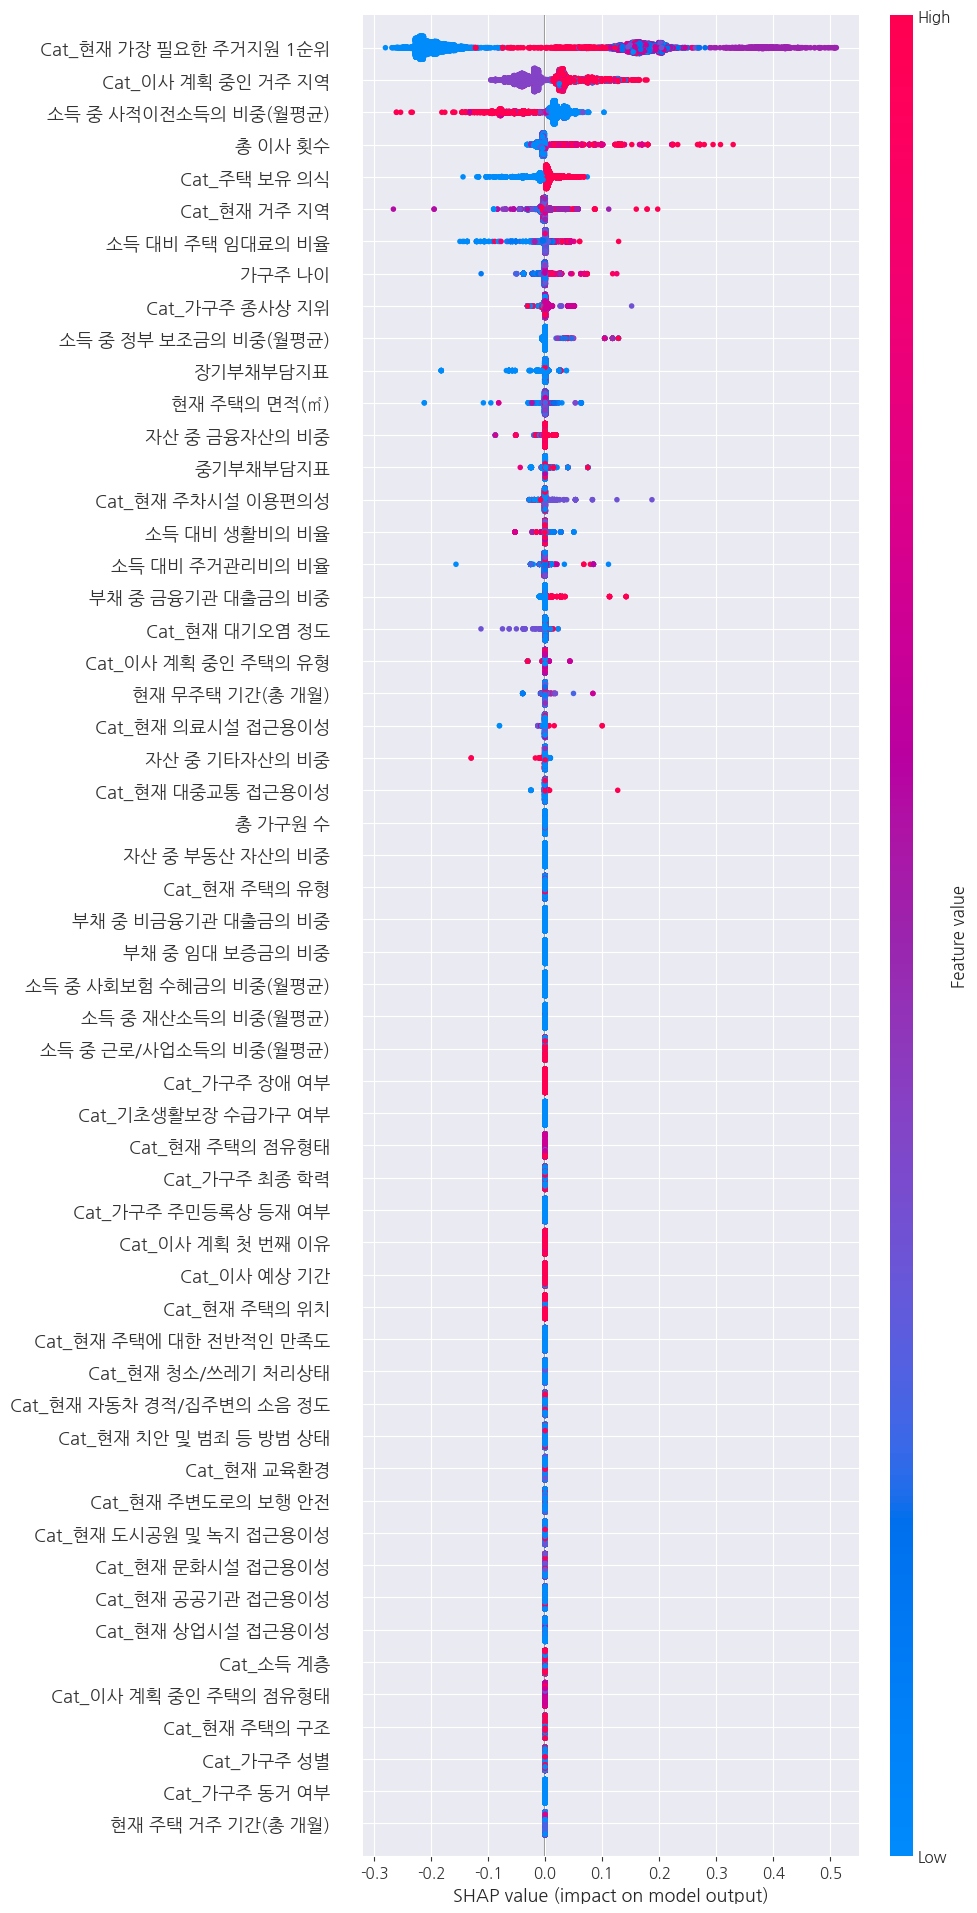

In [21]:
shap.initjs()
shap.plots.beeswarm(shap_values_0, max_display=57)

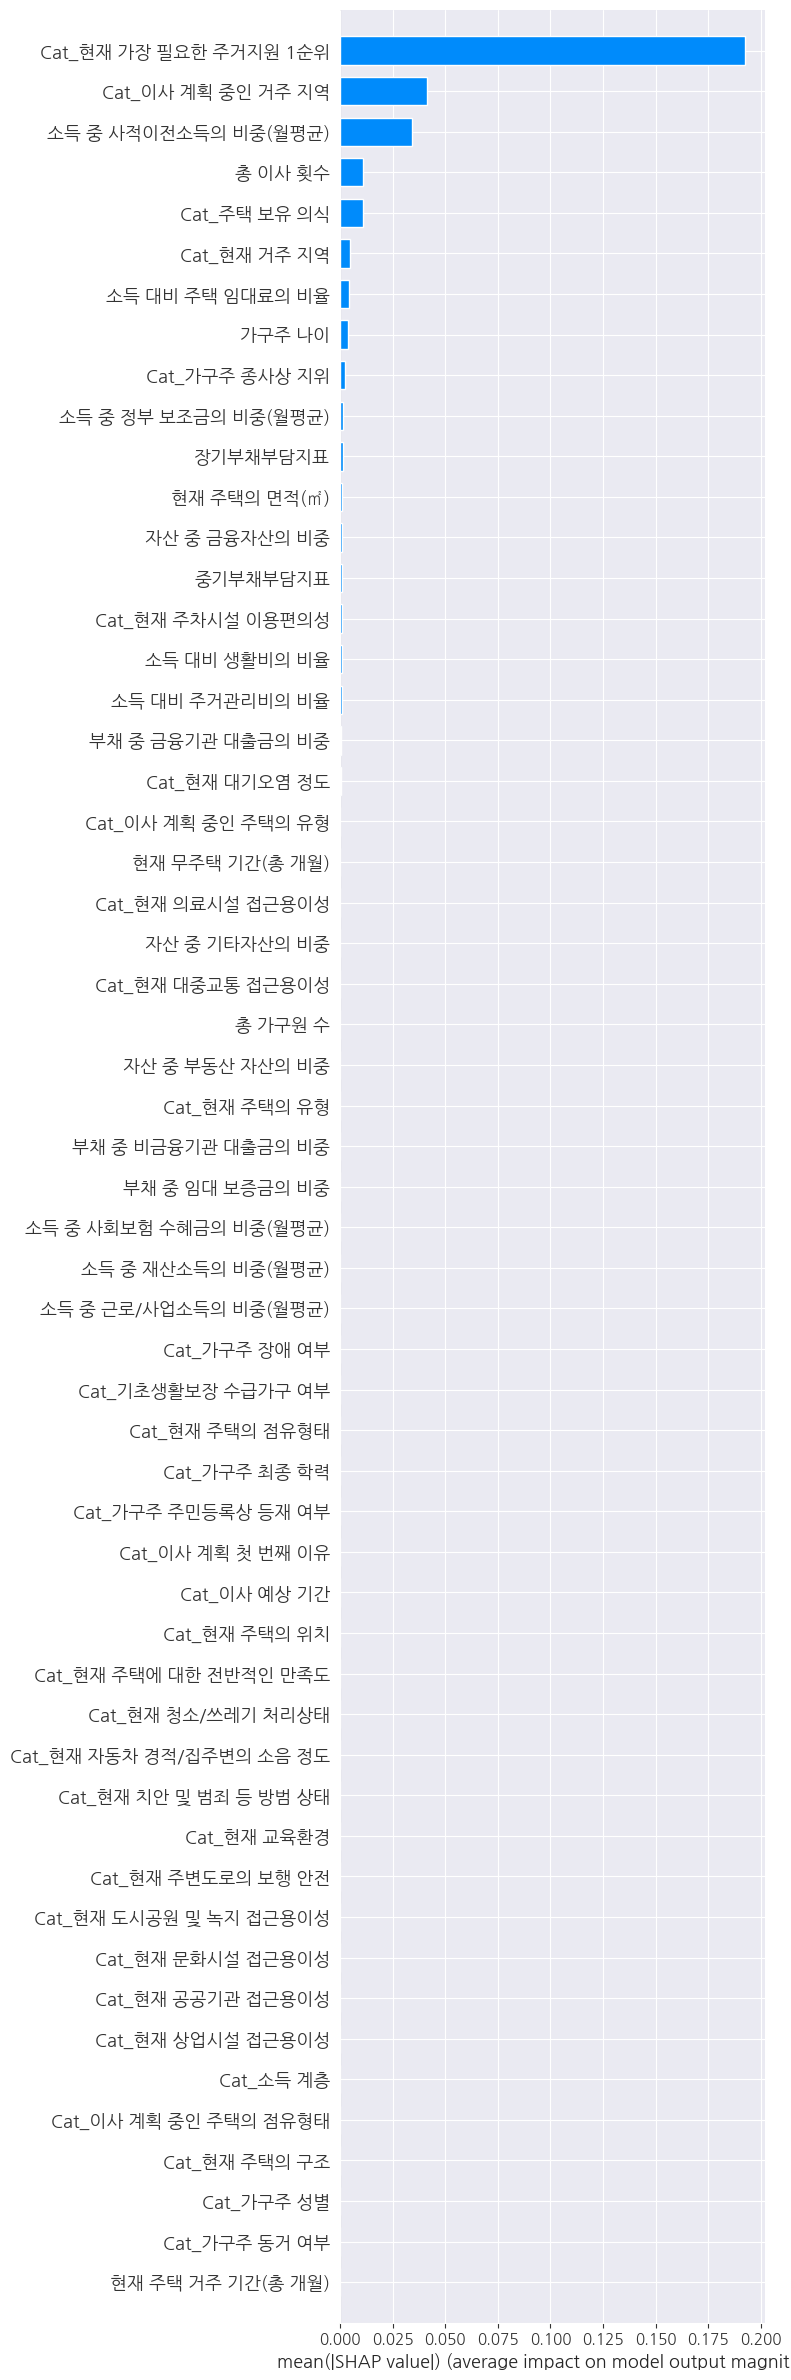

In [22]:
shap.initjs()
shap.summary_plot(shap_values_0, plot_type="bar",max_display=57)

In [23]:
mean_shap_values = np.mean(np.abs(shap_values_0.values), axis=0)
df_feature_importance = pd.DataFrame(list(zip(shap_values_0.feature_names, mean_shap_values)), columns=['feature','shap_importance'])
df_feature_importance = df_feature_importance.sort_values('shap_importance')
df_feature_importance = df_feature_importance.reset_index(drop=True)
df_feature_importance 

,feature,shap_importance
0,현재 주택 거주 기간(총 개월),0.000000
1,Cat_가구주 동거 여부,0.000000
2,Cat_가구주 성별,0.000000
3,Cat_현재 주택의 구조,0.000000
4,Cat_이사 계획 중인 주택의 점유형태,0.000000
5,Cat_소득 계층,0.000000
6,Cat_현재 상업시설 접근용이성,0.000000
7,Cat_현재 공공기관 접근용이성,0.000000
8,Cat_현재 문화시설 접근용이성,0.000000
9,Cat_현재 도시공원 및 녹지 접근용이성,0.000000


In [24]:
column_to_drop = df_feature_importance.loc[0, 'feature']
column_to_drop

'현재 주택 거주 기간(총 개월)'

In [25]:
if not column_to_drop.startswith('Cat_'):
    comp_1 = comp.drop(column_to_drop, axis=1)
    X_1 = comp_1.drop('target', axis=1)
    y_1 = comp_1['target']
else:
    comp_1 = comp.drop(comp.filter(regex='^' + column_to_drop).columns, axis=1)
    X_1 = comp_1.drop('target', axis=1)
    y_1 = comp_1['target']

print(X_1.shape)

(8444, 212)


In [26]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X_1)
shap_base_values = np.zeros_like(X_1)
shap_data = np.zeros_like(X_1)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_1, y_1)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_1, X_test_1 = X_1.iloc[train_index], X_1.iloc[test_index]
    y_train_1, y_test_1 = y_1.iloc[train_index], y_1.iloc[test_index]
    
    base_1 = DecisionTreeClassifier(random_state = 0)
    base_1.fit(X_train_1, y_train_1)
    base_proba_1 = base_1.predict_proba(X_test_1)[:, 1]
    base_score[index] = roc_auc_score(y_test_1, base_proba_1)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_1 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_1 = optuna_search_1.fit(X_train_1, y_train_1) 
    result_1.best_estimator_.fit(X_train_1, y_train_1)      

    explainer_1 = shap.TreeExplainer(result_1.best_estimator_) 
    shap_values_te_1 = explainer_1(X_test_1, check_additivity = False)
    shap_values[test_index,:] = shap_values_te_1[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te_1[:,:,1].base_values[:, np.newaxis], (1, X_1.shape[1]))
    shap_data[test_index,:] = shap_values_te_1[:,:,1].data
    
    
    y_train_pred_proba_1 = result_1.best_estimator_.predict_proba(X_train_1)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_1, y_train_pred_proba_1)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_1 = result_1.best_estimator_.predict_proba(X_test_1)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_1, y_test_pred_proba_1)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.620740690527838
Train ROC_AUC: 0.7761547074317429
TEST ROC_AUC: 0.7551687906724511

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.5962214163051338
Train ROC_AUC: 0.7650044039078484
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.641350890274765
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7472517850686912

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6278950876717282
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6536590338859216
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6454041900058336
Train ROC_AUC: 0.763034639750436
TEST ROC_AUC: 0.7729677225692813

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6279438405797101
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [27]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753, 0.753]

In [28]:
new_shap_values_1 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_1.columns)

In [29]:
new_shap_values_01_1,sv_주택유형_1 = combine_one_hot(new_shap_values_1, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_1.feature_names])
new_shap_values_02_1,sv_점유형태_1 = combine_one_hot(new_shap_values_01_1, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_1.feature_names])
new_shap_values_03_1,sv_거주지_1 = combine_one_hot(new_shap_values_02_1, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_1.feature_names])
new_shap_values_04_1,sv_최종학력_1 = combine_one_hot(new_shap_values_03_1, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_1.feature_names])
new_shap_values_05_1,sv_종사상지위_1 = combine_one_hot(new_shap_values_04_1, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_1.feature_names])
new_shap_values_06_1,sv_국민기초생활보장급여여부_1 = combine_one_hot(new_shap_values_05_1, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_1.feature_names])
new_shap_values_07_1,sv_성별_1 = combine_one_hot(new_shap_values_06_1, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_1.feature_names])
new_shap_values_08_1,sv_주택구조_1 = combine_one_hot(new_shap_values_07_1, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_1.feature_names])
new_shap_values_09_1,sv_이사계획_1 = combine_one_hot(new_shap_values_08_1, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_1.feature_names])
new_shap_values_10_1,sv_소득계층_1 = combine_one_hot(new_shap_values_09_1, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_1.feature_names])
new_shap_values_11_1,sv_상업시설_1 = combine_one_hot(new_shap_values_10_1, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_1.feature_names])
new_shap_values_12_1,sv_의료시설_1 = combine_one_hot(new_shap_values_11_1, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_1.feature_names])
new_shap_values_13_1,sv_공공기관_1 = combine_one_hot(new_shap_values_12_1, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_1.feature_names])
new_shap_values_14_1,sv_문화시설_1 = combine_one_hot(new_shap_values_13_1, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_1.feature_names])
new_shap_values_15_1,sv_도시공원_1 = combine_one_hot(new_shap_values_14_1, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_1.feature_names])
new_shap_values_16_1,sv_대중교통_1 = combine_one_hot(new_shap_values_15_1, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_1.feature_names])
new_shap_values_17_1,sv_주차시설_1 = combine_one_hot(new_shap_values_16_1, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_1.feature_names])
new_shap_values_18_1,sv_보행안전_1 = combine_one_hot(new_shap_values_17_1, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_1.feature_names])
new_shap_values_19_1,sv_교육환경_1 = combine_one_hot(new_shap_values_18_1, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_1.feature_names])
new_shap_values_20_1,sv_방범상태_1 = combine_one_hot(new_shap_values_19_1, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_1.feature_names])
new_shap_values_21_1,sv_소음정도_1 = combine_one_hot(new_shap_values_20_1, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_1.feature_names])
new_shap_values_22_1,sv_청소상태_1 = combine_one_hot(new_shap_values_21_1, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_1.feature_names])
new_shap_values_23_1,sv_대기오염_1 = combine_one_hot(new_shap_values_22_1, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_1.feature_names])
new_shap_values_24_1,sv_주거지원_1 = combine_one_hot(new_shap_values_23_1, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_1.feature_names])
new_shap_values_25_1,sv_주택만족도_1 = combine_one_hot(new_shap_values_24_1, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_1.feature_names])
new_shap_values_26_1,sv_주택위치_1 = combine_one_hot(new_shap_values_25_1, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_1.feature_names])
new_shap_values_27_1,sv_이사예상기간_1 = combine_one_hot(new_shap_values_26_1, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_1.feature_names])
new_shap_values_28_1,sv_이사이유_1 = combine_one_hot(new_shap_values_27_1, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_1.feature_names])
new_shap_values_29_1,sv_이사지역_1 = combine_one_hot(new_shap_values_28_1, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_1.feature_names])
new_shap_values_30_1,sv_이사주택유형_1 = combine_one_hot(new_shap_values_29_1, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_1.feature_names])
new_shap_values_31_1,sv_주택보유의식_1 = combine_one_hot(new_shap_values_30_1, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_1.feature_names])
new_shap_values_32_1,sv_주민등록_1 = combine_one_hot(new_shap_values_31_1, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_1.feature_names])
new_shap_values_33_1,sv_동거여부_1 = combine_one_hot(new_shap_values_32_1, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_1.feature_names])
shap_values_1,sv_장애여부_1 = combine_one_hot(new_shap_values_33_1, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_1.feature_names])

In [30]:
mean_shap_values_1 = np.mean(np.abs(shap_values_1.values), axis=0)
df_feature_importance_1 = pd.DataFrame(list(zip(shap_values_1.feature_names, mean_shap_values_1)), columns=['feature','shap_importance'])
df_feature_importance_1 = df_feature_importance_1.sort_values('shap_importance')
df_feature_importance_1 = df_feature_importance_1.reset_index(drop=True)
df_feature_importance_1

,feature,shap_importance
0,Cat_가구주 성별,0.000000
1,Cat_기초생활보장 수급가구 여부,0.000000
2,Cat_가구주 동거 여부,0.000000
3,Cat_현재 주택의 구조,0.000000
4,Cat_이사 계획 중인 주택의 점유형태,0.000000
5,Cat_소득 계층,0.000000
6,Cat_현재 상업시설 접근용이성,0.000000
7,Cat_현재 공공기관 접근용이성,0.000000
8,Cat_현재 문화시설 접근용이성,0.000000
9,Cat_현재 도시공원 및 녹지 접근용이성,0.000000


In [31]:
column_to_drop_1 = df_feature_importance_1.loc[0, 'feature']
column_to_drop_1

'Cat_가구주 성별'

In [32]:
if not column_to_drop_1.startswith('Cat_'):
    comp_2 = comp_1.drop(column_to_drop_1, axis=1)
    X_2 = comp_2.drop('target', axis=1)
    y_2 = comp_2['target']
else:
    comp_2 = comp_1.drop(comp_1.filter(regex='^' + column_to_drop_1).columns, axis=1)
    X_2 = comp_2.drop('target', axis=1)
    y_2 = comp_2['target']

print(X_2.shape)

(8444, 210)


In [33]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X_2)
shap_base_values = np.zeros_like(X_2)
shap_data = np.zeros_like(X_2)
skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_2, y_2)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_2, X_test_2 = X_2.iloc[train_index], X_2.iloc[test_index]
    y_train_2, y_test_2 = y_2.iloc[train_index], y_2.iloc[test_index]
    
    base_2 = DecisionTreeClassifier(random_state = 0)
    base_2.fit(X_train_2, y_train_2)
    base_proba_2 = base_2.predict_proba(X_test_2)[:, 1]
    base_score[index] = roc_auc_score(y_test_2, base_proba_2)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_2 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_2 = optuna_search_2.fit(X_train_2, y_train_2) 
    result_2.best_estimator_.fit(X_train_2, y_train_2)      

    explainer_2 = shap.TreeExplainer(result_2.best_estimator_)
    shap_values_te_2 = explainer_2(X_test_2, check_additivity = False)
    shap_values[test_index,:] = shap_values_te_2[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te_2[:,:,1].base_values[:, np.newaxis], (1, X_2.shape[1]))
    shap_data[test_index,:] = shap_values_te_2[:,:,1].data    
    
    y_train_pred_proba_2 = result_2.best_estimator_.predict_proba(X_train_2)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_2, y_train_pred_proba_2)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_2 = result_2.best_estimator_.predict_proba(X_test_2)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_2, y_test_pred_proba_2)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6315838530368764
Train ROC_AUC: 0.775771766515353
TEST ROC_AUC: 0.7539683884671005

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.5994752124005785
Train ROC_AUC: 0.7649061628866166
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6341936686550976
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7475963711135213

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.5992549032899493
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6612512247752926
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6458459586663117
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6325067934782609
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [34]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753, 0.753, 0.753]

In [35]:
new_shap_values_2 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_2.columns)

In [36]:
new_shap_values_01_2,sv_주택유형_2 = combine_one_hot(new_shap_values_2, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_2.feature_names])
new_shap_values_02_2,sv_점유형태_2 = combine_one_hot(new_shap_values_01_2, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_2.feature_names])
new_shap_values_03_2,sv_거주지_2 = combine_one_hot(new_shap_values_02_2, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_2.feature_names])
new_shap_values_04_2,sv_최종학력_2 = combine_one_hot(new_shap_values_03_2, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_2.feature_names])
new_shap_values_05_2,sv_종사상지위_2 = combine_one_hot(new_shap_values_04_2, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_2.feature_names])
new_shap_values_06_2,sv_국민기초생활보장급여여부_2 = combine_one_hot(new_shap_values_05_2, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_2.feature_names])
#new_shap_values_07_2,sv_성별_2 = combine_one_hot(new_shap_values_06_2, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_2.feature_names])
new_shap_values_08_2,sv_주택구조_2 = combine_one_hot(new_shap_values_06_2, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_06_2.feature_names])
new_shap_values_09_2,sv_이사계획_2 = combine_one_hot(new_shap_values_08_2, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_2.feature_names])
new_shap_values_10_2,sv_소득계층_2 = combine_one_hot(new_shap_values_09_2, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_2.feature_names])
new_shap_values_11_2,sv_상업시설_2 = combine_one_hot(new_shap_values_10_2, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_2.feature_names])
new_shap_values_12_2,sv_의료시설_2 = combine_one_hot(new_shap_values_11_2, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_2.feature_names])
new_shap_values_13_2,sv_공공기관_2 = combine_one_hot(new_shap_values_12_2, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_2.feature_names])
new_shap_values_14_2,sv_문화시설_2 = combine_one_hot(new_shap_values_13_2, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_2.feature_names])
new_shap_values_15_2,sv_도시공원_2 = combine_one_hot(new_shap_values_14_2, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_2.feature_names])
new_shap_values_16_2,sv_대중교통_2 = combine_one_hot(new_shap_values_15_2, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_2.feature_names])
new_shap_values_17_2,sv_주차시설_2 = combine_one_hot(new_shap_values_16_2, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_2.feature_names])
new_shap_values_18_2,sv_보행안전_2 = combine_one_hot(new_shap_values_17_2, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_2.feature_names])
new_shap_values_19_2,sv_교육환경_2 = combine_one_hot(new_shap_values_18_2, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_2.feature_names])
new_shap_values_20_2,sv_방범상태_2 = combine_one_hot(new_shap_values_19_2, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_2.feature_names])
new_shap_values_21_2,sv_소음정도_2 = combine_one_hot(new_shap_values_20_2, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_2.feature_names])
new_shap_values_22_2,sv_청소상태_2 = combine_one_hot(new_shap_values_21_2, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_2.feature_names])
new_shap_values_23_2,sv_대기오염_2 = combine_one_hot(new_shap_values_22_2, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_2.feature_names])
new_shap_values_24_2,sv_주거지원_2 = combine_one_hot(new_shap_values_23_2, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_2.feature_names])
new_shap_values_25_2,sv_주택만족도_2 = combine_one_hot(new_shap_values_24_2, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_2.feature_names])
new_shap_values_26_2,sv_주택위치_2 = combine_one_hot(new_shap_values_25_2, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_2.feature_names])
new_shap_values_27_2,sv_이사예상기간_2 = combine_one_hot(new_shap_values_26_2, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_2.feature_names])
new_shap_values_28_2,sv_이사이유_2 = combine_one_hot(new_shap_values_27_2, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_2.feature_names])
new_shap_values_29_2,sv_이사지역_2 = combine_one_hot(new_shap_values_28_2, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_2.feature_names])
new_shap_values_30_2,sv_이사주택유형_2 = combine_one_hot(new_shap_values_29_2, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_2.feature_names])
new_shap_values_31_2,sv_주택보유의식_2 = combine_one_hot(new_shap_values_30_2, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_2.feature_names])
new_shap_values_32_2,sv_주민등록_2 = combine_one_hot(new_shap_values_31_2, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_2.feature_names])
new_shap_values_33_2,sv_동거여부_1 = combine_one_hot(new_shap_values_32_2, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_2.feature_names])
shap_values_2,sv_장애여부_2 = combine_one_hot(new_shap_values_33_2, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_2.feature_names])

In [37]:
mean_shap_values_2 = np.mean(np.abs(shap_values_2.values), axis=0)
df_feature_importance_2 = pd.DataFrame(list(zip(shap_values_2.feature_names, mean_shap_values_2)), columns=['feature','shap_importance'])
df_feature_importance_2 = df_feature_importance_2.sort_values('shap_importance')
df_feature_importance_2 = df_feature_importance_2.reset_index(drop=True)
df_feature_importance_2

,feature,shap_importance
0,Cat_기초생활보장 수급가구 여부,0.000000
1,Cat_가구주 최종 학력,0.000000
2,Cat_가구주 동거 여부,0.000000
3,Cat_현재 주택의 구조,0.000000
4,Cat_이사 계획 중인 주택의 점유형태,0.000000
5,Cat_소득 계층,0.000000
6,Cat_현재 상업시설 접근용이성,0.000000
7,Cat_현재 문화시설 접근용이성,0.000000
8,Cat_현재 도시공원 및 녹지 접근용이성,0.000000
9,Cat_현재 주택의 점유형태,0.000000


In [38]:
column_to_drop_2 = df_feature_importance_2.loc[0, 'feature']
column_to_drop_2

'Cat_기초생활보장 수급가구 여부'

In [39]:
if not column_to_drop_2.startswith('Cat_'):
    comp_3 = comp_2.drop(column_to_drop_2, axis=1)
    X_3 = comp_3.drop('target', axis=1)
    y_3 = comp_3['target']
else:
    comp_3 = comp_2.drop(comp_2.filter(regex='^' + column_to_drop_2).columns, axis=1)
    X_3 = comp_3.drop('target', axis=1)
    y_3 = comp_3['target']

print(X_3.shape)

(8444, 208)


In [40]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X_3)
shap_base_values = np.zeros_like(X_3)
shap_data = np.zeros_like(X_3)
skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_3, y_3)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_3, X_test_3 = X_3.iloc[train_index], X_3.iloc[test_index]
    y_train_3, y_test_3 = y_3.iloc[train_index], y_3.iloc[test_index]
    
    base_3 = DecisionTreeClassifier(random_state = 0)
    base_3.fit(X_train_3, y_train_3)
    base_proba_3 = base_3.predict_proba(X_test_3)[:, 1]
    base_score[index] = roc_auc_score(y_test_3, base_proba_3)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_3 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_3 = optuna_search_3.fit(X_train_3, y_train_3) 
    result_3.best_estimator_.fit(X_train_3, y_train_3)      

    explainer_3 = shap.TreeExplainer(result_3.best_estimator_)
    shap_values_te_3 = explainer_3(X_test_3, check_additivity = False)
    shap_values[test_index,:] = shap_values_te_3[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te_3[:,:,1].base_values[:, np.newaxis], (1, X_3.shape[1]))
    shap_data[test_index,:] = shap_values_te_3[:,:,1].data   
    
    y_train_pred_proba_3 = result_3.best_estimator_.predict_proba(X_train_3)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_3, y_train_pred_proba_3)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_3 = result_3.best_estimator_.predict_proba(X_test_3)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_3, y_test_pred_proba_3)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6285475415762835
Train ROC_AUC: 0.7761547074317429
TEST ROC_AUC: 0.7551687906724511

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.5947018483369486
Train ROC_AUC: 0.7649061628866166
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.617921863702097
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7472517850686912

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.604245751988431
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6499436461772852
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6452031286283083
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6457427536231884
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [41]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753, 0.753, 0.753, 0.753]

In [42]:
new_shap_values_3 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_3.columns)

In [43]:
new_shap_values_01_3,sv_주택유형_3 = combine_one_hot(new_shap_values_3, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_3.feature_names])
new_shap_values_02_3,sv_점유형태_3 = combine_one_hot(new_shap_values_01_3, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_3.feature_names])
new_shap_values_03_3,sv_거주지_3 = combine_one_hot(new_shap_values_02_3, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_3.feature_names])
new_shap_values_04_3,sv_최종학력_3 = combine_one_hot(new_shap_values_03_3, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_3.feature_names])
new_shap_values_05_3,sv_종사상지위_3 = combine_one_hot(new_shap_values_04_3, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_3.feature_names])
#new_shap_values_06_3,sv_국민기초생활보장급여여부_3 = combine_one_hot(new_shap_values_05_3, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_3.feature_names])
#new_shap_values_07_3,sv_성별_3 = combine_one_hot(new_shap_values_06_3, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_3.feature_names])
new_shap_values_08_3,sv_주택구조_3 = combine_one_hot(new_shap_values_05_3, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_3.feature_names])
new_shap_values_09_3,sv_이사계획_3 = combine_one_hot(new_shap_values_08_3, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_3.feature_names])
new_shap_values_10_3,sv_소득계층_3 = combine_one_hot(new_shap_values_09_3, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_3.feature_names])
new_shap_values_11_3,sv_상업시설_3 = combine_one_hot(new_shap_values_10_3, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_3.feature_names])
new_shap_values_12_3,sv_의료시설_3 = combine_one_hot(new_shap_values_11_3, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_3.feature_names])
new_shap_values_13_3,sv_공공기관_3 = combine_one_hot(new_shap_values_12_3, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_3.feature_names])
new_shap_values_14_3,sv_문화시설_3 = combine_one_hot(new_shap_values_13_3, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_3.feature_names])
new_shap_values_15_3,sv_도시공원_3 = combine_one_hot(new_shap_values_14_3, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_3.feature_names])
new_shap_values_16_3,sv_대중교통_3 = combine_one_hot(new_shap_values_15_3, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_3.feature_names])
new_shap_values_17_3,sv_주차시설_3 = combine_one_hot(new_shap_values_16_3, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_3.feature_names])
new_shap_values_18_3,sv_보행안전_3 = combine_one_hot(new_shap_values_17_3, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_3.feature_names])
new_shap_values_19_3,sv_교육환경_3 = combine_one_hot(new_shap_values_18_3, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_3.feature_names])
new_shap_values_20_3,sv_방범상태_3 = combine_one_hot(new_shap_values_19_3, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_3.feature_names])
new_shap_values_21_3,sv_소음정도_3 = combine_one_hot(new_shap_values_20_3, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_3.feature_names])
new_shap_values_22_3,sv_청소상태_3 = combine_one_hot(new_shap_values_21_3, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_3.feature_names])
new_shap_values_23_3,sv_대기오염_3 = combine_one_hot(new_shap_values_22_3, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_3.feature_names])
new_shap_values_24_3,sv_주거지원_3 = combine_one_hot(new_shap_values_23_3, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_3.feature_names])
new_shap_values_25_3,sv_주택만족도_3 = combine_one_hot(new_shap_values_24_3, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_3.feature_names])
new_shap_values_26_3,sv_주택위치_3 = combine_one_hot(new_shap_values_25_3, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_3.feature_names])
new_shap_values_27_3,sv_이사예상기간_3 = combine_one_hot(new_shap_values_26_3, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_3.feature_names])
new_shap_values_28_3,sv_이사이유_3 = combine_one_hot(new_shap_values_27_3, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_3.feature_names])
new_shap_values_29_3,sv_이사지역_3 = combine_one_hot(new_shap_values_28_3, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_3.feature_names])
new_shap_values_30_3,sv_이사주택유형_3 = combine_one_hot(new_shap_values_29_3, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_3.feature_names])
new_shap_values_31_3,sv_주택보유의식_3 = combine_one_hot(new_shap_values_30_3, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_3.feature_names])
new_shap_values_32_3,sv_주민등록_3 = combine_one_hot(new_shap_values_31_3, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_3.feature_names])
new_shap_values_33_3,sv_동거여부_1 = combine_one_hot(new_shap_values_32_3, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_3.feature_names])
shap_values_3,sv_장애여부_3 = combine_one_hot(new_shap_values_33_3, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_3.feature_names])

In [44]:
mean_shap_values_3 = np.mean(np.abs(shap_values_3.values), axis=0)
df_feature_importance_3 = pd.DataFrame(list(zip(shap_values_3.feature_names, mean_shap_values_3)), columns=['feature','shap_importance'])
df_feature_importance_3 = df_feature_importance_3.sort_values('shap_importance')
df_feature_importance_3 = df_feature_importance_3.reset_index(drop=True)
df_feature_importance_3

,feature,shap_importance
0,Cat_현재 주택의 구조,0.000000
1,Cat_가구주 최종 학력,0.000000
2,Cat_가구주 동거 여부,0.000000
3,Cat_이사 계획 중인 주택의 점유형태,0.000000
4,Cat_소득 계층,0.000000
5,Cat_현재 상업시설 접근용이성,0.000000
6,Cat_현재 공공기관 접근용이성,0.000000
7,Cat_현재 문화시설 접근용이성,0.000000
8,Cat_현재 도시공원 및 녹지 접근용이성,0.000000
9,Cat_현재 주택의 점유형태,0.000000


In [45]:
column_to_drop_3 = df_feature_importance_3.loc[0, 'feature']
column_to_drop_3

'Cat_현재 주택의 구조'

In [46]:
if not column_to_drop_3.startswith('Cat_'):
    comp_4 = comp_3.drop(column_to_drop_3, axis=1)
    X_4 = comp_4.drop('target', axis=1)
    y_4 = comp_4['target']
else:
    comp_4 = comp_3.drop(comp_3.filter(regex='^' + column_to_drop_3).columns, axis=1)
    X_4 = comp_4.drop('target', axis=1)
    y_4 = comp_4['target']

print(X_4.shape)

(8444, 206)


In [47]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X_4)
shap_base_values = np.zeros_like(X_4)
shap_data = np.zeros_like(X_4)
skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_4, y_4)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_4, X_test_4 = X_4.iloc[train_index], X_4.iloc[test_index]
    y_train_4, y_test_4 = y_4.iloc[train_index], y_4.iloc[test_index]
    
    base_4 = DecisionTreeClassifier(random_state = 0)
    base_4.fit(X_train_4, y_train_4)
    base_proba_4 = base_4.predict_proba(X_test_4)[:, 1]
    base_score[index] = roc_auc_score(y_test_4, base_proba_4)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_4 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_4 = optuna_search_4.fit(X_train_4, y_train_4) 
    result_4.best_estimator_.fit(X_train_4, y_train_4)      

    explainer_4 = shap.TreeExplainer(result_4.best_estimator_)
    shap_values_te_4 = explainer_4(X_test_4, check_additivity = False)
    shap_values[test_index,:] = shap_values_te_4[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te_4[:,:,1].base_values[:, np.newaxis], (1, X_4.shape[1]))
    shap_data[test_index,:] = shap_values_te_4[:,:,1].data
    
    y_train_pred_proba_4 = result_4.best_estimator_.predict_proba(X_train_4)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_4, y_train_pred_proba_4)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_4 = result_4.best_estimator_.predict_proba(X_test_4)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_4, y_test_pred_proba_4)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6309342236080983
Train ROC_AUC: 0.7757098463835919
TEST ROC_AUC: 0.7542960276572669

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.5942697035430223
Train ROC_AUC: 0.7650044039078484
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.627253931670282
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7475963711135213

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6007744712581344
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6556073469526458
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6443195913073521
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6222939311594203
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [48]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753, 0.753, 0.753, 0.753, 0.753]

In [49]:
new_shap_values_4 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_4.columns)

In [50]:
new_shap_values_01_4,sv_주택유형_4 = combine_one_hot(new_shap_values_4, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_4.feature_names])
new_shap_values_02_4,sv_점유형태_4 = combine_one_hot(new_shap_values_01_4, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_4.feature_names])
new_shap_values_03_4,sv_거주지_4 = combine_one_hot(new_shap_values_02_4, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_4.feature_names])
new_shap_values_04_4,sv_최종학력_4 = combine_one_hot(new_shap_values_03_4, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_4.feature_names])
new_shap_values_05_4,sv_종사상지위_4 = combine_one_hot(new_shap_values_04_4, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_4.feature_names])
#new_shap_values_06_4,sv_국민기초생활보장급여여부_4 = combine_one_hot(new_shap_values_05_4, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_4.feature_names])
#new_shap_values_07_4,sv_성별_4 = combine_one_hot(new_shap_values_06_4, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_4.feature_names])
#new_shap_values_08_4,sv_주택구조_4 = combine_one_hot(new_shap_values_07_4, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_4.feature_names])
new_shap_values_09_4,sv_이사계획_4 = combine_one_hot(new_shap_values_05_4, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_4.feature_names])
new_shap_values_10_4,sv_소득계층_4 = combine_one_hot(new_shap_values_09_4, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_4.feature_names])
new_shap_values_11_4,sv_상업시설_4 = combine_one_hot(new_shap_values_10_4, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_4.feature_names])
new_shap_values_12_4,sv_의료시설_4 = combine_one_hot(new_shap_values_11_4, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_4.feature_names])
new_shap_values_13_4,sv_공공기관_4 = combine_one_hot(new_shap_values_12_4, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_4.feature_names])
new_shap_values_14_4,sv_문화시설_4 = combine_one_hot(new_shap_values_13_4, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_4.feature_names])
new_shap_values_15_4,sv_도시공원_4 = combine_one_hot(new_shap_values_14_4, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_4.feature_names])
new_shap_values_16_4,sv_대중교통_4 = combine_one_hot(new_shap_values_15_4, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_4.feature_names])
new_shap_values_17_4,sv_주차시설_4 = combine_one_hot(new_shap_values_16_4, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_4.feature_names])
new_shap_values_18_4,sv_보행안전_4 = combine_one_hot(new_shap_values_17_4, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_4.feature_names])
new_shap_values_19_4,sv_교육환경_4 = combine_one_hot(new_shap_values_18_4, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_4.feature_names])
new_shap_values_20_4,sv_방범상태_4 = combine_one_hot(new_shap_values_19_4, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_4.feature_names])
new_shap_values_21_4,sv_소음정도_4 = combine_one_hot(new_shap_values_20_4, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_4.feature_names])
new_shap_values_22_4,sv_청소상태_4 = combine_one_hot(new_shap_values_21_4, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_4.feature_names])
new_shap_values_23_4,sv_대기오염_4 = combine_one_hot(new_shap_values_22_4, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_4.feature_names])
new_shap_values_24_4,sv_주거지원_4 = combine_one_hot(new_shap_values_23_4, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_4.feature_names])
new_shap_values_25_4,sv_주택만족도_4 = combine_one_hot(new_shap_values_24_4, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_4.feature_names])
new_shap_values_26_4,sv_주택위치_4 = combine_one_hot(new_shap_values_25_4, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_4.feature_names])
new_shap_values_27_4,sv_이사예상기간_4 = combine_one_hot(new_shap_values_26_4, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_4.feature_names])
new_shap_values_28_4,sv_이사이유_4 = combine_one_hot(new_shap_values_27_4, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_4.feature_names])
new_shap_values_29_4,sv_이사지역_4 = combine_one_hot(new_shap_values_28_4, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_4.feature_names])
new_shap_values_30_4,sv_이사주택유형_4 = combine_one_hot(new_shap_values_29_4, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_4.feature_names])
new_shap_values_31_4,sv_주택보유의식_4 = combine_one_hot(new_shap_values_30_4, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_4.feature_names])
new_shap_values_32_4,sv_주민등록_4 = combine_one_hot(new_shap_values_31_4, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_4.feature_names])
new_shap_values_33_4,sv_동거여부_4 = combine_one_hot(new_shap_values_32_4, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_4.feature_names])
shap_values_4,sv_장애여부_4 = combine_one_hot(new_shap_values_33_4, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_4.feature_names])

In [51]:
mean_shap_values_4 = np.mean(np.abs(shap_values_4.values), axis=0)
df_feature_importance_4 = pd.DataFrame(list(zip(shap_values_4.feature_names, mean_shap_values_4)), columns=['feature','shap_importance'])
df_feature_importance_4 = df_feature_importance_4.sort_values('shap_importance')
df_feature_importance_4 = df_feature_importance_4.reset_index(drop=True)
df_feature_importance_4

,feature,shap_importance
0,Cat_가구주 장애 여부,0.000000
1,Cat_현재 상업시설 접근용이성,0.000000
2,Cat_소득 계층,0.000000
3,Cat_이사 계획 중인 주택의 점유형태,0.000000
4,Cat_가구주 동거 여부,0.000000
5,Cat_가구주 최종 학력,0.000000
6,Cat_현재 도시공원 및 녹지 접근용이성,0.000000
7,Cat_현재 주택의 점유형태,0.000000
8,Cat_현재 주택의 유형,0.000000
9,Cat_현재 주변도로의 보행 안전,0.000000


In [52]:
column_to_drop_4 = df_feature_importance_4.loc[0, 'feature']
column_to_drop_4

'Cat_가구주 장애 여부'

In [53]:
if not column_to_drop_4.startswith('Cat_'):
    comp_5 = comp_4.drop(column_to_drop_4, axis=1)
    X_5 = comp_5.drop('target', axis=1)
    y_5 = comp_5['target']
else:
    comp_5 = comp_4.drop(comp_4.filter(regex='^' + column_to_drop_4).columns, axis=1)
    X_5 = comp_5.drop('target', axis=1)
    y_5 = comp_5['target']

print(X_5.shape)

(8444, 204)


In [54]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X_5)
shap_base_values = np.zeros_like(X_5)
shap_data = np.zeros_like(X_5)
skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_5, y_5)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_5, X_test_5 = X_5.iloc[train_index], X_5.iloc[test_index]
    y_train_5, y_test_5 = y_5.iloc[train_index], y_5.iloc[test_index]
    
    base_5 = DecisionTreeClassifier(random_state = 0)
    base_5.fit(X_train_5, y_train_5)
    base_proba_5 = base_5.predict_proba(X_test_5)[:, 1]
    base_score[index] = roc_auc_score(y_test_5, base_proba_5)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_5 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_5 = optuna_search_5.fit(X_train_5, y_train_5) 
    result_5.best_estimator_.fit(X_train_5, y_train_5)      

    explainer_5 = shap.TreeExplainer(result_5.best_estimator_)
    shap_values_te = explainer_5(X_test_5, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_5.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_5 = result_5.best_estimator_.predict_proba(X_train_5)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_5, y_train_pred_proba_5)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_5 = result_5.best_estimator_.predict_proba(X_test_5)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_5, y_test_pred_proba_5)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6333209056399132
Train ROC_AUC: 0.7761547074317429
TEST ROC_AUC: 0.7551687906724511

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.5894963394793926
Train ROC_AUC: 0.7650044039078484
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6287678506869125
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7475963711135213

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6061974647505424
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6603875104070501
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6432349926088705
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6270720108695652
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model)

In [55]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753, 0.753, 0.753, 0.753, 0.753, 0.753]

In [56]:
new_shap_values_5 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_5.columns)

In [57]:
new_shap_values_01_5,sv_주택유형_5 = combine_one_hot(new_shap_values_5, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_5.feature_names])
new_shap_values_02_5,sv_점유형태_5 = combine_one_hot(new_shap_values_01_5, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_5.feature_names])
new_shap_values_03_5,sv_거주지_5 = combine_one_hot(new_shap_values_02_5, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_5.feature_names])
new_shap_values_04_5,sv_최종학력_5 = combine_one_hot(new_shap_values_03_5, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_5.feature_names])
new_shap_values_05_5,sv_종사상지위_5 = combine_one_hot(new_shap_values_04_5, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_5.feature_names])
#new_shap_values_06_5,sv_국민기초생활보장급여여부_5 = combine_one_hot(new_shap_values_05_5, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_5.feature_names])
#new_shap_values_07_5,sv_성별_5 = combine_one_hot(new_shap_values_06_5, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_5.feature_names])
#new_shap_values_08_5,sv_주택구조_5 = combine_one_hot(new_shap_values_07_5, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_5.feature_names])
new_shap_values_09_5,sv_이사계획_5 = combine_one_hot(new_shap_values_05_5, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_5.feature_names])
new_shap_values_10_5,sv_소득계층_5 = combine_one_hot(new_shap_values_09_5, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_5.feature_names])
new_shap_values_11_5,sv_상업시설_5 = combine_one_hot(new_shap_values_10_5, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_5.feature_names])
new_shap_values_12_5,sv_의료시설_5 = combine_one_hot(new_shap_values_11_5, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_5.feature_names])
new_shap_values_13_5,sv_공공기관_5 = combine_one_hot(new_shap_values_12_5, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_5.feature_names])
new_shap_values_14_5,sv_문화시설_5 = combine_one_hot(new_shap_values_13_5, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_5.feature_names])
new_shap_values_15_5,sv_도시공원_5 = combine_one_hot(new_shap_values_14_5, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_5.feature_names])
new_shap_values_16_5,sv_대중교통_5 = combine_one_hot(new_shap_values_15_5, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_5.feature_names])
new_shap_values_17_5,sv_주차시설_5 = combine_one_hot(new_shap_values_16_5, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_5.feature_names])
new_shap_values_18_5,sv_보행안전_5 = combine_one_hot(new_shap_values_17_5, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_5.feature_names])
new_shap_values_19_5,sv_교육환경_5 = combine_one_hot(new_shap_values_18_5, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_5.feature_names])
new_shap_values_20_5,sv_방범상태_5 = combine_one_hot(new_shap_values_19_5, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_5.feature_names])
new_shap_values_21_5,sv_소음정도_5 = combine_one_hot(new_shap_values_20_5, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_5.feature_names])
new_shap_values_22_5,sv_청소상태_5 = combine_one_hot(new_shap_values_21_5, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_5.feature_names])
new_shap_values_23_5,sv_대기오염_5 = combine_one_hot(new_shap_values_22_5, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_5.feature_names])
new_shap_values_24_5,sv_주거지원_5 = combine_one_hot(new_shap_values_23_5, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_5.feature_names])
new_shap_values_25_5,sv_주택만족도_5 = combine_one_hot(new_shap_values_24_5, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_5.feature_names])
new_shap_values_26_5,sv_주택위치_5 = combine_one_hot(new_shap_values_25_5, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_5.feature_names])
new_shap_values_27_5,sv_이사예상기간_5 = combine_one_hot(new_shap_values_26_5, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_5.feature_names])
new_shap_values_28_5,sv_이사이유_5 = combine_one_hot(new_shap_values_27_5, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_5.feature_names])
new_shap_values_29_5,sv_이사지역_5 = combine_one_hot(new_shap_values_28_5, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_5.feature_names])
new_shap_values_30_5,sv_이사주택유형_5 = combine_one_hot(new_shap_values_29_5, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_5.feature_names])
new_shap_values_31_5,sv_주택보유의식_5 = combine_one_hot(new_shap_values_30_5, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_5.feature_names])
new_shap_values_32_5,sv_주민등록_5 = combine_one_hot(new_shap_values_31_5, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_5.feature_names])
shap_values_5,sv_동거여부_5 = combine_one_hot(new_shap_values_32_5, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_5.feature_names])
#shap_values_5,sv_장애여부_5 = combine_one_hot(new_shap_values_33_5, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_5.feature_names])

In [58]:
mean_shap_values_5 = np.mean(np.abs(shap_values_5.values), axis=0)
df_feature_importance_5 = pd.DataFrame(list(zip(shap_values_5.feature_names, mean_shap_values_5)), columns=['feature','shap_importance'])
df_feature_importance_5 = df_feature_importance_5.sort_values('shap_importance')
df_feature_importance_5 = df_feature_importance_5.reset_index(drop=True)
df_feature_importance_5

,feature,shap_importance
0,Cat_가구주 동거 여부,0.000000
1,Cat_소득 계층,0.000000
2,Cat_이사 계획 중인 주택의 점유형태,0.000000
3,Cat_가구주 주민등록상 등재 여부,0.000000
4,Cat_가구주 최종 학력,0.000000
5,Cat_현재 공공기관 접근용이성,0.000000
6,Cat_현재 주택의 점유형태,0.000000
7,Cat_현재 주택의 유형,0.000000
8,Cat_현재 문화시설 접근용이성,0.000000
9,Cat_현재 도시공원 및 녹지 접근용이성,0.000000


In [59]:
column_to_drop_5 = df_feature_importance_5.loc[0, 'feature']
column_to_drop_5

'Cat_가구주 동거 여부'

In [60]:
if not column_to_drop_5.startswith('Cat_'):
    comp_6 = comp_5.drop(column_to_drop_5, axis=1)
    X_6 = comp_6.drop('target', axis=1)
    y_6 = comp_6['target']
else:
    comp_6 = comp_5.drop(comp_5.filter(regex='^' + column_to_drop_5).columns, axis=1)
    X_6 = comp_6.drop('target', axis=1)
    y_6 = comp_6['target']

print(X_6.shape)

(8444, 203)


In [61]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X_6)
shap_base_values = np.zeros_like(X_6)
shap_data = np.zeros_like(X_6)
skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_6, y_6)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_6, X_test_6 = X_6.iloc[train_index], X_6.iloc[test_index]
    y_train_6, y_test_6 = y_6.iloc[train_index], y_6.iloc[test_index]
    
    base_6 = DecisionTreeClassifier(random_state = 0)
    base_6.fit(X_train_6, y_train_6)
    base_proba_6 = base_6.predict_proba(X_test_6)[:, 1]
    base_score[index] = roc_auc_score(y_test_6, base_proba_6)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_6 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_6 = optuna_search_6.fit(X_train_6, y_train_6) 
    result_6.best_estimator_.fit(X_train_6, y_train_6)      

    explainer_6 = shap.TreeExplainer(result_6.best_estimator_)
    shap_values_te = explainer_6(X_test_6, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_6.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_6 = result_6.best_estimator_.predict_proba(X_train_6)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_6, y_train_pred_proba_6)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_6 = result_6.best_estimator_.predict_proba(X_test_6)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_6, y_test_pred_proba_6)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.617913390274765
Train ROC_AUC: 0.7761547074317429
TEST ROC_AUC: 0.7551687906724511

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.5931822803687636
Train ROC_AUC: 0.7650044039078484
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6203085457339118
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7472517850686912

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6005569866232826
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6575556600193699
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6412668565894326
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6183990036231884
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [62]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753, 0.753, 0.753, 0.753, 0.753, 0.753, 0.753]

In [63]:
new_shap_values_6 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_6.columns)

In [64]:
new_shap_values_01_6,sv_주택유형_6 = combine_one_hot(new_shap_values_6, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_6.feature_names])
new_shap_values_02_6,sv_점유형태_6 = combine_one_hot(new_shap_values_01_6, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_6.feature_names])
new_shap_values_03_6,sv_거주지_6 = combine_one_hot(new_shap_values_02_6, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_6.feature_names])
new_shap_values_04_6,sv_최종학력_6 = combine_one_hot(new_shap_values_03_6, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_6.feature_names])
new_shap_values_05_6,sv_종사상지위_6 = combine_one_hot(new_shap_values_04_6, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_6.feature_names])
#new_shap_values_06_6,sv_국민기초생활보장급여여부_6 = combine_one_hot(new_shap_values_05_6, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_6.feature_names])
#new_shap_values_07_6,sv_성별_6 = combine_one_hot(new_shap_values_06_6, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_6.feature_names])
#new_shap_values_08_6,sv_주택구조_6 = combine_one_hot(new_shap_values_07_6, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_6.feature_names])
new_shap_values_09_6,sv_이사계획_6 = combine_one_hot(new_shap_values_05_6, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_6.feature_names])
new_shap_values_10_6,sv_소득계층_6 = combine_one_hot(new_shap_values_09_6, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_6.feature_names])
new_shap_values_11_6,sv_상업시설_6 = combine_one_hot(new_shap_values_10_6, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_6.feature_names])
new_shap_values_12_6,sv_의료시설_6 = combine_one_hot(new_shap_values_11_6, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_6.feature_names])
new_shap_values_13_6,sv_공공기관_6 = combine_one_hot(new_shap_values_12_6, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_6.feature_names])
new_shap_values_14_6,sv_문화시설_6 = combine_one_hot(new_shap_values_13_6, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_6.feature_names])
new_shap_values_15_6,sv_도시공원_6 = combine_one_hot(new_shap_values_14_6, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_6.feature_names])
new_shap_values_16_6,sv_대중교통_6 = combine_one_hot(new_shap_values_15_6, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_6.feature_names])
new_shap_values_17_6,sv_주차시설_6 = combine_one_hot(new_shap_values_16_6, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_6.feature_names])
new_shap_values_18_6,sv_보행안전_6 = combine_one_hot(new_shap_values_17_6, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_6.feature_names])
new_shap_values_19_6,sv_교육환경_6 = combine_one_hot(new_shap_values_18_6, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_6.feature_names])
new_shap_values_20_6,sv_방범상태_6 = combine_one_hot(new_shap_values_19_6, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_6.feature_names])
new_shap_values_21_6,sv_소음정도_6 = combine_one_hot(new_shap_values_20_6, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_6.feature_names])
new_shap_values_22_6,sv_청소상태_6 = combine_one_hot(new_shap_values_21_6, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_6.feature_names])
new_shap_values_23_6,sv_대기오염_6 = combine_one_hot(new_shap_values_22_6, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_6.feature_names])
new_shap_values_24_6,sv_주거지원_6 = combine_one_hot(new_shap_values_23_6, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_6.feature_names])
new_shap_values_25_6,sv_주택만족도_6 = combine_one_hot(new_shap_values_24_6, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_6.feature_names])
new_shap_values_26_6,sv_주택위치_6 = combine_one_hot(new_shap_values_25_6, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_6.feature_names])
new_shap_values_27_6,sv_이사예상기간_6 = combine_one_hot(new_shap_values_26_6, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_6.feature_names])
new_shap_values_28_6,sv_이사이유_6 = combine_one_hot(new_shap_values_27_6, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_6.feature_names])
new_shap_values_29_6,sv_이사지역_6 = combine_one_hot(new_shap_values_28_6, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_6.feature_names])
new_shap_values_30_6,sv_이사주택유형_6 = combine_one_hot(new_shap_values_29_6, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_6.feature_names])
new_shap_values_31_6,sv_주택보유의식_6 = combine_one_hot(new_shap_values_30_6, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_6.feature_names])
shap_values_6,sv_주민등록_6 = combine_one_hot(new_shap_values_31_6, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_6.feature_names])
#shap_values_6,sv_동거여부_6 = combine_one_hot(new_shap_values_32_6, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_6.feature_names])
#shap_values_6,sv_장애여부_6 = combine_one_hot(new_shap_values_33_6, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_6.feature_names])

In [65]:
mean_shap_values_6 = np.mean(np.abs(shap_values_6.values), axis=0)
df_feature_importance_6 = pd.DataFrame(list(zip(shap_values_6.feature_names, mean_shap_values_6)), columns=['feature','shap_importance'])
df_feature_importance_6 = df_feature_importance_6.sort_values('shap_importance')
df_feature_importance_6 = df_feature_importance_6.reset_index(drop=True)
df_feature_importance_6

,feature,shap_importance
0,Cat_가구주 최종 학력,0.000000
1,Cat_이사 계획 중인 주택의 점유형태,0.000000
2,Cat_소득 계층,0.000000
3,Cat_현재 상업시설 접근용이성,0.000000
4,Cat_현재 공공기관 접근용이성,0.000000
5,Cat_현재 문화시설 접근용이성,0.000000
6,Cat_현재 도시공원 및 녹지 접근용이성,0.000000
7,Cat_현재 주변도로의 보행 안전,0.000000
8,Cat_현재 교육환경,0.000000
9,Cat_현재 치안 및 범죄 등 방범 상태,0.000000


In [66]:
column_to_drop_6 = df_feature_importance_6.loc[0, 'feature']
column_to_drop_6

'Cat_가구주 최종 학력'

In [67]:
if not column_to_drop_6.startswith('Cat_'):
    comp_7 = comp_6.drop(column_to_drop_6, axis=1)
    X_7 = comp_7.drop('target', axis=1)
    y_7 = comp_7['target']
else:
    comp_7 = comp_6.drop(comp_6.filter(regex='^' + column_to_drop_6).columns, axis=1)
    X_7 = comp_7.drop('target', axis=1)
    y_7 = comp_7['target']

print(X_7.shape)

(8444, 200)


In [68]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_7)
shap_base_values = np.zeros_like(X_7)
shap_data = np.zeros_like(X_7)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10) 

for index, (train_index, test_index) in enumerate(skf_outer.split(X_7, y_7)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_7, X_test_7 = X_7.iloc[train_index], X_7.iloc[test_index]
    y_train_7, y_test_7 = y_7.iloc[train_index], y_7.iloc[test_index]
    
    base_7 = DecisionTreeClassifier(random_state = 0)
    base_7.fit(X_train_7, y_train_7)
    base_proba_7 = base_7.predict_proba(X_test_7)[:, 1]
    base_score[index] = roc_auc_score(y_test_7, base_proba_7)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_7 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_7 = optuna_search_7.fit(X_train_7, y_train_7) 
    result_7.best_estimator_.fit(X_train_7, y_train_7)      

    explainer_7 = shap.TreeExplainer(result_7.best_estimator_)
    shap_values_te = explainer_7(X_test_7, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_7.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_7 = result_7.best_estimator_.predict_proba(X_train_7)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_7, y_train_pred_proba_7)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_7 = result_7.best_estimator_.predict_proba(X_test_7)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_7, y_test_pred_proba_7)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6459039452277657
Train ROC_AUC: 0.7759024518695828
TEST ROC_AUC: 0.7555924620390455

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.5853697803687636
Train ROC_AUC: 0.7649061628866166
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6222602584960232
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7475963711135213

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6181308749096167
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6432349926088705
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6371493461257456
Train ROC_AUC: 0.763034639750436
TEST ROC_AUC: 0.7729677225692813

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6233808876811594
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [69]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753, 0.753, 0.753, 0.753, 0.753, 0.753, 0.753, 0.753]

In [70]:
new_shap_values_7 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_7.columns)

In [71]:
new_shap_values_01_7,sv_주택유형_7 = combine_one_hot(new_shap_values_7, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_7.feature_names])
new_shap_values_02_7,sv_점유형태_7 = combine_one_hot(new_shap_values_01_7, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_7.feature_names])
new_shap_values_03_7,sv_거주지_7 = combine_one_hot(new_shap_values_02_7, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_7.feature_names])
#new_shap_values_04_7,sv_최종학력_7 = combine_one_hot(new_shap_values_03_7, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_7.feature_names])
new_shap_values_05_7,sv_종사상지위_7 = combine_one_hot(new_shap_values_03_7, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_7.feature_names])
#new_shap_values_06_7,sv_국민기초생활보장급여여부_7 = combine_one_hot(new_shap_values_05_7, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_7.feature_names])
#new_shap_values_07_7,sv_성별_7 = combine_one_hot(new_shap_values_06_7, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_7.feature_names])
#new_shap_values_08_7,sv_주택구조_7 = combine_one_hot(new_shap_values_07_7, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_7.feature_names])
new_shap_values_09_7,sv_이사계획_7 = combine_one_hot(new_shap_values_05_7, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_7.feature_names])
new_shap_values_10_7,sv_소득계층_7 = combine_one_hot(new_shap_values_09_7, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_7.feature_names])
new_shap_values_11_7,sv_상업시설_7 = combine_one_hot(new_shap_values_10_7, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_7.feature_names])
new_shap_values_12_7,sv_의료시설_7 = combine_one_hot(new_shap_values_11_7, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_7.feature_names])
new_shap_values_13_7,sv_공공기관_7 = combine_one_hot(new_shap_values_12_7, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_7.feature_names])
new_shap_values_14_7,sv_문화시설_7 = combine_one_hot(new_shap_values_13_7, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_7.feature_names])
new_shap_values_15_7,sv_도시공원_7 = combine_one_hot(new_shap_values_14_7, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_7.feature_names])
new_shap_values_16_7,sv_대중교통_7 = combine_one_hot(new_shap_values_15_7, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_7.feature_names])
new_shap_values_17_7,sv_주차시설_7 = combine_one_hot(new_shap_values_16_7, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_7.feature_names])
new_shap_values_18_7,sv_보행안전_7 = combine_one_hot(new_shap_values_17_7, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_7.feature_names])
new_shap_values_19_7,sv_교육환경_7 = combine_one_hot(new_shap_values_18_7, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_7.feature_names])
new_shap_values_20_7,sv_방범상태_7 = combine_one_hot(new_shap_values_19_7, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_7.feature_names])
new_shap_values_21_7,sv_소음정도_7 = combine_one_hot(new_shap_values_20_7, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_7.feature_names])
new_shap_values_22_7,sv_청소상태_7 = combine_one_hot(new_shap_values_21_7, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_7.feature_names])
new_shap_values_23_7,sv_대기오염_7 = combine_one_hot(new_shap_values_22_7, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_7.feature_names])
new_shap_values_24_7,sv_주거지원_7 = combine_one_hot(new_shap_values_23_7, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_7.feature_names])
new_shap_values_25_7,sv_주택만족도_7 = combine_one_hot(new_shap_values_24_7, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_7.feature_names])
new_shap_values_26_7,sv_주택위치_7 = combine_one_hot(new_shap_values_25_7, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_7.feature_names])
new_shap_values_27_7,sv_이사예상기간_7 = combine_one_hot(new_shap_values_26_7, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_7.feature_names])
new_shap_values_28_7,sv_이사이유_7 = combine_one_hot(new_shap_values_27_7, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_7.feature_names])
new_shap_values_29_7,sv_이사지역_7 = combine_one_hot(new_shap_values_28_7, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_7.feature_names])
new_shap_values_30_7,sv_이사주택유형_7 = combine_one_hot(new_shap_values_29_7, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_7.feature_names])
new_shap_values_31_7,sv_주택보유의식_7 = combine_one_hot(new_shap_values_30_7, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_7.feature_names])
shap_values_7,sv_주민등록_7 = combine_one_hot(new_shap_values_31_7, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_7.feature_names])
#new_shap_values_33_7,sv_동거여부_7 = combine_one_hot(new_shap_values_32_7, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_7.feature_names])
#shap_values_7,sv_장애여부_7 = combine_one_hot(new_shap_values_33_7, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_7.feature_names])

In [72]:
mean_shap_values_7 = np.mean(np.abs(shap_values_7.values), axis=0)
df_feature_importance_7 = pd.DataFrame(list(zip(shap_values_7.feature_names, mean_shap_values_7)), columns=['feature','shap_importance'])
df_feature_importance_7 = df_feature_importance_7.sort_values('shap_importance')
df_feature_importance_7 = df_feature_importance_7.reset_index(drop=True)
df_feature_importance_7

,feature,shap_importance
0,Cat_가구주 주민등록상 등재 여부,0.000000
1,Cat_이사 계획 중인 주택의 점유형태,0.000000
2,Cat_현재 공공기관 접근용이성,0.000000
3,Cat_현재 주택의 점유형태,0.000000
4,Cat_현재 주택의 유형,0.000000
5,Cat_현재 문화시설 접근용이성,0.000000
6,Cat_현재 도시공원 및 녹지 접근용이성,0.000000
7,부채 중 임대 보증금의 비중,0.000000
8,부채 중 비금융기관 대출금의 비중,0.000000
9,Cat_현재 대중교통 접근용이성,0.000000


In [73]:
column_to_drop_7 = df_feature_importance_7.loc[0, 'feature']
column_to_drop_7

'Cat_가구주 주민등록상 등재 여부'

In [74]:
if not column_to_drop_7.startswith('Cat_'):
    comp_8 = comp_7.drop(column_to_drop_7, axis=1)
    X_8 = comp_8.drop('target', axis=1)
    y_8 = comp_8['target']
else:
    comp_8 = comp_7.drop(comp_7.filter(regex='^' + column_to_drop_7).columns, axis=1)
    X_8 = comp_8.drop('target', axis=1)
    y_8 = comp_8['target']

print(X_8.shape)

(8444, 198)


In [75]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_8)
shap_base_values = np.zeros_like(X_8)
shap_data = np.zeros_like(X_8)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_8, y_8)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_8, X_test_8 = X_8.iloc[train_index], X_8.iloc[test_index]
    y_train_8, y_test_8 = y_8.iloc[train_index], y_8.iloc[test_index]
    
    base_8 = DecisionTreeClassifier(random_state = 0)
    base_8.fit(X_train_8, y_train_8)
    base_proba_8 = base_8.predict_proba(X_test_8)[:, 1]
    base_score[index] = roc_auc_score(y_test_8, base_proba_8)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_8 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_8 = optuna_search_8.fit(X_train_8, y_train_8) 
    result_8.best_estimator_.fit(X_train_8, y_train_8)      

    explainer_8 = shap.TreeExplainer(result_8.best_estimator_)
    shap_values_te = explainer_8(X_test_8, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_8.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_8 = result_8.best_estimator_.predict_proba(X_train_8)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_8, y_train_pred_proba_8)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_8 = result_8.best_estimator_.predict_proba(X_test_8)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_8, y_test_pred_proba_8)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6348432980838757
Train ROC_AUC: 0.7761547074317429
TEST ROC_AUC: 0.7551687906724511

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.5912333920824295
Train ROC_AUC: 0.7648402614265868
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6307223879248011
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.746907199023861

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6122729121475055
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6543018639239251
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.652353550857201
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6236073369565218
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [76]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753, 0.753, 0.753, 0.753, 0.753, 0.753, 0.753, 0.753, 0.753]

In [77]:
new_shap_values_8 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_8.columns)

In [78]:
new_shap_values_01_8,sv_주택유형_8 = combine_one_hot(new_shap_values_8, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_8.feature_names])
new_shap_values_02_8,sv_점유형태_8 = combine_one_hot(new_shap_values_01_8, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_8.feature_names])
new_shap_values_03_8,sv_거주지_8 = combine_one_hot(new_shap_values_02_8, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_8.feature_names])
#new_shap_values_04_8,sv_최종학력_8 = combine_one_hot(new_shap_values_03_8, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_8.feature_names])
new_shap_values_05_8,sv_종사상지위_8 = combine_one_hot(new_shap_values_03_8, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_8.feature_names])
#new_shap_values_06_8,sv_국민기초생활보장급여여부_8 = combine_one_hot(new_shap_values_05_8, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_8.feature_names])
#new_shap_values_07_8,sv_성별_8 = combine_one_hot(new_shap_values_06_8, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_8.feature_names])
#new_shap_values_08_8,sv_주택구조_8 = combine_one_hot(new_shap_values_07_8, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_8.feature_names])
new_shap_values_09_8,sv_이사계획_8 = combine_one_hot(new_shap_values_05_8, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_8.feature_names])
new_shap_values_10_8,sv_소득계층_8 = combine_one_hot(new_shap_values_09_8, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_8.feature_names])
new_shap_values_11_8,sv_상업시설_8 = combine_one_hot(new_shap_values_10_8, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_8.feature_names])
new_shap_values_12_8,sv_의료시설_8 = combine_one_hot(new_shap_values_11_8, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_8.feature_names])
new_shap_values_13_8,sv_공공기관_8 = combine_one_hot(new_shap_values_12_8, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_8.feature_names])
new_shap_values_14_8,sv_문화시설_8 = combine_one_hot(new_shap_values_13_8, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_8.feature_names])
new_shap_values_15_8,sv_도시공원_8 = combine_one_hot(new_shap_values_14_8, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_8.feature_names])
new_shap_values_16_8,sv_대중교통_8 = combine_one_hot(new_shap_values_15_8, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_8.feature_names])
new_shap_values_17_8,sv_주차시설_8 = combine_one_hot(new_shap_values_16_8, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_8.feature_names])
new_shap_values_18_8,sv_보행안전_8 = combine_one_hot(new_shap_values_17_8, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_8.feature_names])
new_shap_values_19_8,sv_교육환경_8 = combine_one_hot(new_shap_values_18_8, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_8.feature_names])
new_shap_values_20_8,sv_방범상태_8 = combine_one_hot(new_shap_values_19_8, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_8.feature_names])
new_shap_values_21_8,sv_소음정도_8 = combine_one_hot(new_shap_values_20_8, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_8.feature_names])
new_shap_values_22_8,sv_청소상태_8 = combine_one_hot(new_shap_values_21_8, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_8.feature_names])
new_shap_values_23_8,sv_대기오염_8 = combine_one_hot(new_shap_values_22_8, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_8.feature_names])
new_shap_values_24_8,sv_주거지원_8 = combine_one_hot(new_shap_values_23_8, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_8.feature_names])
new_shap_values_25_8,sv_주택만족도_8 = combine_one_hot(new_shap_values_24_8, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_8.feature_names])
new_shap_values_26_8,sv_주택위치_8 = combine_one_hot(new_shap_values_25_8, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_8.feature_names])
new_shap_values_27_8,sv_이사예상기간_8 = combine_one_hot(new_shap_values_26_8, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_8.feature_names])
new_shap_values_28_8,sv_이사이유_8 = combine_one_hot(new_shap_values_27_8, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_8.feature_names])
new_shap_values_29_8,sv_이사지역_8 = combine_one_hot(new_shap_values_28_8, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_8.feature_names])
new_shap_values_30_8,sv_이사주택유형_8 = combine_one_hot(new_shap_values_29_8, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_8.feature_names])
shap_values_8,sv_주택보유의식_8 = combine_one_hot(new_shap_values_30_8, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_8.feature_names])
#shap_values_8,sv_주민등록_8 = combine_one_hot(new_shap_values_31_8, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_8.feature_names])
#new_shap_values_33_8,sv_동거여부_8 = combine_one_hot(new_shap_values_32_8, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_8.feature_names])
#shap_values_8,sv_장애여부_8 = combine_one_hot(new_shap_values_33_8, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_8.feature_names])

In [79]:
mean_shap_values_8 = np.mean(np.abs(shap_values_8.values), axis=0)
df_feature_importance_8 = pd.DataFrame(list(zip(shap_values_8.feature_names, mean_shap_values_8)), columns=['feature','shap_importance'])
df_feature_importance_8 = df_feature_importance_8.sort_values('shap_importance')
df_feature_importance_8 = df_feature_importance_8.reset_index(drop=True)
df_feature_importance_8

,feature,shap_importance
0,Cat_현재 주택에 대한 전반적인 만족도,0.000000
1,Cat_이사 계획 중인 주택의 점유형태,0.000000
2,Cat_현재 주택의 점유형태,0.000000
3,Cat_현재 주택의 유형,0.000000
4,Cat_현재 주택의 위치,0.000000
5,Cat_현재 공공기관 접근용이성,0.000000
6,부채 중 임대 보증금의 비중,0.000000
7,부채 중 비금융기관 대출금의 비중,0.000000
8,Cat_현재 문화시설 접근용이성,0.000000
9,Cat_현재 도시공원 및 녹지 접근용이성,0.000000


In [80]:
column_to_drop_8 = df_feature_importance_8.loc[0, 'feature']
column_to_drop_8

'Cat_현재 주택에 대한 전반적인 만족도'

In [81]:
if not column_to_drop_8.startswith('Cat_'):
    comp_9 = comp_8.drop(column_to_drop_8, axis=1)
    X_9 = comp_9.drop('target', axis=1)
    y_9 = comp_9['target']
else:
    comp_9 = comp_8.drop(comp_8.filter(regex='^' + column_to_drop_8).columns, axis=1)
    X_9 = comp_9.drop('target', axis=1)
    y_9 = comp_9['target']

print(X_9.shape)

(8444, 194)


In [82]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_9)
shap_base_values = np.zeros_like(X_9)
shap_data = np.zeros_like(X_9)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_9, y_9)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_9, X_test_9 = X_9.iloc[train_index], X_9.iloc[test_index]
    y_train_9, y_test_9 = y_9.iloc[train_index], y_9.iloc[test_index]
    
    base_9 = DecisionTreeClassifier(random_state = 0)
    base_9.fit(X_train_9, y_train_9)
    base_proba_9 = base_9.predict_proba(X_test_9)[:, 1]
    base_score[index] = roc_auc_score(y_test_9, base_proba_9)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_9 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_9 = optuna_search_9.fit(X_train_9, y_train_9) 
    result_9.best_estimator_.fit(X_train_9, y_train_9)      

    explainer_9 = shap.TreeExplainer(result_9.best_estimator_)
    shap_values_te = explainer_9(X_test_9, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_9.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_9 = result_9.best_estimator_.predict_proba(X_train_9)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_9, y_train_pred_proba_9)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_9 = result_9.best_estimator_.predict_proba(X_test_9)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_9, y_test_pred_proba_9)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6311517082429501
Train ROC_AUC: 0.7761547074317429
TEST ROC_AUC: 0.7551687906724511

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6155323571945047
Train ROC_AUC: 0.7650044039078484
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6337586993853941
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.746907199023861

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.5977381597975416
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6499436461772852
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6321284753883882
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.619927536231884
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [83]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753, 0.753, 0.753, 0.753, 0.753, 0.753, 0.753, 0.753, 0.753, 0.753]

In [84]:
new_shap_values_9 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_9.columns)

In [85]:
new_shap_values_01_9,sv_주택유형_9 = combine_one_hot(new_shap_values_9, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_9.feature_names])
new_shap_values_02_9,sv_점유형태_9 = combine_one_hot(new_shap_values_01_9, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_9.feature_names])
new_shap_values_03_9,sv_거주지_9 = combine_one_hot(new_shap_values_02_9, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_9.feature_names])
#new_shap_values_04_9,sv_최종학력_9 = combine_one_hot(new_shap_values_03_9, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_9.feature_names])
new_shap_values_05_9,sv_종사상지위_9 = combine_one_hot(new_shap_values_03_9, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_9.feature_names])
#new_shap_values_06_9,sv_국민기초생활보장급여여부_9 = combine_one_hot(new_shap_values_05_9, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_9.feature_names])
#new_shap_values_07_9,sv_성별_9 = combine_one_hot(new_shap_values_06_9, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_9.feature_names])
#new_shap_values_08_9,sv_주택구조_9 = combine_one_hot(new_shap_values_07_9, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_9.feature_names])
new_shap_values_09_9,sv_이사계획_9 = combine_one_hot(new_shap_values_05_9, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_9.feature_names])
new_shap_values_10_9,sv_소득계층_9 = combine_one_hot(new_shap_values_09_9, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_9.feature_names])
new_shap_values_11_9,sv_상업시설_9 = combine_one_hot(new_shap_values_10_9, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_9.feature_names])
new_shap_values_12_9,sv_의료시설_9 = combine_one_hot(new_shap_values_11_9, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_9.feature_names])
new_shap_values_13_9,sv_공공기관_9 = combine_one_hot(new_shap_values_12_9, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_9.feature_names])
new_shap_values_14_9,sv_문화시설_9 = combine_one_hot(new_shap_values_13_9, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_9.feature_names])
new_shap_values_15_9,sv_도시공원_9 = combine_one_hot(new_shap_values_14_9, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_9.feature_names])
new_shap_values_16_9,sv_대중교통_9 = combine_one_hot(new_shap_values_15_9, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_9.feature_names])
new_shap_values_17_9,sv_주차시설_9 = combine_one_hot(new_shap_values_16_9, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_9.feature_names])
new_shap_values_18_9,sv_보행안전_9 = combine_one_hot(new_shap_values_17_9, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_9.feature_names])
new_shap_values_19_9,sv_교육환경_9 = combine_one_hot(new_shap_values_18_9, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_9.feature_names])
new_shap_values_20_9,sv_방범상태_9 = combine_one_hot(new_shap_values_19_9, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_9.feature_names])
new_shap_values_21_9,sv_소음정도_9 = combine_one_hot(new_shap_values_20_9, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_9.feature_names])
new_shap_values_22_9,sv_청소상태_9 = combine_one_hot(new_shap_values_21_9, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_9.feature_names])
new_shap_values_23_9,sv_대기오염_9 = combine_one_hot(new_shap_values_22_9, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_9.feature_names])
new_shap_values_24_9,sv_주거지원_9 = combine_one_hot(new_shap_values_23_9, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_9.feature_names])
#new_shap_values_25_9,sv_주택만족도_9 = combine_one_hot(new_shap_values_24_9, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_9.feature_names])
new_shap_values_26_9,sv_주택위치_9 = combine_one_hot(new_shap_values_24_9, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_24_9.feature_names])
new_shap_values_27_9,sv_이사예상기간_9 = combine_one_hot(new_shap_values_26_9, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_9.feature_names])
new_shap_values_28_9,sv_이사이유_9 = combine_one_hot(new_shap_values_27_9, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_9.feature_names])
new_shap_values_29_9,sv_이사지역_9 = combine_one_hot(new_shap_values_28_9, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_9.feature_names])
new_shap_values_30_9,sv_이사주택유형_9 = combine_one_hot(new_shap_values_29_9, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_9.feature_names])
shap_values_9,sv_주택보유의식_9 = combine_one_hot(new_shap_values_30_9, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_9.feature_names])
#new_shap_values_32_9,sv_주민등록_9 = combine_one_hot(new_shap_values_31_9, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_9.feature_names])
#new_shap_values_33_9,sv_동거여부_9 = combine_one_hot(new_shap_values_32_9, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_9.feature_names])
#shap_values_9,sv_장애여부_9 = combine_one_hot(new_shap_values_33_9, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_9.feature_names])

In [86]:
mean_shap_values_9 = np.mean(np.abs(shap_values_9.values), axis=0)
df_feature_importance_9 = pd.DataFrame(list(zip(shap_values_9.feature_names, mean_shap_values_9)), columns=['feature','shap_importance'])
df_feature_importance_9 = df_feature_importance_9.sort_values('shap_importance')
df_feature_importance_9 = df_feature_importance_9.reset_index(drop=True)
df_feature_importance_9

,feature,shap_importance
0,Cat_현재 주택의 위치,0.000000
1,Cat_현재 상업시설 접근용이성,0.000000
2,Cat_현재 주택의 점유형태,0.000000
3,Cat_현재 주택의 유형,0.000000
4,Cat_현재 공공기관 접근용이성,0.000000
5,부채 중 임대 보증금의 비중,0.000000
6,부채 중 비금융기관 대출금의 비중,0.000000
7,Cat_현재 문화시설 접근용이성,0.000000
8,Cat_현재 도시공원 및 녹지 접근용이성,0.000000
9,Cat_이사 계획 중인 주택의 점유형태,0.000000


In [87]:
column_to_drop_9 = df_feature_importance_9.loc[0, 'feature']
column_to_drop_9

'Cat_현재 주택의 위치'

In [88]:
if not column_to_drop_9.startswith('Cat_'):
    comp_10 = comp_9.drop(column_to_drop_9, axis=1)
    X_10 = comp_10.drop('target', axis=1)
    y_10 = comp_10['target']
else:
    comp_10 = comp_9.drop(comp_9.filter(regex='^' + column_to_drop_9).columns, axis=1)
    X_10 = comp_10.drop('target', axis=1)
    y_10 = comp_10['target']

print(X_10.shape)

(8444, 190)


In [89]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_10)
shap_base_values = np.zeros_like(X_10)
shap_data = np.zeros_like(X_10)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_10, y_10)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_10, X_test_10 = X_10.iloc[train_index], X_10.iloc[test_index]
    y_train_10, y_test_10 = y_10.iloc[train_index], y_10.iloc[test_index]
    
    base_10 = DecisionTreeClassifier(random_state = 0)
    base_10.fit(X_train_10, y_train_10)
    base_proba_10 = base_10.predict_proba(X_test_10)[:, 1]
    base_score[index] = roc_auc_score(y_test_10, base_proba_10)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_10 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_10 = optuna_search_10.fit(X_train_10, y_train_10) 
    result_10.best_estimator_.fit(X_train_10, y_train_10)      

    explainer_10 = shap.TreeExplainer(result_10.best_estimator_)
    shap_values_te = explainer_10(X_test_10, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_10.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_10 = result_10.best_estimator_.predict_proba(X_train_10)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_10, y_train_pred_proba_10)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_10 = result_10.best_estimator_.predict_proba(X_test_10)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_10, y_test_pred_proba_10)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6252937454808388
Train ROC_AUC: 0.7761547074317429
TEST ROC_AUC: 0.7551687906724511

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6098918790672452
Train ROC_AUC: 0.7649061628866166
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6183540084960232
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.746907199023861

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6146624186550976
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6462679043740762
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6488788704315174
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6357903079710144
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [90]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753, 0.753, 0.753, 0.753, 0.753, 0.753, 0.753, 0.753, 0.753, 0.753, 0.753]

In [91]:
new_shap_values_10 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_10.columns)

In [92]:
new_shap_values_01_10,sv_주택유형_10 = combine_one_hot(new_shap_values_10, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_10.feature_names])
new_shap_values_02_10,sv_점유형태_10 = combine_one_hot(new_shap_values_01_10, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_10.feature_names])
new_shap_values_03_10,sv_거주지_10 = combine_one_hot(new_shap_values_02_10, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_10.feature_names])
#new_shap_values_04_10,sv_최종학력_10 = combine_one_hot(new_shap_values_03_10, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_10.feature_names])
new_shap_values_05_10,sv_종사상지위_10 = combine_one_hot(new_shap_values_03_10, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_10.feature_names])
#new_shap_values_06_10,sv_국민기초생활보장급여여부_10 = combine_one_hot(new_shap_values_05_10, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_10.feature_names])
#new_shap_values_07_10,sv_성별_10 = combine_one_hot(new_shap_values_06_10, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_10.feature_names])
#new_shap_values_08_10,sv_주택구조_10 = combine_one_hot(new_shap_values_07_10, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_10.feature_names])
new_shap_values_09_10,sv_이사계획_10 = combine_one_hot(new_shap_values_05_10, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_10.feature_names])
new_shap_values_10_10,sv_소득계층_10 = combine_one_hot(new_shap_values_09_10, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_10.feature_names])
new_shap_values_11_10,sv_상업시설_10 = combine_one_hot(new_shap_values_10_10, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_10.feature_names])
new_shap_values_12_10,sv_의료시설_10 = combine_one_hot(new_shap_values_11_10, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_10.feature_names])
new_shap_values_13_10,sv_공공기관_10 = combine_one_hot(new_shap_values_12_10, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_10.feature_names])
new_shap_values_14_10,sv_문화시설_10 = combine_one_hot(new_shap_values_13_10, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_10.feature_names])
new_shap_values_15_10,sv_도시공원_10 = combine_one_hot(new_shap_values_14_10, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_10.feature_names])
new_shap_values_16_10,sv_대중교통_10 = combine_one_hot(new_shap_values_15_10, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_10.feature_names])
new_shap_values_17_10,sv_주차시설_10 = combine_one_hot(new_shap_values_16_10, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_10.feature_names])
new_shap_values_18_10,sv_보행안전_10 = combine_one_hot(new_shap_values_17_10, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_10.feature_names])
new_shap_values_19_10,sv_교육환경_10 = combine_one_hot(new_shap_values_18_10, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_10.feature_names])
new_shap_values_20_10,sv_방범상태_10 = combine_one_hot(new_shap_values_19_10, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_10.feature_names])
new_shap_values_21_10,sv_소음정도_10 = combine_one_hot(new_shap_values_20_10, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_10.feature_names])
new_shap_values_22_10,sv_청소상태_10 = combine_one_hot(new_shap_values_21_10, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_10.feature_names])
new_shap_values_23_10,sv_대기오염_10 = combine_one_hot(new_shap_values_22_10, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_10.feature_names])
new_shap_values_24_10,sv_주거지원_10 = combine_one_hot(new_shap_values_23_10, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_10.feature_names])
#new_shap_values_25_10,sv_주택만족도_10 = combine_one_hot(new_shap_values_24_10, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_10.feature_names])
#new_shap_values_26_10,sv_주택위치_10 = combine_one_hot(new_shap_values_25_10, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_10.feature_names])
new_shap_values_27_10,sv_이사예상기간_10 = combine_one_hot(new_shap_values_24_10, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_24_10.feature_names])
new_shap_values_28_10,sv_이사이유_10 = combine_one_hot(new_shap_values_27_10, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_10.feature_names])
new_shap_values_29_10,sv_이사지역_10 = combine_one_hot(new_shap_values_28_10, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_10.feature_names])
new_shap_values_30_10,sv_이사주택유형_10 = combine_one_hot(new_shap_values_29_10, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_10.feature_names])
shap_values_10,sv_주택보유의식_10 = combine_one_hot(new_shap_values_30_10, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_10.feature_names])
#new_shap_values_32_10,sv_주민등록_10 = combine_one_hot(new_shap_values_31_10, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_10.feature_names])
#new_shap_values_33_10,sv_동거여부_10 = combine_one_hot(new_shap_values_32_10, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_10.feature_names])
#shap_values_10,sv_장애여부_10 = combine_one_hot(new_shap_values_33_10, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_10.feature_names])

In [93]:
mean_shap_values_10 = np.mean(np.abs(shap_values_10.values), axis=0)
df_feature_importance_10 = pd.DataFrame(list(zip(shap_values_10.feature_names, mean_shap_values_10)), columns=['feature','shap_importance'])
df_feature_importance_10 = df_feature_importance_10.sort_values('shap_importance')
df_feature_importance_10 = df_feature_importance_10.reset_index(drop=True)
df_feature_importance_10

,feature,shap_importance
0,Cat_현재 주택의 점유형태,0.000000
1,Cat_현재 상업시설 접근용이성,0.000000
2,Cat_현재 주택의 유형,0.000000
3,Cat_현재 공공기관 접근용이성,0.000000
4,부채 중 임대 보증금의 비중,0.000000
5,부채 중 비금융기관 대출금의 비중,0.000000
6,Cat_현재 문화시설 접근용이성,0.000000
7,Cat_현재 도시공원 및 녹지 접근용이성,0.000000
8,자산 중 부동산 자산의 비중,0.000000
9,Cat_소득 계층,0.000000


In [94]:
column_to_drop_10 = df_feature_importance_10.loc[0, 'feature']
column_to_drop_10

'Cat_현재 주택의 점유형태'

In [95]:
if not column_to_drop_10.startswith('Cat_'):
    comp_11 = comp_10.drop(column_to_drop_10, axis=1)
    X_11 = comp_11.drop('target', axis=1)
    y_11 = comp_11['target']
else:
    comp_11 = comp_10.drop(comp_10.filter(regex='^' + column_to_drop_10).columns, axis=1)
    X_11 = comp_11.drop('target', axis=1)
    y_11 = comp_11['target']

print(X_11.shape)

(8444, 186)


In [96]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_11)
shap_base_values = np.zeros_like(X_11)
shap_data = np.zeros_like(X_11)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_11, y_11)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_11, X_test_11 = X_11.iloc[train_index], X_11.iloc[test_index]
    y_train_11, y_test_11 = y_11.iloc[train_index], y_11.iloc[test_index]
    
    base_11 = DecisionTreeClassifier(random_state = 0)
    base_11.fit(X_train_11, y_train_11)
    base_proba_11 = base_11.predict_proba(X_test_11)[:, 1]
    base_score[index] = roc_auc_score(y_test_11, base_proba_11)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_11 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_11 = optuna_search_11.fit(X_train_11, y_train_11) 
    result_11.best_estimator_.fit(X_train_11, y_train_11)      

    explainer_11 = shap.TreeExplainer(result_11.best_estimator_)
    shap_values_te = explainer_11(X_test_11, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_11.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_11 = result_11.best_estimator_.predict_proba(X_train_11)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_11, y_train_pred_proba_11)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_11 = result_11.best_estimator_.predict_proba(X_test_11)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_11, y_test_pred_proba_11)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6261608595444685
Train ROC_AUC: 0.7647009498611076
TEST ROC_AUC: 0.7566149222704267

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6127107058929863
Train ROC_AUC: 0.7650044039078484
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6367921863702097
Train ROC_AUC: 0.7769110550310369
TEST ROC_AUC: 0.7472517850686912

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6040282673535792
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6477744487803219
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6334537813698227
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6329710144927535
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model)

In [97]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753]

In [98]:
new_shap_values_11 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_11.columns)

In [99]:
new_shap_values_01_11,sv_주택유형_11 = combine_one_hot(new_shap_values_11, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_11.feature_names])
#new_shap_values_02_11,sv_점유형태_11 = combine_one_hot(new_shap_values_01_11, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_11.feature_names])
new_shap_values_03_11,sv_거주지_11 = combine_one_hot(new_shap_values_01_11, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_01_11.feature_names])
#new_shap_values_04_11,sv_최종학력_11 = combine_one_hot(new_shap_values_03_11, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_11.feature_names])
new_shap_values_05_11,sv_종사상지위_11 = combine_one_hot(new_shap_values_03_11, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_11.feature_names])
#new_shap_values_06_11,sv_국민기초생활보장급여여부_11 = combine_one_hot(new_shap_values_05_11, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_11.feature_names])
#new_shap_values_07_11,sv_성별_11 = combine_one_hot(new_shap_values_06_11, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_11.feature_names])
#new_shap_values_08_11,sv_주택구조_11 = combine_one_hot(new_shap_values_07_11, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_11.feature_names])
new_shap_values_09_11,sv_이사계획_11 = combine_one_hot(new_shap_values_05_11, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_11.feature_names])
new_shap_values_10_11,sv_소득계층_11 = combine_one_hot(new_shap_values_09_11, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_11.feature_names])
new_shap_values_11_11,sv_상업시설_11 = combine_one_hot(new_shap_values_10_11, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_11.feature_names])
new_shap_values_12_11,sv_의료시설_11 = combine_one_hot(new_shap_values_11_11, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_11.feature_names])
new_shap_values_13_11,sv_공공기관_11 = combine_one_hot(new_shap_values_12_11, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_11.feature_names])
new_shap_values_14_11,sv_문화시설_11 = combine_one_hot(new_shap_values_13_11, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_11.feature_names])
new_shap_values_15_11,sv_도시공원_11 = combine_one_hot(new_shap_values_14_11, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_11.feature_names])
new_shap_values_16_11,sv_대중교통_11 = combine_one_hot(new_shap_values_15_11, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_11.feature_names])
new_shap_values_17_11,sv_주차시설_11 = combine_one_hot(new_shap_values_16_11, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_11.feature_names])
new_shap_values_18_11,sv_보행안전_11 = combine_one_hot(new_shap_values_17_11, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_11.feature_names])
new_shap_values_19_11,sv_교육환경_11 = combine_one_hot(new_shap_values_18_11, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_11.feature_names])
new_shap_values_20_11,sv_방범상태_11 = combine_one_hot(new_shap_values_19_11, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_11.feature_names])
new_shap_values_21_11,sv_소음정도_11 = combine_one_hot(new_shap_values_20_11, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_11.feature_names])
new_shap_values_22_11,sv_청소상태_11 = combine_one_hot(new_shap_values_21_11, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_11.feature_names])
new_shap_values_23_11,sv_대기오염_11 = combine_one_hot(new_shap_values_22_11, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_11.feature_names])
new_shap_values_24_11,sv_주거지원_11 = combine_one_hot(new_shap_values_23_11, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_11.feature_names])
#new_shap_values_25_11,sv_주택만족도_11 = combine_one_hot(new_shap_values_24_11, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_11.feature_names])
#new_shap_values_26_11,sv_주택위치_11 = combine_one_hot(new_shap_values_25_11, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_11.feature_names])
new_shap_values_27_11,sv_이사예상기간_11 = combine_one_hot(new_shap_values_24_11, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_24_11.feature_names])
new_shap_values_28_11,sv_이사이유_10 = combine_one_hot(new_shap_values_27_11, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_11.feature_names])
new_shap_values_29_11,sv_이사지역_11 = combine_one_hot(new_shap_values_28_11, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_11.feature_names])
new_shap_values_30_11,sv_이사주택유형_11 = combine_one_hot(new_shap_values_29_11, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_11.feature_names])
shap_values_11,sv_주택보유의식_11 = combine_one_hot(new_shap_values_30_11, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_11.feature_names])
#new_shap_values_32_11,sv_주민등록_11 = combine_one_hot(new_shap_values_31_11, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_11.feature_names])
#new_shap_values_33_11,sv_동거여부_11 = combine_one_hot(new_shap_values_32_11, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_11.feature_names])
#shap_values_11,sv_장애여부_11 = combine_one_hot(new_shap_values_33_11, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_11.feature_names])

In [100]:
mean_shap_values_11 = np.mean(np.abs(shap_values_11.values), axis=0)
df_feature_importance_11 = pd.DataFrame(list(zip(shap_values_11.feature_names, mean_shap_values_11)), columns=['feature','shap_importance'])
df_feature_importance_11 = df_feature_importance_11.sort_values('shap_importance')
df_feature_importance_11 = df_feature_importance_11.reset_index(drop=True)
df_feature_importance_11

,feature,shap_importance
0,Cat_현재 도시공원 및 녹지 접근용이성,0.000000
1,Cat_현재 상업시설 접근용이성,0.000000
2,Cat_이사 계획 중인 주택의 유형,0.000000
3,Cat_현재 주택의 유형,0.000000
4,Cat_현재 청소/쓰레기 처리상태,0.000000
5,부채 중 임대 보증금의 비중,0.000000
6,부채 중 비금융기관 대출금의 비중,0.000000
7,Cat_현재 공공기관 접근용이성,0.000000
8,Cat_현재 문화시설 접근용이성,0.000000
9,자산 중 부동산 자산의 비중,0.000000


In [101]:
column_to_drop_11 = df_feature_importance_11.loc[0, 'feature']
column_to_drop_11

'Cat_현재 도시공원 및 녹지 접근용이성'

In [102]:
if not column_to_drop_11.startswith('Cat_'):
    comp_12 = comp_11.drop(column_to_drop_11, axis=1)
    X_12 = comp_12.drop('target', axis=1)
    y_12 = comp_12['target']
else:
    comp_12 = comp_11.drop(comp_11.filter(regex='^' + column_to_drop_11).columns, axis=1)
    X_12 = comp_12.drop('target', axis=1)
    y_12 = comp_12['target']

print(X_12.shape)

(8444, 182)


In [103]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_12)
shap_base_values = np.zeros_like(X_12)
shap_data = np.zeros_like(X_12)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_12, y_12)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_12, X_test_12 = X_12.iloc[train_index], X_12.iloc[test_index]
    y_train_12, y_test_12 = y_12.iloc[train_index], y_12.iloc[test_index]
    
    base_12 = DecisionTreeClassifier(random_state = 0)
    base_12.fit(X_train_12, y_train_12)
    base_proba_12 = base_12.predict_proba(X_test_12)[:, 1]
    base_score[index] = roc_auc_score(y_test_12, base_proba_12)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_12 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_12 = optuna_search_12.fit(X_train_12, y_train_12) 
    result_12.best_estimator_.fit(X_train_12, y_train_12)      

    explainer_12 = shap.TreeExplainer(result_12.best_estimator_)
    shap_values_te = explainer_12(X_test_12, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_12.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_12 = result_12.best_estimator_.predict_proba(X_train_12)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_12, y_train_pred_proba_12)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_12 = result_12.best_estimator_.predict_proba(X_test_12)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_12, y_test_pred_proba_12)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.626375519703543
Train ROC_AUC: 0.775771766515353
TEST ROC_AUC: 0.7539683884671005

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6029464931308749
Train ROC_AUC: 0.7650044039078484
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6242091467823573
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7475963711135213

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6025086993853941
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6499436461772852
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6436767612693486
Train ROC_AUC: 0.763034639750436
TEST ROC_AUC: 0.7729677225692813

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6377490942028986
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [104]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753]

In [105]:
new_shap_values_12 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_12.columns)

In [106]:
new_shap_values_01_12,sv_주택유형_12 = combine_one_hot(new_shap_values_12, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_12.feature_names])
#new_shap_values_02_12,sv_점유형태_12 = combine_one_hot(new_shap_values_01_12, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_12.feature_names])
new_shap_values_03_12,sv_거주지_12 = combine_one_hot(new_shap_values_01_12, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_01_12.feature_names])
#new_shap_values_04_12,sv_최종학력_12 = combine_one_hot(new_shap_values_03_12, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_12.feature_names])
new_shap_values_05_12,sv_종사상지위_12 = combine_one_hot(new_shap_values_03_12, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_12.feature_names])
#new_shap_values_06_12,sv_국민기초생활보장급여여부_12 = combine_one_hot(new_shap_values_05_12, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_12.feature_names])
#new_shap_values_07_12,sv_성별_12 = combine_one_hot(new_shap_values_06_12, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_12.feature_names])
#new_shap_values_08_12,sv_주택구조_12 = combine_one_hot(new_shap_values_07_12, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_12.feature_names])
new_shap_values_09_12,sv_이사계획_12 = combine_one_hot(new_shap_values_05_12, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_12.feature_names])
new_shap_values_10_12,sv_소득계층_12 = combine_one_hot(new_shap_values_09_12, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_12.feature_names])
new_shap_values_11_12,sv_상업시설_12 = combine_one_hot(new_shap_values_10_12, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_12.feature_names])
new_shap_values_12_12,sv_의료시설_12 = combine_one_hot(new_shap_values_11_12, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_12.feature_names])
new_shap_values_13_12,sv_공공기관_12 = combine_one_hot(new_shap_values_12_12, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_12.feature_names])
new_shap_values_14_12,sv_문화시설_12 = combine_one_hot(new_shap_values_13_12, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_12.feature_names])
#new_shap_values_15_12,sv_도시공원_12 = combine_one_hot(new_shap_values_14_12, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_12.feature_names])
new_shap_values_16_12,sv_대중교통_12 = combine_one_hot(new_shap_values_14_12, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_14_12.feature_names])
new_shap_values_17_12,sv_주차시설_12 = combine_one_hot(new_shap_values_16_12, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_12.feature_names])
new_shap_values_18_12,sv_보행안전_12 = combine_one_hot(new_shap_values_17_12, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_12.feature_names])
new_shap_values_19_12,sv_교육환경_12 = combine_one_hot(new_shap_values_18_12, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_12.feature_names])
new_shap_values_20_12,sv_방범상태_12 = combine_one_hot(new_shap_values_19_12, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_12.feature_names])
new_shap_values_21_12,sv_소음정도_12 = combine_one_hot(new_shap_values_20_12, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_12.feature_names])
new_shap_values_22_12,sv_청소상태_12 = combine_one_hot(new_shap_values_21_12, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_12.feature_names])
new_shap_values_23_12,sv_대기오염_12 = combine_one_hot(new_shap_values_22_12, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_12.feature_names])
new_shap_values_24_12,sv_주거지원_12 = combine_one_hot(new_shap_values_23_12, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_12.feature_names])
#new_shap_values_25_12,sv_주택만족도_12 = combine_one_hot(new_shap_values_24_12, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_12.feature_names])
#new_shap_values_26_12,sv_주택위치_12 = combine_one_hot(new_shap_values_25_12, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_12.feature_names])
new_shap_values_27_12,sv_이사예상기간_12 = combine_one_hot(new_shap_values_24_12, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_24_12.feature_names])
new_shap_values_28_12,sv_이사이유_12 = combine_one_hot(new_shap_values_27_12, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_12.feature_names])
new_shap_values_29_12,sv_이사지역_12 = combine_one_hot(new_shap_values_28_12, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_12.feature_names])
new_shap_values_30_12,sv_이사주택유형_12 = combine_one_hot(new_shap_values_29_12, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_12.feature_names])
shap_values_12,sv_주택보유의식_12 = combine_one_hot(new_shap_values_30_12, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_12.feature_names])
#new_shap_values_32_12,sv_주민등록_12 = combine_one_hot(new_shap_values_31_12, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_12.feature_names])
#new_shap_values_33_12,sv_동거여부_12 = combine_one_hot(new_shap_values_32_12, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_12.feature_names])
#shap_values_12,sv_장애여부_12 = combine_one_hot(new_shap_values_33_12, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_12.feature_names])

In [107]:
mean_shap_values_12 = np.mean(np.abs(shap_values_12.values), axis=0)
df_feature_importance_12 = pd.DataFrame(list(zip(shap_values_12.feature_names, mean_shap_values_12)), columns=['feature','shap_importance'])
df_feature_importance_12 = df_feature_importance_12.sort_values('shap_importance')
df_feature_importance_12 = df_feature_importance_12.reset_index(drop=True)
df_feature_importance_12

,feature,shap_importance
0,Cat_현재 주택의 유형,0.000000
1,Cat_현재 상업시설 접근용이성,0.000000
2,부채 중 임대 보증금의 비중,0.000000
3,부채 중 비금융기관 대출금의 비중,0.000000
4,Cat_현재 문화시설 접근용이성,0.000000
5,자산 중 부동산 자산의 비중,0.000000
6,Cat_소득 계층,0.000000
7,Cat_현재 교육환경,0.000000
8,Cat_현재 치안 및 범죄 등 방범 상태,0.000000
9,Cat_현재 주변도로의 보행 안전,0.000000


In [108]:
column_to_drop_12 = df_feature_importance_12.loc[0, 'feature']
column_to_drop_12

'Cat_현재 주택의 유형'

In [109]:
if not column_to_drop_12.startswith('Cat_'):
    comp_13 = comp_12.drop(column_to_drop_12, axis=1)
    X_13 = comp_13.drop('target', axis=1)
    y_13 = comp_13['target']
else:
    comp_13 = comp_12.drop(comp_12.filter(regex='^' + column_to_drop_12).columns, axis=1)
    X_13 = comp_13.drop('target', axis=1)
    y_13 = comp_13['target']

print(X_13.shape)

(8444, 171)


In [110]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_13)
shap_base_values = np.zeros_like(X_13)
shap_data = np.zeros_like(X_13)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_13, y_13)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_13, X_test_13 = X_13.iloc[train_index], X_13.iloc[test_index]
    y_train_13, y_test_13 = y_13.iloc[train_index], y_13.iloc[test_index]
    
    base_13 = DecisionTreeClassifier(random_state = 0)
    base_13.fit(X_train_13, y_train_13)
    base_proba_13 = base_13.predict_proba(X_test_13)[:, 1]
    base_score[index] = roc_auc_score(y_test_13, base_proba_13)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_13 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_13 = optuna_search_13.fit(X_train_13, y_train_13) 
    result_13.best_estimator_.fit(X_train_13, y_train_13)      

    explainer_13 = shap.TreeExplainer(result_13.best_estimator_)
    shap_values_te = explainer_13(X_test_13, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_13.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_13 = result_13.best_estimator_.predict_proba(X_train_13)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_13, y_train_pred_proba_13)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_13 = result_13.best_estimator_.predict_proba(X_test_13)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_13, y_test_pred_proba_13)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6150945634490239
Train ROC_AUC: 0.7761547074317429
TEST ROC_AUC: 0.7551687906724511

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6200854121475055
Train ROC_AUC: 0.7649061628866166
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.634408328814172
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7472517850686912

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.5721342868763557
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6469107344120796
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6443195913073521
Train ROC_AUC: 0.763034639750436
TEST ROC_AUC: 0.7729677225692813

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6288383152173913
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [111]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753]

In [112]:
new_shap_values_13 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_13.columns)

In [113]:
#new_shap_values_01_13,sv_주택유형_13 = combine_one_hot(new_shap_values_13, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_13.feature_names])
#new_shap_values_02_13,sv_점유형태_13 = combine_one_hot(new_shap_values_01_13, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_13.feature_names])
new_shap_values_03_13,sv_거주지_13 = combine_one_hot(new_shap_values_13, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_13.feature_names])
#new_shap_values_04_13,sv_최종학력_13 = combine_one_hot(new_shap_values_03_13, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_13.feature_names])
new_shap_values_05_13,sv_종사상지위_13 = combine_one_hot(new_shap_values_03_13, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_13.feature_names])
#new_shap_values_06_13,sv_국민기초생활보장급여여부_13 = combine_one_hot(new_shap_values_05_13, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_13.feature_names])
#new_shap_values_07_13,sv_성별_13 = combine_one_hot(new_shap_values_06_13, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_13.feature_names])
#new_shap_values_08_13,sv_주택구조_13 = combine_one_hot(new_shap_values_07_13, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_13.feature_names])
new_shap_values_09_13,sv_이사계획_13 = combine_one_hot(new_shap_values_05_13, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_13.feature_names])
new_shap_values_10_13,sv_소득계층_13 = combine_one_hot(new_shap_values_09_13, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_13.feature_names])
new_shap_values_11_13,sv_상업시설_13 = combine_one_hot(new_shap_values_10_13, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_13.feature_names])
new_shap_values_12_13,sv_의료시설_13 = combine_one_hot(new_shap_values_11_13, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_13.feature_names])
new_shap_values_13_13,sv_공공기관_13 = combine_one_hot(new_shap_values_12_13, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_13.feature_names])
new_shap_values_14_13,sv_문화시설_13 = combine_one_hot(new_shap_values_13_13, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_13.feature_names])
#new_shap_values_15_13,sv_도시공원_13 = combine_one_hot(new_shap_values_14_13, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_13.feature_names])
new_shap_values_16_13,sv_대중교통_13 = combine_one_hot(new_shap_values_14_13, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_14_13.feature_names])
new_shap_values_17_13,sv_주차시설_13 = combine_one_hot(new_shap_values_16_13, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_13.feature_names])
new_shap_values_18_13,sv_보행안전_13 = combine_one_hot(new_shap_values_17_13, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_13.feature_names])
new_shap_values_19_13,sv_교육환경_13 = combine_one_hot(new_shap_values_18_13, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_13.feature_names])
new_shap_values_20_13,sv_방범상태_13 = combine_one_hot(new_shap_values_19_13, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_13.feature_names])
new_shap_values_21_13,sv_소음정도_13 = combine_one_hot(new_shap_values_20_13, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_13.feature_names])
new_shap_values_22_13,sv_청소상태_13 = combine_one_hot(new_shap_values_21_13, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_13.feature_names])
new_shap_values_23_13,sv_대기오염_13 = combine_one_hot(new_shap_values_22_13, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_13.feature_names])
new_shap_values_24_13,sv_주거지원_13 = combine_one_hot(new_shap_values_23_13, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_13.feature_names])
#new_shap_values_25_13,sv_주택만족도_13 = combine_one_hot(new_shap_values_24_13, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_13.feature_names])
#new_shap_values_26_13,sv_주택위치_13 = combine_one_hot(new_shap_values_25_13, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_13.feature_names])
new_shap_values_27_13,sv_이사예상기간_13 = combine_one_hot(new_shap_values_24_13, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_24_13.feature_names])
new_shap_values_28_13,sv_이사이유_13 = combine_one_hot(new_shap_values_27_13, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_13.feature_names])
new_shap_values_29_13,sv_이사지역_13 = combine_one_hot(new_shap_values_28_13, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_13.feature_names])
new_shap_values_30_13,sv_이사주택유형_13 = combine_one_hot(new_shap_values_29_13, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_13.feature_names])
shap_values_13,sv_주택보유의식_13 = combine_one_hot(new_shap_values_30_13, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_13.feature_names])
#new_shap_values_32_13,sv_주민등록_13 = combine_one_hot(new_shap_values_31_13, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_13.feature_names])
#new_shap_values_33_13,sv_동거여부_13 = combine_one_hot(new_shap_values_32_13, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_13.feature_names])
#shap_values_13,sv_장애여부_13 = combine_one_hot(new_shap_values_33_13, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_13.feature_names])

In [114]:
mean_shap_values_13 = np.mean(np.abs(shap_values_13.values), axis=0)
df_feature_importance_13 = pd.DataFrame(list(zip(shap_values_13.feature_names, mean_shap_values_13)), columns=['feature','shap_importance'])
df_feature_importance_13 = df_feature_importance_13.sort_values('shap_importance')
df_feature_importance_13 = df_feature_importance_13.reset_index(drop=True)
df_feature_importance_13

,feature,shap_importance
0,부채 중 임대 보증금의 비중,0.000000
1,Cat_소득 계층,0.000000
2,Cat_현재 상업시설 접근용이성,0.000000
3,Cat_현재 청소/쓰레기 처리상태,0.000000
4,부채 중 비금융기관 대출금의 비중,0.000000
5,Cat_현재 공공기관 접근용이성,0.000000
6,자산 중 부동산 자산의 비중,0.000000
7,Cat_현재 문화시설 접근용이성,0.000000
8,Cat_이사 예상 기간,0.000000
9,Cat_이사 계획 중인 주택의 점유형태,0.000000


In [115]:
column_to_drop_13 = df_feature_importance_13.loc[0, 'feature']
column_to_drop_13

'부채 중 임대 보증금의 비중'

In [116]:
if not column_to_drop_13.startswith('Cat_'):
    comp_14 = comp_13.drop(column_to_drop_13, axis=1)
    X_14 = comp_14.drop('target', axis=1)
    y_14 = comp_14['target']
else:
    comp_14 = comp_13.drop(comp_13.filter(regex='^' + column_to_drop_13).columns, axis=1)
    X_14 = comp_14.drop('target', axis=1)
    y_14 = comp_14['target']

print(X_14.shape)

(8444, 170)


In [117]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_14)
shap_base_values = np.zeros_like(X_14)
shap_data = np.zeros_like(X_14)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_14, y_14)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_14, X_test_14 = X_14.iloc[train_index], X_14.iloc[test_index]
    y_train_14, y_test_14 = y_14.iloc[train_index], y_14.iloc[test_index]
    
    base_14 = DecisionTreeClassifier(random_state = 0)
    base_14.fit(X_train_14, y_train_14)
    base_proba_14 = base_14.predict_proba(X_test_14)[:, 1]
    base_score[index] = roc_auc_score(y_test_14, base_proba_14)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_14 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_14 = optuna_search_14.fit(X_train_14, y_train_14) 
    result_14.best_estimator_.fit(X_train_14, y_train_14)      

    explainer_14 = shap.TreeExplainer(result_14.best_estimator_)
    shap_values_te = explainer_14(X_test_14, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_14.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_14 = result_14.best_estimator_.predict_proba(X_train_14)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_14, y_train_pred_proba_14)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_14 = result_14.best_estimator_.predict_proba(X_test_14)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_14, y_test_pred_proba_14)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6324509671005061
Train ROC_AUC: 0.7761547074317429
TEST ROC_AUC: 0.7551687906724511

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6259433749096167
Train ROC_AUC: 0.7649061628866166
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6315866775126536
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7475963711135213

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6079373418293564
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6445206526848772
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6671159869281785
Train ROC_AUC: 0.763034639750436
TEST ROC_AUC: 0.7729677225692813

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6477468297101449
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [118]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753]

In [119]:
new_shap_values_14 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_14.columns)

In [120]:
#new_shap_values_01_14,sv_주택유형_14 = combine_one_hot(new_shap_values_14, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_14.feature_names])
#new_shap_values_02_14,sv_점유형태_14 = combine_one_hot(new_shap_values_01_14, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_14.feature_names])
new_shap_values_03_14,sv_거주지_14 = combine_one_hot(new_shap_values_14, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_14.feature_names])
#new_shap_values_04_14,sv_최종학력_14 = combine_one_hot(new_shap_values_03_14, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_14.feature_names])
new_shap_values_05_14,sv_종사상지위_14 = combine_one_hot(new_shap_values_03_14, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_14.feature_names])
#new_shap_values_06_14,sv_국민기초생활보장급여여부_14 = combine_one_hot(new_shap_values_05_14, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_14.feature_names])
#new_shap_values_07_14,sv_성별_14 = combine_one_hot(new_shap_values_06_14, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_14.feature_names])
#new_shap_values_08_14,sv_주택구조_14 = combine_one_hot(new_shap_values_07_14, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_14.feature_names])
new_shap_values_09_14,sv_이사계획_14 = combine_one_hot(new_shap_values_05_14, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_14.feature_names])
new_shap_values_10_14,sv_소득계층_14 = combine_one_hot(new_shap_values_09_14, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_14.feature_names])
new_shap_values_11_14,sv_상업시설_14 = combine_one_hot(new_shap_values_10_14, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_14.feature_names])
new_shap_values_12_14,sv_의료시설_14 = combine_one_hot(new_shap_values_11_14, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_14.feature_names])
new_shap_values_13_14,sv_공공기관_14 = combine_one_hot(new_shap_values_12_14, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_14.feature_names])
new_shap_values_14_14,sv_문화시설_14 = combine_one_hot(new_shap_values_13_14, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_14.feature_names])
#new_shap_values_15_14,sv_도시공원_14 = combine_one_hot(new_shap_values_14_14, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_14.feature_names])
new_shap_values_16_14,sv_대중교통_14 = combine_one_hot(new_shap_values_14_14, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_14_14.feature_names])
new_shap_values_17_14,sv_주차시설_14 = combine_one_hot(new_shap_values_16_14, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_14.feature_names])
new_shap_values_18_14,sv_보행안전_14 = combine_one_hot(new_shap_values_17_14, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_14.feature_names])
new_shap_values_19_14,sv_교육환경_14 = combine_one_hot(new_shap_values_18_14, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_14.feature_names])
new_shap_values_20_14,sv_방범상태_14 = combine_one_hot(new_shap_values_19_14, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_14.feature_names])
new_shap_values_21_14,sv_소음정도_14 = combine_one_hot(new_shap_values_20_14, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_14.feature_names])
new_shap_values_22_14,sv_청소상태_14 = combine_one_hot(new_shap_values_21_14, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_14.feature_names])
new_shap_values_23_14,sv_대기오염_14 = combine_one_hot(new_shap_values_22_14, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_14.feature_names])
new_shap_values_24_14,sv_주거지원_14 = combine_one_hot(new_shap_values_23_14, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_14.feature_names])
#new_shap_values_25_14,sv_주택만족도_14 = combine_one_hot(new_shap_values_24_14, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_14.feature_names])
#new_shap_values_26_14,sv_주택위치_14 = combine_one_hot(new_shap_values_25_14, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_14.feature_names])
new_shap_values_27_14,sv_이사예상기간_14 = combine_one_hot(new_shap_values_24_14, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_24_14.feature_names])
new_shap_values_28_14,sv_이사이유_14 = combine_one_hot(new_shap_values_27_14, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_14.feature_names])
new_shap_values_29_14,sv_이사지역_14 = combine_one_hot(new_shap_values_28_14, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_14.feature_names])
new_shap_values_30_14,sv_이사주택유형_14 = combine_one_hot(new_shap_values_29_14, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_14.feature_names])
shap_values_14,sv_주택보유의식_14 = combine_one_hot(new_shap_values_30_14, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_14.feature_names])
#new_shap_values_32_14,sv_주민등록_14 = combine_one_hot(new_shap_values_31_14, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_14.feature_names])
#new_shap_values_33_14,sv_동거여부_14 = combine_one_hot(new_shap_values_32_14, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_14.feature_names])
#shap_values_14,sv_장애여부_14 = combine_one_hot(new_shap_values_33_14, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_14.feature_names])

In [121]:
mean_shap_values_14 = np.mean(np.abs(shap_values_14.values), axis=0)
df_feature_importance_14 = pd.DataFrame(list(zip(shap_values_14.feature_names, mean_shap_values_14)), columns=['feature','shap_importance'])
df_feature_importance_14 = df_feature_importance_14.sort_values('shap_importance')
df_feature_importance_14 = df_feature_importance_14.reset_index(drop=True)
df_feature_importance_14

,feature,shap_importance
0,부채 중 비금융기관 대출금의 비중,0.000000
1,Cat_현재 상업시설 접근용이성,0.000000
2,Cat_현재 청소/쓰레기 처리상태,0.000000
3,Cat_현재 공공기관 접근용이성,0.000000
4,자산 중 부동산 자산의 비중,0.000000
5,Cat_현재 문화시설 접근용이성,0.000000
6,Cat_소득 계층,0.000000
7,Cat_현재 주변도로의 보행 안전,0.000000
8,Cat_이사 예상 기간,0.000000
9,소득 중 재산소득의 비중(월평균),0.000000


In [122]:
column_to_drop_14 = df_feature_importance_14.loc[0, 'feature']
column_to_drop_14

'부채 중 비금융기관 대출금의 비중'

In [123]:
if not column_to_drop_14.startswith('Cat_'):
    comp_15 = comp_14.drop(column_to_drop_14, axis=1)
    X_15 = comp_15.drop('target', axis=1)
    y_15 = comp_15['target']
else:
    comp_15 = comp_14.drop(comp_14.filter(regex='^' + column_to_drop_14).columns, axis=1)
    X_15 = comp_15.drop('target', axis=1)
    y_15 = comp_15['target']

print(X_15.shape)

(8444, 169)


In [124]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_15)
shap_base_values = np.zeros_like(X_15)
shap_data = np.zeros_like(X_15)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)
accuracy_scores = np.zeros(10)
f1_scores = np.zeros(10)
base_accuracy_scores = np.zeros(10)
base_f1_scores = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_15, y_15)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_15, X_test_15 = X_15.iloc[train_index], X_15.iloc[test_index]
    y_train_15, y_test_15 = y_15.iloc[train_index], y_15.iloc[test_index]
    
    base_15 = DecisionTreeClassifier(random_state = 0)
    base_15.fit(X_train_15, y_train_15)
    base_proba_15 = base_15.predict_proba(X_test_15)[:, 1]
    base_score[index] = roc_auc_score(y_test_15, base_proba_15)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_15 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_15 = optuna_search_15.fit(X_train_15, y_train_15) 
    result_15.best_estimator_.fit(X_train_15, y_train_15)      

    explainer_15 = shap.TreeExplainer(result_15.best_estimator_)
    shap_values_te = explainer_15(X_test_15, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_15.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    
    y_train_pred_proba_15 = result_15.best_estimator_.predict_proba(X_train_15)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_15, y_train_pred_proba_15)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_15 = result_15.best_estimator_.predict_proba(X_test_15)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_15, y_test_pred_proba_15)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6424326644974692
Train ROC_AUC: 0.7761547074317429
TEST ROC_AUC: 0.7551687906724511

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6216078045914678
Train ROC_AUC: 0.7648402614265868
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6341908441793204
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.746907199023861

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.5990374186550976
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6423712782406281
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6675577555886567
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6386096014492754
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [125]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753]

In [126]:
new_shap_values_15 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_15.columns)

In [127]:
#new_shap_values_01_15,sv_주택유형_15 = combine_one_hot(new_shap_values_15, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_15.feature_names])
#new_shap_values_02_15,sv_점유형태_15 = combine_one_hot(new_shap_values_01_15, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_15.feature_names])
new_shap_values_03_15,sv_거주지_15 = combine_one_hot(new_shap_values_15, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_15.feature_names])
#new_shap_values_04_15,sv_최종학력_15 = combine_one_hot(new_shap_values_03_15, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_15.feature_names])
new_shap_values_05_15,sv_종사상지위_15 = combine_one_hot(new_shap_values_03_15, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_15.feature_names])
#new_shap_values_06_15,sv_국민기초생활보장급여여부_15 = combine_one_hot(new_shap_values_05_15, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_15.feature_names])
#new_shap_values_07_15,sv_성별_15 = combine_one_hot(new_shap_values_06_15, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_15.feature_names])
#new_shap_values_08_15,sv_주택구조_15 = combine_one_hot(new_shap_values_07_15, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_15.feature_names])
new_shap_values_09_15,sv_이사계획_15 = combine_one_hot(new_shap_values_05_15, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_15.feature_names])
new_shap_values_10_15,sv_소득계층_15 = combine_one_hot(new_shap_values_09_15, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_15.feature_names])
new_shap_values_11_15,sv_상업시설_15 = combine_one_hot(new_shap_values_10_15, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_15.feature_names])
new_shap_values_12_15,sv_의료시설_15 = combine_one_hot(new_shap_values_11_15, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_15.feature_names])
new_shap_values_13_15,sv_공공기관_15 = combine_one_hot(new_shap_values_12_15, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_15.feature_names])
new_shap_values_14_15,sv_문화시설_15 = combine_one_hot(new_shap_values_13_15, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_15.feature_names])
#new_shap_values_15_15,sv_도시공원_15 = combine_one_hot(new_shap_values_14_15, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_15.feature_names])
new_shap_values_16_15,sv_대중교통_15 = combine_one_hot(new_shap_values_14_15, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_14_15.feature_names])
new_shap_values_17_15,sv_주차시설_15 = combine_one_hot(new_shap_values_16_15, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_15.feature_names])
new_shap_values_18_15,sv_보행안전_15 = combine_one_hot(new_shap_values_17_15, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_15.feature_names])
new_shap_values_19_15,sv_교육환경_15 = combine_one_hot(new_shap_values_18_15, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_15.feature_names])
new_shap_values_20_15,sv_방범상태_15 = combine_one_hot(new_shap_values_19_15, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_15.feature_names])
new_shap_values_21_15,sv_소음정도_15 = combine_one_hot(new_shap_values_20_15, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_15.feature_names])
new_shap_values_22_15,sv_청소상태_15 = combine_one_hot(new_shap_values_21_15, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_15.feature_names])
new_shap_values_23_15,sv_대기오염_15 = combine_one_hot(new_shap_values_22_15, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_15.feature_names])
new_shap_values_24_15,sv_주거지원_15 = combine_one_hot(new_shap_values_23_15, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_15.feature_names])
#new_shap_values_25_15,sv_주택만족도_15 = combine_one_hot(new_shap_values_24_15, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_15.feature_names])
#new_shap_values_26_15,sv_주택위치_15 = combine_one_hot(new_shap_values_25_15, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_15.feature_names])
new_shap_values_27_15,sv_이사예상기간_15 = combine_one_hot(new_shap_values_24_15, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_24_15.feature_names])
new_shap_values_28_15,sv_이사이유_15 = combine_one_hot(new_shap_values_27_15, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_15.feature_names])
new_shap_values_29_15,sv_이사지역_15 = combine_one_hot(new_shap_values_28_15, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_15.feature_names])
new_shap_values_30_15,sv_이사주택유형_15 = combine_one_hot(new_shap_values_29_15, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_15.feature_names])
shap_values_15,sv_주택보유의식_15 = combine_one_hot(new_shap_values_30_15, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_15.feature_names])
#new_shap_values_32_15,sv_주민등록_15 = combine_one_hot(new_shap_values_31_15, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_15.feature_names])
#new_shap_values_33_15,sv_동거여부_15 = combine_one_hot(new_shap_values_32_15, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_15.feature_names])
#shap_values_15,sv_장애여부_15 = combine_one_hot(new_shap_values_33_15, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_15.feature_names])

In [128]:
mean_shap_values_15 = np.mean(np.abs(shap_values_15.values), axis=0)
df_feature_importance_15 = pd.DataFrame(list(zip(shap_values_15.feature_names, mean_shap_values_15)), columns=['feature','shap_importance'])
df_feature_importance_15 = df_feature_importance_15.sort_values('shap_importance')
df_feature_importance_15 = df_feature_importance_15.reset_index(drop=True)
df_feature_importance_15

,feature,shap_importance
0,Cat_현재 치안 및 범죄 등 방범 상태,0.000000
1,Cat_소득 계층,0.000000
2,자산 중 부동산 자산의 비중,0.000000
3,Cat_현재 상업시설 접근용이성,0.000000
4,Cat_현재 공공기관 접근용이성,0.000000
5,Cat_현재 청소/쓰레기 처리상태,0.000000
6,Cat_현재 문화시설 접근용이성,0.000000
7,Cat_이사 계획 중인 주택의 점유형태,0.000000
8,소득 중 사회보험 수혜금의 비중(월평균),0.000000
9,소득 중 근로/사업소득의 비중(월평균),0.000000


In [129]:
column_to_drop_15 = df_feature_importance_15.loc[0, 'feature']
column_to_drop_15

'Cat_현재 치안 및 범죄 등 방범 상태'

In [130]:
if not column_to_drop_15.startswith('Cat_'):
    comp_16 = comp_15.drop(column_to_drop_15, axis=1)
    X_16 = comp_16.drop('target', axis=1)
    y_16 = comp_16['target']
else:
    comp_16 = comp_15.drop(comp_15.filter(regex='^' + column_to_drop_15).columns, axis=1)
    X_16 = comp_16.drop('target', axis=1)
    y_16 = comp_16['target']

print(X_16.shape)

(8444, 165)


In [131]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_16)
shap_base_values = np.zeros_like(X_16)
shap_data = np.zeros_like(X_16)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_16, y_16)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_16, X_test_16 = X_16.iloc[train_index], X_16.iloc[test_index]
    y_train_16, y_test_16 = y_16.iloc[train_index], y_16.iloc[test_index]
    
    base_16 = DecisionTreeClassifier(random_state = 0)
    base_16.fit(X_train_16, y_train_16)
    base_proba_16 = base_16.predict_proba(X_test_16)[:, 1]
    base_score[index] = roc_auc_score(y_test_16, base_proba_16)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_16 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_16 = optuna_search_16.fit(X_train_16, y_train_16) 
    result_16.best_estimator_.fit(X_train_16, y_train_16)      

    explainer_16 = shap.TreeExplainer(result_16.best_estimator_)     
    shap_values_te = explainer_16(X_test_16, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_16.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    
    y_train_pred_proba_16 = result_16.best_estimator_.predict_proba(X_train_16)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_16, y_train_pred_proba_16)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_16 = result_16.best_estimator_.predict_proba(X_test_16)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_16, y_test_pred_proba_16)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6237713530368764
Train ROC_AUC: 0.7763127731488046
TEST ROC_AUC: 0.7550049710773681

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6270307980838757
Train ROC_AUC: 0.7650044039078484
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.628553190527838
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7475963711135213

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.5821159842733189
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6458459586663117
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6597645033217605
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6492527173913043
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [132]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 2))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.75]

In [136]:
new_shap_values_16 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_16.columns)

In [137]:
#new_shap_values_01_16,sv_주택유형_16 = combine_one_hot(new_shap_values_16, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_16.feature_names])
#new_shap_values_02_16,sv_점유형태_16 = combine_one_hot(new_shap_values_01_16, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_16.feature_names])
new_shap_values_03_16,sv_거주지_16 = combine_one_hot(new_shap_values_16, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_16.feature_names])
#new_shap_values_04_16,sv_최종학력_16 = combine_one_hot(new_shap_values_03_16, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_16.feature_names])
new_shap_values_05_16,sv_종사상지위_16 = combine_one_hot(new_shap_values_03_16, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_16.feature_names])
#new_shap_values_06_16,sv_국민기초생활보장급여여부_16 = combine_one_hot(new_shap_values_05_16, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_16.feature_names])
#new_shap_values_07_16,sv_성별_16 = combine_one_hot(new_shap_values_06_16, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_16.feature_names])
#new_shap_values_08_16,sv_주택구조_16 = combine_one_hot(new_shap_values_07_16, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_16.feature_names])
new_shap_values_09_16,sv_이사계획_16 = combine_one_hot(new_shap_values_05_16, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_16.feature_names])
new_shap_values_10_16,sv_소득계층_16 = combine_one_hot(new_shap_values_09_16, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_16.feature_names])
new_shap_values_11_16,sv_상업시설_16 = combine_one_hot(new_shap_values_10_16, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_16.feature_names])
new_shap_values_12_16,sv_의료시설_16 = combine_one_hot(new_shap_values_11_16, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_16.feature_names])
new_shap_values_13_16,sv_공공기관_16 = combine_one_hot(new_shap_values_12_16, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_16.feature_names])
new_shap_values_14_16,sv_문화시설_16 = combine_one_hot(new_shap_values_13_16, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_16.feature_names])
#new_shap_values_15_16,sv_도시공원_16 = combine_one_hot(new_shap_values_14_16, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_16.feature_names])
new_shap_values_16_16,sv_대중교통_16 = combine_one_hot(new_shap_values_14_16, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_14_16.feature_names])
new_shap_values_17_16,sv_주차시설_16 = combine_one_hot(new_shap_values_16_16, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_16.feature_names])
new_shap_values_18_16,sv_보행안전_16 = combine_one_hot(new_shap_values_17_16, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_16.feature_names])
new_shap_values_19_16,sv_교육환경_16 = combine_one_hot(new_shap_values_18_16, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_16.feature_names])
#new_shap_values_20_16,sv_방범상태_16 = combine_one_hot(new_shap_values_19_16, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_16.feature_names])
new_shap_values_21_16,sv_소음정도_16 = combine_one_hot(new_shap_values_19_16, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_19_16.feature_names])
new_shap_values_22_16,sv_청소상태_16 = combine_one_hot(new_shap_values_21_16, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_16.feature_names])
new_shap_values_23_16,sv_대기오염_16 = combine_one_hot(new_shap_values_22_16, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_16.feature_names])
new_shap_values_24_16,sv_주거지원_16 = combine_one_hot(new_shap_values_23_16, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_16.feature_names])
#new_shap_values_25_16,sv_주택만족도_16 = combine_one_hot(new_shap_values_24_16, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_16.feature_names])
#new_shap_values_26_16,sv_주택위치_16 = combine_one_hot(new_shap_values_25_16, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_16.feature_names])
new_shap_values_27_16,sv_이사예상기간_16 = combine_one_hot(new_shap_values_24_16, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_24_16.feature_names])
new_shap_values_28_16,sv_이사이유_16 = combine_one_hot(new_shap_values_27_16, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_16.feature_names])
new_shap_values_29_16,sv_이사지역_16 = combine_one_hot(new_shap_values_28_16, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_16.feature_names])
new_shap_values_30_16,sv_이사주택유형_16 = combine_one_hot(new_shap_values_29_16, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_16.feature_names])
shap_values_16,sv_주택보유의식_16 = combine_one_hot(new_shap_values_30_16, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_16.feature_names])
#new_shap_values_32_16,sv_주민등록_16 = combine_one_hot(new_shap_values_31_16, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_16.feature_names])
#new_shap_values_33_16,sv_동거여부_16 = combine_one_hot(new_shap_values_32_16, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_16.feature_names])
#shap_values_16,sv_장애여부_16 = combine_one_hot(new_shap_values_33_16, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_16.feature_names])

In [138]:
mean_shap_values_16 = np.mean(np.abs(shap_values_16.values), axis=0)
df_feature_importance_16 = pd.DataFrame(list(zip(shap_values_16.feature_names, mean_shap_values_16)), columns=['feature','shap_importance'])
df_feature_importance_16 = df_feature_importance_16.sort_values('shap_importance')
df_feature_importance_16 = df_feature_importance_16.reset_index(drop=True)
df_feature_importance_16

,feature,shap_importance
0,Cat_이사 예상 기간,0.000000
1,Cat_현재 청소/쓰레기 처리상태,0.000000
2,자산 중 부동산 자산의 비중,0.000000
3,Cat_현재 문화시설 접근용이성,0.000000
4,소득 중 사회보험 수혜금의 비중(월평균),0.000000
5,소득 중 재산소득의 비중(월평균),0.000000
6,Cat_현재 대중교통 접근용이성,0.000000
7,Cat_현재 주변도로의 보행 안전,0.000000
8,총 가구원 수,0.000000
9,Cat_현재 교육환경,0.000000


In [139]:
column_to_drop_16 = df_feature_importance_16.loc[0, 'feature']
column_to_drop_16

'Cat_이사 예상 기간'

In [140]:
if not column_to_drop_16.startswith('Cat_'):
    comp_17 = comp_16.drop(column_to_drop_16, axis=1)
    X_17 = comp_17.drop('target', axis=1)
    y_17 = comp_17['target']
else:
    comp_17 = comp_16.drop(comp_16.filter(regex='^' + column_to_drop_16).columns, axis=1)
    X_17 = comp_17.drop('target', axis=1)
    y_17 = comp_17['target']

print(X_17.shape)

(8444, 161)


In [141]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_17)
shap_base_values = np.zeros_like(X_17)
shap_data = np.zeros_like(X_17)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_17, y_17)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_17, X_test_17 = X_17.iloc[train_index], X_17.iloc[test_index]
    y_train_17, y_test_17 = y_17.iloc[train_index], y_17.iloc[test_index]
    
    base_17 = DecisionTreeClassifier(random_state = 0)
    base_17.fit(X_train_17, y_train_17)
    base_proba_17 = base_17.predict_proba(X_test_17)[:, 1]
    base_score[index] = roc_auc_score(y_test_17, base_proba_17)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_17 = optuna_search.fit(X_train_17, y_train_17) 
    result_17.best_estimator_.fit(X_train_17, y_train_17)      

    explainer_17 = shap.TreeExplainer(result_17.best_estimator_)     
    shap_values_te = explainer_17(X_test_17, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_17.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_17 = result_17.best_estimator_.predict_proba(X_train_17)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_17, y_train_pred_proba_17)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_17 = result_17.best_estimator_.predict_proba(X_test_17)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_17, y_test_pred_proba_17)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6315866775126536
Train ROC_AUC: 0.7761547074317429
TEST ROC_AUC: 0.7551687906724511

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6268133134490239
Train ROC_AUC: 0.7650044039078484
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6200854121475055
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.746907199023861

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.5951339931308749
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6477744487803219
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6541206254991137
Train ROC_AUC: 0.763034639750436
TEST ROC_AUC: 0.7729677225692813

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6531589673913043
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [142]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 2))

In [143]:
new_shap_values_17 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_17.columns)

In [144]:
#new_shap_values_01_17,sv_주택유형_17 = combine_one_hot(new_shap_values_17, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_17.feature_names])
#new_shap_values_02_17,sv_점유형태_17 = combine_one_hot(new_shap_values_01_17, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_17.feature_names])
new_shap_values_03_17,sv_거주지_17 = combine_one_hot(new_shap_values_17, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_17.feature_names])
#new_shap_values_04_17,sv_최종학력_17 = combine_one_hot(new_shap_values_03_17, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_17.feature_names])
new_shap_values_05_17,sv_종사상지위_17 = combine_one_hot(new_shap_values_03_17, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_17.feature_names])
#new_shap_values_06_17,sv_국민기초생활보장급여여부_17 = combine_one_hot(new_shap_values_05_17, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_17.feature_names])
#new_shap_values_07_17,sv_성별_17 = combine_one_hot(new_shap_values_06_17, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_17.feature_names])
#new_shap_values_08_17,sv_주택구조_17 = combine_one_hot(new_shap_values_07_17, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_17.feature_names])
new_shap_values_09_17,sv_이사계획_17 = combine_one_hot(new_shap_values_05_17, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_17.feature_names])
new_shap_values_10_17,sv_소득계층_17 = combine_one_hot(new_shap_values_09_17, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_17.feature_names])
new_shap_values_11_17,sv_상업시설_17 = combine_one_hot(new_shap_values_10_17, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_17.feature_names])
new_shap_values_12_17,sv_의료시설_17 = combine_one_hot(new_shap_values_11_17, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_17.feature_names])
new_shap_values_13_17,sv_공공기관_17 = combine_one_hot(new_shap_values_12_17, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_17.feature_names])
new_shap_values_14_17,sv_문화시설_17 = combine_one_hot(new_shap_values_13_17, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_17.feature_names])
#new_shap_values_15_17,sv_도시공원_17 = combine_one_hot(new_shap_values_14_17, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_17.feature_names])
new_shap_values_16_17,sv_대중교통_17 = combine_one_hot(new_shap_values_14_17, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_14_17.feature_names])
new_shap_values_17_17,sv_주차시설_17 = combine_one_hot(new_shap_values_16_17, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_17.feature_names])
new_shap_values_18_17,sv_보행안전_17 = combine_one_hot(new_shap_values_17_17, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_17.feature_names])
new_shap_values_19_17,sv_교육환경_17 = combine_one_hot(new_shap_values_18_17, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_17.feature_names])
#new_shap_values_20_17,sv_방범상태_17 = combine_one_hot(new_shap_values_19_17, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_17.feature_names])
new_shap_values_21_17,sv_소음정도_17 = combine_one_hot(new_shap_values_19_17, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_19_17.feature_names])
new_shap_values_22_17,sv_청소상태_17 = combine_one_hot(new_shap_values_21_17, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_17.feature_names])
new_shap_values_23_17,sv_대기오염_17 = combine_one_hot(new_shap_values_22_17, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_17.feature_names])
new_shap_values_24_17,sv_주거지원_17 = combine_one_hot(new_shap_values_23_17, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_17.feature_names])
#new_shap_values_25_17,sv_주택만족도_17 = combine_one_hot(new_shap_values_24_17, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_17.feature_names])
#new_shap_values_26_17,sv_주택위치_17 = combine_one_hot(new_shap_values_25_17, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_17.feature_names])
#new_shap_values_27_17,sv_이사예상기간_17 = combine_one_hot(new_shap_values_26_17, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_17.feature_names])
new_shap_values_28_17,sv_이사이유_17 = combine_one_hot(new_shap_values_24_17, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_24_17.feature_names])
new_shap_values_29_17,sv_이사지역_17 = combine_one_hot(new_shap_values_28_17, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_17.feature_names])
new_shap_values_30_17,sv_이사주택유형_17 = combine_one_hot(new_shap_values_29_17, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_17.feature_names])
shap_values_17,sv_주택보유의식_17 = combine_one_hot(new_shap_values_30_17, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_17.feature_names])
#new_shap_values_32_17,sv_주민등록_17 = combine_one_hot(new_shap_values_31_17, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_17.feature_names])
#new_shap_values_33_17,sv_동거여부_17 = combine_one_hot(new_shap_values_32_17, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_17.feature_names])
#shap_values_17,sv_장애여부_17 = combine_one_hot(new_shap_values_33_17, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_17.feature_names])

In [145]:
mean_shap_values_17 = np.mean(np.abs(shap_values_17.values), axis=0)
df_feature_importance_17 = pd.DataFrame(list(zip(shap_values_17.feature_names, mean_shap_values_17)), columns=['feature','shap_importance'])
df_feature_importance_17 = df_feature_importance_17.sort_values('shap_importance')
df_feature_importance_17 = df_feature_importance_17.reset_index(drop=True)
df_feature_importance_17

,feature,shap_importance
0,Cat_현재 청소/쓰레기 처리상태,0.000000
1,Cat_소득 계층,0.000000
2,자산 중 부동산 자산의 비중,0.000000
3,Cat_현재 상업시설 접근용이성,0.000000
4,Cat_현재 공공기관 접근용이성,0.000000
5,Cat_현재 문화시설 접근용이성,0.000000
6,소득 중 재산소득의 비중(월평균),0.000000
7,소득 중 사회보험 수혜금의 비중(월평균),0.000000
8,총 가구원 수,0.000000
9,Cat_현재 주변도로의 보행 안전,0.000000


In [146]:
column_to_drop_17 = df_feature_importance_17.loc[0, 'feature']
column_to_drop_17

'Cat_현재 청소/쓰레기 처리상태'

In [147]:
if not column_to_drop_17.startswith('Cat_'):
    comp_18 = comp_17.drop(column_to_drop_17, axis=1)
    X_18 = comp_18.drop('target', axis=1)
    y_18 = comp_18['target']
else:
    comp_18 = comp_17.drop(comp_17.filter(regex='^' + column_to_drop_17).columns, axis=1)
    X_18 = comp_18.drop('target', axis=1)
    y_18 = comp_18['target']

print(X_18.shape)

(8444, 157)


In [148]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_18)
shap_base_values = np.zeros_like(X_18)
shap_data = np.zeros_like(X_18)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_18, y_18)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_18, X_test_18 = X_18.iloc[train_index], X_18.iloc[test_index]
    y_train_18, y_test_18 = y_18.iloc[train_index], y_18.iloc[test_index]
    
    base_18 = DecisionTreeClassifier(random_state = 0)
    base_18.fit(X_train_18, y_train_18)
    base_proba_18 = base_18.predict_proba(X_test_18)[:, 1]
    base_score[index] = roc_auc_score(y_test_18, base_proba_18)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_18 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_18 = optuna_search_18.fit(X_train_18, y_train_18) 
    result_18.best_estimator_.fit(X_train_18, y_train_18)      

    explainer_18 = shap.TreeExplainer(result_18.best_estimator_)     
    shap_values_te = explainer_18(X_test_18, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_18.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_18 = result_18.best_estimator_.predict_proba(X_train_18)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_18, y_train_pred_proba_18)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_18 = result_18.best_estimator_.predict_proba(X_test_18)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_18, y_test_pred_proba_18)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6261608595444685
Train ROC_AUC: 0.775771766515353
TEST ROC_AUC: 0.7539683884671005

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6291999954808387
Train ROC_AUC: 0.7648402614265868
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6335412147505423
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7475963711135213

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6148799032899493
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6449425983926418
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6743060550624991
Train ROC_AUC: 0.7626347368108666
TEST ROC_AUC: 0.7747574520142952

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6714221014492753
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [149]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [150]:
new_shap_values_18 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_18.columns)

In [151]:
#new_shap_values_01_18,sv_주택유형_18 = combine_one_hot(new_shap_values_18, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_18.feature_names])
#new_shap_values_02_18,sv_점유형태_18 = combine_one_hot(new_shap_values_01_18, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_18.feature_names])
new_shap_values_03_18,sv_거주지_18 = combine_one_hot(new_shap_values_18, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_18.feature_names])
#new_shap_values_04_18,sv_최종학력_18 = combine_one_hot(new_shap_values_03_18, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_18.feature_names])
new_shap_values_05_18,sv_종사상지위_18 = combine_one_hot(new_shap_values_03_18, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_18.feature_names])
#new_shap_values_06_18,sv_국민기초생활보장급여여부_18 = combine_one_hot(new_shap_values_05_18, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_18.feature_names])
#new_shap_values_07_18,sv_성별_18 = combine_one_hot(new_shap_values_06_18, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_18.feature_names])
#new_shap_values_08_18,sv_주택구조_18 = combine_one_hot(new_shap_values_07_18, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_18.feature_names])
new_shap_values_09_18,sv_이사계획_18 = combine_one_hot(new_shap_values_05_18, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_18.feature_names])
new_shap_values_10_18,sv_소득계층_18 = combine_one_hot(new_shap_values_09_18, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_18.feature_names])
new_shap_values_11_18,sv_상업시설_18 = combine_one_hot(new_shap_values_10_18, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_18.feature_names])
new_shap_values_12_18,sv_의료시설_18 = combine_one_hot(new_shap_values_11_18, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_18.feature_names])
new_shap_values_13_18,sv_공공기관_18 = combine_one_hot(new_shap_values_12_18, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_18.feature_names])
new_shap_values_14_18,sv_문화시설_18 = combine_one_hot(new_shap_values_13_18, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_18.feature_names])
#new_shap_values_15_18,sv_도시공원_18 = combine_one_hot(new_shap_values_14_18, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_18.feature_names])
new_shap_values_16_18,sv_대중교통_18 = combine_one_hot(new_shap_values_14_18, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_14_18.feature_names])
new_shap_values_17_18,sv_주차시설_18 = combine_one_hot(new_shap_values_16_18, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_18.feature_names])
new_shap_values_18_18,sv_보행안전_18 = combine_one_hot(new_shap_values_17_18, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_18.feature_names])
new_shap_values_19_18,sv_교육환경_18 = combine_one_hot(new_shap_values_18_18, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_18.feature_names])
#new_shap_values_20_18,sv_방범상태_18 = combine_one_hot(new_shap_values_19_18, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_18.feature_names])
new_shap_values_21_18,sv_소음정도_18 = combine_one_hot(new_shap_values_19_18, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_19_18.feature_names])
#new_shap_values_22_18,sv_청소상태_18 = combine_one_hot(new_shap_values_21_18, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_18.feature_names])
new_shap_values_23_18,sv_대기오염_18 = combine_one_hot(new_shap_values_21_18, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_21_18.feature_names])
new_shap_values_24_18,sv_주거지원_18 = combine_one_hot(new_shap_values_23_18, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_18.feature_names])
#new_shap_values_25_18,sv_주택만족도_18 = combine_one_hot(new_shap_values_24_18, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_18.feature_names])
#new_shap_values_26_18,sv_주택위치_18 = combine_one_hot(new_shap_values_25_18, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_18.feature_names])
#new_shap_values_27_18,sv_이사예상기간_18 = combine_one_hot(new_shap_values_26_18, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_18.feature_names])
new_shap_values_28_18,sv_이사이유_18 = combine_one_hot(new_shap_values_24_18, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_24_18.feature_names])
new_shap_values_29_18,sv_이사지역_18 = combine_one_hot(new_shap_values_28_18, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_18.feature_names])
new_shap_values_30_18,sv_이사주택유형_18 = combine_one_hot(new_shap_values_29_18, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_18.feature_names])
shap_values_18,sv_주택보유의식_18 = combine_one_hot(new_shap_values_30_18, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_18.feature_names])
#new_shap_values_32_18,sv_주민등록_18 = combine_one_hot(new_shap_values_31_18, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_18.feature_names])
#new_shap_values_33_18,sv_동거여부_18 = combine_one_hot(new_shap_values_32_18, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_18.feature_names])
#shap_values_18,sv_장애여부_18 = combine_one_hot(new_shap_values_33_18, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_18.feature_names])

In [152]:
mean_shap_values_18 = np.mean(np.abs(shap_values_18.values), axis=0)
df_feature_importance_18 = pd.DataFrame(list(zip(shap_values_18.feature_names, mean_shap_values_18)), columns=['feature','shap_importance'])
df_feature_importance_18 = df_feature_importance_18.sort_values('shap_importance')
df_feature_importance_18 = df_feature_importance_18.reset_index(drop=True)
df_feature_importance_18

,feature,shap_importance
0,자산 중 부동산 자산의 비중,0.000000
1,Cat_현재 공공기관 접근용이성,0.000000
2,Cat_이사 계획 첫 번째 이유,0.000000
3,Cat_현재 상업시설 접근용이성,0.000000
4,총 가구원 수,0.000000
5,Cat_현재 자동차 경적/집주변의 소음 정도,0.000000
6,소득 중 근로/사업소득의 비중(월평균),0.000000
7,소득 중 재산소득의 비중(월평균),0.000000
8,소득 중 사회보험 수혜금의 비중(월평균),0.000000
9,Cat_소득 계층,0.000000


In [153]:
column_to_drop_18 = df_feature_importance_18.loc[0, 'feature']
column_to_drop_18

'자산 중 부동산 자산의 비중'

In [154]:
if not column_to_drop_18.startswith('Cat_'):
    comp_19 = comp_18.drop(column_to_drop_18, axis=1)
    X_19 = comp_19.drop('target', axis=1)
    y_19 = comp_19['target']
else:
    comp_19 = comp_18.drop(comp_18.filter(regex='^' + column_to_drop_18).columns, axis=1)
    X_19 = comp_19.drop('target', axis=1)
    y_19 = comp_19['target']

print(X_19.shape)

(8444, 156)


In [155]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_19)
shap_base_values = np.zeros_like(X_19)
shap_data = np.zeros_like(X_19)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_19, y_19)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_19, X_test_19 = X_19.iloc[train_index], X_19.iloc[test_index]
    y_train_19, y_test_19 = y_19.iloc[train_index], y_19.iloc[test_index]
    
    base_19 = DecisionTreeClassifier(random_state = 0)
    base_19.fit(X_train_19, y_train_19)
    base_proba_19 = base_19.predict_proba(X_test_19)[:, 1]
    base_score[index] = roc_auc_score(y_test_19, base_proba_19)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_19 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_19 = optuna_search_19.fit(X_train_19, y_train_19) 
    result_19.best_estimator_.fit(X_train_19, y_train_19)      

    explainer_19 = shap.TreeExplainer(result_19.best_estimator_)     
    shap_values_te = explainer_19(X_test_19, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_19.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_19 = result_19.best_estimator_.predict_proba(X_train_19)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_19, y_train_pred_proba_19)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_19 = result_19.best_estimator_.predict_proba(X_test_19)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_19, y_test_pred_proba_19)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.635055133767173
Train ROC_AUC: 0.775771766515353
TEST ROC_AUC: 0.7539683884671005

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6153120480838757
Train ROC_AUC: 0.7648402614265868
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6155295327187273
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.746907199023861

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6194357827187273
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6151770189677339
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6680193472018485
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6451539855072465
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [156]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [157]:
new_shap_values_19 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_19.columns)

In [158]:
#new_shap_values_01_19,sv_주택유형_19 = combine_one_hot(new_shap_values_19, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_19.feature_names])
#new_shap_values_02_19,sv_점유형태_19 = combine_one_hot(new_shap_values_01_19, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_19.feature_names])
new_shap_values_03_19,sv_거주지_19 = combine_one_hot(new_shap_values_19, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_19.feature_names])
#new_shap_values_04_19,sv_최종학력_19 = combine_one_hot(new_shap_values_03_19, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_19.feature_names])
new_shap_values_05_19,sv_종사상지위_19 = combine_one_hot(new_shap_values_03_19, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_19.feature_names])
#new_shap_values_06_19,sv_국민기초생활보장급여여부_19 = combine_one_hot(new_shap_values_05_19, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_19.feature_names])
#new_shap_values_07_19,sv_성별_19 = combine_one_hot(new_shap_values_06_19, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_19.feature_names])
#new_shap_values_08_19,sv_주택구조_19 = combine_one_hot(new_shap_values_07_19, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_19.feature_names])
new_shap_values_09_19,sv_이사계획_19 = combine_one_hot(new_shap_values_05_19, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_19.feature_names])
new_shap_values_10_19,sv_소득계층_19 = combine_one_hot(new_shap_values_09_19, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_19.feature_names])
new_shap_values_11_19,sv_상업시설_19 = combine_one_hot(new_shap_values_10_19, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_19.feature_names])
new_shap_values_12_19,sv_의료시설_19 = combine_one_hot(new_shap_values_11_19, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_19.feature_names])
new_shap_values_13_19,sv_공공기관_19 = combine_one_hot(new_shap_values_12_19, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_19.feature_names])
new_shap_values_14_19,sv_문화시설_19 = combine_one_hot(new_shap_values_13_19, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_19.feature_names])
#new_shap_values_15_19,sv_도시공원_19 = combine_one_hot(new_shap_values_14_19, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_19.feature_names])
new_shap_values_16_19,sv_대중교통_19 = combine_one_hot(new_shap_values_14_19, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_14_19.feature_names])
new_shap_values_17_19,sv_주차시설_19 = combine_one_hot(new_shap_values_16_19, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_19.feature_names])
new_shap_values_18_19,sv_보행안전_19 = combine_one_hot(new_shap_values_17_19, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_19.feature_names])
new_shap_values_19_19,sv_교육환경_19 = combine_one_hot(new_shap_values_18_19, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_19.feature_names])
#new_shap_values_20_19,sv_방범상태_19 = combine_one_hot(new_shap_values_19_19, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_19.feature_names])
new_shap_values_21_19,sv_소음정도_19 = combine_one_hot(new_shap_values_19_19, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_19_19.feature_names])
#new_shap_values_22_19,sv_청소상태_19 = combine_one_hot(new_shap_values_21_19, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_19.feature_names])
new_shap_values_23_19,sv_대기오염_19 = combine_one_hot(new_shap_values_21_19, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_21_19.feature_names])
new_shap_values_24_19,sv_주거지원_19 = combine_one_hot(new_shap_values_23_19, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_19.feature_names])
#new_shap_values_25_19,sv_주택만족도_19 = combine_one_hot(new_shap_values_24_19, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_19.feature_names])
#new_shap_values_26_19,sv_주택위치_19 = combine_one_hot(new_shap_values_25_19, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_19.feature_names])
#new_shap_values_27_19,sv_이사예상기간_19 = combine_one_hot(new_shap_values_26_19, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_19.feature_names])
new_shap_values_28_19,sv_이사이유_19 = combine_one_hot(new_shap_values_24_19, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_24_19.feature_names])
new_shap_values_29_19,sv_이사지역_19 = combine_one_hot(new_shap_values_28_19, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_19.feature_names])
new_shap_values_30_19,sv_이사주택유형_19 = combine_one_hot(new_shap_values_29_19, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_19.feature_names])
shap_values_19,sv_주택보유의식_19 = combine_one_hot(new_shap_values_30_19, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_19.feature_names])
#new_shap_values_32_19,sv_주민등록_19 = combine_one_hot(new_shap_values_31_19, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_19.feature_names])
#new_shap_values_33_19,sv_동거여부_19 = combine_one_hot(new_shap_values_32_19, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_19.feature_names])
#shap_values_19,sv_장애여부_19 = combine_one_hot(new_shap_values_33_19, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_19.feature_names])

In [159]:
mean_shap_values_19 = np.mean(np.abs(shap_values_19.values), axis=0)
df_feature_importance_19 = pd.DataFrame(list(zip(shap_values_19.feature_names, mean_shap_values_19)), columns=['feature','shap_importance'])
df_feature_importance_19 = df_feature_importance_19.sort_values('shap_importance')
df_feature_importance_19 = df_feature_importance_19.reset_index(drop=True)
df_feature_importance_19

,feature,shap_importance
0,Cat_현재 자동차 경적/집주변의 소음 정도,0.000000
1,Cat_현재 주변도로의 보행 안전,0.000000
2,Cat_이사 계획 첫 번째 이유,0.000000
3,총 가구원 수,0.000000
4,Cat_현재 문화시설 접근용이성,0.000000
5,소득 중 근로/사업소득의 비중(월평균),0.000000
6,소득 중 재산소득의 비중(월평균),0.000000
7,소득 중 사회보험 수혜금의 비중(월평균),0.000000
8,Cat_현재 공공기관 접근용이성,0.000000
9,Cat_현재 상업시설 접근용이성,0.000000


In [160]:
column_to_drop_19 = df_feature_importance_19.loc[0, 'feature']
column_to_drop_19

'Cat_현재 자동차 경적/집주변의 소음 정도'

In [161]:
if not column_to_drop_19.startswith('Cat_'):
    comp_20 = comp_19.drop(column_to_drop_19, axis=1)
    X_20 = comp_20.drop('target', axis=1)
    y_20 = comp_20['target']
else:
    comp_20 = comp_19.drop(comp_19.filter(regex='^' + column_to_drop_19).columns, axis=1)
    X_20 = comp_20.drop('target', axis=1)
    y_20 = comp_20['target']

print(X_20.shape)

(8444, 152)


In [162]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_20)
shap_base_values = np.zeros_like(X_20)
shap_data = np.zeros_like(X_20)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_20, y_20)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_20, X_test_20 = X_20.iloc[train_index], X_20.iloc[test_index]
    y_train_20, y_test_20 = y_20.iloc[train_index], y_20.iloc[test_index]
    
    base_20 = DecisionTreeClassifier(random_state = 0)
    base_20.fit(X_train_20, y_train_20)
    base_proba_20 = base_20.predict_proba(X_test_20)[:, 1]
    base_score[index] = roc_auc_score(y_test_20, base_proba_20)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_20 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_20 = optuna_search_20.fit(X_train_20, y_train_20) 
    result_20.best_estimator_.fit(X_train_20, y_train_20)      

    explainer_20 = shap.TreeExplainer(result_20.best_estimator_)     
    shap_values_te = explainer_20(X_test_20, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_20.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_20 = result_20.best_estimator_.predict_proba(X_train_20)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_20, y_train_pred_proba_20)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_20 = result_20.best_estimator_.predict_proba(X_test_20)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_20, y_test_pred_proba_20)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6246412915762835
Train ROC_AUC: 0.775771766515353
TEST ROC_AUC: 0.7551998599060015

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6140099647505424
Train ROC_AUC: 0.7650044039078484
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6461242543383949
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7472517850686912

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6105330350686913
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6479755101578474
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6649666124839293
Train ROC_AUC: 0.7626347368108666
TEST ROC_AUC: 0.7747574520142952

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6453577898550725
Train ROC_AUC: 0.7614864691230984
TEST ROC_AUC: 0.7798177083333333

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [163]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [164]:
new_shap_values_20 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_20.columns)

In [165]:
#new_shap_values_01_20,sv_주택유형_20 = combine_one_hot(new_shap_values_20, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_20.feature_names])
#new_shap_values_02_20,sv_점유형태_20 = combine_one_hot(new_shap_values_01_20, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_20.feature_names])
new_shap_values_03_20,sv_거주지_20 = combine_one_hot(new_shap_values_20, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_20.feature_names])
#new_shap_values_04_20,sv_최종학력_20 = combine_one_hot(new_shap_values_03_20, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_20.feature_names])
new_shap_values_05_20,sv_종사상지위_20 = combine_one_hot(new_shap_values_03_20, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_20.feature_names])
#new_shap_values_06_20,sv_국민기초생활보장급여여부_20 = combine_one_hot(new_shap_values_05_20, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_20.feature_names])
#new_shap_values_07_20,sv_성별_20 = combine_one_hot(new_shap_values_06_20, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_20.feature_names])
#new_shap_values_08_20,sv_주택구조_20 = combine_one_hot(new_shap_values_07_20, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_20.feature_names])
new_shap_values_09_20,sv_이사계획_20 = combine_one_hot(new_shap_values_05_20, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_20.feature_names])
new_shap_values_10_20,sv_소득계층_20 = combine_one_hot(new_shap_values_09_20, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_20.feature_names])
new_shap_values_11_20,sv_상업시설_20 = combine_one_hot(new_shap_values_10_20, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_20.feature_names])
new_shap_values_12_20,sv_의료시설_20 = combine_one_hot(new_shap_values_11_20, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_20.feature_names])
new_shap_values_13_20,sv_공공기관_20 = combine_one_hot(new_shap_values_12_20, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_20.feature_names])
new_shap_values_14_20,sv_문화시설_20 = combine_one_hot(new_shap_values_13_20, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_20.feature_names])
#new_shap_values_15_20,sv_도시공원_20 = combine_one_hot(new_shap_values_14_20, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_20.feature_names])
new_shap_values_16_20,sv_대중교통_20 = combine_one_hot(new_shap_values_14_20, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_14_20.feature_names])
new_shap_values_17_20,sv_주차시설_20 = combine_one_hot(new_shap_values_16_20, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_20.feature_names])
new_shap_values_18_20,sv_보행_안전_20 = combine_one_hot(new_shap_values_17_20, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_20.feature_names])
new_shap_values_19_20,sv_교육환경_20 = combine_one_hot(new_shap_values_18_20, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_20.feature_names])
#new_shap_values_20_20,sv_방범상태_20 = combine_one_hot(new_shap_values_19_20, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_20.feature_names])
#new_shap_values_21_20,sv_소음정도_20 = combine_one_hot(new_shap_values_20_20, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_20.feature_names])
#new_shap_values_22_20,sv_청소상태_20 = combine_one_hot(new_shap_values_21_20, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_20.feature_names])
new_shap_values_23_20,sv_대기오염_20 = combine_one_hot(new_shap_values_19_20, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_19_20.feature_names])
new_shap_values_24_20,sv_주거지원_20 = combine_one_hot(new_shap_values_23_20, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_20.feature_names])
#new_shap_values_25_20,sv_주택만족도_20 = combine_one_hot(new_shap_values_24_20, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_20.feature_names])
#new_shap_values_26_20,sv_주택위치_20 = combine_one_hot(new_shap_values_25_20, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_20.feature_names])
#new_shap_values_27_20,sv_이사예상기간_20 = combine_one_hot(new_shap_values_26_20, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_20.feature_names])
new_shap_values_28_20,sv_이사이유_20 = combine_one_hot(new_shap_values_24_20, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_24_20.feature_names])
new_shap_values_29_20,sv_이사지역_20 = combine_one_hot(new_shap_values_28_20, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_20.feature_names])
new_shap_values_30_20,sv_이사주택유형_20 = combine_one_hot(new_shap_values_29_20, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_20.feature_names])
shap_values_20,sv_주택보유의식_20 = combine_one_hot(new_shap_values_30_20, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_20.feature_names])
#new_shap_values_32_20,sv_주민등록_20 = combine_one_hot(new_shap_values_31_20, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_20.feature_names])
#new_shap_values_33_20,sv_동거여부_20 = combine_one_hot(new_shap_values_32_20, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_20.feature_names])
#shap_values_20,sv_장애여부_20 = combine_one_hot(new_shap_values_33_20, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_20.feature_names])

In [166]:
mean_shap_values_20 = np.mean(np.abs(shap_values_20.values), axis=0)
df_feature_importance_20 = pd.DataFrame(list(zip(shap_values_20.feature_names, mean_shap_values_20)), columns=['feature','shap_importance'])
df_feature_importance_20 = df_feature_importance_20.sort_values('shap_importance')
df_feature_importance_20 = df_feature_importance_20.reset_index(drop=True)
df_feature_importance_20

,feature,shap_importance
0,Cat_현재 문화시설 접근용이성,0.000000
1,Cat_이사 계획 첫 번째 이유,0.000000
2,Cat_현재 상업시설 접근용이성,0.000000
3,총 가구원 수,0.000000
4,Cat_현재 교육환경,0.000000
5,소득 중 근로/사업소득의 비중(월평균),0.000000
6,소득 중 재산소득의 비중(월평균),0.000000
7,소득 중 사회보험 수혜금의 비중(월평균),0.000000
8,Cat_소득 계층,0.000000
9,Cat_현재 주변도로의 보행 안전,0.000000


In [167]:
column_to_drop_20 = df_feature_importance_20.loc[0, 'feature']
column_to_drop_20

'Cat_현재 문화시설 접근용이성'

In [168]:
if not column_to_drop_20.startswith('Cat_'):
    comp_21 = comp_20.drop(column_to_drop_20, axis=1)
    X_21 = comp_21.drop('target', axis=1)
    y_21 = comp_21['target']
else:
    comp_21 = comp_20.drop(comp_20.filter(regex='^' + column_to_drop_20).columns, axis=1)
    X_21 = comp_21.drop('target', axis=1)
    y_21 = comp_21['target']

print(X_21.shape)

(8444, 148)


In [169]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_21)
shap_base_values = np.zeros_like(X_21)
shap_data = np.zeros_like(X_21)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_21, y_21)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_21, X_test_21 = X_21.iloc[train_index], X_21.iloc[test_index]
    y_train_21, y_test_21 = y_21.iloc[train_index], y_21.iloc[test_index]
    
    base_21 = DecisionTreeClassifier(random_state = 0)
    base_21.fit(X_train_21, y_train_21)
    base_proba_21 = base_21.predict_proba(X_test_21)[:, 1]
    base_score[index] = roc_auc_score(y_test_21, base_proba_21)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_21 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_21 = optuna_search_21.fit(X_train_21, y_train_21) 
    result_21.best_estimator_.fit(X_train_21, y_train_21)      

    explainer_21 = shap.TreeExplainer(result_21.best_estimator_)     
    shap_values_te = explainer_21(X_test_21, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_21.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_21 = result_21.best_estimator_.predict_proba(X_train_21)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_21, y_train_pred_proba_21)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_21 = result_21.best_estimator_.predict_proba(X_test_21)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_21, y_test_pred_proba_21)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6272426337671729
Train ROC_AUC: 0.775771766515353
TEST ROC_AUC: 0.7551998599060015

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6216049801156904
Train ROC_AUC: 0.7650044039078484
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6116232827187273
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7475963711135213

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6285390681489517
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6679400553909937
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6890684911334765
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6481884057971014
Train ROC_AUC: 0.7709920068624337
TEST ROC_AUC: 0.7773918704710145

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [170]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [174]:
new_shap_values_21 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_21.columns)

In [175]:
#new_shap_values_01_21,sv_주택유형_21 = combine_one_hot(new_shap_values_21, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_21.feature_names])
#new_shap_values_02_21,sv_점유형태_21 = combine_one_hot(new_shap_values_01_21, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_21.feature_names])
new_shap_values_03_21,sv_거주지_21 = combine_one_hot(new_shap_values_21, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_21.feature_names])
#new_shap_values_04_21,sv_최종학력_21 = combine_one_hot(new_shap_values_03_21, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_21.feature_names])
new_shap_values_05_21,sv_종사상지위_21 = combine_one_hot(new_shap_values_03_21, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_21.feature_names])
#new_shap_values_06_21,sv_국민기초생활보장급여여부_21 = combine_one_hot(new_shap_values_05_21, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_21.feature_names])
#new_shap_values_07_21,sv_성별_21 = combine_one_hot(new_shap_values_06_21, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_21.feature_names])
#new_shap_values_08_21,sv_주택구조_21 = combine_one_hot(new_shap_values_07_21, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_21.feature_names])
new_shap_values_09_21,sv_이사계획_21 = combine_one_hot(new_shap_values_05_21, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_21.feature_names])
new_shap_values_10_21,sv_소득계층_21 = combine_one_hot(new_shap_values_09_21, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_21.feature_names])
new_shap_values_11_21,sv_상업시설_21 = combine_one_hot(new_shap_values_10_21, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_21.feature_names])
new_shap_values_12_21,sv_의료시설_21 = combine_one_hot(new_shap_values_11_21, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_21.feature_names])
new_shap_values_13_21,sv_공공기관_21 = combine_one_hot(new_shap_values_12_21, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_21.feature_names])
#new_shap_values_14_21,sv_문화시설_21 = combine_one_hot(new_shap_values_13_21, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_21.feature_names])
#new_shap_values_15_21,sv_도시공원_21 = combine_one_hot(new_shap_values_14_21, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_21.feature_names])
new_shap_values_16_21,sv_대중교통_21 = combine_one_hot(new_shap_values_13_21, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_13_21.feature_names])
new_shap_values_17_21,sv_주차시설_21 = combine_one_hot(new_shap_values_16_21, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_21.feature_names])
new_shap_values_18_21,sv_보행안전_21 = combine_one_hot(new_shap_values_17_21, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_21.feature_names])
new_shap_values_19_21,sv_교육환경_21 = combine_one_hot(new_shap_values_18_21, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_21.feature_names])
#new_shap_values_20_21,sv_방범상태_21 = combine_one_hot(new_shap_values_19_21, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_21.feature_names])
#new_shap_values_21_21,sv_소음정도_21 = combine_one_hot(new_shap_values_20_21, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_21.feature_names])
#new_shap_values_22_21,sv_청소상태_21 = combine_one_hot(new_shap_values_21_21, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_21.feature_names])
new_shap_values_23_21,sv_대기오염_21 = combine_one_hot(new_shap_values_19_21, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_19_21.feature_names])
new_shap_values_24_21,sv_주거지원_21 = combine_one_hot(new_shap_values_23_21, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_21.feature_names])
#new_shap_values_25_21,sv_주택만족도_21 = combine_one_hot(new_shap_values_24_21, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_21.feature_names])
#new_shap_values_26_21,sv_주택위치_21 = combine_one_hot(new_shap_values_25_21, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_21.feature_names])
#new_shap_values_27_21,sv_이사예상기간_21 = combine_one_hot(new_shap_values_26_21, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_21.feature_names])
new_shap_values_28_21,sv_이사이유_21 = combine_one_hot(new_shap_values_24_21, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_24_21.feature_names])
new_shap_values_29_21,sv_이사지역_21 = combine_one_hot(new_shap_values_28_21, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_21.feature_names])
new_shap_values_30_21,sv_이사주택유형_21 = combine_one_hot(new_shap_values_29_21, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_21.feature_names])
shap_values_21,sv_주택보유의식_21 = combine_one_hot(new_shap_values_30_21, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_21.feature_names])
#new_shap_values_32_21,sv_주민등록_21 = combine_one_hot(new_shap_values_31_21, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_21.feature_names])
#new_shap_values_33_21,sv_동거여부_21 = combine_one_hot(new_shap_values_32_21, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_21.feature_names])
#shap_values_21,sv_장애여부_21 = combine_one_hot(new_shap_values_33_21, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_21.feature_names])

In [176]:
mean_shap_values_21 = np.mean(np.abs(shap_values_21.values), axis=0)
df_feature_importance_21 = pd.DataFrame(list(zip(shap_values_21.feature_names, mean_shap_values_21)), columns=['feature','shap_importance'])
df_feature_importance_21 = df_feature_importance_21.sort_values('shap_importance')
df_feature_importance_21 = df_feature_importance_21.reset_index(drop=True)
df_feature_importance_21

,feature,shap_importance
0,Cat_현재 공공기관 접근용이성,0.000000
1,Cat_현재 상업시설 접근용이성,0.000000
2,Cat_이사 계획 첫 번째 이유,0.000000
3,Cat_소득 계층,0.000000
4,총 가구원 수,0.000000
5,Cat_현재 교육환경,0.000000
6,소득 중 근로/사업소득의 비중(월평균),0.000000
7,소득 중 재산소득의 비중(월평균),0.000000
8,소득 중 사회보험 수혜금의 비중(월평균),0.000000
9,Cat_현재 주변도로의 보행 안전,0.000000


In [177]:
column_to_drop_21 = df_feature_importance_21.loc[0, 'feature']
column_to_drop_21

'Cat_현재 공공기관 접근용이성'

In [178]:
if not column_to_drop_21.startswith('Cat_'):
    comp_22 = comp_21.drop(column_to_drop_21, axis=1)
    X_22 = comp_22.drop('target', axis=1)
    y_22 = comp_22['target']
else:
    comp_22 = comp_21.drop(comp_21.filter(regex='^' + column_to_drop_21).columns, axis=1)
    X_22 = comp_22.drop('target', axis=1)
    y_22 = comp_22['target']

print(X_22.shape)

(8444, 144)


In [179]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_22)
shap_base_values = np.zeros_like(X_22)
shap_data = np.zeros_like(X_22)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_22, y_22)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_22, X_test_22 = X_22.iloc[train_index], X_22.iloc[test_index]
    y_train_22, y_test_22 = y_22.iloc[train_index], y_22.iloc[test_index]
    
    base_22 = DecisionTreeClassifier(random_state = 0)
    base_22.fit(X_train_22, y_train_22)
    base_proba_22 = base_22.predict_proba(X_test_22)[:, 1]
    base_score[index] = roc_auc_score(y_test_22, base_proba_22)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_22 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_22 = optuna_search_22.fit(X_train_22, y_train_22) 
    result_22.best_estimator_.fit(X_train_22, y_train_22)      

    explainer_22 = shap.TreeExplainer(result_22.best_estimator_)     
    shap_values_te = explainer_22(X_test_22, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_22.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_22 = result_22.best_estimator_.predict_proba(X_train_22)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_22, y_train_pred_proba_22)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_22 = result_22.best_estimator_.predict_proba(X_test_22)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_22, y_test_pred_proba_22)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6194357827187273
Train ROC_AUC: 0.775771766515353
TEST ROC_AUC: 0.7539683884671005

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6124932212581344
Train ROC_AUC: 0.7650044039078484
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6430851184020245
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.746907199023861

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6072764144974693
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.660548925879148
Train ROC_AUC: 0.7745548400161302
TEST ROC_AUC: 0.7722144503661581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6616929934357708
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.644916213768116
Train ROC_AUC: 0.7709920068624337
TEST ROC_AUC: 0.7773918704710145

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [180]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [181]:
new_shap_values_22 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_22.columns)

In [182]:
#new_shap_values_01_22,sv_주택유형_22 = combine_one_hot(new_shap_values_22, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_22.feature_names])
#new_shap_values_02_22,sv_점유형태_22 = combine_one_hot(new_shap_values_01_22, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_22.feature_names])
new_shap_values_03_22,sv_거주지_22 = combine_one_hot(new_shap_values_22, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_22.feature_names])
#new_shap_values_04_22,sv_최종학력_22 = combine_one_hot(new_shap_values_03_22, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_22.feature_names])
new_shap_values_05_22,sv_종사상지위_22 = combine_one_hot(new_shap_values_03_22, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_22.feature_names])
#new_shap_values_06_22,sv_국민기초생활보장급여여부_22 = combine_one_hot(new_shap_values_05_22, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_22.feature_names])
#new_shap_values_07_22,sv_성별_22 = combine_one_hot(new_shap_values_06_22, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_22.feature_names])
#new_shap_values_08_22,sv_주택구조_22 = combine_one_hot(new_shap_values_07_22, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_22.feature_names])
new_shap_values_09_22,sv_이사계획_22 = combine_one_hot(new_shap_values_05_22, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_22.feature_names])
new_shap_values_10_22,sv_소득계층_22 = combine_one_hot(new_shap_values_09_22, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_22.feature_names])
new_shap_values_11_22,sv_상업시설_22 = combine_one_hot(new_shap_values_10_22, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_22.feature_names])
new_shap_values_12_22,sv_의료시설_22 = combine_one_hot(new_shap_values_11_22, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_22.feature_names])
#new_shap_values_13_22,sv_공공기관_22 = combine_one_hot(new_shap_values_12_22, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_22.feature_names])
#new_shap_values_14_22,sv_문화시설_22 = combine_one_hot(new_shap_values_13_22, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_22.feature_names])
#new_shap_values_15_22,sv_도시공원_22 = combine_one_hot(new_shap_values_14_22, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_22.feature_names])
new_shap_values_16_22,sv_대중교통_22 = combine_one_hot(new_shap_values_12_22, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_12_22.feature_names])
new_shap_values_17_22,sv_주차시설_22 = combine_one_hot(new_shap_values_16_22, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_22.feature_names])
new_shap_values_18_22,sv_보행안전_22 = combine_one_hot(new_shap_values_17_22, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_22.feature_names])
new_shap_values_19_22,sv_교육환경_22 = combine_one_hot(new_shap_values_18_22, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_22.feature_names])
#new_shap_values_20_22,sv_방범상태_22 = combine_one_hot(new_shap_values_19_22, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_22.feature_names])
#new_shap_values_21_22,sv_소음정도_22 = combine_one_hot(new_shap_values_20_22, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_22.feature_names])
#new_shap_values_22_22,sv_청소상태_22 = combine_one_hot(new_shap_values_21_22, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_22.feature_names])
new_shap_values_23_22,sv_대기오염_22 = combine_one_hot(new_shap_values_19_22, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_19_22.feature_names])
new_shap_values_24_22,sv_주거지원_22 = combine_one_hot(new_shap_values_23_22, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_22.feature_names])
#new_shap_values_25_22,sv_주택만족도_22 = combine_one_hot(new_shap_values_24_22, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_22.feature_names])
#new_shap_values_26_22,sv_주택위치_22 = combine_one_hot(new_shap_values_25_22, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_22.feature_names])
#new_shap_values_27_22,sv_이사예상기간_22 = combine_one_hot(new_shap_values_26_22, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_22.feature_names])
new_shap_values_28_22,sv_이사이유_22 = combine_one_hot(new_shap_values_24_22, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_24_22.feature_names])
new_shap_values_29_22,sv_이사지역_22 = combine_one_hot(new_shap_values_28_22, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_22.feature_names])
new_shap_values_30_22,sv_이사주택유형_22 = combine_one_hot(new_shap_values_29_22, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_22.feature_names])
shap_values_22,sv_주택보유의식_22 = combine_one_hot(new_shap_values_30_22, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_22.feature_names])
#new_shap_values_32_22,sv_주민등록_22 = combine_one_hot(new_shap_values_31_22, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_22.feature_names])
#new_shap_values_33_22,sv_동거여부_22 = combine_one_hot(new_shap_values_32_22, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_22.feature_names])
#shap_values_22,sv_장애여부_22 = combine_one_hot(new_shap_values_33_22, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_22.feature_names])

In [183]:
mean_shap_values_22 = np.mean(np.abs(shap_values_22.values), axis=0)
df_feature_importance_22 = pd.DataFrame(list(zip(shap_values_22.feature_names, mean_shap_values_22)), columns=['feature','shap_importance'])
df_feature_importance_22 = df_feature_importance_22.sort_values('shap_importance')
df_feature_importance_22 = df_feature_importance_22.reset_index(drop=True)
df_feature_importance_22

,feature,shap_importance
0,Cat_이사 계획 첫 번째 이유,0.000000
1,Cat_현재 상업시설 접근용이성,0.000000
2,총 가구원 수,0.000000
3,Cat_현재 주변도로의 보행 안전,0.000000
4,소득 중 근로/사업소득의 비중(월평균),0.000000
5,소득 중 재산소득의 비중(월평균),0.000000
6,소득 중 사회보험 수혜금의 비중(월평균),0.000000
7,Cat_소득 계층,0.000000
8,Cat_현재 교육환경,0.000040
9,Cat_현재 대중교통 접근용이성,0.000078


In [184]:
column_to_drop_22 = df_feature_importance_22.loc[0, 'feature']
column_to_drop_22

'Cat_이사 계획 첫 번째 이유'

In [185]:
if not column_to_drop_22.startswith('Cat_'):
    comp_23 = comp_22.drop(column_to_drop_22, axis=1)
    X_23 = comp_23.drop('target', axis=1)
    y_23 = comp_23['target']
else:
    comp_23 = comp_22.drop(comp_22.filter(regex='^' + column_to_drop_22).columns, axis=1)
    X_23 = comp_23.drop('target', axis=1)
    y_23 = comp_23['target']

print(X_23.shape)

(8444, 131)


In [186]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_23)
shap_base_values = np.zeros_like(X_23)
shap_data = np.zeros_like(X_23)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_23, y_23)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_23, X_test_23 = X_23.iloc[train_index], X_23.iloc[test_index]
    y_train_23, y_test_23 = y_23.iloc[train_index], y_23.iloc[test_index]
    
    base_23 = DecisionTreeClassifier(random_state = 0)
    base_23.fit(X_train_23, y_train_23)
    base_proba_23 = base_23.predict_proba(X_test_23)[:, 1]
    base_score[index] = roc_auc_score(y_test_23, base_proba_23)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_23 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_23 = optuna_search_23.fit(X_train_23, y_train_23) 
    result_23.best_estimator_.fit(X_train_23, y_train_23)      

    explainer_23 = shap.TreeExplainer(result_23.best_estimator_)     
    shap_values_te = explainer_23(X_test_23, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_23.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_23 = result_23.best_estimator_.predict_proba(X_train_23)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_23, y_train_pred_proba_23)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_23 = result_23.best_estimator_.predict_proba(X_test_23)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_23, y_test_pred_proba_23)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6198651030368764
Train ROC_AUC: 0.775771766515353
TEST ROC_AUC: 0.7551998599060015

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6307223879248011
Train ROC_AUC: 0.7650044039078484
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6205203814172089
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.746907199023861

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6213846710050615
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6724993345151589
Train ROC_AUC: 0.7747514048449913
TEST ROC_AUC: 0.7721691407599554

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.670168721646098
Train ROC_AUC: 0.7626347368108666
TEST ROC_AUC: 0.7747574520142952

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6694633152173913
Train ROC_AUC: 0.7709920068624337
TEST ROC_AUC: 0.7773918704710145

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [187]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.75,
 0.75,
 0.754,
 0.753,
 0.754,
 0.753,
 0.753,
 0.754]

In [188]:
new_shap_values_23 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_23.columns)

In [189]:
#new_shap_values_01_23,sv_주택유형_23 = combine_one_hot(new_shap_values_23, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_23.feature_names])
#new_shap_values_02_23,sv_점유형태_23 = combine_one_hot(new_shap_values_01_23, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_23.feature_names])
new_shap_values_03_23,sv_거주지_23 = combine_one_hot(new_shap_values_23, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_23.feature_names])
#new_shap_values_04_23,sv_최종학력_23 = combine_one_hot(new_shap_values_03_23, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_23.feature_names])
new_shap_values_05_23,sv_종사상지위_23 = combine_one_hot(new_shap_values_03_23, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_23.feature_names])
#new_shap_values_06_23,sv_국민기초생활보장급여여부_23 = combine_one_hot(new_shap_values_05_23, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_23.feature_names])
#new_shap_values_07_23,sv_성별_23 = combine_one_hot(new_shap_values_06_23, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_23.feature_names])
#new_shap_values_08_23,sv_주택구조_23 = combine_one_hot(new_shap_values_07_23, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_23.feature_names])
new_shap_values_09_23,sv_이사계획_23 = combine_one_hot(new_shap_values_05_23, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_23.feature_names])
new_shap_values_10_23,sv_소득계층_23 = combine_one_hot(new_shap_values_09_23, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_23.feature_names])
new_shap_values_11_23,sv_상업시설_23 = combine_one_hot(new_shap_values_10_23, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_23.feature_names])
new_shap_values_12_23,sv_의료시설_23 = combine_one_hot(new_shap_values_11_23, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_23.feature_names])
#new_shap_values_13_23,sv_공공기관_23 = combine_one_hot(new_shap_values_12_23, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_23.feature_names])
#new_shap_values_14_23,sv_문화시설_23 = combine_one_hot(new_shap_values_13_23, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_23.feature_names])
#new_shap_values_15_23,sv_도시공원_23 = combine_one_hot(new_shap_values_14_23, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_23.feature_names])
new_shap_values_16_23,sv_대중교통_23 = combine_one_hot(new_shap_values_12_23, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_12_23.feature_names])
new_shap_values_17_23,sv_주차시설_23 = combine_one_hot(new_shap_values_16_23, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_23.feature_names])
new_shap_values_18_23,sv_보행안전_23 = combine_one_hot(new_shap_values_17_23, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_23.feature_names])
new_shap_values_19_23,sv_교육환경_23 = combine_one_hot(new_shap_values_18_23, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_23.feature_names])
#new_shap_values_20_23,sv_방범상태_23 = combine_one_hot(new_shap_values_19_23, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_23.feature_names])
#new_shap_values_21_23,sv_소음정도_23 = combine_one_hot(new_shap_values_20_23, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_23.feature_names])
#new_shap_values_22_23,sv_청소상태_23 = combine_one_hot(new_shap_values_21_23, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_23.feature_names])
new_shap_values_23_23,sv_대기오염_23 = combine_one_hot(new_shap_values_19_23, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_19_23.feature_names])
new_shap_values_24_23,sv_주거지원_23 = combine_one_hot(new_shap_values_23_23, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_23.feature_names])
#new_shap_values_25_23,sv_주택만족도_23 = combine_one_hot(new_shap_values_24_23, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_23.feature_names])
#new_shap_values_26_23,sv_주택위치_23 = combine_one_hot(new_shap_values_25_23, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_23.feature_names])
#new_shap_values_27_23,sv_이사예상기간_23 = combine_one_hot(new_shap_values_26_23, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_23.feature_names])
#new_shap_values_28_23,sv_이사이유_23 = combine_one_hot(new_shap_values_27_23, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_23.feature_names])
new_shap_values_29_23,sv_이사지역_23 = combine_one_hot(new_shap_values_24_23, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_23.feature_names])
new_shap_values_30_23,sv_이사주택유형_23 = combine_one_hot(new_shap_values_29_23, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_23.feature_names])
shap_values_23,sv_주택보유의식_23 = combine_one_hot(new_shap_values_30_23, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_23.feature_names])
#new_shap_values_32_23,sv_주민등록_23 = combine_one_hot(new_shap_values_31_23, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_23.feature_names])
#new_shap_values_33_23,sv_동거여부_23 = combine_one_hot(new_shap_values_32_23, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_23.feature_names])
#shap_values_23,sv_장애여부_23 = combine_one_hot(new_shap_values_33_23, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_23.feature_names])

In [190]:
mean_shap_values_23 = np.mean(np.abs(shap_values_23.values), axis=0)
df_feature_importance_23 = pd.DataFrame(list(zip(shap_values_23.feature_names, mean_shap_values_23)), columns=['feature','shap_importance'])
df_feature_importance_23 = df_feature_importance_23.sort_values('shap_importance')
df_feature_importance_23 = df_feature_importance_23.reset_index(drop=True)
df_feature_importance_23

,feature,shap_importance
0,Cat_현재 주변도로의 보행 안전,0.000000
1,총 가구원 수,0.000000
2,소득 중 근로/사업소득의 비중(월평균),0.000000
3,소득 중 재산소득의 비중(월평균),0.000000
4,소득 중 사회보험 수혜금의 비중(월평균),0.000000
5,Cat_소득 계층,0.000000
6,Cat_현재 상업시설 접근용이성,0.000000
7,Cat_현재 교육환경,0.000040
8,Cat_현재 대중교통 접근용이성,0.000078
9,자산 중 기타자산의 비중,0.000103


In [191]:
column_to_drop_23 = df_feature_importance_23.loc[0, 'feature']
column_to_drop_23

'Cat_현재 주변도로의 보행 안전'

In [192]:
if not column_to_drop_23.startswith('Cat_'):
    comp_24 = comp_23.drop(column_to_drop_23, axis=1)
    X_24 = comp_24.drop('target', axis=1)
    y_24 = comp_24['target']
else:
    comp_24 = comp_23.drop(comp_23.filter(regex='^' + column_to_drop_23).columns, axis=1)
    X_24 = comp_24.drop('target', axis=1)
    y_24 = comp_24['target']

print(X_24.shape)

(8444, 127)


In [193]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_24)
shap_base_values = np.zeros_like(X_24)
shap_data = np.zeros_like(X_24)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_24, y_24)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_24, X_test_24 = X_24.iloc[train_index], X_24.iloc[test_index]
    y_train_24, y_test_24 = y_24.iloc[train_index], y_24.iloc[test_index]
    
    base_24 = DecisionTreeClassifier(random_state = 0)
    base_24.fit(X_train_24, y_train_24)
    base_proba_24 = base_24.predict_proba(X_test_24)[:, 1]
    base_score[index] = roc_auc_score(y_test_24, base_proba_24)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_24 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_24 = optuna_search_24.fit(X_train_24, y_train_24) 
    result_24.best_estimator_.fit(X_train_24, y_train_24)      

    explainer_24 = shap.TreeExplainer(result_24.best_estimator_)     
    shap_values_te = explainer_24(X_test_24, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_24.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_24 = result_24.best_estimator_.predict_proba(X_train_24)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_24, y_train_pred_proba_24)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_24 = result_24.best_estimator_.predict_proba(X_test_24)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_24, y_test_pred_proba_24)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6205175569414316
Train ROC_AUC: 0.775771766515353
TEST ROC_AUC: 0.7539683884671005

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6092337762111352
Train ROC_AUC: 0.788438851337901
TEST ROC_AUC: 0.7185805314533622

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6309398725596529
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7472517850686912

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6380914452277657
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6397206662777593
Train ROC_AUC: 0.7747514048449913
TEST ROC_AUC: 0.7721691407599554

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6699478373158589
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6453577898550725
Train ROC_AUC: 0.7709920068624337
TEST ROC_AUC: 0.7773918704710145

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [194]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [195]:
new_shap_values_24 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_24.columns)

In [196]:
#new_shap_values_01_24,sv_주택유형_24 = combine_one_hot(new_shap_values_24, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_24.feature_names])
#new_shap_values_02_24,sv_점유형태_24 = combine_one_hot(new_shap_values_01_24, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_24.feature_names])
new_shap_values_03_24,sv_거주지_24 = combine_one_hot(new_shap_values_24, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_24.feature_names])
#new_shap_values_04_24,sv_최종학력_24 = combine_one_hot(new_shap_values_03_24, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_24.feature_names])
new_shap_values_05_24,sv_종사상지위_24 = combine_one_hot(new_shap_values_03_24, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_24.feature_names])
#new_shap_values_06_24,sv_국민기초생활보장급여여부_24 = combine_one_hot(new_shap_values_05_24, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_24.feature_names])
#new_shap_values_07_24,sv_성별_24 = combine_one_hot(new_shap_values_06_24, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_24.feature_names])
#new_shap_values_08_24,sv_주택구조_24 = combine_one_hot(new_shap_values_07_24, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_24.feature_names])
new_shap_values_09_24,sv_이사계획_24 = combine_one_hot(new_shap_values_05_24, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_24.feature_names])
new_shap_values_10_24,sv_소득계층_24 = combine_one_hot(new_shap_values_09_24, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_24.feature_names])
new_shap_values_11_24,sv_상업시설_24 = combine_one_hot(new_shap_values_10_24, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_24.feature_names])
new_shap_values_12_24,sv_의료시설_24 = combine_one_hot(new_shap_values_11_24, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_24.feature_names])
#new_shap_values_13_24,sv_공공기관_24 = combine_one_hot(new_shap_values_12_24, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_24.feature_names])
#new_shap_values_14_24,sv_문화시설_24 = combine_one_hot(new_shap_values_13_24, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_24.feature_names])
#new_shap_values_15_24,sv_도시공원_24 = combine_one_hot(new_shap_values_14_24, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_24.feature_names])
new_shap_values_16_24,sv_대중교통_24 = combine_one_hot(new_shap_values_12_24, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_12_24.feature_names])
new_shap_values_17_24,sv_주차시설_24 = combine_one_hot(new_shap_values_16_24, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_24.feature_names])
#new_shap_values_18_24,sv_보행안전_24 = combine_one_hot(new_shap_values_17_24, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_24.feature_names])
new_shap_values_19_24,sv_교육환경_24 = combine_one_hot(new_shap_values_17_24, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_17_24.feature_names])
#new_shap_values_20_24,sv_방범상태_24 = combine_one_hot(new_shap_values_19_24, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_24.feature_names])
#new_shap_values_21_24,sv_소음정도_24 = combine_one_hot(new_shap_values_20_24, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_24.feature_names])
#new_shap_values_22_24,sv_청소상태_24 = combine_one_hot(new_shap_values_21_24, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_24.feature_names])
new_shap_values_23_24,sv_대기오염_24 = combine_one_hot(new_shap_values_19_24, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_19_24.feature_names])
new_shap_values_24_24,sv_주거지원_24 = combine_one_hot(new_shap_values_23_24, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_24.feature_names])
#new_shap_values_25_24,sv_주택만족도_24 = combine_one_hot(new_shap_values_24_24, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_24.feature_names])
#new_shap_values_26_24,sv_주택위치_24 = combine_one_hot(new_shap_values_25_24, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_24.feature_names])
#new_shap_values_27_24,sv_이사예상기간_24 = combine_one_hot(new_shap_values_26_24, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_24.feature_names])
#new_shap_values_28_24,sv_이사이유_24 = combine_one_hot(new_shap_values_27_24, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_24.feature_names])
new_shap_values_29_24,sv_이사지역_24 = combine_one_hot(new_shap_values_24_24, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_24.feature_names])
new_shap_values_30_24,sv_이사주택유형_24 = combine_one_hot(new_shap_values_29_24, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_24.feature_names])
shap_values_24,sv_주택보유의식_24 = combine_one_hot(new_shap_values_30_24, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_24.feature_names])
#new_shap_values_32_24,sv_주민등록_24 = combine_one_hot(new_shap_values_31_24, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_24.feature_names])
#new_shap_values_33_24,sv_동거여부_24 = combine_one_hot(new_shap_values_32_24, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_24.feature_names])
#shap_values_24,sv_장애여부_24 = combine_one_hot(new_shap_values_33_24, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_24.feature_names])

In [197]:
mean_shap_values_24 = np.mean(np.abs(shap_values_24.values), axis=0)
df_feature_importance_24 = pd.DataFrame(list(zip(shap_values_24.feature_names, mean_shap_values_24)), columns=['feature','shap_importance'])
df_feature_importance_24 = df_feature_importance_24.sort_values('shap_importance')
df_feature_importance_24 = df_feature_importance_24.reset_index(drop=True)
df_feature_importance_24

,feature,shap_importance
0,Cat_현재 교육환경,0.000000
1,총 가구원 수,0.000000
2,소득 중 근로/사업소득의 비중(월평균),0.000000
3,소득 중 재산소득의 비중(월평균),0.000000
4,소득 중 사회보험 수혜금의 비중(월평균),0.000000
5,Cat_소득 계층,0.000000
6,Cat_현재 대중교통 접근용이성,0.000107
7,Cat_현재 의료시설 접근용이성,0.000124
8,Cat_이사 계획 중인 주택의 유형,0.000216
9,Cat_현재 대기오염 정도,0.000528


In [198]:
column_to_drop_24 = df_feature_importance_24.loc[0, 'feature']
column_to_drop_24

'Cat_현재 교육환경'

In [199]:
if not column_to_drop_24.startswith('Cat_'):
    comp_25 = comp_24.drop(column_to_drop_24, axis=1)
    X_25 = comp_25.drop('target', axis=1)
    y_25 = comp_25['target']
else:
    comp_25 = comp_24.drop(comp_24.filter(regex='^' + column_to_drop_24).columns, axis=1)
    X_25 = comp_25.drop('target', axis=1)
    y_25 = comp_25['target']

print(X_25.shape)

(8444, 123)


In [200]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_25)
shap_base_values = np.zeros_like(X_25)
shap_data = np.zeros_like(X_25)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_25, y_25)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_25, X_test_25 = X_25.iloc[train_index], X_25.iloc[test_index]
    y_train_25, y_test_25 = y_25.iloc[train_index], y_25.iloc[test_index]
    
    base_25 = DecisionTreeClassifier(random_state = 0)
    base_25.fit(X_train_25, y_train_25)
    base_proba_25 = base_25.predict_proba(X_test_25)[:, 1]
    base_score[index] = roc_auc_score(y_test_25, base_proba_25)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_25 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_25 = optuna_search_25.fit(X_train_25, y_train_25) 
    result_25.best_estimator_.fit(X_train_25, y_train_25)      

    explainer_25 = shap.TreeExplainer(result_25.best_estimator_)     
    shap_values_te = explainer_25(X_test_25, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_25.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_25 = result_25.best_estimator_.predict_proba(X_train_25)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_25, y_train_pred_proba_25)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_25 = result_25.best_estimator_.predict_proba(X_test_25)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_25, y_test_pred_proba_25)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6144392850686913
Train ROC_AUC: 0.775771766515353
TEST ROC_AUC: 0.7539683884671005

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6291943465292842
Train ROC_AUC: 0.7650044039078484
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6270336225596529
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7475963711135213

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6265958288141721
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6571138913588919
Train ROC_AUC: 0.7747514048449913
TEST ROC_AUC: 0.7721691407599554

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6845290349620249
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6520946557971014
Train ROC_AUC: 0.7709920068624337
TEST ROC_AUC: 0.7773918704710145

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [201]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [205]:
new_shap_values_25 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_25.columns)

In [206]:
#new_shap_values_01_25,sv_주택유형_25 = combine_one_hot(new_shap_values_25, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_25.feature_names])
#new_shap_values_02_25,sv_점유형태_25 = combine_one_hot(new_shap_values_01_25, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_25.feature_names])
new_shap_values_03_25,sv_거주지_25 = combine_one_hot(new_shap_values_25, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_25.feature_names])
#new_shap_values_04_25,sv_최종학력_25 = combine_one_hot(new_shap_values_03_25, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_25.feature_names])
new_shap_values_05_25,sv_종사상지위_25 = combine_one_hot(new_shap_values_03_25, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_25.feature_names])
#new_shap_values_06_25,sv_국민기초생활보장급여여부_25 = combine_one_hot(new_shap_values_05_25, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_25.feature_names])
#new_shap_values_07_25,sv_성별_25 = combine_one_hot(new_shap_values_06_25, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_25.feature_names])
#new_shap_values_08_25,sv_주택구조_25 = combine_one_hot(new_shap_values_07_25, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_25.feature_names])
new_shap_values_09_25,sv_이사계획_25 = combine_one_hot(new_shap_values_05_25, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_25.feature_names])
new_shap_values_10_25,sv_소득계층_25 = combine_one_hot(new_shap_values_09_25, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_25.feature_names])
new_shap_values_11_25,sv_상업시설_25 = combine_one_hot(new_shap_values_10_25, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_25.feature_names])
new_shap_values_12_25,sv_의료시설_25 = combine_one_hot(new_shap_values_11_25, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_25.feature_names])
#new_shap_values_13_25,sv_공공기관_25 = combine_one_hot(new_shap_values_12_25, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_25.feature_names])
#new_shap_values_14_25,sv_문화시설_25 = combine_one_hot(new_shap_values_13_25, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_25.feature_names])
#new_shap_values_15_25,sv_도시공원_25 = combine_one_hot(new_shap_values_14_25, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_25.feature_names])
new_shap_values_16_25,sv_대중교통_25 = combine_one_hot(new_shap_values_12_25, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_12_25.feature_names])
new_shap_values_17_25,sv_주차시설_25 = combine_one_hot(new_shap_values_16_25, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_25.feature_names])
#new_shap_values_18_25,sv_보행안전_25 = combine_one_hot(new_shap_values_17_25, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_25.feature_names])
#new_shap_values_19_25,sv_교육환경_25 = combine_one_hot(new_shap_values_18_25, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_25.feature_names])
#new_shap_values_20_25,sv_방범상태_25 = combine_one_hot(new_shap_values_19_25, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_25.feature_names])
#new_shap_values_21_25,sv_소음정도_25 = combine_one_hot(new_shap_values_20_25, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_25.feature_names])
#new_shap_values_22_25,sv_청소상태_25 = combine_one_hot(new_shap_values_21_25, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_25.feature_names])
new_shap_values_23_25,sv_대기오염_25 = combine_one_hot(new_shap_values_17_25, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_17_25.feature_names])
new_shap_values_24_25,sv_주거지원_25 = combine_one_hot(new_shap_values_23_25, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_25.feature_names])
#new_shap_values_25_25,sv_주택만족도_25 = combine_one_hot(new_shap_values_24_25, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_25.feature_names])
#new_shap_values_26_25,sv_주택위치_25 = combine_one_hot(new_shap_values_25_25, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_25.feature_names])
#new_shap_values_27_25,sv_이사예상기간_25 = combine_one_hot(new_shap_values_26_25, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_25.feature_names])
#new_shap_values_28_25,sv_이사이유_25 = combine_one_hot(new_shap_values_27_25, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_25.feature_names])
new_shap_values_29_25,sv_이사지역_25 = combine_one_hot(new_shap_values_24_25, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_25.feature_names])
new_shap_values_30_25,sv_이사주택유형_25 = combine_one_hot(new_shap_values_29_25, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_25.feature_names])
shap_values_25,sv_주택보유의식_25 = combine_one_hot(new_shap_values_30_25, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_25.feature_names])
#new_shap_values_32_25,sv_주민등록_25 = combine_one_hot(new_shap_values_31_25, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_25.feature_names])
#new_shap_values_33_25,sv_동거여부_25 = combine_one_hot(new_shap_values_32_25, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_25.feature_names])
#shap_values_25,sv_장애여부_25 = combine_one_hot(new_shap_values_33_25, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_25.feature_names])

In [207]:
mean_shap_values_25 = np.mean(np.abs(shap_values_25.values), axis=0)
df_feature_importance_25 = pd.DataFrame(list(zip(shap_values_25.feature_names, mean_shap_values_25)), columns=['feature','shap_importance'])
df_feature_importance_25 = df_feature_importance_25.sort_values('shap_importance')
df_feature_importance_25 = df_feature_importance_25.reset_index(drop=True)
df_feature_importance_25

,feature,shap_importance
0,총 가구원 수,0.000000
1,Cat_현재 상업시설 접근용이성,0.000000
2,소득 중 근로/사업소득의 비중(월평균),0.000000
3,소득 중 재산소득의 비중(월평균),0.000000
4,소득 중 사회보험 수혜금의 비중(월평균),0.000000
5,Cat_소득 계층,0.000000
6,Cat_현재 대중교통 접근용이성,0.000078
7,자산 중 기타자산의 비중,0.000107
8,Cat_현재 의료시설 접근용이성,0.000142
9,Cat_이사 계획 중인 주택의 유형,0.000216


In [208]:
column_to_drop_25 = df_feature_importance_25.loc[0, 'feature']
column_to_drop_25

'총 가구원 수'

In [209]:
if not column_to_drop_25.startswith('Cat_'):
    comp_26 = comp_25.drop(column_to_drop_25, axis=1)
    X_26 = comp_26.drop('target', axis=1)
    y_26 = comp_26['target']
else:
    comp_26 = comp_25.drop(comp_25.filter(regex='^' + column_to_drop_25).columns, axis=1)
    X_26 = comp_26.drop('target', axis=1)
    y_26 = comp_26['target']

print(X_26.shape)

(8444, 122)


In [210]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_26)
shap_base_values = np.zeros_like(X_26)
shap_data = np.zeros_like(X_26)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_26, y_26)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_26, X_test_26 = X_26.iloc[train_index], X_26.iloc[test_index]
    y_train_26, y_test_26 = y_26.iloc[train_index], y_26.iloc[test_index]
    
    base_26 = DecisionTreeClassifier(random_state = 0)
    base_26.fit(X_train_26, y_train_26)
    base_proba_26 = base_26.predict_proba(X_test_26)[:, 1]
    base_score[index] = roc_auc_score(y_test_26, base_proba_26)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_26 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_26 = optuna_search_26.fit(X_train_26, y_train_26) 
    result_26.best_estimator_.fit(X_train_26, y_train_26)      

    explainer_26 = shap.TreeExplainer(result_26.best_estimator_)     
    shap_values_te = explainer_26(X_test_26, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_26.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_26 = result_26.best_estimator_.predict_proba(X_train_26)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_26, y_train_pred_proba_26)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_26 = result_26.best_estimator_.predict_proba(X_test_26)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_26, y_test_pred_proba_26)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6300642850686913
Train ROC_AUC: 0.7761547074317429
TEST ROC_AUC: 0.7551687906724511

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6367893618944324
Train ROC_AUC: 0.788438851337901
TEST ROC_AUC: 0.7185805314533622

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.641350890274765
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7475963711135213

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6272426337671729
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6518721362912955
Train ROC_AUC: 0.7747514048449913
TEST ROC_AUC: 0.7721691407599554

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6786444498564252
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6329823369565217
Train ROC_AUC: 0.7709920068624337
TEST ROC_AUC: 0.7773918704710145

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [211]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [212]:
new_shap_values_26 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_26.columns)

In [213]:
#new_shap_values_01_26,sv_주택유형_26 = combine_one_hot(new_shap_values_26, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_26.feature_names])
#new_shap_values_02_26,sv_점유형태_26 = combine_one_hot(new_shap_values_01_26, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_26.feature_names])
new_shap_values_03_26,sv_거주지_26 = combine_one_hot(new_shap_values_26, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_26.feature_names])
#new_shap_values_04_26,sv_최종학력_26 = combine_one_hot(new_shap_values_03_26, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_26.feature_names])
new_shap_values_05_26,sv_종사상지위_26 = combine_one_hot(new_shap_values_03_26, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_26.feature_names])
#new_shap_values_06_26,sv_국민기초생활보장급여여부_26 = combine_one_hot(new_shap_values_05_26, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_26.feature_names])
#new_shap_values_07_26,sv_성별_26 = combine_one_hot(new_shap_values_06_26, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_26.feature_names])
#new_shap_values_08_26,sv_주택구조_26 = combine_one_hot(new_shap_values_07_26, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_26.feature_names])
new_shap_values_09_26,sv_이사계획_26 = combine_one_hot(new_shap_values_05_26, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_26.feature_names])
new_shap_values_10_26,sv_소득계층_26 = combine_one_hot(new_shap_values_09_26, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_26.feature_names])
new_shap_values_11_26,sv_상업시설_26 = combine_one_hot(new_shap_values_10_26, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_26.feature_names])
new_shap_values_12_26,sv_의료시설_26 = combine_one_hot(new_shap_values_11_26, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_26.feature_names])
#new_shap_values_13_26,sv_공공기관_26 = combine_one_hot(new_shap_values_12_26, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_26.feature_names])
#new_shap_values_14_26,sv_문화시설_26 = combine_one_hot(new_shap_values_13_26, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_26.feature_names])
#new_shap_values_15_26,sv_도시공원_26 = combine_one_hot(new_shap_values_14_26, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_26.feature_names])
new_shap_values_16_26,sv_대중교통_26 = combine_one_hot(new_shap_values_12_26, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_12_26.feature_names])
new_shap_values_17_26,sv_주차시설_26 = combine_one_hot(new_shap_values_16_26, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_26.feature_names])
#new_shap_values_18_26,sv_보행안전_26 = combine_one_hot(new_shap_values_17_26, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_26.feature_names])
#new_shap_values_19_26,sv_교육환경_26 = combine_one_hot(new_shap_values_18_26, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_26.feature_names])
#new_shap_values_20_26,sv_방범상태_26 = combine_one_hot(new_shap_values_19_26, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_26.feature_names])
#new_shap_values_21_26,sv_소음정도_26 = combine_one_hot(new_shap_values_20_26, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_26.feature_names])
#new_shap_values_22_26,sv_청소상태_26 = combine_one_hot(new_shap_values_21_26, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_26.feature_names])
new_shap_values_23_26,sv_대기오염_26 = combine_one_hot(new_shap_values_17_26, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_17_26.feature_names])
new_shap_values_24_26,sv_주거지원_26 = combine_one_hot(new_shap_values_23_26, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_26.feature_names])
#new_shap_values_25_26,sv_주택만족도_26 = combine_one_hot(new_shap_values_24_26, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_26.feature_names])
#new_shap_values_26_26,sv_주택위치_26 = combine_one_hot(new_shap_values_25_26, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_26.feature_names])
#new_shap_values_27_26,sv_이사예상기간_26 = combine_one_hot(new_shap_values_26_26, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_26.feature_names])
#new_shap_values_28_26,sv_이사이유_26 = combine_one_hot(new_shap_values_27_26, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_26.feature_names])
new_shap_values_29_26,sv_이사지역_26 = combine_one_hot(new_shap_values_24_26, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_26.feature_names])
new_shap_values_30_26,sv_이사주택유형_26 = combine_one_hot(new_shap_values_29_26, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_26.feature_names])
shap_values_26,sv_주택보유의식_26 = combine_one_hot(new_shap_values_30_26, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_26.feature_names])
#new_shap_values_32_26,sv_주민등록_26 = combine_one_hot(new_shap_values_31_26, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_26.feature_names])
#new_shap_values_33_26,sv_동거여부_26 = combine_one_hot(new_shap_values_32_26, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_26.feature_names])
#shap_values_26,sv_장애여부_26 = combine_one_hot(new_shap_values_33_26, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_26.feature_names])

In [214]:
mean_shap_values_26 = np.mean(np.abs(shap_values_26.values), axis=0)
df_feature_importance_26 = pd.DataFrame(list(zip(shap_values_26.feature_names, mean_shap_values_26)), columns=['feature','shap_importance'])
df_feature_importance_26 = df_feature_importance_26.sort_values('shap_importance')
df_feature_importance_26 = df_feature_importance_26.reset_index(drop=True)
df_feature_importance_26

,feature,shap_importance
0,Cat_소득 계층,0.000000
1,소득 중 근로/사업소득의 비중(월평균),0.000000
2,소득 중 재산소득의 비중(월평균),0.000000
3,소득 중 사회보험 수혜금의 비중(월평균),0.000000
4,Cat_현재 대중교통 접근용이성,0.000078
5,Cat_현재 의료시설 접근용이성,0.000142
6,Cat_이사 계획 중인 주택의 유형,0.000216
7,Cat_현재 대기오염 정도,0.000525
8,부채 중 금융기관 대출금의 비중,0.000659
9,자산 중 기타자산의 비중,0.000660


In [215]:
column_to_drop_26 = df_feature_importance_26.loc[0, 'feature']
column_to_drop_26

'Cat_소득 계층'

In [216]:
if not column_to_drop_26.startswith('Cat_'):
    comp_27 = comp_26.drop(column_to_drop_26, axis=1)
    X_27 = comp_27.drop('target', axis=1)
    y_27 = comp_27['target']
else:
    comp_27 = comp_26.drop(comp_26.filter(regex='^' + column_to_drop_26).columns, axis=1)
    X_27 = comp_27.drop('target', axis=1)
    y_27 = comp_27['target']

print(X_27.shape)

(8444, 120)


In [217]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_27)
shap_base_values = np.zeros_like(X_27)
shap_data = np.zeros_like(X_27)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_27, y_27)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_27, X_test_27 = X_27.iloc[train_index], X_27.iloc[test_index]
    y_train_27, y_test_27 = y_27.iloc[train_index], y_27.iloc[test_index]
    
    base_27 = DecisionTreeClassifier(random_state = 0)
    base_27.fit(X_train_27, y_train_27)
    base_proba_27 = base_27.predict_proba(X_test_27)[:, 1]
    base_score[index] = roc_auc_score(y_test_27, base_proba_27)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_27 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_27 = optuna_search_27.fit(X_train_27, y_train_27) 
    result_27.best_estimator_.fit(X_train_27, y_train_27)      

    explainer_27 = shap.TreeExplainer(result_27.best_estimator_)     
    shap_values_te = explainer_27(X_test_27, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_27.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_27 = result_27.best_estimator_.predict_proba(X_train_27)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_27, y_train_pred_proba_27)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_27 = result_27.best_estimator_.predict_proba(X_test_27)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_27, y_test_pred_proba_27)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.5966507366232826
Train ROC_AUC: 0.775771766515353
TEST ROC_AUC: 0.7539683884671005

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.618563019703543
Train ROC_AUC: 0.788438851337901
TEST ROC_AUC: 0.7185805314533622

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6357132366232827
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7472517850686912

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6218139913232104
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.667537932635943
Train ROC_AUC: 0.7747514048449913
TEST ROC_AUC: 0.7721691407599554

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6718961503825829
Train ROC_AUC: 0.7626347368108666
TEST ROC_AUC: 0.7747574520142952

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6344882246376812
Train ROC_AUC: 0.7709920068624337
TEST ROC_AUC: 0.7773918704710145

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [218]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [219]:
new_shap_values_27 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_27.columns)

In [220]:
#new_shap_values_01_27,sv_주택유형_27 = combine_one_hot(new_shap_values_27, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_27.feature_names])
#new_shap_values_02_27,sv_점유형태_27 = combine_one_hot(new_shap_values_01_27, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_27.feature_names])
new_shap_values_03_27,sv_거주지_27 = combine_one_hot(new_shap_values_27, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_27.feature_names])
#new_shap_values_04_27,sv_최종학력_27 = combine_one_hot(new_shap_values_03_27, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_27.feature_names])
new_shap_values_05_27,sv_종사상지위_27 = combine_one_hot(new_shap_values_03_27, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_27.feature_names])
#new_shap_values_06_27,sv_국민기초생활보장급여여부_27 = combine_one_hot(new_shap_values_05_27, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_27.feature_names])
#new_shap_values_07_27,sv_성별_27 = combine_one_hot(new_shap_values_06_27, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_27.feature_names])
#new_shap_values_08_27,sv_주택구조_27 = combine_one_hot(new_shap_values_07_27, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_27.feature_names])
new_shap_values_09_27,sv_이사계획_27 = combine_one_hot(new_shap_values_05_27, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_27.feature_names])
#new_shap_values_10_27,sv_소득계층_27 = combine_one_hot(new_shap_values_09_27, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_27.feature_names])
new_shap_values_11_27,sv_상업시설_27 = combine_one_hot(new_shap_values_09_27, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_27.feature_names])
new_shap_values_12_27,sv_의료시설_27 = combine_one_hot(new_shap_values_11_27, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_27.feature_names])
#new_shap_values_13_27,sv_공공기관_27 = combine_one_hot(new_shap_values_12_27, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_27.feature_names])
#new_shap_values_14_27,sv_문화시설_27 = combine_one_hot(new_shap_values_13_27, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_27.feature_names])
#new_shap_values_15_27,sv_도시공원_27 = combine_one_hot(new_shap_values_14_27, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_27.feature_names])
new_shap_values_16_27,sv_대중교통_27 = combine_one_hot(new_shap_values_12_27, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_12_27.feature_names])
new_shap_values_17_27,sv_주차시설_27 = combine_one_hot(new_shap_values_16_27, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_27.feature_names])
#new_shap_values_18_27,sv_보행안전_27 = combine_one_hot(new_shap_values_17_27, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_27.feature_names])
#new_shap_values_19_27,sv_교육환경_27 = combine_one_hot(new_shap_values_18_27, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_27.feature_names])
#new_shap_values_20_27,sv_방범상태_27 = combine_one_hot(new_shap_values_19_27, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_27.feature_names])
#new_shap_values_21_27,sv_소음정도_27 = combine_one_hot(new_shap_values_20_27, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_27.feature_names])
#new_shap_values_22_27,sv_청소상태_27 = combine_one_hot(new_shap_values_21_27, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_27.feature_names])
new_shap_values_23_27,sv_대기오염_27 = combine_one_hot(new_shap_values_17_27, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_17_27.feature_names])
new_shap_values_24_27,sv_주거지원_27 = combine_one_hot(new_shap_values_23_27, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_27.feature_names])
#new_shap_values_25_27,sv_주택만족도_27 = combine_one_hot(new_shap_values_24_27, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_27.feature_names])
#new_shap_values_26_27,sv_주택위치_27 = combine_one_hot(new_shap_values_25_27, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_27.feature_names])
#new_shap_values_27_27,sv_이사예상기간_27 = combine_one_hot(new_shap_values_26_27, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_27.feature_names])
#new_shap_values_28_27,sv_이사이유_27 = combine_one_hot(new_shap_values_27_27, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_27.feature_names])
new_shap_values_29_27,sv_이사지역_27 = combine_one_hot(new_shap_values_24_27, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_27.feature_names])
new_shap_values_30_27,sv_이사주택유형_27 = combine_one_hot(new_shap_values_29_27, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_27.feature_names])
shap_values_27,sv_주택보유의식_27 = combine_one_hot(new_shap_values_30_27, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_27.feature_names])
#new_shap_values_32_27,sv_주민등록_27 = combine_one_hot(new_shap_values_31_27, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_27.feature_names])
#new_shap_values_33_27,sv_동거여부_27 = combine_one_hot(new_shap_values_32_27, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_27.feature_names])
#shap_values_27,sv_장애여부_27 = combine_one_hot(new_shap_values_33_27, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_27.feature_names])

In [221]:
mean_shap_values_27 = np.mean(np.abs(shap_values_27.values), axis=0)
df_feature_importance_27 = pd.DataFrame(list(zip(shap_values_27.feature_names, mean_shap_values_27)), columns=['feature','shap_importance'])
df_feature_importance_27 = df_feature_importance_27.sort_values('shap_importance')
df_feature_importance_27 = df_feature_importance_27.reset_index(drop=True)
df_feature_importance_27

,feature,shap_importance
0,소득 중 근로/사업소득의 비중(월평균),0.000000
1,소득 중 재산소득의 비중(월평균),0.000000
2,소득 중 사회보험 수혜금의 비중(월평균),0.000000
3,Cat_현재 대중교통 접근용이성,0.000107
4,Cat_현재 의료시설 접근용이성,0.000124
5,Cat_이사 계획 중인 주택의 유형,0.000216
6,Cat_현재 대기오염 정도,0.000526
7,부채 중 금융기관 대출금의 비중,0.000659
8,자산 중 기타자산의 비중,0.000685
9,Cat_현재 상업시설 접근용이성,0.000814


In [222]:
column_to_drop_27 = df_feature_importance_27.loc[0, 'feature']
column_to_drop_27

'소득 중 근로/사업소득의 비중(월평균)'

In [223]:
if not column_to_drop_27.startswith('Cat_'):
    comp_28 = comp_27.drop(column_to_drop_27, axis=1)
    X_28 = comp_28.drop('target', axis=1)
    y_28 = comp_28['target']
else:
    comp_28 = comp_27.drop(comp_27.filter(regex='^' + column_to_drop_27).columns, axis=1)
    X_28 = comp_28.drop('target', axis=1)
    y_28 = comp_28['target']

print(X_28.shape)

(8444, 119)


In [224]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_28)
shap_base_values = np.zeros_like(X_28)
shap_data = np.zeros_like(X_28)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_28, y_28)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_28, X_test_28 = X_28.iloc[train_index], X_28.iloc[test_index]
    y_train_28, y_test_28 = y_28.iloc[train_index], y_28.iloc[test_index]
    
    base_28 = DecisionTreeClassifier(random_state = 0)
    base_28.fit(X_train_28, y_train_28)
    base_proba_28 = base_28.predict_proba(X_test_28)[:, 1]
    base_score[index] = roc_auc_score(y_test_28, base_proba_28)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_28 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_28 = optuna_search_28.fit(X_train_28, y_train_28) 
    result_28.best_estimator_.fit(X_train_28, y_train_28)      

    explainer_28 = shap.TreeExplainer(result_28.best_estimator_)     
    shap_values_te = explainer_28(X_test_28, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_28.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_28 = result_28.best_estimator_.predict_proba(X_train_28)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_28, y_train_pred_proba_28)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_28 = result_28.best_estimator_.predict_proba(X_test_28)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_28, y_test_pred_proba_28)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6116204582429501
Train ROC_AUC: 0.775771766515353
TEST ROC_AUC: 0.7539683884671005

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6211671863702097
Train ROC_AUC: 0.788438851337901
TEST ROC_AUC: 0.7228596122559653

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6461270788141721
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7475963711135213

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.5981646556399132
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6660313882296969
Train ROC_AUC: 0.7747514048449913
TEST ROC_AUC: 0.7721691407599554

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6738642864020208
Train ROC_AUC: 0.7626347368108666
TEST ROC_AUC: 0.7747574520142952

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6490489130434782
Train ROC_AUC: 0.7709920068624337
TEST ROC_AUC: 0.7773918704710145

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [225]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [226]:
new_shap_values_28 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_28.columns)

In [227]:
#new_shap_values_01_28,sv_주택유형_28 = combine_one_hot(new_shap_values_28, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_28.feature_names])
#new_shap_values_02_28,sv_점유형태_28 = combine_one_hot(new_shap_values_01_28, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_28.feature_names])
new_shap_values_03_28,sv_거주지_28 = combine_one_hot(new_shap_values_28, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_28.feature_names])
#new_shap_values_04_28,sv_최종학력_28 = combine_one_hot(new_shap_values_03_28, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_28.feature_names])
new_shap_values_05_28,sv_종사상지위_28 = combine_one_hot(new_shap_values_03_28, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_28.feature_names])
#new_shap_values_06_28,sv_국민기초생활보장급여여부_28 = combine_one_hot(new_shap_values_05_28, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_28.feature_names])
#new_shap_values_07_28,sv_성별_28 = combine_one_hot(new_shap_values_06_28, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_28.feature_names])
#new_shap_values_08_28,sv_주택구조_28 = combine_one_hot(new_shap_values_07_28, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_28.feature_names])
new_shap_values_09_28,sv_이사계획_28 = combine_one_hot(new_shap_values_05_28, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_28.feature_names])
#new_shap_values_10_28,sv_소득계층_28 = combine_one_hot(new_shap_values_09_28, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_28.feature_names])
new_shap_values_11_28,sv_상업시설_28 = combine_one_hot(new_shap_values_09_28, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_28.feature_names])
new_shap_values_12_28,sv_의료시설_28 = combine_one_hot(new_shap_values_11_28, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_28.feature_names])
#new_shap_values_13_28,sv_공공기관_28 = combine_one_hot(new_shap_values_12_28, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_28.feature_names])
#new_shap_values_14_28,sv_문화시설_28 = combine_one_hot(new_shap_values_13_28, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_28.feature_names])
#new_shap_values_15_28,sv_도시공원_28 = combine_one_hot(new_shap_values_14_28, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_28.feature_names])
new_shap_values_16_28,sv_대중교통_28 = combine_one_hot(new_shap_values_12_28, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_12_28.feature_names])
new_shap_values_17_28,sv_주차시설_28 = combine_one_hot(new_shap_values_16_28, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_28.feature_names])
#new_shap_values_18_28,sv_보행안전_28 = combine_one_hot(new_shap_values_17_28, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_28.feature_names])
#new_shap_values_19_28,sv_교육환경_28 = combine_one_hot(new_shap_values_18_28, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_28.feature_names])
#new_shap_values_20_28,sv_방범상태_28 = combine_one_hot(new_shap_values_19_28, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_28.feature_names])
#new_shap_values_21_28,sv_소음정도_28 = combine_one_hot(new_shap_values_20_28, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_28.feature_names])
#new_shap_values_22_28,sv_청소상태_28 = combine_one_hot(new_shap_values_21_28, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_28.feature_names])
new_shap_values_23_28,sv_대기오염_28 = combine_one_hot(new_shap_values_17_28, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_17_28.feature_names])
new_shap_values_24_28,sv_주거지원_28 = combine_one_hot(new_shap_values_23_28, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_28.feature_names])
#new_shap_values_25_28,sv_주택만족도_28 = combine_one_hot(new_shap_values_24_28, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_28.feature_names])
#new_shap_values_26_28,sv_주택위치_28 = combine_one_hot(new_shap_values_25_28, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_28.feature_names])
#new_shap_values_27_28,sv_이사예상기간_28 = combine_one_hot(new_shap_values_26_28, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_28.feature_names])
#new_shap_values_28_28,sv_이사이유_28 = combine_one_hot(new_shap_values_27_28, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_28.feature_names])
new_shap_values_29_28,sv_이사지역_28 = combine_one_hot(new_shap_values_24_28, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_28.feature_names])
new_shap_values_30_28,sv_이사주택유형_28 = combine_one_hot(new_shap_values_29_28, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_28.feature_names])
shap_values_28,sv_주택보유의식_28 = combine_one_hot(new_shap_values_30_28, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_28.feature_names])
#new_shap_values_32_28,sv_주민등록_28 = combine_one_hot(new_shap_values_31_28, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_28.feature_names])
#new_shap_values_33_28,sv_동거여부_28 = combine_one_hot(new_shap_values_32_28, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_28.feature_names])
#shap_values_28,sv_장애여부_28 = combine_one_hot(new_shap_values_33_28, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_28.feature_names])

In [228]:
mean_shap_values_28 = np.mean(np.abs(shap_values_28.values), axis=0)
df_feature_importance_28 = pd.DataFrame(list(zip(shap_values_28.feature_names, mean_shap_values_28)), columns=['feature','shap_importance'])
df_feature_importance_28 = df_feature_importance_28.sort_values('shap_importance')
df_feature_importance_28 = df_feature_importance_28.reset_index(drop=True)
df_feature_importance_28

,feature,shap_importance
0,소득 중 재산소득의 비중(월평균),0.000000
1,소득 중 사회보험 수혜금의 비중(월평균),0.000000
2,Cat_현재 대중교통 접근용이성,0.000078
3,Cat_현재 의료시설 접근용이성,0.000142
4,Cat_이사 계획 중인 주택의 유형,0.000216
5,Cat_현재 대기오염 정도,0.000525
6,부채 중 금융기관 대출금의 비중,0.000659
7,자산 중 기타자산의 비중,0.000685
8,Cat_현재 상업시설 접근용이성,0.000801
9,현재 무주택 기간(총 개월),0.000816


In [229]:
column_to_drop_28 = df_feature_importance_28.loc[0, 'feature']
column_to_drop_28

'소득 중 재산소득의 비중(월평균)'

In [230]:
if not column_to_drop_28.startswith('Cat_'):
    comp_29 = comp_28.drop(column_to_drop_28, axis=1)
    X_29 = comp_29.drop('target', axis=1)
    y_29 = comp_29['target']
else:
    comp_29 = comp_28.drop(comp_28.filter(regex='^' + column_to_drop_28).columns, axis=1)
    X_29 = comp_29.drop('target', axis=1)
    y_29 = comp_29['target']

print(X_29.shape)

(8444, 118)


In [231]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_29)
shap_base_values = np.zeros_like(X_29)
shap_data = np.zeros_like(X_29)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_29, y_29)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_29, X_test_29 = X_29.iloc[train_index], X_29.iloc[test_index]
    y_train_29, y_test_29 = y_29.iloc[train_index], y_29.iloc[test_index]
    
    base_29 = DecisionTreeClassifier(random_state = 0)
    base_29.fit(X_train_29, y_train_29)
    base_proba_29 = base_29.predict_proba(X_test_29)[:, 1]
    base_score[index] = roc_auc_score(y_test_29, base_proba_29)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_29 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_29 = optuna_search_29.fit(X_train_29, y_train_29) 
    result_29.best_estimator_.fit(X_train_29, y_train_29)      

    explainer_29 = shap.TreeExplainer(result_29.best_estimator_)     
    shap_values_te = explainer_29(X_test_29, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_29.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_29 = result_29.best_estimator_.predict_proba(X_train_29)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_29, y_train_pred_proba_29)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_29 = result_29.best_estimator_.predict_proba(X_test_29)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_29, y_test_pred_proba_29)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6098862301156905
Train ROC_AUC: 0.775771766515353
TEST ROC_AUC: 0.7539683884671005

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.638094269703543
Train ROC_AUC: 0.788438851337901
TEST ROC_AUC: 0.7282571854663774

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6218252892263195
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7472517850686912

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6072792389732466
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6506062991680024
Train ROC_AUC: 0.7747514048449913
TEST ROC_AUC: 0.7721691407599554

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6697467759383336
Train ROC_AUC: 0.7626347368108666
TEST ROC_AUC: 0.7747574520142952

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6355978260869566
Train ROC_AUC: 0.7709920068624337
TEST ROC_AUC: 0.7773918704710145

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [232]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [233]:
new_shap_values_29 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_29.columns)

In [234]:
#new_shap_values_01_29,sv_주택유형_29 = combine_one_hot(new_shap_values_29, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_29.feature_names])
#new_shap_values_02_29,sv_점유형태_29 = combine_one_hot(new_shap_values_01_29, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_29.feature_names])
new_shap_values_03_29,sv_거주지_29 = combine_one_hot(new_shap_values_29, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_29.feature_names])
#new_shap_values_04_29,sv_최종학력_29 = combine_one_hot(new_shap_values_03_29, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_29.feature_names])
new_shap_values_05_29,sv_종사상지위_29 = combine_one_hot(new_shap_values_03_29, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_29.feature_names])
#new_shap_values_06_29,sv_국민기초생활보장급여여부_29 = combine_one_hot(new_shap_values_05_29, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_29.feature_names])
#new_shap_values_07_29,sv_성별_29 = combine_one_hot(new_shap_values_06_29, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_29.feature_names])
#new_shap_values_08_29,sv_주택구조_29 = combine_one_hot(new_shap_values_07_29, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_29.feature_names])
new_shap_values_09_29,sv_이사계획_29 = combine_one_hot(new_shap_values_05_29, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_29.feature_names])
#new_shap_values_10_29,sv_소득계층_29 = combine_one_hot(new_shap_values_09_29, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_29.feature_names])
new_shap_values_11_29,sv_상업시설_29 = combine_one_hot(new_shap_values_09_29, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_29.feature_names])
new_shap_values_12_29,sv_의료시설_29 = combine_one_hot(new_shap_values_11_29, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_29.feature_names])
#new_shap_values_13_29,sv_공공기관_29 = combine_one_hot(new_shap_values_12_29, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_29.feature_names])
#new_shap_values_14_29,sv_문화시설_29 = combine_one_hot(new_shap_values_13_29, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_29.feature_names])
#new_shap_values_15_29,sv_도시공원_29 = combine_one_hot(new_shap_values_14_29, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_29.feature_names])
new_shap_values_16_29,sv_대중교통_29 = combine_one_hot(new_shap_values_12_29, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_12_29.feature_names])
new_shap_values_17_29,sv_주차시설_29 = combine_one_hot(new_shap_values_16_29, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_29.feature_names])
#new_shap_values_18_29,sv_보행안전_29 = combine_one_hot(new_shap_values_17_29, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_29.feature_names])
#new_shap_values_19_29,sv_교육환경_29 = combine_one_hot(new_shap_values_18_29, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_29.feature_names])
#new_shap_values_20_29,sv_방범상태_29 = combine_one_hot(new_shap_values_19_29, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_29.feature_names])
#new_shap_values_21_29,sv_소음정도_29 = combine_one_hot(new_shap_values_20_29, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_29.feature_names])
#new_shap_values_22_29,sv_청소상태_29 = combine_one_hot(new_shap_values_21_29, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_29.feature_names])
new_shap_values_23_29,sv_대기오염_29 = combine_one_hot(new_shap_values_17_29, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_17_29.feature_names])
new_shap_values_24_29,sv_주거지원_29 = combine_one_hot(new_shap_values_23_29, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_29.feature_names])
#new_shap_values_25_29,sv_주택만족도_29 = combine_one_hot(new_shap_values_24_29, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_29.feature_names])
#new_shap_values_26_29,sv_주택위치_29 = combine_one_hot(new_shap_values_25_29, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_29.feature_names])
#new_shap_values_27_29,sv_이사예상기간_29 = combine_one_hot(new_shap_values_26_29, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_29.feature_names])
#new_shap_values_28_29,sv_이사이유_29 = combine_one_hot(new_shap_values_27_29, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_29.feature_names])
new_shap_values_29_29,sv_이사지역_29 = combine_one_hot(new_shap_values_24_29, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_29.feature_names])
new_shap_values_30_29,sv_이사주택유형_29 = combine_one_hot(new_shap_values_29_29, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_29.feature_names])
shap_values_29,sv_주택보유의식_29 = combine_one_hot(new_shap_values_30_29, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_29.feature_names])
#new_shap_values_32_29,sv_주민등록_29 = combine_one_hot(new_shap_values_31_29, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_29.feature_names])
#new_shap_values_33_29,sv_동거여부_29 = combine_one_hot(new_shap_values_32_29, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_29.feature_names])
#shap_values_29,sv_장애여부_29 = combine_one_hot(new_shap_values_33_29, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_29.feature_names])

In [235]:
mean_shap_values_29 = np.mean(np.abs(shap_values_29.values), axis=0)
df_feature_importance_29 = pd.DataFrame(list(zip(shap_values_29.feature_names, mean_shap_values_29)), columns=['feature','shap_importance'])
df_feature_importance_29 = df_feature_importance_29.sort_values('shap_importance')
df_feature_importance_29 = df_feature_importance_29.reset_index(drop=True)
df_feature_importance_29

,feature,shap_importance
0,소득 중 사회보험 수혜금의 비중(월평균),0.000000
1,Cat_현재 대중교통 접근용이성,0.000107
2,Cat_현재 의료시설 접근용이성,0.000124
3,Cat_이사 계획 중인 주택의 유형,0.000216
4,Cat_현재 대기오염 정도,0.000528
5,부채 중 금융기관 대출금의 비중,0.000657
6,자산 중 기타자산의 비중,0.000736
7,Cat_현재 상업시설 접근용이성,0.000749
8,Cat_현재 주차시설 이용편의성,0.000771
9,현재 무주택 기간(총 개월),0.000816


In [236]:
column_to_drop_29 = df_feature_importance_29.loc[0, 'feature']
column_to_drop_29

'소득 중 사회보험 수혜금의 비중(월평균)'

In [237]:
if not column_to_drop_29.startswith('Cat_'):
    comp_30 = comp_29.drop(column_to_drop_29, axis=1)
    X_30 = comp_30.drop('target', axis=1)
    y_30 = comp_30['target']
else:
    comp_30 = comp_29.drop(comp_29.filter(regex='^' + column_to_drop_29).columns, axis=1)
    X_30 = comp_30.drop('target', axis=1)
    y_30 = comp_30['target']

print(X_30.shape)

(8444, 117)


In [238]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_30)
shap_base_values = np.zeros_like(X_30)
shap_data = np.zeros_like(X_30)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_30, y_30)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_30, X_test_30 = X_30.iloc[train_index], X_30.iloc[test_index]
    y_train_30, y_test_30 = y_30.iloc[train_index], y_30.iloc[test_index]
    
    base_30 = DecisionTreeClassifier(random_state = 0)
    base_30.fit(X_train_30, y_train_30)
    base_proba_30 = base_30.predict_proba(X_test_30)[:, 1]
    base_score[index] = roc_auc_score(y_test_30, base_proba_30)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_30 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_30 = optuna_search_30.fit(X_train_30, y_train_30) 
    result_30.best_estimator_.fit(X_train_30, y_train_30)      

    explainer_30 = shap.TreeExplainer(result_30.best_estimator_)
    shap_values_te = explainer_30(X_test_30, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_30.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_30 = result_30.best_estimator_.predict_proba(X_train_30)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_30, y_train_pred_proba_30)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_30 = result_30.best_estimator_.predict_proba(X_test_30)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_30, y_test_pred_proba_30)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6129253660520607
Train ROC_AUC: 0.7761547074317429
TEST ROC_AUC: 0.7551687906724511

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6276804275126536
Train ROC_AUC: 0.788438851337901
TEST ROC_AUC: 0.7239781046637744

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6448249954808388
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7472517850686912

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.606194640274765
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.667979701296421
Train ROC_AUC: 0.7747514048449913
TEST ROC_AUC: 0.7721691407599554

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6851718650000282
Train ROC_AUC: 0.7626347368108666
TEST ROC_AUC: 0.7747574520142952

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6481884057971014
Train ROC_AUC: 0.7709920068624337
TEST ROC_AUC: 0.7773918704710145

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [239]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [240]:
new_shap_values_30 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_30.columns)

In [241]:
#new_shap_values_01_30,sv_주택유형_30 = combine_one_hot(new_shap_values_30, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_30.feature_names])
#new_shap_values_02_30,sv_점유형태_30 = combine_one_hot(new_shap_values_01_30, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_30.feature_names])
new_shap_values_03_30,sv_거주지_30 = combine_one_hot(new_shap_values_30, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_30.feature_names])
#new_shap_values_04_30,sv_최종학력_30 = combine_one_hot(new_shap_values_03_30, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_30.feature_names])
new_shap_values_05_30,sv_종사상지위_30 = combine_one_hot(new_shap_values_03_30, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_30.feature_names])
#new_shap_values_06_30,sv_국민기초생활보장급여여부_30 = combine_one_hot(new_shap_values_05_30, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_30.feature_names])
#new_shap_values_07_30,sv_성별_30 = combine_one_hot(new_shap_values_06_30, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_30.feature_names])
#new_shap_values_08_30,sv_주택구조_30 = combine_one_hot(new_shap_values_07_30, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_30.feature_names])
new_shap_values_09_30,sv_이사계획_30 = combine_one_hot(new_shap_values_05_30, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_30.feature_names])
#new_shap_values_10_30,sv_소득계층_30 = combine_one_hot(new_shap_values_09_30, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_30.feature_names])
new_shap_values_11_30,sv_상업시설_30 = combine_one_hot(new_shap_values_09_30, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_30.feature_names])
new_shap_values_12_30,sv_의료시설_30 = combine_one_hot(new_shap_values_11_30, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_30.feature_names])
#new_shap_values_13_30,sv_공공기관_30 = combine_one_hot(new_shap_values_12_30, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_30.feature_names])
#new_shap_values_14_30,sv_문화시설_30 = combine_one_hot(new_shap_values_13_30, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_30.feature_names])
#new_shap_values_15_30,sv_도시공원_30 = combine_one_hot(new_shap_values_14_30, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_30.feature_names])
new_shap_values_16_30,sv_대중교통_30 = combine_one_hot(new_shap_values_12_30, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_12_30.feature_names])
new_shap_values_17_30,sv_주차시설_30 = combine_one_hot(new_shap_values_16_30, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_30.feature_names])
#new_shap_values_18_30,sv_보행안전_30 = combine_one_hot(new_shap_values_17_30, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_30.feature_names])
#new_shap_values_19_30,sv_교육환경_30 = combine_one_hot(new_shap_values_18_30, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_30.feature_names])
#new_shap_values_20_30,sv_방범상태_30 = combine_one_hot(new_shap_values_19_30, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_30.feature_names])
#new_shap_values_21_30,sv_소음정도_30 = combine_one_hot(new_shap_values_20_30, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_30.feature_names])
#new_shap_values_22_30,sv_청소상태_30 = combine_one_hot(new_shap_values_21_30, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_30.feature_names])
new_shap_values_23_30,sv_대기오염_30 = combine_one_hot(new_shap_values_17_30, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_17_30.feature_names])
new_shap_values_24_30,sv_주거지원_30 = combine_one_hot(new_shap_values_23_30, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_30.feature_names])
#new_shap_values_25_30,sv_주택만족도_30 = combine_one_hot(new_shap_values_24_30, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_30.feature_names])
#new_shap_values_26_30,sv_주택위치_30 = combine_one_hot(new_shap_values_25_30, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_30.feature_names])
#new_shap_values_27_30,sv_이사예상기간_30 = combine_one_hot(new_shap_values_26_30, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_30.feature_names])
#new_shap_values_28_30,sv_이사이유_30 = combine_one_hot(new_shap_values_27_30, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_30.feature_names])
new_shap_values_29_30,sv_이사지역_30 = combine_one_hot(new_shap_values_24_30, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_30.feature_names])
new_shap_values_30_30,sv_이사주택유형_30 = combine_one_hot(new_shap_values_29_30, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_30.feature_names])
shap_values_30,sv_주택보유의식_30 = combine_one_hot(new_shap_values_30_30, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_30.feature_names])
#new_shap_values_32_30,sv_주민등록_30 = combine_one_hot(new_shap_values_31_30, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_30.feature_names])
#new_shap_values_33_30,sv_동거여부_30 = combine_one_hot(new_shap_values_32_30, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_30.feature_names])
#shap_values_30,sv_장애여부_30 = combine_one_hot(new_shap_values_33_30, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_30.feature_names])

In [242]:
mean_shap_values_30 = np.mean(np.abs(shap_values_30.values), axis=0)
df_feature_importance_30 = pd.DataFrame(list(zip(shap_values_30.feature_names, mean_shap_values_30)), columns=['feature','shap_importance'])
df_feature_importance_30 = df_feature_importance_30.sort_values('shap_importance')
df_feature_importance_30 = df_feature_importance_30.reset_index(drop=True)
df_feature_importance_30

,feature,shap_importance
0,Cat_현재 대중교통 접근용이성,0.000107
1,Cat_현재 의료시설 접근용이성,0.000124
2,Cat_이사 계획 중인 주택의 유형,0.000216
3,Cat_현재 대기오염 정도,0.000526
4,부채 중 금융기관 대출금의 비중,0.000659
5,자산 중 기타자산의 비중,0.000660
6,현재 무주택 기간(총 개월),0.000735
7,Cat_현재 상업시설 접근용이성,0.000762
8,Cat_현재 주차시설 이용편의성,0.000771
9,소득 대비 생활비의 비율,0.000859


In [243]:
column_to_drop_30 = df_feature_importance_30.loc[0, 'feature']
column_to_drop_30

'Cat_현재 대중교통 접근용이성'

In [244]:
if not column_to_drop_30.startswith('Cat_'):
    comp_31 = comp_30.drop(column_to_drop_30, axis=1)
    X_31 = comp_31.drop('target', axis=1)
    y_31 = comp_31['target']
else:
    comp_31 = comp_30.drop(comp_30.filter(regex='^' + column_to_drop_30).columns, axis=1)
    X_31 = comp_31.drop('target', axis=1)
    y_31 = comp_31['target']

print(X_31.shape)

(8444, 113)


In [245]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_31)
shap_base_values = np.zeros_like(X_31)
shap_data = np.zeros_like(X_31)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_31, y_31)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_31, X_test_31 = X_31.iloc[train_index], X_31.iloc[test_index]
    y_train_31, y_test_31 = y_31.iloc[train_index], y_31.iloc[test_index]
    
    base_31 = DecisionTreeClassifier(random_state = 0)
    base_31.fit(X_train_31, y_train_31)
    base_proba_31 = base_31.predict_proba(X_test_31)[:, 1]
    base_score[index] = roc_auc_score(y_test_31, base_proba_31)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_31 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_31 = optuna_search_31.fit(X_train_31, y_train_31) 
    result_31.best_estimator_.fit(X_train_31, y_train_31)      

    explainer_31 = shap.TreeExplainer(result_31.best_estimator_)
    shap_values_te = explainer_31(X_test_31, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_31.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_31 = result_31.best_estimator_.predict_proba(X_train_31)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_31, y_train_pred_proba_31)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_31 = result_31.best_estimator_.predict_proba(X_test_31)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_31, y_test_pred_proba_31)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6142302738611713
Train ROC_AUC: 0.775747773773943
TEST ROC_AUC: 0.754327096890817

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6344026798626176
Train ROC_AUC: 0.788438851337901
TEST ROC_AUC: 0.7230629745119305

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6279007366232826
Train ROC_AUC: 0.7769101470088001
TEST ROC_AUC: 0.7475963711135213

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6205147324656545
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6657906809467443
Train ROC_AUC: 0.7747514048449913
TEST ROC_AUC: 0.7721691407599554

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.674526939392738
Train ROC_AUC: 0.7626347368108666
TEST ROC_AUC: 0.7747574520142952

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6440443840579709
Train ROC_AUC: 0.7709920068624337
TEST ROC_AUC: 0.7773918704710145

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [246]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [247]:
new_shap_values_31 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_31.columns)

In [248]:
#new_shap_values_01_31,sv_주택유형_31 = combine_one_hot(new_shap_values_31, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_31.feature_names])
#new_shap_values_02_31,sv_점유형태_31 = combine_one_hot(new_shap_values_01_31, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_31.feature_names])
new_shap_values_03_31,sv_거주지_31 = combine_one_hot(new_shap_values_31, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_31.feature_names])
#new_shap_values_04_31,sv_최종학력_31 = combine_one_hot(new_shap_values_03_31, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_31.feature_names])
new_shap_values_05_31,sv_종사상지위_31 = combine_one_hot(new_shap_values_03_31, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_31.feature_names])
#new_shap_values_06_31,sv_국민기초생활보장급여여부_31 = combine_one_hot(new_shap_values_05_31, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_31.feature_names])
#new_shap_values_07_31,sv_성별_31 = combine_one_hot(new_shap_values_06_31, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_31.feature_names])
#new_shap_values_08_31,sv_주택구조_31 = combine_one_hot(new_shap_values_07_31, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_31.feature_names])
new_shap_values_09_31,sv_이사계획_31 = combine_one_hot(new_shap_values_05_31, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_31.feature_names])
#new_shap_values_10_31,sv_소득계층_31 = combine_one_hot(new_shap_values_09_31, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_31.feature_names])
new_shap_values_11_31,sv_상업시설_31 = combine_one_hot(new_shap_values_09_31, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_31.feature_names])
new_shap_values_12_31,sv_의료시설_31 = combine_one_hot(new_shap_values_11_31, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_31.feature_names])
#new_shap_values_13_31,sv_공공기관_31 = combine_one_hot(new_shap_values_12_31, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_31.feature_names])
#new_shap_values_14_31,sv_문화시설_31 = combine_one_hot(new_shap_values_13_31, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_31.feature_names])
#new_shap_values_15_31,sv_도시공원_31 = combine_one_hot(new_shap_values_14_31, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_31.feature_names])
#new_shap_values_16_31,sv_대중교통_31 = combine_one_hot(new_shap_values_15_31, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_31.feature_names])
new_shap_values_17_31,sv_주차시설_31 = combine_one_hot(new_shap_values_12_31, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_12_31.feature_names])
#new_shap_values_18_31,sv_보행안전_31 = combine_one_hot(new_shap_values_17_31, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_31.feature_names])
#new_shap_values_19_31,sv_교육환경_31 = combine_one_hot(new_shap_values_18_31, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_31.feature_names])
#new_shap_values_20_31,sv_방범상태_31 = combine_one_hot(new_shap_values_19_31, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_31.feature_names])
#new_shap_values_21_31,sv_소음정도_31 = combine_one_hot(new_shap_values_20_31, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_31.feature_names])
#new_shap_values_22_31,sv_청소상태_31 = combine_one_hot(new_shap_values_21_31, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_31.feature_names])
new_shap_values_23_31,sv_대기오염_31 = combine_one_hot(new_shap_values_17_31, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_17_31.feature_names])
new_shap_values_24_31,sv_주거지원_31 = combine_one_hot(new_shap_values_23_31, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_31.feature_names])
#new_shap_values_25_31,sv_주택만족도_31 = combine_one_hot(new_shap_values_24_31, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_31.feature_names])
#new_shap_values_26_31,sv_주택위치_31 = combine_one_hot(new_shap_values_25_31, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_31.feature_names])
#new_shap_values_27_31,sv_이사예상기간_31 = combine_one_hot(new_shap_values_26_31, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_31.feature_names])
#new_shap_values_28_31,sv_이사이유_31 = combine_one_hot(new_shap_values_27_31, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_31.feature_names])
new_shap_values_29_31,sv_이사지역_31 = combine_one_hot(new_shap_values_24_31, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_31.feature_names])
new_shap_values_30_31,sv_이사주택유형_31 = combine_one_hot(new_shap_values_29_31, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_31.feature_names])
shap_values_31,sv_주택보유의식_31 = combine_one_hot(new_shap_values_30_31, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_31.feature_names])
#new_shap_values_32_31,sv_주민등록_31 = combine_one_hot(new_shap_values_31_31, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_31.feature_names])
#new_shap_values_33_31,sv_동거여부_31 = combine_one_hot(new_shap_values_32_31, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_31.feature_names])
#shap_values_31,sv_장애여부_31 = combine_one_hot(new_shap_values_33_31, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_31.feature_names])

In [249]:
mean_shap_values_31 = np.mean(np.abs(shap_values_31.values), axis=0)
df_feature_importance_31 = pd.DataFrame(list(zip(shap_values_31.feature_names, mean_shap_values_31)), columns=['feature','shap_importance'])
df_feature_importance_31 = df_feature_importance_31.sort_values('shap_importance')
df_feature_importance_31 = df_feature_importance_31.reset_index(drop=True)
df_feature_importance_31

,feature,shap_importance
0,Cat_현재 의료시설 접근용이성,0.000142
1,Cat_이사 계획 중인 주택의 유형,0.000216
2,Cat_현재 대기오염 정도,0.000528
3,부채 중 금융기관 대출금의 비중,0.000657
4,자산 중 기타자산의 비중,0.000709
5,Cat_현재 상업시설 접근용이성,0.000801
6,현재 무주택 기간(총 개월),0.000816
7,Cat_현재 주차시설 이용편의성,0.000835
8,소득 대비 생활비의 비율,0.000859
9,Cat_이사 계획 중인 주택의 점유형태,0.000920


In [250]:
column_to_drop_31 = df_feature_importance_31.loc[0, 'feature']
column_to_drop_31

'Cat_현재 의료시설 접근용이성'

In [251]:
if not column_to_drop_31.startswith('Cat_'):
    comp_32 = comp_31.drop(column_to_drop_31, axis=1)
    X_32 = comp_32.drop('target', axis=1)
    y_32 = comp_32['target']
else:
    comp_32 = comp_31.drop(comp_31.filter(regex='^' + column_to_drop_31).columns, axis=1)
    X_32 = comp_32.drop('target', axis=1)
    y_32 = comp_32['target']

print(X_32.shape)

(8444, 109)


In [252]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_32)
shap_base_values = np.zeros_like(X_32)
shap_data = np.zeros_like(X_32)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_32, y_32)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_32, X_test_32 = X_32.iloc[train_index], X_32.iloc[test_index]
    y_train_32, y_test_32 = y_32.iloc[train_index], y_32.iloc[test_index]
    
    base_32 = DecisionTreeClassifier(random_state = 0)
    base_32.fit(X_train_32, y_train_32)
    base_proba_32 = base_32.predict_proba(X_test_32)[:, 1]
    base_score[index] = roc_auc_score(y_test_32, base_proba_32)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_32 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_32 = optuna_search_32.fit(X_train_32, y_train_32) 
    result_32.best_estimator_.fit(X_train_32, y_train_32)      

    explainer_32 = shap.TreeExplainer(result_32.best_estimator_)
    shap_values_te = explainer_32(X_test_32, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_32.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_32 = result_32.best_estimator_.predict_proba(X_train_32)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_32, y_train_pred_proba_32)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_32 = result_32.best_estimator_.predict_proba(X_test_32)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_32, y_test_pred_proba_32)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6159616775126536
Train ROC_AUC: 0.775747773773943
TEST ROC_AUC: 0.754327096890817

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6328859363702097
Train ROC_AUC: 0.788438851337901
TEST ROC_AUC: 0.7187838937093275

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6285503660520607
Train ROC_AUC: 0.7770043368538986
TEST ROC_AUC: 0.7468902521691972

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.609451260845987
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6610303404450537
Train ROC_AUC: 0.7744862692658844
TEST ROC_AUC: 0.7752785124856284

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6827619603201124
Train ROC_AUC: 0.7626347368108666
TEST ROC_AUC: 0.7747574520142952

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6644701086956522
Train ROC_AUC: 0.7709920068624337
TEST ROC_AUC: 0.7773918704710145

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [253]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [254]:
new_shap_values_32 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_32.columns)

In [255]:
#new_shap_values_01_32,sv_주택유형_32 = combine_one_hot(new_shap_values_32, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_32.feature_names])
#new_shap_values_02_32,sv_점유형태_32 = combine_one_hot(new_shap_values_01_32, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_32.feature_names])
new_shap_values_03_32,sv_거주지_32 = combine_one_hot(new_shap_values_32, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_32.feature_names])
#new_shap_values_04_32,sv_최종학력_32 = combine_one_hot(new_shap_values_03_32, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_32.feature_names])
new_shap_values_05_32,sv_종사상지위_32 = combine_one_hot(new_shap_values_03_32, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_32.feature_names])
#new_shap_values_06_32,sv_국민기초생활보장급여여부_32 = combine_one_hot(new_shap_values_05_32, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_32.feature_names])
#new_shap_values_07_32,sv_성별_32 = combine_one_hot(new_shap_values_06_32, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_32.feature_names])
#new_shap_values_08_32,sv_주택구조_32 = combine_one_hot(new_shap_values_07_32, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_32.feature_names])
new_shap_values_09_32,sv_이사계획_32 = combine_one_hot(new_shap_values_05_32, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_32.feature_names])
#new_shap_values_10_32,sv_소득계층_32 = combine_one_hot(new_shap_values_09_32, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_32.feature_names])
new_shap_values_11_32,sv_상업시설_32 = combine_one_hot(new_shap_values_09_32, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_32.feature_names])
#new_shap_values_12_32,sv_의료시설_32 = combine_one_hot(new_shap_values_11_32, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_32.feature_names])
#new_shap_values_13_32,sv_공공기관_32 = combine_one_hot(new_shap_values_12_32, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_32.feature_names])
#new_shap_values_14_32,sv_문화시설_32 = combine_one_hot(new_shap_values_13_32, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_32.feature_names])
#new_shap_values_15_32,sv_도시공원_32 = combine_one_hot(new_shap_values_14_32, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_32.feature_names])
#new_shap_values_16_32,sv_대중교통_32 = combine_one_hot(new_shap_values_15_32, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_32.feature_names])
new_shap_values_17_32,sv_주차시설_32 = combine_one_hot(new_shap_values_11_32, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_11_32.feature_names])
#new_shap_values_18_32,sv_보행안전_32 = combine_one_hot(new_shap_values_17_32, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_32.feature_names])
#new_shap_values_19_32,sv_교육환경_32 = combine_one_hot(new_shap_values_18_32, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_32.feature_names])
#new_shap_values_20_32,sv_방범상태_32 = combine_one_hot(new_shap_values_19_32, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_32.feature_names])
#new_shap_values_21_32,sv_소음정도_32 = combine_one_hot(new_shap_values_20_32, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_32.feature_names])
#new_shap_values_22_32,sv_청소상태_32 = combine_one_hot(new_shap_values_21_32, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_32.feature_names])
new_shap_values_23_32,sv_대기오염_32 = combine_one_hot(new_shap_values_17_32, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_17_32.feature_names])
new_shap_values_24_32,sv_주거지원_32 = combine_one_hot(new_shap_values_23_32, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_32.feature_names])
#new_shap_values_25_32,sv_주택만족도_32 = combine_one_hot(new_shap_values_24_32, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_32.feature_names])
#new_shap_values_26_32,sv_주택위치_32 = combine_one_hot(new_shap_values_25_32, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_32.feature_names])
#new_shap_values_27_32,sv_이사예상기간_32 = combine_one_hot(new_shap_values_26_32, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_32.feature_names])
#new_shap_values_28_32,sv_이사이유_32 = combine_one_hot(new_shap_values_27_32, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_32.feature_names])
new_shap_values_29_32,sv_이사지역_32 = combine_one_hot(new_shap_values_24_32, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_32.feature_names])
new_shap_values_30_32,sv_이사주택유형_32 = combine_one_hot(new_shap_values_29_32, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_32.feature_names])
shap_values_32,sv_주택보유의식_32 = combine_one_hot(new_shap_values_30_32, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_32.feature_names])
#new_shap_values_32_32,sv_주민등록_32 = combine_one_hot(new_shap_values_31_32, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_32.feature_names])
#new_shap_values_33_32,sv_동거여부_32 = combine_one_hot(new_shap_values_32_32, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_32.feature_names])
#shap_values_32,sv_장애여부_32 = combine_one_hot(new_shap_values_33_32, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_32.feature_names])

In [256]:
mean_shap_values_32 = np.mean(np.abs(shap_values_32.values), axis=0)
df_feature_importance_32 = pd.DataFrame(list(zip(shap_values_32.feature_names, mean_shap_values_32)), columns=['feature','shap_importance'])
df_feature_importance_32 = df_feature_importance_32.sort_values('shap_importance')
df_feature_importance_32 = df_feature_importance_32.reset_index(drop=True)
df_feature_importance_32

,feature,shap_importance
0,Cat_이사 계획 중인 주택의 유형,0.000216
1,Cat_현재 대기오염 정도,0.000531
2,부채 중 금융기관 대출금의 비중,0.000657
3,자산 중 기타자산의 비중,0.000710
4,현재 무주택 기간(총 개월),0.000816
5,Cat_현재 상업시설 접근용이성,0.000828
6,Cat_현재 주차시설 이용편의성,0.000835
7,소득 대비 생활비의 비율,0.000863
8,소득 대비 주거관리비의 비율,0.000907
9,Cat_이사 계획 중인 주택의 점유형태,0.001023


In [257]:
column_to_drop_32 = df_feature_importance_32.loc[0, 'feature']
column_to_drop_32

'Cat_이사 계획 중인 주택의 유형'

In [258]:
if not column_to_drop_32.startswith('Cat_'):
    comp_33 = comp_32.drop(column_to_drop_32, axis=1)
    X_33 = comp_33.drop('target', axis=1)
    y_33 = comp_33['target']
else:
    comp_33 = comp_32.drop(comp_32.filter(regex='^' + column_to_drop_32).columns, axis=1)
    X_33 = comp_33.drop('target', axis=1)
    y_33 = comp_33['target']

print(X_33.shape)

(8444, 90)


In [259]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_33)
shap_base_values = np.zeros_like(X_33)
shap_data = np.zeros_like(X_33)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_33, y_33)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_33, X_test_33 = X_33.iloc[train_index], X_33.iloc[test_index]
    y_train_33, y_test_33 = y_33.iloc[train_index], y_33.iloc[test_index]
    
    base_33 = DecisionTreeClassifier(random_state = 0)
    base_33.fit(X_train_33, y_train_33)
    base_proba_33 = base_33.predict_proba(X_test_33)[:, 1]
    base_score[index] = roc_auc_score(y_test_33, base_proba_33)
    print('TEST ROC_AUC (Base Model):',base_score[index])
    
    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_33 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_33 = optuna_search_33.fit(X_train_33, y_train_33) 
    result_33.best_estimator_.fit(X_train_33, y_train_33)      

    explainer_33 = shap.TreeExplainer(result_33.best_estimator_)
    shap_values_te = explainer_33(X_test_33, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_33.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_33 = result_33.best_estimator_.predict_proba(X_train_33)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_33, y_train_pred_proba_33)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_33 = result_33.best_estimator_.predict_proba(X_test_33)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_33, y_test_pred_proba_33)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6491605657989876
Train ROC_AUC: 0.7647009498611076
TEST ROC_AUC: 0.7566149222704267

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6357075876717282
Train ROC_AUC: 0.7650044039078484
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6261636840202458
Train ROC_AUC: 0.7770043368538986
TEST ROC_AUC: 0.7468902521691972

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6083666621475055
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6677588169661821
Train ROC_AUC: 0.7744862692658844
TEST ROC_AUC: 0.7752785124856284

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6738444634493072
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6327219202898552
Train ROC_AUC: 0.7709920068624337
TEST ROC_AUC: 0.7773918704710145

------ Fold Number: 7
TEST ROC_AUC (Base Model)

In [260]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [261]:
new_shap_values_33 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_33.columns)

In [262]:
#new_shap_values_01_33,sv_주택유형_33 = combine_one_hot(new_shap_values_33, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_33.feature_names])
#new_shap_values_02_33,sv_점유형태_33 = combine_one_hot(new_shap_values_01_33, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_33.feature_names])
new_shap_values_03_33,sv_거주지_33 = combine_one_hot(new_shap_values_33, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_33.feature_names])
#new_shap_values_04_33,sv_최종학력_33 = combine_one_hot(new_shap_values_03_33, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_33.feature_names])
new_shap_values_05_33,sv_종사상지위_33 = combine_one_hot(new_shap_values_03_33, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_33.feature_names])
#new_shap_values_06_33,sv_국민기초생활보장급여여부_33 = combine_one_hot(new_shap_values_05_33, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_33.feature_names])
#new_shap_values_07_33,sv_성별_33 = combine_one_hot(new_shap_values_06_33, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_33.feature_names])
#new_shap_values_08_33,sv_주택구조_33 = combine_one_hot(new_shap_values_07_33, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_33.feature_names])
new_shap_values_09_33,sv_이사계획_33 = combine_one_hot(new_shap_values_05_33, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_33.feature_names])
#new_shap_values_10_33,sv_소득계층_33 = combine_one_hot(new_shap_values_09_33, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_33.feature_names])
new_shap_values_11_33,sv_상업시설_33 = combine_one_hot(new_shap_values_09_33, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_33.feature_names])
#new_shap_values_12_33,sv_의료시설_33 = combine_one_hot(new_shap_values_11_33, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_33.feature_names])
#new_shap_values_13_33,sv_공공기관_33 = combine_one_hot(new_shap_values_12_33, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_33.feature_names])
#new_shap_values_14_33,sv_문화시설_33 = combine_one_hot(new_shap_values_13_33, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_33.feature_names])
#new_shap_values_15_33,sv_도시공원_33 = combine_one_hot(new_shap_values_14_33, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_33.feature_names])
#new_shap_values_16_33,sv_대중교통_33 = combine_one_hot(new_shap_values_15_33, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_33.feature_names])
new_shap_values_17_33,sv_주차시설_33 = combine_one_hot(new_shap_values_11_33, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_11_33.feature_names])
#new_shap_values_18_33,sv_보행안전_33 = combine_one_hot(new_shap_values_17_33, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_33.feature_names])
#new_shap_values_19_33,sv_교육환경_33 = combine_one_hot(new_shap_values_18_33, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_33.feature_names])
#new_shap_values_20_33,sv_방범상태_33 = combine_one_hot(new_shap_values_19_33, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_33.feature_names])
#new_shap_values_21_33,sv_소음정도_33 = combine_one_hot(new_shap_values_20_33, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_33.feature_names])
#new_shap_values_22_33,sv_청소상태_33 = combine_one_hot(new_shap_values_21_33, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_33.feature_names])
new_shap_values_23_33,sv_대기오염_33 = combine_one_hot(new_shap_values_17_33, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_17_33.feature_names])
new_shap_values_24_33,sv_주거지원_33 = combine_one_hot(new_shap_values_23_33, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_33.feature_names])
#new_shap_values_25_33,sv_주택만족도_33 = combine_one_hot(new_shap_values_24_33, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_33.feature_names])
#new_shap_values_26_33,sv_주택위치_33 = combine_one_hot(new_shap_values_25_33, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_33.feature_names])
#new_shap_values_27_33,sv_이사예상기간_33 = combine_one_hot(new_shap_values_26_33, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_33.feature_names])
#new_shap_values_28_33,sv_이사이유_33 = combine_one_hot(new_shap_values_27_33, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_33.feature_names])
new_shap_values_29_33,sv_이사지역_33 = combine_one_hot(new_shap_values_24_33, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_33.feature_names])
#new_shap_values_30_33,sv_이사주택유형_33 = combine_one_hot(new_shap_values_29_33, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_33.feature_names])
shap_values_33,sv_주택보유의식_33 = combine_one_hot(new_shap_values_29_33, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_33.feature_names])
#new_shap_values_32_33,sv_주민등록_33 = combine_one_hot(new_shap_values_31_33, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_33.feature_names])
#new_shap_values_33_33,sv_동거여부_33 = combine_one_hot(new_shap_values_32_33, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_33.feature_names])
#shap_values_33,sv_장애여부_33 = combine_one_hot(new_shap_values_33_33, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_33.feature_names])

In [263]:
mean_shap_values_33 = np.mean(np.abs(shap_values_33.values), axis=0)
df_feature_importance_33 = pd.DataFrame(list(zip(shap_values_33.feature_names, mean_shap_values_33)), columns=['feature','shap_importance'])
df_feature_importance_33 = df_feature_importance_33.sort_values('shap_importance')
df_feature_importance_33 = df_feature_importance_33.reset_index(drop=True)
df_feature_importance_33

,feature,shap_importance
0,Cat_현재 상업시설 접근용이성,0.000014
1,현재 무주택 기간(총 개월),0.000056
2,자산 중 기타자산의 비중,0.000126
3,Cat_이사 계획 중인 주택의 점유형태,0.000494
4,Cat_현재 대기오염 정도,0.000505
5,소득 대비 주거관리비의 비율,0.000525
6,소득 대비 생활비의 비율,0.000553
7,부채 중 금융기관 대출금의 비중,0.000661
8,Cat_현재 주차시설 이용편의성,0.000771
9,소득 중 정부 보조금의 비중(월평균),0.001241


In [264]:
column_to_drop_33 = df_feature_importance_33.loc[0, 'feature']
column_to_drop_33

'Cat_현재 상업시설 접근용이성'

In [265]:
if not column_to_drop_33.startswith('Cat_'):
    comp_34 = comp_33.drop(column_to_drop_33, axis=1)
    X_34 = comp_34.drop('target', axis=1)
    y_34 = comp_34['target']
else:
    comp_34 = comp_33.drop(comp_33.filter(regex='^' + column_to_drop_33).columns, axis=1)
    X_34 = comp_34.drop('target', axis=1)
    y_34 = comp_34['target']

print(X_34.shape)

(8444, 86)


In [266]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_34)
shap_base_values = np.zeros_like(X_34)
shap_data = np.zeros_like(X_34)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_34, y_34)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_34, X_test_34 = X_34.iloc[train_index], X_34.iloc[test_index]
    y_train_34, y_test_34 = y_34.iloc[train_index], y_34.iloc[test_index]
    
    base_34 = DecisionTreeClassifier(random_state = 0)
    base_34.fit(X_train_34, y_train_34)
    base_proba_34 = base_34.predict_proba(X_test_34)[:, 1]
    base_score[index] = roc_auc_score(y_test_34, base_proba_34)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_34 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_34 = optuna_search_34.fit(X_train_34, y_train_34) 
    result_34.best_estimator_.fit(X_train_34, y_train_34)      

    explainer_34 = shap.TreeExplainer(result_34.best_estimator_)
    shap_values_te = explainer_34(X_test_34, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_34.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_34 = result_34.best_estimator_.predict_proba(X_train_34)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_34, y_train_pred_proba_34)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_34 = result_34.best_estimator_.predict_proba(X_test_34)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_34, y_test_pred_proba_34)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6220427738611713
Train ROC_AUC: 0.7647009498611076
TEST ROC_AUC: 0.7566149222704267

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6487255965292842
Train ROC_AUC: 0.7649061628866166
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6326797496384671
Train ROC_AUC: 0.7770402037322508
TEST ROC_AUC: 0.7466021556399131

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6035961225596529
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6547436325844034
Train ROC_AUC: 0.774289844092319
TEST ROC_AUC: 0.7753238220918313

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6666543953149866
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.61622509057971
Train ROC_AUC: 0.7709920068624337
TEST ROC_AUC: 0.7773918704710145

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [267]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [268]:
new_shap_values_34 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_34.columns)

In [269]:
#new_shap_values_01_34,sv_주택유형_34 = combine_one_hot(new_shap_values_34, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_34.feature_names])
#new_shap_values_02_34,sv_점유형태_34 = combine_one_hot(new_shap_values_01_34, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_34.feature_names])
new_shap_values_03_34,sv_거주지_34 = combine_one_hot(new_shap_values_34, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_34.feature_names])
#new_shap_values_04_34,sv_최종학력_34 = combine_one_hot(new_shap_values_03_34, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_34.feature_names])
new_shap_values_05_34,sv_종사상지위_34 = combine_one_hot(new_shap_values_03_34, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_34.feature_names])
#new_shap_values_06_34,sv_국민기초생활보장급여여부_34 = combine_one_hot(new_shap_values_05_34, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_34.feature_names])
#new_shap_values_07_34,sv_성별_34 = combine_one_hot(new_shap_values_06_34, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_34.feature_names])
#new_shap_values_08_34,sv_주택구조_34 = combine_one_hot(new_shap_values_07_34, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_34.feature_names])
new_shap_values_09_34,sv_이사계획_34 = combine_one_hot(new_shap_values_05_34, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_34.feature_names])
#new_shap_values_10_34,sv_소득계층_34 = combine_one_hot(new_shap_values_09_34, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_34.feature_names])
#new_shap_values_11_34,sv_상업시설_34 = combine_one_hot(new_shap_values_10_34, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_34.feature_names])
#new_shap_values_12_34,sv_의료시설_34 = combine_one_hot(new_shap_values_11_34, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_34.feature_names])
#new_shap_values_13_34,sv_공공기관_34 = combine_one_hot(new_shap_values_12_34, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_34.feature_names])
#new_shap_values_14_34,sv_문화시설_34 = combine_one_hot(new_shap_values_13_34, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_34.feature_names])
#new_shap_values_15_34,sv_도시공원_34 = combine_one_hot(new_shap_values_14_34, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_34.feature_names])
#new_shap_values_16_34,sv_대중교통_34 = combine_one_hot(new_shap_values_15_34, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_34.feature_names])
new_shap_values_17_34,sv_주차시설_34 = combine_one_hot(new_shap_values_09_34, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_09_34.feature_names])
#new_shap_values_18_34,sv_보행안전_34 = combine_one_hot(new_shap_values_17_34, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_34.feature_names])
#new_shap_values_19_34,sv_교육환경_34 = combine_one_hot(new_shap_values_18_34, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_34.feature_names])
#new_shap_values_20_34,sv_방범상태_34 = combine_one_hot(new_shap_values_19_34, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_34.feature_names])
#new_shap_values_21_34,sv_소음정도_34 = combine_one_hot(new_shap_values_20_34, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_34.feature_names])
#new_shap_values_22_34,sv_청소상태_34 = combine_one_hot(new_shap_values_21_34, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_34.feature_names])
new_shap_values_23_34,sv_대기오염_34 = combine_one_hot(new_shap_values_17_34, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_17_34.feature_names])
new_shap_values_24_34,sv_주거지원_34 = combine_one_hot(new_shap_values_23_34, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_34.feature_names])
#new_shap_values_25_34,sv_주택만족도_34 = combine_one_hot(new_shap_values_24_34, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_34.feature_names])
#new_shap_values_26_34,sv_주택위치_34 = combine_one_hot(new_shap_values_25_34, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_34.feature_names])
#new_shap_values_27_34,sv_이사예상기간_34 = combine_one_hot(new_shap_values_26_34, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_34.feature_names])
#new_shap_values_28_34,sv_이사이유_34 = combine_one_hot(new_shap_values_27_34, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_34.feature_names])
new_shap_values_29_34,sv_이사지역_34 = combine_one_hot(new_shap_values_24_34, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_34.feature_names])
#new_shap_values_30_34,sv_이사주택유형_34 = combine_one_hot(new_shap_values_29_34, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_34.feature_names])
shap_values_34,sv_주택보유의식_34 = combine_one_hot(new_shap_values_29_34, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_34.feature_names])
#new_shap_values_32_34,sv_주민등록_34 = combine_one_hot(new_shap_values_31_34, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_34.feature_names])
#new_shap_values_33_34,sv_동거여부_34 = combine_one_hot(new_shap_values_32_34, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_34.feature_names])
#shap_values_34,sv_장애여부_34 = combine_one_hot(new_shap_values_33_34, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_34.feature_names])

In [270]:
mean_shap_values_34 = np.mean(np.abs(shap_values_34.values), axis=0)
df_feature_importance_34 = pd.DataFrame(list(zip(shap_values_34.feature_names, mean_shap_values_34)), columns=['feature','shap_importance'])
df_feature_importance_34 = df_feature_importance_34.sort_values('shap_importance')
df_feature_importance_34 = df_feature_importance_34.reset_index(drop=True)
df_feature_importance_34

,feature,shap_importance
0,현재 무주택 기간(총 개월),0.000241
1,자산 중 기타자산의 비중,0.000256
2,소득 대비 주거관리비의 비율,0.000525
3,Cat_이사 계획 중인 주택의 점유형태,0.000540
4,소득 대비 생활비의 비율,0.000587
5,Cat_현재 대기오염 정도,0.000615
6,부채 중 금융기관 대출금의 비중,0.000661
7,Cat_현재 주차시설 이용편의성,0.000771
8,소득 중 정부 보조금의 비중(월평균),0.001241
9,중기부채부담지표,0.001307


In [271]:
column_to_drop_34 = df_feature_importance_34.loc[0, 'feature']
column_to_drop_34

'현재 무주택 기간(총 개월)'

In [272]:
if not column_to_drop_34.startswith('Cat_'):
    comp_35 = comp_34.drop(column_to_drop_34, axis=1)
    X_35 = comp_35.drop('target', axis=1)
    y_35 = comp_35['target']
else:
    comp_35 = comp_34.drop(comp_34.filter(regex='^' + column_to_drop_34).columns, axis=1)
    X_35 = comp_35.drop('target', axis=1)
    y_35 = comp_35['target']

print(X_35.shape)

(8444, 85)


In [273]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_35)
shap_base_values = np.zeros_like(X_35)
shap_data = np.zeros_like(X_35)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_35, y_35)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_35, X_test_35 = X_35.iloc[train_index], X_35.iloc[test_index]
    y_train_35, y_test_35 = y_35.iloc[train_index], y_35.iloc[test_index]
    
    base_35 = DecisionTreeClassifier(random_state = 0)
    base_35.fit(X_train_35, y_train_35)
    base_proba_35 = base_35.predict_proba(X_test_35)[:, 1]
    base_score[index] = roc_auc_score(y_test_35, base_proba_35)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_35 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_35 = optuna_search_35.fit(X_train_35, y_train_35) 
    result_35.best_estimator_.fit(X_train_35, y_train_35)      

    explainer_35 = shap.TreeExplainer(result_35.best_estimator_)
    shap_values_te = explainer_35(X_test_35, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_35.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_35 = result_35.best_estimator_.predict_proba(X_train_35)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_35, y_train_pred_proba_35)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_35 = result_35.best_estimator_.predict_proba(X_test_35)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_35, y_test_pred_proba_35)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6274629428778019
Train ROC_AUC: 0.7755768211259058
TEST ROC_AUC: 0.7559144522776572

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6519850415762835
Train ROC_AUC: 0.7650044039078484
TEST ROC_AUC: 0.7533837219812003

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6190064624005785
Train ROC_AUC: 0.7770402037322508
TEST ROC_AUC: 0.7466021556399131

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.5994780368763557
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6113002157869996
Train ROC_AUC: 0.7742585263922322
TEST ROC_AUC: 0.7740324983150491

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6545227482541642
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6383831521739131
Train ROC_AUC: 0.7709428109107334
TEST ROC_AUC: 0.7790619338768117

------ Fold Number: 7
TEST ROC_AUC (Base Model)

In [274]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [275]:
new_shap_values_35 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_35.columns)

In [276]:
#new_shap_values_01_35,sv_주택유형_35 = combine_one_hot(new_shap_values_35, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_35.feature_names])
#new_shap_values_02_35,sv_점유형태_35 = combine_one_hot(new_shap_values_01_35, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_35.feature_names])
new_shap_values_03_35,sv_거주지_35 = combine_one_hot(new_shap_values_35, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_35.feature_names])
#new_shap_values_04_35,sv_최종학력_35 = combine_one_hot(new_shap_values_03_35, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_35.feature_names])
new_shap_values_05_35,sv_종사상지위_35 = combine_one_hot(new_shap_values_03_35, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_35.feature_names])
#new_shap_values_06_35,sv_국민기초생활보장급여여부_35 = combine_one_hot(new_shap_values_05_35, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_35.feature_names])
#new_shap_values_07_35,sv_성별_35 = combine_one_hot(new_shap_values_06_35, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_35.feature_names])
#new_shap_values_08_35,sv_주택구조_35 = combine_one_hot(new_shap_values_07_35, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_35.feature_names])
new_shap_values_09_35,sv_이사계획_35 = combine_one_hot(new_shap_values_05_35, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_35.feature_names])
#new_shap_values_10_35,sv_소득계층_35 = combine_one_hot(new_shap_values_09_35, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_35.feature_names])
#new_shap_values_11_35,sv_상업시설_35 = combine_one_hot(new_shap_values_10_35, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_35.feature_names])
#new_shap_values_12_35,sv_의료시설_35 = combine_one_hot(new_shap_values_11_35, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_35.feature_names])
#new_shap_values_13_35,sv_공공기관_35 = combine_one_hot(new_shap_values_12_35, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_35.feature_names])
#new_shap_values_14_35,sv_문화시설_35 = combine_one_hot(new_shap_values_13_35, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_35.feature_names])
#new_shap_values_15_35,sv_도시공원_35 = combine_one_hot(new_shap_values_14_35, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_35.feature_names])
#new_shap_values_16_35,sv_대중교통_35 = combine_one_hot(new_shap_values_15_35, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_35.feature_names])
new_shap_values_17_35,sv_주차시설_35 = combine_one_hot(new_shap_values_09_35, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_09_35.feature_names])
#new_shap_values_18_35,sv_보행안전_35 = combine_one_hot(new_shap_values_17_35, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_35.feature_names])
#new_shap_values_19_35,sv_교육환경_35 = combine_one_hot(new_shap_values_18_35, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_35.feature_names])
#new_shap_values_20_35,sv_방범상태_35 = combine_one_hot(new_shap_values_19_35, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_35.feature_names])
#new_shap_values_21_35,sv_소음정도_35 = combine_one_hot(new_shap_values_20_35, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_35.feature_names])
#new_shap_values_22_35,sv_청소상태_35 = combine_one_hot(new_shap_values_21_35, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_35.feature_names])
new_shap_values_23_35,sv_대기오염_35 = combine_one_hot(new_shap_values_17_35, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_17_35.feature_names])
new_shap_values_24_35,sv_주거지원_35 = combine_one_hot(new_shap_values_23_35, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_35.feature_names])
#new_shap_values_25_35,sv_주택만족도_35 = combine_one_hot(new_shap_values_24_35, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_35.feature_names])
#new_shap_values_26_35,sv_주택위치_35 = combine_one_hot(new_shap_values_25_35, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_35.feature_names])
#new_shap_values_27_35,sv_이사예상기간_35 = combine_one_hot(new_shap_values_26_35, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_35.feature_names])
#new_shap_values_28_35,sv_이사이유_35 = combine_one_hot(new_shap_values_27_35, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_35.feature_names])
new_shap_values_29_35,sv_이사지역_35 = combine_one_hot(new_shap_values_24_35, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_35.feature_names])
#new_shap_values_30_35,sv_이사주택유형_35 = combine_one_hot(new_shap_values_29_35, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_35.feature_names])
shap_values_35,sv_주택보유의식_35 = combine_one_hot(new_shap_values_29_35, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_35.feature_names])
#new_shap_values_32_35,sv_주민등록_35 = combine_one_hot(new_shap_values_31_35, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_35.feature_names])
#new_shap_values_33_35,sv_동거여부_35 = combine_one_hot(new_shap_values_32_35, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_35.feature_names])
#shap_values_35,sv_장애여부_35 = combine_one_hot(new_shap_values_33_35, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_35.feature_names])

In [277]:
mean_shap_values_35 = np.mean(np.abs(shap_values_35.values), axis=0)
df_feature_importance_35 = pd.DataFrame(list(zip(shap_values_35.feature_names, mean_shap_values_35)), columns=['feature','shap_importance'])
df_feature_importance_35 = df_feature_importance_35.sort_values('shap_importance')
df_feature_importance_35 = df_feature_importance_35.reset_index(drop=True)
df_feature_importance_35

,feature,shap_importance
0,자산 중 기타자산의 비중,0.000281
1,Cat_현재 대기오염 정도,0.000632
2,Cat_이사 계획 중인 주택의 점유형태,0.000645
3,부채 중 금융기관 대출금의 비중,0.000671
4,Cat_현재 주차시설 이용편의성,0.000771
5,소득 대비 생활비의 비율,0.000862
6,소득 대비 주거관리비의 비율,0.000909
7,중기부채부담지표,0.001332
8,소득 중 정부 보조금의 비중(월평균),0.001766
9,자산 중 금융자산의 비중,0.001768


In [278]:
column_to_drop_35 = df_feature_importance_35.loc[0, 'feature']
column_to_drop_35

'자산 중 기타자산의 비중'

In [279]:
if not column_to_drop_35.startswith('Cat_'):
    comp_36 = comp_35.drop(column_to_drop_35, axis=1)
    X_36 = comp_36.drop('target', axis=1)
    y_36 = comp_36['target']
else:
    comp_36 = comp_35.drop(comp_35.filter(regex='^' + column_to_drop_35).columns, axis=1)
    X_36 = comp_36.drop('target', axis=1)
    y_36 = comp_36['target']

print(X_36.shape)

(8444, 84)


In [280]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_36)
shap_base_values = np.zeros_like(X_36)
shap_data = np.zeros_like(X_36)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_36, y_36)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_36, X_test_36 = X_36.iloc[train_index], X_36.iloc[test_index]
    y_train_36, y_test_36 = y_36.iloc[train_index], y_36.iloc[test_index]
    
    base_36 = DecisionTreeClassifier(random_state = 0)
    base_36.fit(X_train_36, y_train_36)
    base_proba_36 = base_36.predict_proba(X_test_36)[:, 1]
    base_score[index] = roc_auc_score(y_test_36, base_proba_36)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_36 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_36 = optuna_search_36.fit(X_train_36, y_train_36) 
    result_36.best_estimator_.fit(X_train_36, y_train_36)      

    explainer_36 = shap.TreeExplainer(result_36.best_estimator_)
    shap_values_te = explainer_36(X_test_36, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_36.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_36 = result_36.best_estimator_.predict_proba(X_train_36)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_36, y_train_pred_proba_36)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_36 = result_36.best_estimator_.predict_proba(X_test_36)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_36, y_test_pred_proba_36)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6352754428778019
Train ROC_AUC: 0.7753795358330022
TEST ROC_AUC: 0.7570668383947939

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6582723246565438
Train ROC_AUC: 0.7647390867950516
TEST ROC_AUC: 0.7547987843456254

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6411390545914679
Train ROC_AUC: 0.7770402037322508
TEST ROC_AUC: 0.7466021556399131

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6083694866232826
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6299791009441389
Train ROC_AUC: 0.7743490230239212
TEST ROC_AUC: 0.7752955035879545

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6469503803175071
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6401154891304348
Train ROC_AUC: 0.7709428109107334
TEST ROC_AUC: 0.7790619338768117

------ Fold Number: 7
TEST ROC_AUC (Base Model)

In [281]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.75,
 0.75,
 0.754,
 0.753,
 0.754,
 0.753,
 0.753,
 0.754,
 0.75,
 0.753,
 0.75,
 0.75,
 0.75,
 0.751,
 0.751,
 0.75,
 0.75,
 0.754,
 0.753,
 0.753,
 0.754]

In [282]:
new_shap_values_36 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_36.columns)

In [283]:
#new_shap_values_01_36,sv_주택유형_36 = combine_one_hot(new_shap_values_36, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_36.feature_names])
#new_shap_values_02_36,sv_점유형태_36 = combine_one_hot(new_shap_values_01_36, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_36.feature_names])
new_shap_values_03_36,sv_거주지_36 = combine_one_hot(new_shap_values_36, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_36.feature_names])
#new_shap_values_04_36,sv_최종학력_36 = combine_one_hot(new_shap_values_03_36, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_36.feature_names])
new_shap_values_05_36,sv_종사상지위_36 = combine_one_hot(new_shap_values_03_36, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_36.feature_names])
#new_shap_values_06_36,sv_국민기초생활보장급여여부_36 = combine_one_hot(new_shap_values_05_36, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_36.feature_names])
#new_shap_values_07_36,sv_성별_36 = combine_one_hot(new_shap_values_06_36, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_36.feature_names])
#new_shap_values_08_36,sv_주택구조_36 = combine_one_hot(new_shap_values_07_36, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_36.feature_names])
new_shap_values_09_36,sv_이사계획_36 = combine_one_hot(new_shap_values_05_36, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_36.feature_names])
#new_shap_values_10_36,sv_소득계층_36 = combine_one_hot(new_shap_values_09_36, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_36.feature_names])
#new_shap_values_11_36,sv_상업시설_36 = combine_one_hot(new_shap_values_10_36, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_36.feature_names])
#new_shap_values_12_36,sv_의료시설_36 = combine_one_hot(new_shap_values_11_36, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_36.feature_names])
#new_shap_values_13_36,sv_공공기관_36 = combine_one_hot(new_shap_values_12_36, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_36.feature_names])
#new_shap_values_14_36,sv_문화시설_36 = combine_one_hot(new_shap_values_13_36, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_36.feature_names])
#new_shap_values_15_36,sv_도시공원_36 = combine_one_hot(new_shap_values_14_36, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_36.feature_names])
#new_shap_values_16_36,sv_대중교통_36 = combine_one_hot(new_shap_values_15_36, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_36.feature_names])
new_shap_values_17_36,sv_주차시설_36 = combine_one_hot(new_shap_values_09_36, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_09_36.feature_names])
#new_shap_values_18_36,sv_보행안전_36 = combine_one_hot(new_shap_values_17_36, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_36.feature_names])
#new_shap_values_19_36,sv_교육환경_36 = combine_one_hot(new_shap_values_18_36, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_36.feature_names])
#new_shap_values_20_36,sv_방범상태_36 = combine_one_hot(new_shap_values_19_36, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_36.feature_names])
#new_shap_values_21_36,sv_소음정도_36 = combine_one_hot(new_shap_values_20_36, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_36.feature_names])
#new_shap_values_22_36,sv_청소상태_36 = combine_one_hot(new_shap_values_21_36, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_36.feature_names])
new_shap_values_23_36,sv_대기오염_36 = combine_one_hot(new_shap_values_17_36, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_17_36.feature_names])
new_shap_values_24_36,sv_주거지원_36 = combine_one_hot(new_shap_values_23_36, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_36.feature_names])
#new_shap_values_25_36,sv_주택만족도_36 = combine_one_hot(new_shap_values_24_36, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_36.feature_names])
#new_shap_values_26_36,sv_주택위치_36 = combine_one_hot(new_shap_values_25_36, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_36.feature_names])
#new_shap_values_27_36,sv_이사예상기간_36 = combine_one_hot(new_shap_values_26_36, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_36.feature_names])
#new_shap_values_28_36,sv_이사이유_36 = combine_one_hot(new_shap_values_27_36, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_36.feature_names])
new_shap_values_29_36,sv_이사지역_36 = combine_one_hot(new_shap_values_24_36, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_36.feature_names])
#new_shap_values_30_36,sv_이사주택유형_36 = combine_one_hot(new_shap_values_29_36, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_36.feature_names])
shap_values_36,sv_주택보유의식_36 = combine_one_hot(new_shap_values_29_36, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_36.feature_names])
#new_shap_values_32_36,sv_주민등록_36 = combine_one_hot(new_shap_values_31_36, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_36.feature_names])
#new_shap_values_33_36,sv_동거여부_36 = combine_one_hot(new_shap_values_32_36, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_36.feature_names])
#shap_values_36,sv_장애여부_36 = combine_one_hot(new_shap_values_33_36, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_36.feature_names])

In [284]:
mean_shap_values_36 = np.mean(np.abs(shap_values_36.values), axis=0)
df_feature_importance_36 = pd.DataFrame(list(zip(shap_values_36.feature_names, mean_shap_values_36)), columns=['feature','shap_importance'])
df_feature_importance_36 = df_feature_importance_36.sort_values('shap_importance')
df_feature_importance_36 = df_feature_importance_36.reset_index(drop=True)
df_feature_importance_36

,feature,shap_importance
0,Cat_이사 계획 중인 주택의 점유형태,0.000645
1,부채 중 금융기관 대출금의 비중,0.000671
2,Cat_현재 대기오염 정도,0.000701
3,Cat_현재 주차시설 이용편의성,0.000771
4,소득 대비 생활비의 비율,0.000866
5,소득 대비 주거관리비의 비율,0.000876
6,중기부채부담지표,0.001374
7,소득 중 정부 보조금의 비중(월평균),0.001766
8,자산 중 금융자산의 비중,0.001768
9,장기부채부담지표,0.002218


In [285]:
column_to_drop_36 = df_feature_importance_36.loc[0, 'feature']
column_to_drop_36

'Cat_이사 계획 중인 주택의 점유형태'

In [286]:
if not column_to_drop_36.startswith('Cat_'):
    comp_37 = comp_36.drop(column_to_drop_36, axis=1)
    X_37 = comp_37.drop('target', axis=1)
    y_37 = comp_37['target']
else:
    comp_37 = comp_36.drop(comp_36.filter(regex='^' + column_to_drop_36).columns, axis=1)
    X_37 = comp_37.drop('target', axis=1)
    y_37 = comp_37['target']

print(X_37.shape)

(8444, 60)


In [287]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_37)
shap_base_values = np.zeros_like(X_37)
shap_data = np.zeros_like(X_37)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_37, y_37)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_37, X_test_37 = X_37.iloc[train_index], X_37.iloc[test_index]
    y_train_37, y_test_37 = y_37.iloc[train_index], y_37.iloc[test_index]
    
    base_37 = DecisionTreeClassifier(random_state = 0)
    base_37.fit(X_train_37, y_train_37)
    base_proba_37 = base_37.predict_proba(X_test_37)[:, 1]
    base_score[index] = roc_auc_score(y_test_37, base_proba_37)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_37 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_37 = optuna_search_37.fit(X_train_37, y_train_37) 
    result_37.best_estimator_.fit(X_train_37, y_train_37)      

    explainer_37 = shap.TreeExplainer(result_37.best_estimator_)
    shap_values_te = explainer_37(X_test_37, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_37.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_37 = result_37.best_estimator_.predict_proba(X_train_37)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_37, y_train_pred_proba_37)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_37 = result_37.best_estimator_.predict_proba(X_test_37)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_37, y_test_pred_proba_37)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6252937454808388
Train ROC_AUC: 0.775295299308576
TEST ROC_AUC: 0.7589564126898046

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.625076260845987
Train ROC_AUC: 0.7879699277004756
TEST ROC_AUC: 0.7324713033261027

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6122813855748372
Train ROC_AUC: 0.7770402037322508
TEST ROC_AUC: 0.7466021556399131

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6170462762111352
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6375911147862237
Train ROC_AUC: 0.7737721419107287
TEST ROC_AUC: 0.7720360437917344

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6414877409196718
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6175158514492753
Train ROC_AUC: 0.7708996204265222
TEST ROC_AUC: 0.778722259963768

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [288]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [289]:
new_shap_values_37 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_37.columns)

In [290]:
#new_shap_values_01_37,sv_주택유형_37 = combine_one_hot(new_shap_values_37, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_37.feature_names])
#new_shap_values_02_37,sv_점유형태_37 = combine_one_hot(new_shap_values_01_37, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_37.feature_names])
new_shap_values_03_37,sv_거주지_37 = combine_one_hot(new_shap_values_37, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_37.feature_names])
#new_shap_values_04_37,sv_최종학력_37 = combine_one_hot(new_shap_values_03_37, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_37.feature_names])
new_shap_values_05_37,sv_종사상지위_37 = combine_one_hot(new_shap_values_03_37, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_37.feature_names])
#new_shap_values_06_37,sv_국민기초생활보장급여여부_37 = combine_one_hot(new_shap_values_05_37, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_37.feature_names])
#new_shap_values_07_37,sv_성별_37 = combine_one_hot(new_shap_values_06_37, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_37.feature_names])
#new_shap_values_08_37,sv_주택구조_37 = combine_one_hot(new_shap_values_07_37, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_37.feature_names])
#new_shap_values_09_37,sv_이사계획_37 = combine_one_hot(new_shap_values_05_37, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_37.feature_names])
#new_shap_values_10_37,sv_소득계층_37 = combine_one_hot(new_shap_values_09_37, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_37.feature_names])
#new_shap_values_11_37,sv_상업시설_37 = combine_one_hot(new_shap_values_10_37, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_37.feature_names])
#new_shap_values_12_37,sv_의료시설_37 = combine_one_hot(new_shap_values_11_37, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_37.feature_names])
#new_shap_values_13_37,sv_공공기관_37 = combine_one_hot(new_shap_values_12_37, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_37.feature_names])
#new_shap_values_14_37,sv_문화시설_37 = combine_one_hot(new_shap_values_13_37, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_37.feature_names])
#new_shap_values_15_37,sv_도시공원_37 = combine_one_hot(new_shap_values_14_37, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_37.feature_names])
#new_shap_values_16_37,sv_대중교통_37 = combine_one_hot(new_shap_values_15_37, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_37.feature_names])
new_shap_values_17_37,sv_주차시설_37 = combine_one_hot(new_shap_values_05_37, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_05_37.feature_names])
#new_shap_values_18_37,sv_보행안전_37 = combine_one_hot(new_shap_values_17_37, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_37.feature_names])
#new_shap_values_19_37,sv_교육환경_37 = combine_one_hot(new_shap_values_18_37, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_37.feature_names])
#new_shap_values_20_37,sv_방범상태_37 = combine_one_hot(new_shap_values_19_37, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_37.feature_names])
#new_shap_values_21_37,sv_소음정도_37 = combine_one_hot(new_shap_values_20_37, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_37.feature_names])
#new_shap_values_22_37,sv_청소상태_37 = combine_one_hot(new_shap_values_21_37, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_37.feature_names])
new_shap_values_23_37,sv_대기오염_37 = combine_one_hot(new_shap_values_17_37, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_17_37.feature_names])
new_shap_values_24_37,sv_주거지원_37 = combine_one_hot(new_shap_values_23_37, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_37.feature_names])
#new_shap_values_25_37,sv_주택만족도_37 = combine_one_hot(new_shap_values_24_37, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_37.feature_names])
#new_shap_values_26_37,sv_주택위치_37 = combine_one_hot(new_shap_values_25_37, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_37.feature_names])
#new_shap_values_27_37,sv_이사예상기간_37 = combine_one_hot(new_shap_values_26_37, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_37.feature_names])
#new_shap_values_28_37,sv_이사이유_37 = combine_one_hot(new_shap_values_27_37, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_37.feature_names])
new_shap_values_29_37,sv_이사지역_37 = combine_one_hot(new_shap_values_24_37, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_37.feature_names])
#new_shap_values_30_37,sv_이사주택유형_37 = combine_one_hot(new_shap_values_29_37, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_37.feature_names])
shap_values_37,sv_주택보유의식_37 = combine_one_hot(new_shap_values_29_37, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_37.feature_names])
#new_shap_values_32_37,sv_주민등록_37 = combine_one_hot(new_shap_values_31_37, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_37.feature_names])
#new_shap_values_33_37,sv_동거여부_37 = combine_one_hot(new_shap_values_32_37, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_37.feature_names])
#shap_values_37,sv_장애여부_37 = combine_one_hot(new_shap_values_33_37, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_37.feature_names])

In [291]:
mean_shap_values_37 = np.mean(np.abs(shap_values_37.values), axis=0)
df_feature_importance_37 = pd.DataFrame(list(zip(shap_values_37.feature_names, mean_shap_values_37)), columns=['feature','shap_importance'])
df_feature_importance_37 = df_feature_importance_37.sort_values('shap_importance')
df_feature_importance_37 = df_feature_importance_37.reset_index(drop=True)
df_feature_importance_37

,feature,shap_importance
0,부채 중 금융기관 대출금의 비중,0.000688
1,Cat_현재 대기오염 정도,0.000721
2,소득 대비 생활비의 비율,0.000900
3,Cat_현재 주차시설 이용편의성,0.001060
4,소득 대비 주거관리비의 비율,0.001140
5,중기부채부담지표,0.002157
6,소득 중 정부 보조금의 비중(월평균),0.002201
7,장기부채부담지표,0.002254
8,자산 중 금융자산의 비중,0.002363
9,Cat_가구주 종사상 지위,0.003107


In [292]:
column_to_drop_37 = df_feature_importance_37.loc[0, 'feature']
column_to_drop_37

'부채 중 금융기관 대출금의 비중'

In [293]:
if not column_to_drop_37.startswith('Cat_'):
    comp_38 = comp_37.drop(column_to_drop_37, axis=1)
    X_38 = comp_38.drop('target', axis=1)
    y_38 = comp_38['target']
else:
    comp_38 = comp_37.drop(comp_37.filter(regex='^' + column_to_drop_37).columns, axis=1)
    X_38 = comp_38.drop('target', axis=1)
    y_38 = comp_38['target']

print(X_38.shape)

(8444, 59)


In [294]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_38)
shap_base_values = np.zeros_like(X_38)
shap_data = np.zeros_like(X_38)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_38, y_38)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_38, X_test_38 = X_38.iloc[train_index], X_38.iloc[test_index]
    y_train_38, y_test_38 = y_38.iloc[train_index], y_38.iloc[test_index]
    
    base_38 = DecisionTreeClassifier(random_state = 0)
    base_38.fit(X_train_38, y_train_38)
    base_proba_38 = base_38.predict_proba(X_test_38)[:, 1]
    base_score[index] = roc_auc_score(y_test_38, base_proba_38)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_38 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_38 = optuna_search_38.fit(X_train_38, y_train_38) 
    result_38.best_estimator_.fit(X_train_38, y_train_38)      

    explainer_38 = shap.TreeExplainer(result_38.best_estimator_)
    shap_values_te = explainer_38(X_test_38, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_38.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_38 = result_38.best_estimator_.predict_proba(X_train_38)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_38, y_train_pred_proba_38)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_38 = result_38.best_estimator_.predict_proba(X_test_38)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_38, y_test_pred_proba_38)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6404781272595806
Train ROC_AUC: 0.775295299308576
TEST ROC_AUC: 0.758930992407809

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6176987301156905
Train ROC_AUC: 0.7880625459686258
TEST ROC_AUC: 0.7346376762472885

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6114142715112075
Train ROC_AUC: 0.7770402037322508
TEST ROC_AUC: 0.7466021556399131

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6159588530368764
Train ROC_AUC: 0.7677308454455352
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6354219173892605
Train ROC_AUC: 0.7737721419107287
TEST ROC_AUC: 0.7720360437917344

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6456250743360727
Train ROC_AUC: 0.7631731079762377
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6114470108695652
Train ROC_AUC: 0.771543113251106
TEST ROC_AUC: 0.7768031023550724

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [295]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [296]:
new_shap_values_38 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_38.columns)

In [297]:
#new_shap_values_01_38,sv_주택유형_38 = combine_one_hot(new_shap_values_38, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_38.feature_names])
#new_shap_values_02_38,sv_점유형태_38 = combine_one_hot(new_shap_values_01_38, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_38.feature_names])
new_shap_values_03_38,sv_거주지_38 = combine_one_hot(new_shap_values_38, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_38.feature_names])
#new_shap_values_04_38,sv_최종학력_38 = combine_one_hot(new_shap_values_03_38, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_38.feature_names])
new_shap_values_05_38,sv_종사상지위_38 = combine_one_hot(new_shap_values_03_38, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_38.feature_names])
#new_shap_values_06_38,sv_국민기초생활보장급여여부_38 = combine_one_hot(new_shap_values_05_38, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_38.feature_names])
#new_shap_values_07_38,sv_성별_38 = combine_one_hot(new_shap_values_06_38, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_38.feature_names])
#new_shap_values_08_38,sv_주택구조_38 = combine_one_hot(new_shap_values_07_38, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_38.feature_names])
#new_shap_values_09_38,sv_이사계획_38 = combine_one_hot(new_shap_values_08_38, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_38.feature_names])
#new_shap_values_10_38,sv_소득계층_38 = combine_one_hot(new_shap_values_09_38, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_38.feature_names])
#new_shap_values_11_38,sv_상업시설_38 = combine_one_hot(new_shap_values_10_38, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_38.feature_names])
#new_shap_values_12_38,sv_의료시설_38 = combine_one_hot(new_shap_values_11_38, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_38.feature_names])
#new_shap_values_13_38,sv_공공기관_38 = combine_one_hot(new_shap_values_12_38, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_38.feature_names])
#new_shap_values_14_38,sv_문화시설_38 = combine_one_hot(new_shap_values_13_38, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_38.feature_names])
#new_shap_values_15_38,sv_도시공원_38 = combine_one_hot(new_shap_values_14_38, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_38.feature_names])
#new_shap_values_16_38,sv_대중교통_38 = combine_one_hot(new_shap_values_15_38, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_38.feature_names])
new_shap_values_17_38,sv_주차시설_38 = combine_one_hot(new_shap_values_05_38, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_05_38.feature_names])
#new_shap_values_18_38,sv_보행안전_38 = combine_one_hot(new_shap_values_17_38, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_38.feature_names])
#new_shap_values_19_38,sv_교육환경_38 = combine_one_hot(new_shap_values_18_38, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_38.feature_names])
#new_shap_values_20_38,sv_방범상태_38 = combine_one_hot(new_shap_values_19_38, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_38.feature_names])
#new_shap_values_21_38,sv_소음정도_38 = combine_one_hot(new_shap_values_20_38, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_38.feature_names])
#new_shap_values_22_38,sv_청소상태_38 = combine_one_hot(new_shap_values_21_38, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_38.feature_names])
new_shap_values_23_38,sv_대기오염_38 = combine_one_hot(new_shap_values_17_38, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_17_38.feature_names])
new_shap_values_24_38,sv_주거지원_38 = combine_one_hot(new_shap_values_23_38, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_38.feature_names])
#new_shap_values_25_38,sv_주택만족도_38 = combine_one_hot(new_shap_values_24_38, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_38.feature_names])
#new_shap_values_26_38,sv_주택위치_38 = combine_one_hot(new_shap_values_25_38, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_38.feature_names])
#new_shap_values_27_38,sv_이사예상기간_38 = combine_one_hot(new_shap_values_26_38, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_38.feature_names])
#new_shap_values_28_38,sv_이사이유_38 = combine_one_hot(new_shap_values_27_38, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_38.feature_names])
new_shap_values_29_38,sv_이사지역_38 = combine_one_hot(new_shap_values_24_38, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_38.feature_names])
#new_shap_values_30_38,sv_이사주택유형_38 = combine_one_hot(new_shap_values_29_38, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_38.feature_names])
shap_values_38,sv_주택보유의식_38 = combine_one_hot(new_shap_values_29_38, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_38.feature_names])
#new_shap_values_32_38,sv_주민등록_38 = combine_one_hot(new_shap_values_31_38, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_38.feature_names])
#new_shap_values_33_38,sv_동거여부_38 = combine_one_hot(new_shap_values_32_38, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_38.feature_names])
#shap_values_38,sv_장애여부_38 = combine_one_hot(new_shap_values_33_38, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_38.feature_names])

In [298]:
mean_shap_values_38 = np.mean(np.abs(shap_values_38.values), axis=0)
df_feature_importance_38 = pd.DataFrame(list(zip(shap_values_38.feature_names, mean_shap_values_38)), columns=['feature','shap_importance'])
df_feature_importance_38 = df_feature_importance_38.sort_values('shap_importance')
df_feature_importance_38 = df_feature_importance_38.reset_index(drop=True)
df_feature_importance_38

,feature,shap_importance
0,Cat_현재 대기오염 정도,0.000623
1,Cat_현재 주차시설 이용편의성,0.001060
2,소득 대비 생활비의 비율,0.001123
3,소득 대비 주거관리비의 비율,0.001181
4,자산 중 금융자산의 비중,0.001808
5,소득 중 정부 보조금의 비중(월평균),0.002201
6,중기부채부담지표,0.002444
7,현재 주택의 면적(㎡),0.002525
8,장기부채부담지표,0.002841
9,Cat_가구주 종사상 지위,0.003119


In [299]:
column_to_drop_38 = df_feature_importance_38.loc[0, 'feature']
column_to_drop_38

'Cat_현재 대기오염 정도'

In [300]:
if not column_to_drop_38.startswith('Cat_'):
    comp_39 = comp_38.drop(column_to_drop_38, axis=1)
    X_39 = comp_39.drop('target', axis=1)
    y_39 = comp_39['target']
else:
    comp_39 = comp_38.drop(comp_38.filter(regex='^' + column_to_drop_38).columns, axis=1)
    X_39 = comp_39.drop('target', axis=1)
    y_39 = comp_39['target']

print(X_39.shape)

(8444, 55)


In [301]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_39)
shap_base_values = np.zeros_like(X_39)
shap_data = np.zeros_like(X_39)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_39, y_39)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_39, X_test_39 = X_39.iloc[train_index], X_39.iloc[test_index]
    y_train_39, y_test_39 = y_39.iloc[train_index], y_39.iloc[test_index]
    
    base_39 = DecisionTreeClassifier(random_state = 0)
    base_39.fit(X_train_39, y_train_39)
    base_proba_39 = base_39.predict_proba(X_test_39)[:, 1]
    base_score[index] = roc_auc_score(y_test_39, base_proba_39)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    optuna_search_39 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_39 = optuna_search_39.fit(X_train_39, y_train_39) 
    result_39.best_estimator_.fit(X_train_39, y_train_39)      

    explainer_39 = shap.TreeExplainer(result_39.best_estimator_)
    shap_values_te = explainer_39(X_test_39, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_39.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_39 = result_39.best_estimator_.predict_proba(X_train_39)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_39, y_train_pred_proba_39)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_39 = result_39.best_estimator_.predict_proba(X_test_39)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_39, y_test_pred_proba_39)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6370096710050615
Train ROC_AUC: 0.7751190032989146
TEST ROC_AUC: 0.7585412147505423

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6105443329718004
Train ROC_AUC: 0.7880926503981678
TEST ROC_AUC: 0.7339767489154014

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.628553190527838
Train ROC_AUC: 0.7769132203148322
TEST ROC_AUC: 0.7472715563991322

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6166113069414316
Train ROC_AUC: 0.7781845562181013
TEST ROC_AUC: 0.7283616910701374

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6429942853259176
Train ROC_AUC: 0.773752241031075
TEST ROC_AUC: 0.7718661327684736

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6556469928580733
Train ROC_AUC: 0.7626563135540703
TEST ROC_AUC: 0.7747574520142952

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6181838768115943
Train ROC_AUC: 0.7715653893456303
TEST ROC_AUC: 0.7757048233695653

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [302]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [306]:
new_shap_values_39 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_39.columns)

In [307]:
#new_shap_values_01_39,sv_주택유형_39 = combine_one_hot(new_shap_values_39, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_39.feature_names])
#new_shap_values_02_39,sv_점유형태_39 = combine_one_hot(new_shap_values_01_39, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_39.feature_names])
new_shap_values_03_39,sv_거주지_39 = combine_one_hot(new_shap_values_39, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_39.feature_names])
#new_shap_values_04_39,sv_최종학력_39 = combine_one_hot(new_shap_values_03_39, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_39.feature_names])
new_shap_values_05_39,sv_종사상지위_39 = combine_one_hot(new_shap_values_03_39, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_39.feature_names])
#new_shap_values_06_39,sv_국민기초생활보장급여여부_39 = combine_one_hot(new_shap_values_05_39, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_39.feature_names])
#new_shap_values_07_39,sv_성별_39 = combine_one_hot(new_shap_values_06_39, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_39.feature_names])
#new_shap_values_08_39,sv_주택구조_39 = combine_one_hot(new_shap_values_07_39, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_39.feature_names])
#new_shap_values_09_39,sv_이사계획_39 = combine_one_hot(new_shap_values_05_39, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_39.feature_names])
#new_shap_values_10_39,sv_소득계층_39 = combine_one_hot(new_shap_values_09_39, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_39.feature_names])
#new_shap_values_11_39,sv_상업시설_39 = combine_one_hot(new_shap_values_10_39, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_39.feature_names])
#new_shap_values_12_39,sv_의료시설_39 = combine_one_hot(new_shap_values_11_39, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_39.feature_names])
#new_shap_values_13_39,sv_공공기관_39 = combine_one_hot(new_shap_values_12_39, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_39.feature_names])
#new_shap_values_14_39,sv_문화시설_39 = combine_one_hot(new_shap_values_13_39, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_39.feature_names])
#new_shap_values_15_39,sv_도시공원_39 = combine_one_hot(new_shap_values_14_39, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_39.feature_names])
#new_shap_values_16_39,sv_대중교통_39 = combine_one_hot(new_shap_values_15_39, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_39.feature_names])
new_shap_values_17_39,sv_주차시설_39 = combine_one_hot(new_shap_values_05_39, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_05_39.feature_names])
#new_shap_values_18_39,sv_보행안전_39 = combine_one_hot(new_shap_values_17_39, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_39.feature_names])
#new_shap_values_19_39,sv_교육환경_39 = combine_one_hot(new_shap_values_18_39, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_39.feature_names])
#new_shap_values_20_39,sv_방범상태_39 = combine_one_hot(new_shap_values_19_39, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_39.feature_names])
#new_shap_values_21_39,sv_소음정도_39 = combine_one_hot(new_shap_values_20_39, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_39.feature_names])
#new_shap_values_22_39,sv_청소상태_39 = combine_one_hot(new_shap_values_21_39, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_39.feature_names])
#new_shap_values_23_39,sv_대기오염_39 = combine_one_hot(new_shap_values_22_39, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_39.feature_names])
new_shap_values_24_39,sv_주거지원_39 = combine_one_hot(new_shap_values_17_39, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_17_39.feature_names])
#new_shap_values_25_39,sv_주택만족도_39 = combine_one_hot(new_shap_values_24_39, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_39.feature_names])
#new_shap_values_26_39,sv_주택위치_39 = combine_one_hot(new_shap_values_25_39, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_39.feature_names])
#new_shap_values_27_39,sv_이사예상기간_39 = combine_one_hot(new_shap_values_26_39, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_39.feature_names])
#new_shap_values_28_39,sv_이사이유_39 = combine_one_hot(new_shap_values_27_39, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_39.feature_names])
new_shap_values_29_39,sv_이사지역_39 = combine_one_hot(new_shap_values_24_39, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_39.feature_names])
#new_shap_values_30_39,sv_이사주택유형_39 = combine_one_hot(new_shap_values_29_39, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_39.feature_names])
shap_values_39,sv_주택보유의식_39 = combine_one_hot(new_shap_values_29_39, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_39.feature_names])
#new_shap_values_32_39,sv_주민등록_39 = combine_one_hot(new_shap_values_31_39, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_39.feature_names])
#new_shap_values_33_39,sv_동거여부_39 = combine_one_hot(new_shap_values_32_39, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_39.feature_names])
#shap_values_39,sv_장애여부_39 = combine_one_hot(new_shap_values_33_39, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_39.feature_names])

In [308]:
mean_shap_values_39 = np.mean(np.abs(shap_values_39.values), axis=0)
df_feature_importance_39 = pd.DataFrame(list(zip(shap_values_39.feature_names, mean_shap_values_39)), columns=['feature','shap_importance'])
df_feature_importance_39 = df_feature_importance_39.sort_values('shap_importance')
df_feature_importance_39 = df_feature_importance_39.reset_index(drop=True)
df_feature_importance_39

,feature,shap_importance
0,Cat_현재 주차시설 이용편의성,0.001183
1,소득 대비 생활비의 비율,0.001341
2,소득 대비 주거관리비의 비율,0.001346
3,자산 중 금융자산의 비중,0.002146
4,소득 중 정부 보조금의 비중(월평균),0.002201
5,현재 주택의 면적(㎡),0.003032
6,장기부채부담지표,0.003039
7,Cat_가구주 종사상 지위,0.003085
8,중기부채부담지표,0.003140
9,가구주 나이,0.005952


In [309]:
column_to_drop_39 = df_feature_importance_39.loc[0, 'feature']
column_to_drop_39

'Cat_현재 주차시설 이용편의성'

In [310]:
if not column_to_drop_39.startswith('Cat_'):
    comp_40 = comp_39.drop(column_to_drop_39, axis=1)
    X_40 = comp_40.drop('target', axis=1)
    y_40 = comp_40['target']
else:
    comp_40 = comp_39.drop(comp_39.filter(regex='^' + column_to_drop_39).columns, axis=1)
    X_40 = comp_40.drop('target', axis=1)
    y_40 = comp_40['target']

print(X_40.shape)

(8444, 51)


In [311]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_40)
shap_base_values = np.zeros_like(X_40)
shap_data = np.zeros_like(X_40)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_40, y_40)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_40, X_test_40 = X_40.iloc[train_index], X_40.iloc[test_index]
    y_train_40, y_test_40 = y_40.iloc[train_index], y_40.iloc[test_index]
    
    base_40 = DecisionTreeClassifier(random_state = 0)
    base_40.fit(X_train_40, y_train_40)
    base_proba_40 = base_40.predict_proba(X_test_40)[:, 1]
    base_score[index] = roc_auc_score(y_test_40, base_proba_40)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_40 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_40 = optuna_search_40.fit(X_train_40, y_train_40) 
    result_40.best_estimator_.fit(X_train_40, y_train_40)      

    explainer_40 = shap.TreeExplainer(result_40.best_estimator_)
    shap_values_te = explainer_40(X_test_40, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_40.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_40 = result_40.best_estimator_.predict_proba(X_train_40)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_40, y_train_pred_proba_40)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_40 = result_40.best_estimator_.predict_proba(X_test_40)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_40, y_test_pred_proba_40)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6343998553868402
Train ROC_AUC: 0.7647343022163426
TEST ROC_AUC: 0.7555246746203905

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6142330983369486
Train ROC_AUC: 0.7883661746350275
TEST ROC_AUC: 0.7365611442516269

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6378824340202458
Train ROC_AUC: 0.7768385180238921
TEST ROC_AUC: 0.7462519206435286

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6103268483369486
Train ROC_AUC: 0.7782003069115161
TEST ROC_AUC: 0.7308585276572668

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.639740489230473
Train ROC_AUC: 0.7735921262344219
TEST ROC_AUC: 0.7738597554414006

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6458459586663117
Train ROC_AUC: 0.7631884002311295
TEST ROC_AUC: 0.7713252493444265

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6329596920289856
Train ROC_AUC: 0.7734979627499009
TEST ROC_AUC: 0.7831946331521739

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [312]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.75,
 0.75,
 0.754,
 0.753,
 0.754,
 0.753,
 0.753,
 0.754,
 0.75,
 0.753,
 0.75,
 0.75,
 0.75,
 0.751,
 0.751,
 0.75,
 0.75,
 0.754,
 0.753,
 0.753,
 0.754,
 0.752,
 0.752,
 0.753,
 0.753]

In [316]:
new_shap_values_40 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_40.columns)

In [317]:
#new_shap_values_01_40,sv_주택유형_40 = combine_one_hot(new_shap_values_40, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_40.feature_names])
#new_shap_values_02_40,sv_점유형태_40 = combine_one_hot(new_shap_values_01_40, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_40.feature_names])
new_shap_values_03_40,sv_거주지_40 = combine_one_hot(new_shap_values_40, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_40.feature_names])
#new_shap_values_04_40,sv_최종학력_40 = combine_one_hot(new_shap_values_03_40, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_40.feature_names])
new_shap_values_05_40,sv_종사상지위_40 = combine_one_hot(new_shap_values_03_40, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_40.feature_names])
#new_shap_values_06_40,sv_국민기초생활보장급여여부_40 = combine_one_hot(new_shap_values_05_40, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_40.feature_names])
#new_shap_values_07_40,sv_성별_40 = combine_one_hot(new_shap_values_06_40, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_40.feature_names])
#new_shap_values_08_40,sv_주택구조_40 = combine_one_hot(new_shap_values_07_40, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_40.feature_names])
##new_shap_values_09_40,sv_이사계획_40 = combine_one_hot(new_shap_values_08_40, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_40.feature_names])
#new_shap_values_10_40,sv_소득계층_40 = combine_one_hot(new_shap_values_09_40, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_40.feature_names])
#new_shap_values_11_40,sv_상업시설_40 = combine_one_hot(new_shap_values_10_40, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_40.feature_names])
#new_shap_values_12_40,sv_의료시설_40 = combine_one_hot(new_shap_values_11_40, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_40.feature_names])
#new_shap_values_13_40,sv_공공기관_40 = combine_one_hot(new_shap_values_12_40, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_40.feature_names])
#new_shap_values_14_40,sv_문화시설_40 = combine_one_hot(new_shap_values_13_40, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_40.feature_names])
#new_shap_values_15_40,sv_도시공원_40 = combine_one_hot(new_shap_values_14_40, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_40.feature_names])
#new_shap_values_16_40,sv_대중교통_40 = combine_one_hot(new_shap_values_15_40, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_40.feature_names])
#new_shap_values_17_40,sv_주차시설_40 = combine_one_hot(new_shap_values_16_40, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_40.feature_names])
#new_shap_values_18_40,sv_보행안전_40 = combine_one_hot(new_shap_values_17_40, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_40.feature_names])
#new_shap_values_19_40,sv_교육환경_40 = combine_one_hot(new_shap_values_18_40, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_40.feature_names])
#new_shap_values_20_40,sv_방범상태_40 = combine_one_hot(new_shap_values_19_40, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_40.feature_names])
#new_shap_values_21_40,sv_소음정도_40 = combine_one_hot(new_shap_values_20_40, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_40.feature_names])
#new_shap_values_22_40,sv_청소상태_40 = combine_one_hot(new_shap_values_21_40, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_40.feature_names])
#new_shap_values_23_40,sv_대기오염_40 = combine_one_hot(new_shap_values_22_40, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_40.feature_names])
new_shap_values_24_40,sv_주거지원_40 = combine_one_hot(new_shap_values_05_40, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_05_40.feature_names])
#new_shap_values_25_40,sv_주택만족도_40 = combine_one_hot(new_shap_values_24_40, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_40.feature_names])
#new_shap_values_26_40,sv_주택위치_40 = combine_one_hot(new_shap_values_25_40, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_40.feature_names])
#new_shap_values_27_40,sv_이사예상기간_40 = combine_one_hot(new_shap_values_26_40, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_40.feature_names])
#new_shap_values_28_40,sv_이사이유_40 = combine_one_hot(new_shap_values_27_40, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_40.feature_names])
new_shap_values_29_40,sv_이사지역_40 = combine_one_hot(new_shap_values_24_40, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_40.feature_names])
#new_shap_values_30_40,sv_이사주택유형_40 = combine_one_hot(new_shap_values_29_40, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_40.feature_names])
shap_values_40,sv_주택보유의식_40 = combine_one_hot(new_shap_values_29_40, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_40.feature_names])
#new_shap_values_32_40,sv_주민등록_40 = combine_one_hot(new_shap_values_31_40, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_40.feature_names])
#new_shap_values_33_40,sv_동거여부_40 = combine_one_hot(new_shap_values_32_40, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_40.feature_names])
#shap_values_40,sv_장애여부_40 = combine_one_hot(new_shap_values_33_40, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_40.feature_names])

In [318]:
mean_shap_values_40 = np.mean(np.abs(shap_values_40.values), axis=0)
df_feature_importance_40 = pd.DataFrame(list(zip(shap_values_40.feature_names, mean_shap_values_40)), columns=['feature','shap_importance'])
df_feature_importance_40 = df_feature_importance_40.sort_values('shap_importance')
df_feature_importance_40 = df_feature_importance_40.reset_index(drop=True)
df_feature_importance_40

,feature,shap_importance
0,소득 대비 주거관리비의 비율,0.001038
1,소득 대비 생활비의 비율,0.001120
2,소득 중 정부 보조금의 비중(월평균),0.001675
3,자산 중 금융자산의 비중,0.002020
4,현재 주택의 면적(㎡),0.002796
5,장기부채부담지표,0.002924
6,Cat_가구주 종사상 지위,0.003471
7,중기부채부담지표,0.003619
8,가구주 나이,0.005685
9,소득 대비 주택 임대료의 비율,0.006598


In [319]:
column_to_drop_40 = df_feature_importance_40.loc[0, 'feature']
column_to_drop_40

'소득 대비 주거관리비의 비율'

In [320]:
if not column_to_drop_40.startswith('Cat_'):
    comp_41 = comp_40.drop(column_to_drop_40, axis=1)
    X_41 = comp_41.drop('target', axis=1)
    y_41 = comp_41['target']
else:
    comp_41 = comp_40.drop(comp_40.filter(regex='^' + column_to_drop_40).columns, axis=1)
    X_41 = comp_41.drop('target', axis=1)
    y_41 = comp_41['target']

print(X_41.shape)

(8444, 50)


In [321]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_41)
shap_base_values = np.zeros_like(X_41)
shap_data = np.zeros_like(X_41)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_41, y_41)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_41, X_test_41 = X_41.iloc[train_index], X_41.iloc[test_index]
    y_train_41, y_test_41 = y_41.iloc[train_index], y_41.iloc[test_index]
    
    base_41 = DecisionTreeClassifier(random_state = 0)
    base_41.fit(X_train_41, y_train_41)
    base_proba_41 = base_41.predict_proba(X_test_41)[:, 1]
    base_score[index] = roc_auc_score(y_test_41, base_proba_41)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_41 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_41 = optuna_search_41.fit(X_train_41, y_train_41) 
    result_41.best_estimator_.fit(X_train_41, y_train_41)      

    explainer_41 = shap.TreeExplainer(result_41.best_estimator_)
    shap_values_te = explainer_41(X_test_41, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_41.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_41 = result_41.best_estimator_.predict_proba(X_train_41)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_41, y_train_pred_proba_41)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_41 = result_41.best_estimator_.predict_proba(X_test_41)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_41, y_test_pred_proba_41)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6291999954808387
Train ROC_AUC: 0.7739847787533973
TEST ROC_AUC: 0.755586813087491

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6066352584960232
Train ROC_AUC: 0.789839929649231
TEST ROC_AUC: 0.7418287915762835

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6402662915762836
Train ROC_AUC: 0.7777099749036623
TEST ROC_AUC: 0.7440460050614607

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6294090066883585
Train ROC_AUC: 0.7676976327860288
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6347507688473804
Train ROC_AUC: 0.7735038990012901
TEST ROC_AUC: 0.7731602883956434

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.646296222877953
Train ROC_AUC: 0.7626875265126851
TEST ROC_AUC: 0.7750009911476357

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6419129302536233
Train ROC_AUC: 0.7620549634350827
TEST ROC_AUC: 0.7823001585144927

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [322]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.75,
 0.75,
 0.754,
 0.753,
 0.754,
 0.753,
 0.753,
 0.754,
 0.75,
 0.753,
 0.75,
 0.75,
 0.75,
 0.751,
 0.751,
 0.75,
 0.75,
 0.754,
 0.753,
 0.753,
 0.754,
 0.752,
 0.752,
 0.753,
 0.753,
 0.753]

In [323]:
new_shap_values_41 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_41.columns)

In [324]:
#new_shap_values_01_41,sv_주택유형_41 = combine_one_hot(new_shap_values_41, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_41.feature_names])
#new_shap_values_02_41,sv_점유형태_41 = combine_one_hot(new_shap_values_01_41, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_41.feature_names])
new_shap_values_03_41,sv_거주지_41 = combine_one_hot(new_shap_values_41, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_41.feature_names])
#new_shap_values_04_41,sv_최종학력_41 = combine_one_hot(new_shap_values_03_41, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_41.feature_names])
new_shap_values_05_41,sv_종사상지위_41 = combine_one_hot(new_shap_values_03_41, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_41.feature_names])
#new_shap_values_06_41,sv_국민기초생활보장급여여부_41 = combine_one_hot(new_shap_values_05_41, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_41.feature_names])
#new_shap_values_07_41,sv_성별_41 = combine_one_hot(new_shap_values_06_41, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_41.feature_names])
#new_shap_values_08_41,sv_주택구조_41 = combine_one_hot(new_shap_values_07_41, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_41.feature_names])
#new_shap_values_09_41,sv_이사계획_41 = combine_one_hot(new_shap_values_08_41, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_41.feature_names])
#new_shap_values_10_41,sv_소득계층_41 = combine_one_hot(new_shap_values_09_41, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_41.feature_names])
#new_shap_values_11_41,sv_상업시설_41 = combine_one_hot(new_shap_values_10_41, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_41.feature_names])
#new_shap_values_12_41,sv_의료시설_41 = combine_one_hot(new_shap_values_11_41, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_41.feature_names])
#new_shap_values_13_41,sv_공공기관_41 = combine_one_hot(new_shap_values_12_41, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_41.feature_names])
#new_shap_values_14_41,sv_문화시설_41 = combine_one_hot(new_shap_values_13_41, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_41.feature_names])
#new_shap_values_15_41,sv_도시공원_41 = combine_one_hot(new_shap_values_14_41, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_41.feature_names])
#new_shap_values_16_41,sv_대중교통_41 = combine_one_hot(new_shap_values_15_41, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_41.feature_names])
#new_shap_values_17_41,sv_주차시설_41 = combine_one_hot(new_shap_values_16_41, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_41.feature_names])
#new_shap_values_18_41,sv_보행안전_41 = combine_one_hot(new_shap_values_17_41, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_41.feature_names])
#new_shap_values_19_41,sv_교육환경_41 = combine_one_hot(new_shap_values_18_41, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_41.feature_names])
#new_shap_values_20_41,sv_방범상태_41 = combine_one_hot(new_shap_values_19_41, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_41.feature_names])
#new_shap_values_21_41,sv_소음정도_41 = combine_one_hot(new_shap_values_20_41, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_41.feature_names])
#new_shap_values_22_41,sv_청소상태_41 = combine_one_hot(new_shap_values_21_41, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_41.feature_names])
#new_shap_values_23_41,sv_대기오염_41 = combine_one_hot(new_shap_values_22_41, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_41.feature_names])
new_shap_values_24_41,sv_주거지원_41 = combine_one_hot(new_shap_values_05_41, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_05_41.feature_names])
#new_shap_values_25_41,sv_주택만족도_41 = combine_one_hot(new_shap_values_24_41, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_41.feature_names])
#new_shap_values_26_41,sv_주택위치_41 = combine_one_hot(new_shap_values_25_41, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_41.feature_names])
#new_shap_values_27_41,sv_이사예상기간_41 = combine_one_hot(new_shap_values_26_41, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_41.feature_names])
#new_shap_values_28_41,sv_이사이유_41 = combine_one_hot(new_shap_values_27_41, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_41.feature_names])
new_shap_values_29_41,sv_이사지역_41 = combine_one_hot(new_shap_values_24_41, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_41.feature_names])
#new_shap_values_30_41,sv_이사주택유형_41 = combine_one_hot(new_shap_values_29_41, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_41.feature_names])
shap_values_41,sv_주택보유의식_41 = combine_one_hot(new_shap_values_29_41, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_41.feature_names])
#new_shap_values_32_41,sv_주민등록_41 = combine_one_hot(new_shap_values_31_41, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_41.feature_names])
#new_shap_values_33_41,sv_동거여부_41 = combine_one_hot(new_shap_values_32_41, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_41.feature_names])
#shap_values_41,sv_장애여부_41 = combine_one_hot(new_shap_values_33_41, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_41.feature_names])

In [325]:
mean_shap_values_41 = np.mean(np.abs(shap_values_41.values), axis=0)
df_feature_importance_41 = pd.DataFrame(list(zip(shap_values_41.feature_names, mean_shap_values_41)), columns=['feature','shap_importance'])
df_feature_importance_41 = df_feature_importance_41.sort_values('shap_importance')
df_feature_importance_41 = df_feature_importance_41.reset_index(drop=True)
df_feature_importance_41

,feature,shap_importance
0,소득 대비 생활비의 비율,0.001344
1,자산 중 금융자산의 비중,0.001625
2,소득 중 정부 보조금의 비중(월평균),0.001953
3,중기부채부담지표,0.002105
4,현재 주택의 면적(㎡),0.002237
5,장기부채부담지표,0.002712
6,Cat_가구주 종사상 지위,0.003115
7,가구주 나이,0.006142
8,소득 대비 주택 임대료의 비율,0.006237
9,Cat_현재 거주 지역,0.007799


In [326]:
column_to_drop_41 = df_feature_importance_41.loc[0, 'feature']
column_to_drop_41

'소득 대비 생활비의 비율'

In [327]:
if not column_to_drop_41.startswith('Cat_'):
    comp_42 = comp_41.drop(column_to_drop_41, axis=1)
    X_42 = comp_42.drop('target', axis=1)
    y_42 = comp_42['target']
else:
    comp_42 = comp_41.drop(comp_41.filter(regex='^' + column_to_drop_41).columns, axis=1)
    X_42 = comp_42.drop('target', axis=1)
    y_42 = comp_42['target']

print(X_42.shape)

(8444, 49)


In [328]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_42)
shap_base_values = np.zeros_like(X_42)
shap_data = np.zeros_like(X_42)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_42, y_42)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_42, X_test_42 = X_42.iloc[train_index], X_42.iloc[test_index]
    y_train_42, y_test_42 = y_42.iloc[train_index], y_42.iloc[test_index]
    
    base_42 = DecisionTreeClassifier(random_state = 0)
    base_42.fit(X_train_42, y_train_42)
    base_proba_42 = base_42.predict_proba(X_test_42)[:, 1]
    base_score[index] = roc_auc_score(y_test_42, base_proba_42)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_42 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_42 = optuna_search_42.fit(X_train_42, y_train_42) 
    result_42.best_estimator_.fit(X_train_42, y_train_42)      

    explainer_42 = shap.TreeExplainer(result_42.best_estimator_)
    shap_values_te = explainer_42(X_test_42, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_42.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_42 = result_42.best_estimator_.predict_proba(X_train_42)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_42, y_train_pred_proba_42)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_42 = result_42.best_estimator_.predict_proba(X_test_42)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_42, y_test_pred_proba_42)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6361425569414316
Train ROC_AUC: 0.7739808672729928
TEST ROC_AUC: 0.7560048355025308

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6365803506869125
Train ROC_AUC: 0.7894712376971718
TEST ROC_AUC: 0.7452690030730296

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6211728353217643
Train ROC_AUC: 0.7767984602736779
TEST ROC_AUC: 0.74173840835141

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6231160746565438
Train ROC_AUC: 0.7676976327860288
TEST ROC_AUC: 0.7241165039768619

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6588809660008041
Train ROC_AUC: 0.7735098692651863
TEST ROC_AUC: 0.7781330176764101

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6225568210780288
Train ROC_AUC: 0.7626875265126851
TEST ROC_AUC: 0.7750009911476357

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6532070878623187
Train ROC_AUC: 0.7620549634350827
TEST ROC_AUC: 0.7823001585144927

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [329]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [330]:
new_shap_values_42 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_42.columns)

In [331]:
#new_shap_values_01_42,sv_주택유형_42 = combine_one_hot(new_shap_values_42, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_42.feature_names])
#new_shap_values_02_42,sv_점유형태_42 = combine_one_hot(new_shap_values_01_42, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_42.feature_names])
new_shap_values_03_42,sv_거주지_42 = combine_one_hot(new_shap_values_42, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_42.feature_names])
#new_shap_values_04_42,sv_최종학력_42 = combine_one_hot(new_shap_values_03_42, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_42.feature_names])
new_shap_values_05_42,sv_종사상지위_42 = combine_one_hot(new_shap_values_03_42, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_42.feature_names])
#new_shap_values_06_42,sv_국민기초생활보장급여여부_42 = combine_one_hot(new_shap_values_05_42, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_42.feature_names])
#new_shap_values_07_42,sv_성별_42 = combine_one_hot(new_shap_values_06_42, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_42.feature_names])
#new_shap_values_08_42,sv_주택구조_42 = combine_one_hot(new_shap_values_07_42, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_42.feature_names])
#new_shap_values_09_42,sv_이사계획_42 = combine_one_hot(new_shap_values_08_42, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_42.feature_names])
#new_shap_values_10_42,sv_소득계층_42 = combine_one_hot(new_shap_values_09_42, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_42.feature_names])
#new_shap_values_11_42,sv_상업시설_42 = combine_one_hot(new_shap_values_10_42, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_42.feature_names])
#new_shap_values_12_42,sv_의료시설_42 = combine_one_hot(new_shap_values_11_42, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_42.feature_names])
#new_shap_values_13_42,sv_공공기관_42 = combine_one_hot(new_shap_values_12_42, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_42.feature_names])
#new_shap_values_14_42,sv_문화시설_42 = combine_one_hot(new_shap_values_13_42, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_42.feature_names])
#new_shap_values_15_42,sv_도시공원_42 = combine_one_hot(new_shap_values_14_42, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_42.feature_names])
#new_shap_values_16_42,sv_대중교통_42 = combine_one_hot(new_shap_values_15_42, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_42.feature_names])
#new_shap_values_17_42,sv_주차시설_42 = combine_one_hot(new_shap_values_16_42, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_42.feature_names])
#new_shap_values_18_42,sv_보행안전_42 = combine_one_hot(new_shap_values_17_42, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_42.feature_names])#
#new_shap_values_19_42,sv_교육환경_42 = combine_one_hot(new_shap_values_18_42, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_42.feature_names])
#new_shap_values_20_42,sv_방범상태_42 = combine_one_hot(new_shap_values_19_42, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_42.feature_names])
#new_shap_values_21_42,sv_소음정도_42 = combine_one_hot(new_shap_values_20_42, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_42.feature_names])
#new_shap_values_22_42,sv_청소상태_42 = combine_one_hot(new_shap_values_21_42, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_42.feature_names])
#new_shap_values_23_42,sv_대기오염_42 = combine_one_hot(new_shap_values_22_42, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_42.feature_names])
new_shap_values_24_42,sv_주거지원_42 = combine_one_hot(new_shap_values_05_42, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_05_42.feature_names])
#new_shap_values_25_42,sv_주택만족도_42 = combine_one_hot(new_shap_values_24_42, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_42.feature_names])
#new_shap_values_26_42,sv_주택위치_42 = combine_one_hot(new_shap_values_25_42, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_42.feature_names])
#new_shap_values_27_42,sv_이사예상기간_42 = combine_one_hot(new_shap_values_26_42, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_42.feature_names])
#new_shap_values_28_42,sv_이사이유_42 = combine_one_hot(new_shap_values_27_42, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_42.feature_names])
new_shap_values_29_42,sv_이사지역_42 = combine_one_hot(new_shap_values_24_42, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_42.feature_names])
#new_shap_values_30_42,sv_이사주택유형_42 = combine_one_hot(new_shap_values_29_42, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_42.feature_names])
shap_values_42,sv_주택보유의식_42 = combine_one_hot(new_shap_values_29_42, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_42.feature_names])
#new_shap_values_32_42,sv_주민등록_42 = combine_one_hot(new_shap_values_31_42, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_42.feature_names])
#new_shap_values_33_42,sv_동거여부_42 = combine_one_hot(new_shap_values_32_42, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_42.feature_names])
#shap_values_42,sv_장애여부_42 = combine_one_hot(new_shap_values_33_42, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_42.feature_names])

In [332]:
mean_shap_values_42 = np.mean(np.abs(shap_values_42.values), axis=0)
df_feature_importance_42 = pd.DataFrame(list(zip(shap_values_42.feature_names, mean_shap_values_42)), columns=['feature','shap_importance'])
df_feature_importance_42 = df_feature_importance_42.sort_values('shap_importance')
df_feature_importance_42 = df_feature_importance_42.reset_index(drop=True)
df_feature_importance_42

,feature,shap_importance
0,자산 중 금융자산의 비중,0.001620
1,소득 중 정부 보조금의 비중(월평균),0.002063
2,중기부채부담지표,0.002240
3,현재 주택의 면적(㎡),0.002721
4,장기부채부담지표,0.002828
5,Cat_가구주 종사상 지위,0.003201
6,가구주 나이,0.006475
7,소득 대비 주택 임대료의 비율,0.007593
8,Cat_현재 거주 지역,0.008005
9,총 이사 횟수,0.011549


In [333]:
column_to_drop_42 = df_feature_importance_42.loc[0, 'feature']
column_to_drop_42

'자산 중 금융자산의 비중'

In [334]:
if not column_to_drop_42.startswith('Cat_'):
    comp_43 = comp_42.drop(column_to_drop_42, axis=1)
    X_43 = comp_43.drop('target', axis=1)
    y_43 = comp_43['target']
else:
    comp_43 = comp_42.drop(comp_42.filter(regex='^' + column_to_drop_42).columns, axis=1)
    X_43 = comp_43.drop('target', axis=1)
    y_43 = comp_43['target']

print(X_43.shape)

(8444, 48)


In [335]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_43)
shap_base_values = np.zeros_like(X_43)
shap_data = np.zeros_like(X_43)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_43, y_43)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_43, X_test_43 = X_43.iloc[train_index], X_43.iloc[test_index]
    y_train_43, y_test_43 = y_43.iloc[train_index], y_43.iloc[test_index]
    
    base_43 = DecisionTreeClassifier(random_state = 0)
    base_43.fit(X_train_43, y_train_43)
    base_proba_43 = base_43.predict_proba(X_test_43)[:, 1]
    base_score[index] = roc_auc_score(y_test_43, base_proba_43)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_43 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_43 = optuna_search_43.fit(X_train_43, y_train_43) 
    result_43.best_estimator_.fit(X_train_43, y_train_43)      

    explainer_43 = shap.TreeExplainer(result_43.best_estimator_)
    shap_values_te = explainer_43(X_test_43, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_43.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_43 = result_43.best_estimator_.predict_proba(X_train_43)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_43, y_train_pred_proba_43)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_43 = result_43.best_estimator_.predict_proba(X_test_43)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_43, y_test_pred_proba_43)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6313635439262473
Train ROC_AUC: 0.7743321321828925
TEST ROC_AUC: 0.7559511704627621

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6218252892263195
Train ROC_AUC: 0.7896222138560003
TEST ROC_AUC: 0.7446928100144613

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6255112301156905
Train ROC_AUC: 0.7768881449315247
TEST ROC_AUC: 0.7424897189081707

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6118351184020245
Train ROC_AUC: 0.7778755492661434
TEST ROC_AUC: 0.7311550976138829

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6610303404450537
Train ROC_AUC: 0.7729259006457312
TEST ROC_AUC: 0.7796877035392467

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6340966114078261
Train ROC_AUC: 0.7626754812434209
TEST ROC_AUC: 0.773757808827444

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6629415760869566
Train ROC_AUC: 0.7620549634350827
TEST ROC_AUC: 0.7823001585144927

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [336]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.75,
 0.75,
 0.754,
 0.753,
 0.754,
 0.753,
 0.753,
 0.754,
 0.75,
 0.753,
 0.75,
 0.75,
 0.75,
 0.751,
 0.751,
 0.75,
 0.75,
 0.754,
 0.753,
 0.753,
 0.754,
 0.752,
 0.752,
 0.753,
 0.753,
 0.753,
 0.754,
 0.754]

In [337]:
new_shap_values_43 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_43.columns)

In [338]:
#new_shap_values_01_43,sv_주택유형_43 = combine_one_hot(new_shap_values_43, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_43.feature_names])
#new_shap_values_02_43,sv_점유형태_43 = combine_one_hot(new_shap_values_01_43, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_43.feature_names])
new_shap_values_03_43,sv_거주지_43 = combine_one_hot(new_shap_values_43, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_43.feature_names])
#new_shap_values_04_43,sv_최종학력_43 = combine_one_hot(new_shap_values_03_43, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_43.feature_names])
new_shap_values_05_43,sv_종사상지위_43 = combine_one_hot(new_shap_values_03_43, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_43.feature_names])
#new_shap_values_06_43,sv_국민기초생활보장급여여부_43 = combine_one_hot(new_shap_values_05_43, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_43.feature_names])
#new_shap_values_07_43,sv_성별_43 = combine_one_hot(new_shap_values_06_43, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_43.feature_names])
#new_shap_values_08_43,sv_주택구조_43 = combine_one_hot(new_shap_values_07_43, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_43.feature_names])
#new_shap_values_09_43,sv_이사계획_43 = combine_one_hot(new_shap_values_08_43, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_43.feature_names])
#new_shap_values_10_43,sv_소득계층_43 = combine_one_hot(new_shap_values_09_43, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_43.feature_names])
#new_shap_values_11_43,sv_상업시설_43 = combine_one_hot(new_shap_values_10_43, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_43.feature_names])
#new_shap_values_12_43,sv_의료시설_43 = combine_one_hot(new_shap_values_11_43, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_43.feature_names])
#new_shap_values_13_43,sv_공공기관_43 = combine_one_hot(new_shap_values_12_43, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_43.feature_names])
#new_shap_values_14_43,sv_문화시설_43 = combine_one_hot(new_shap_values_13_43, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_43.feature_names])
#new_shap_values_15_43,sv_도시공원_43 = combine_one_hot(new_shap_values_14_43, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_43.feature_names])
#new_shap_values_16_43,sv_대중교통_43 = combine_one_hot(new_shap_values_15_43, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_43.feature_names])
#new_shap_values_17_43,sv_주차시설_43 = combine_one_hot(new_shap_values_16_43, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_43.feature_names])
#new_shap_values_18_43,sv_보행안전_43 = combine_one_hot(new_shap_values_17_43, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_43.feature_names])
#new_shap_values_19_43,sv_교육환경_43 = combine_one_hot(new_shap_values_18_43, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_43.feature_names])
#new_shap_values_20_43,sv_방범상태_43 = combine_one_hot(new_shap_values_19_43, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_43.feature_names])
#new_shap_values_21_43,sv_소음정도_43 = combine_one_hot(new_shap_values_20_43, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_43.feature_names])
#new_shap_values_22_43,sv_청소상태_43 = combine_one_hot(new_shap_values_21_43, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_43.feature_names])
#new_shap_values_23_43,sv_대기오염_43 = combine_one_hot(new_shap_values_22_43, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_43.feature_names])
new_shap_values_24_43,sv_주거지원_43 = combine_one_hot(new_shap_values_05_43, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_05_43.feature_names])
#new_shap_values_25_43,sv_주택만족도_43 = combine_one_hot(new_shap_values_24_43, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_43.feature_names])
#new_shap_values_26_43,sv_주택위치_43 = combine_one_hot(new_shap_values_25_43, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_43.feature_names])
#new_shap_values_27_43,sv_이사예상기간_43 = combine_one_hot(new_shap_values_26_43, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_43.feature_names])
#new_shap_values_28_43,sv_이사이유_43 = combine_one_hot(new_shap_values_27_43, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_43.feature_names])
new_shap_values_29_43,sv_이사지역_43 = combine_one_hot(new_shap_values_24_43, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_43.feature_names])
#new_shap_values_30_43,sv_이사주택유형_43 = combine_one_hot(new_shap_values_29_43, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_43.feature_names])
shap_values_43,sv_주택보유의식_43 = combine_one_hot(new_shap_values_29_43, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_43.feature_names])
#new_shap_values_32_43,sv_주민등록_43 = combine_one_hot(new_shap_values_31_43, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_43.feature_names])
#new_shap_values_33_43,sv_동거여부_43 = combine_one_hot(new_shap_values_32_43, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_43.feature_names])
#shap_values_43,sv_장애여부_43 = combine_one_hot(new_shap_values_33_43, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_43.feature_names])

In [339]:
mean_shap_values_43 = np.mean(np.abs(shap_values_43.values), axis=0)
df_feature_importance_43 = pd.DataFrame(list(zip(shap_values_43.feature_names, mean_shap_values_43)), columns=['feature','shap_importance'])
df_feature_importance_43 = df_feature_importance_43.sort_values('shap_importance')
df_feature_importance_43 = df_feature_importance_43.reset_index(drop=True)
df_feature_importance_43

,feature,shap_importance
0,소득 중 정부 보조금의 비중(월평균),0.001953
1,현재 주택의 면적(㎡),0.002336
2,중기부채부담지표,0.002809
3,장기부채부담지표,0.003122
4,Cat_가구주 종사상 지위,0.003154
5,가구주 나이,0.005712
6,소득 대비 주택 임대료의 비율,0.007053
7,Cat_현재 거주 지역,0.007551
8,총 이사 횟수,0.011552
9,Cat_주택 보유 의식,0.013815


In [340]:
column_to_drop_43 = df_feature_importance_43.loc[0, 'feature']
column_to_drop_43

'소득 중 정부 보조금의 비중(월평균)'

In [341]:
if not column_to_drop_43.startswith('Cat_'):
    comp_44 = comp_43.drop(column_to_drop_43, axis=1)
    X_44 = comp_44.drop('target', axis=1)
    y_44 = comp_44['target']
else:
    comp_44 = comp_43.drop(comp_43.filter(regex='^' + column_to_drop_43).columns, axis=1)
    X_44 = comp_44.drop('target', axis=1)
    y_44 = comp_44['target']

print(X_44.shape)

(8444, 47)


In [342]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_44)
shap_base_values = np.zeros_like(X_44)
shap_data = np.zeros_like(X_44)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_44, y_44)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_44, X_test_44 = X_44.iloc[train_index], X_44.iloc[test_index]
    y_train_44, y_test_44 = y_44.iloc[train_index], y_44.iloc[test_index]
    
    base_44 = DecisionTreeClassifier(random_state = 0)
    base_44.fit(X_train_44, y_train_44)
    base_proba_44 = base_44.predict_proba(X_test_44)[:, 1]
    base_score[index] = roc_auc_score(y_test_44, base_proba_44)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    optuna_search_44 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_44 = optuna_search_44.fit(X_train_44, y_train_44) 
    result_44.best_estimator_.fit(X_train_44, y_train_44)      

    explainer_44 = shap.TreeExplainer(result_44.best_estimator_)
    shap_values_te = explainer_44(X_test_44, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_44.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_44 = result_44.best_estimator_.predict_proba(X_train_44)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_44, y_train_pred_proba_44)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_44 = result_44.best_estimator_.predict_proba(X_test_44)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_44, y_test_pred_proba_44)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6417830350686913
Train ROC_AUC: 0.77445702016438
TEST ROC_AUC: 0.7578350958062184

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6226924032899493
Train ROC_AUC: 0.7915235774958563
TEST ROC_AUC: 0.7496441160520607

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6033842868763557
Train ROC_AUC: 0.7780402156063877
TEST ROC_AUC: 0.7450289226319596

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6185601952277657
Train ROC_AUC: 0.7778755492661434
TEST ROC_AUC: 0.7316748011569053

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6473723260252715
Train ROC_AUC: 0.7735235554841762
TEST ROC_AUC: 0.779888764916772

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6267253048486942
Train ROC_AUC: 0.7626754812434209
TEST ROC_AUC: 0.773757808827444

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6662024456521738
Train ROC_AUC: 0.7620549634350827
TEST ROC_AUC: 0.7823001585144927

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [343]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.75,
 0.75,
 0.754,
 0.753,
 0.754,
 0.753,
 0.753,
 0.754,
 0.75,
 0.753,
 0.75,
 0.75,
 0.75,
 0.751,
 0.751,
 0.75,
 0.75,
 0.754,
 0.753,
 0.753,
 0.754,
 0.752,
 0.752,
 0.753,
 0.753,
 0.753,
 0.754,
 0.754,
 0.755]

In [344]:
new_shap_values_44 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_44.columns)

In [345]:
#new_shap_values_01_44,sv_주택유형_44 = combine_one_hot(new_shap_values_44, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_44.feature_names])
#new_shap_values_02_44,sv_점유형태_44 = combine_one_hot(new_shap_values_01_44, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_44.feature_names])
new_shap_values_03_44,sv_거주지_44 = combine_one_hot(new_shap_values_44, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_44.feature_names])
#new_shap_values_04_44,sv_최종학력_44 = combine_one_hot(new_shap_values_03_44, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_44.feature_names])
new_shap_values_05_44,sv_종사상지위_44 = combine_one_hot(new_shap_values_03_44, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_44.feature_names])
#new_shap_values_06_44,sv_국민기초생활보장급여여부_44 = combine_one_hot(new_shap_values_05_44, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_44.feature_names])
#new_shap_values_07_44,sv_성별_44 = combine_one_hot(new_shap_values_06_44, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_44.feature_names])
#new_shap_values_08_44,sv_주택구조_44 = combine_one_hot(new_shap_values_07_44, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_44.feature_names])
#new_shap_values_09_44,sv_이사계획_44 = combine_one_hot(new_shap_values_08_44, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_44.feature_names])
#new_shap_values_10_44,sv_소득계층_44 = combine_one_hot(new_shap_values_09_44, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_44.feature_names])
#new_shap_values_11_44,sv_상업시설_44 = combine_one_hot(new_shap_values_10_44, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_44.feature_names])
#new_shap_values_12_44,sv_의료시설_44 = combine_one_hot(new_shap_values_11_44, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_44.feature_names])
#new_shap_values_13_44,sv_공공기관_44 = combine_one_hot(new_shap_values_12_44, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_44.feature_names])
#new_shap_values_14_44,sv_문화시설_44 = combine_one_hot(new_shap_values_13_44, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_44.feature_names])
#new_shap_values_15_44,sv_도시공원_44 = combine_one_hot(new_shap_values_14_44, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_44.feature_names])
#new_shap_values_16_44,sv_대중교통_44 = combine_one_hot(new_shap_values_15_44, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_44.feature_names])
#new_shap_values_17_44,sv_주차시설_44 = combine_one_hot(new_shap_values_16_44, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_44.feature_names])
#new_shap_values_18_44,sv_보행안전_44 = combine_one_hot(new_shap_values_17_44, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_44.feature_names])
#new_shap_values_19_44,sv_교육환경_44 = combine_one_hot(new_shap_values_18_44, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_44.feature_names])
#new_shap_values_20_44,sv_방범상태_44 = combine_one_hot(new_shap_values_19_44, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_44.feature_names])
#new_shap_values_21_44,sv_소음정도_44 = combine_one_hot(new_shap_values_20_44, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_44.feature_names])
#new_shap_values_22_44,sv_청소상태_44 = combine_one_hot(new_shap_values_21_44, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_44.feature_names])
#new_shap_values_23_44,sv_대기오염_44 = combine_one_hot(new_shap_values_22_44, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_44.feature_names])
new_shap_values_24_44,sv_주거지원_44 = combine_one_hot(new_shap_values_05_44, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_05_44.feature_names])
#new_shap_values_25_44,sv_주택만족도_44 = combine_one_hot(new_shap_values_24_44, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_44.feature_names])
#new_shap_values_26_44,sv_주택위치_44 = combine_one_hot(new_shap_values_25_44, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_44.feature_names])
#new_shap_values_27_44,sv_이사예상기간_44 = combine_one_hot(new_shap_values_26_44, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_44.feature_names])
#new_shap_values_28_44,sv_이사이유_44 = combine_one_hot(new_shap_values_27_44, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_44.feature_names])
new_shap_values_29_44,sv_이사지역_44 = combine_one_hot(new_shap_values_24_44, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_44.feature_names])
#new_shap_values_30_44,sv_이사주택유형_44 = combine_one_hot(new_shap_values_29_44, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_44.feature_names])
shap_values_44,sv_주택보유의식_44 = combine_one_hot(new_shap_values_29_44, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_44.feature_names])
#new_shap_values_32_44,sv_주민등록_44 = combine_one_hot(new_shap_values_31_44, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_44.feature_names])
#new_shap_values_33_44,sv_동거여부_44 = combine_one_hot(new_shap_values_32_44, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_44.feature_names])
#shap_values_44,sv_장애여부_44 = combine_one_hot(new_shap_values_33_44, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_44.feature_names])

In [346]:
mean_shap_values_44 = np.mean(np.abs(shap_values_44.values), axis=0)
df_feature_importance_44 = pd.DataFrame(list(zip(shap_values_44.feature_names, mean_shap_values_44)), columns=['feature','shap_importance'])
df_feature_importance_44 = df_feature_importance_44.sort_values('shap_importance')
df_feature_importance_44 = df_feature_importance_44.reset_index(drop=True)
df_feature_importance_44

,feature,shap_importance
0,현재 주택의 면적(㎡),0.002333
1,중기부채부담지표,0.002891
2,장기부채부담지표,0.002942
3,Cat_가구주 종사상 지위,0.003149
4,가구주 나이,0.005643
5,소득 대비 주택 임대료의 비율,0.006681
6,Cat_현재 거주 지역,0.008178
7,총 이사 횟수,0.011571
8,Cat_주택 보유 의식,0.014578
9,소득 중 사적이전소득의 비중(월평균),0.034771


In [347]:
column_to_drop_44 = df_feature_importance_44.loc[0, 'feature']
column_to_drop_44

'현재 주택의 면적(㎡)'

In [348]:
if not column_to_drop_44.startswith('Cat_'):
    comp_45 = comp_44.drop(column_to_drop_44, axis=1)
    X_45 = comp_45.drop('target', axis=1)
    y_45 = comp_45['target']
else:
    comp_45 = comp_44.drop(comp_44.filter(regex='^' + column_to_drop_44).columns, axis=1)
    X_45 = comp_45.drop('target', axis=1)
    y_45 = comp_45['target']

print(X_45.shape)

(8444, 46)


In [349]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_45)
shap_base_values = np.zeros_like(X_45)
shap_data = np.zeros_like(X_45)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_45, y_45)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_45, X_test_45 = X_45.iloc[train_index], X_45.iloc[test_index]
    y_train_45, y_test_45 = y_45.iloc[train_index], y_45.iloc[test_index]
    
    base_45 = DecisionTreeClassifier(random_state = 0)
    base_45.fit(X_train_45, y_train_45)
    base_proba_45 = base_45.predict_proba(X_test_45)[:, 1]
    base_score[index] = roc_auc_score(y_test_45, base_proba_45)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_45 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_45 = optuna_search_45.fit(X_train_45, y_train_45) 
    result_45.best_estimator_.fit(X_train_45, y_train_45)      

    explainer_45 = shap.TreeExplainer(result_45.best_estimator_)
    shap_values_te = explainer_45(X_test_45, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_45.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_45 = result_45.best_estimator_.predict_proba(X_train_45)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_45, y_train_pred_proba_45)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_45 = result_45.best_estimator_.predict_proba(X_test_45)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_45, y_test_pred_proba_45)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6385235900216919
Train ROC_AUC: 0.7740390854679422
TEST ROC_AUC: 0.7574453181489517

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.623777001988431
Train ROC_AUC: 0.7650185830243148
TEST ROC_AUC: 0.7562646872740418

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6105415084960232
Train ROC_AUC: 0.7775669614013717
TEST ROC_AUC: 0.7410718320679683

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6268076644974693
Train ROC_AUC: 0.7769935104349215
TEST ROC_AUC: 0.7300281317787418

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.643673929418961
Train ROC_AUC: 0.7734551593030502
TEST ROC_AUC: 0.7801039855462356

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6213221343090002
Train ROC_AUC: 0.7737180254836
TEST ROC_AUC: 0.7764395711445773

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6449133831521741
Train ROC_AUC: 0.7863362905372546
TEST ROC_AUC: 0.7792204483695653

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.6

In [350]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.75,
 0.75,
 0.754,
 0.753,
 0.754,
 0.753,
 0.753,
 0.754,
 0.75,
 0.753,
 0.75,
 0.75,
 0.75,
 0.751,
 0.751,
 0.75,
 0.75,
 0.754,
 0.753,
 0.753,
 0.754,
 0.752,
 0.752,
 0.753,
 0.753,
 0.753,
 0.754,
 0.754,
 0.755,
 0.755]

In [351]:
new_shap_values_45 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_45.columns)

In [352]:
#new_shap_values_01_45,sv_주택유형_45 = combine_one_hot(new_shap_values_45, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_45.feature_names])
#new_shap_values_02_45,sv_점유형태_45 = combine_one_hot(new_shap_values_01_45, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_45.feature_names])
new_shap_values_03_45,sv_거주지_45 = combine_one_hot(new_shap_values_45, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_45.feature_names])
#new_shap_values_04_45,sv_최종학력_45 = combine_one_hot(new_shap_values_03_45, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_45.feature_names])
new_shap_values_05_45,sv_종사상지위_45 = combine_one_hot(new_shap_values_03_45, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_45.feature_names])
#new_shap_values_06_45,sv_국민기초생활보장급여여부_45 = combine_one_hot(new_shap_values_05_45, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_45.feature_names])
#new_shap_values_07_45,sv_성별_45 = combine_one_hot(new_shap_values_06_45, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_45.feature_names])
#new_shap_values_08_45,sv_주택구조_45 = combine_one_hot(new_shap_values_07_45, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_45.feature_names])
#new_shap_values_09_45,sv_이사계획_45 = combine_one_hot(new_shap_values_08_45, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_45.feature_names])
#new_shap_values_10_45,sv_소득계층_45 = combine_one_hot(new_shap_values_09_45, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_45.feature_names])
#new_shap_values_11_45,sv_상업시설_45 = combine_one_hot(new_shap_values_10_45, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_45.feature_names])
#new_shap_values_12_45,sv_의료시설_45 = combine_one_hot(new_shap_values_11_45, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_45.feature_names])
#new_shap_values_13_45,sv_공공기관_45 = combine_one_hot(new_shap_values_12_45, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_45.feature_names])
#new_shap_values_14_45,sv_문화시설_45 = combine_one_hot(new_shap_values_13_45, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_45.feature_names])
#new_shap_values_15_45,sv_도시공원_45 = combine_one_hot(new_shap_values_14_45, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_45.feature_names])
#new_shap_values_16_45,sv_대중교통_45 = combine_one_hot(new_shap_values_15_45, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_45.feature_names])
#new_shap_values_17_45,sv_주차시설_45 = combine_one_hot(new_shap_values_16_45, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_45.feature_names])
#new_shap_values_18_45,sv_보행안전_45 = combine_one_hot(new_shap_values_17_45, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_45.feature_names])
#new_shap_values_19_45,sv_교육환경_45 = combine_one_hot(new_shap_values_18_45, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_45.feature_names])
#new_shap_values_20_45,sv_방범상태_45 = combine_one_hot(new_shap_values_19_45, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_45.feature_names])
#new_shap_values_21_45,sv_소음정도_45 = combine_one_hot(new_shap_values_20_45, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_45.feature_names])
#new_shap_values_22_45,sv_청소상태_45 = combine_one_hot(new_shap_values_21_45, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_45.feature_names])
#new_shap_values_23_45,sv_대기오염_45 = combine_one_hot(new_shap_values_22_45, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_45.feature_names])
new_shap_values_24_45,sv_주거지원_45 = combine_one_hot(new_shap_values_05_45, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_05_45.feature_names])
#new_shap_values_25_45,sv_주택만족도_45 = combine_one_hot(new_shap_values_24_45, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_45.feature_names])
#new_shap_values_26_45,sv_주택위치_45 = combine_one_hot(new_shap_values_25_45, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_45.feature_names])
#new_shap_values_27_45,sv_이사예상기간_45 = combine_one_hot(new_shap_values_26_45, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_45.feature_names])
#new_shap_values_28_45,sv_이사이유_45 = combine_one_hot(new_shap_values_27_45, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_45.feature_names])
new_shap_values_29_45,sv_이사지역_45 = combine_one_hot(new_shap_values_24_45, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_45.feature_names])
#new_shap_values_30_45,sv_이사주택유형_45 = combine_one_hot(new_shap_values_29_45, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_45.feature_names])
shap_values_45,sv_주택보유의식_45 = combine_one_hot(new_shap_values_29_45, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_45.feature_names])
#new_shap_values_32_45,sv_주민등록_45 = combine_one_hot(new_shap_values_31_45, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_45.feature_names])
#new_shap_values_33_45,sv_동거여부_45 = combine_one_hot(new_shap_values_32_45, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_45.feature_names])
#shap_values_45,sv_장애여부_45 = combine_one_hot(new_shap_values_33_45, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_45.feature_names])

In [353]:
mean_shap_values_45 = np.mean(np.abs(shap_values_45.values), axis=0)
df_feature_importance_45 = pd.DataFrame(list(zip(shap_values_45.feature_names, mean_shap_values_45)), columns=['feature','shap_importance'])
df_feature_importance_45 = df_feature_importance_45.sort_values('shap_importance')
df_feature_importance_45 = df_feature_importance_45.reset_index(drop=True)
df_feature_importance_45

,feature,shap_importance
0,장기부채부담지표,0.003811
1,Cat_가구주 종사상 지위,0.003948
2,중기부채부담지표,0.004795
3,가구주 나이,0.006208
4,소득 대비 주택 임대료의 비율,0.009914
5,Cat_현재 거주 지역,0.010187
6,총 이사 횟수,0.011516
7,Cat_주택 보유 의식,0.016287
8,소득 중 사적이전소득의 비중(월평균),0.034814
9,Cat_이사 계획 중인 거주 지역,0.043357


In [354]:
column_to_drop_45 = df_feature_importance_45.loc[0, 'feature']
column_to_drop_45

'장기부채부담지표'

In [355]:
if not column_to_drop_45.startswith('Cat_'):
    comp_46 = comp_45.drop(column_to_drop_45, axis=1)
    X_46 = comp_46.drop('target', axis=1)
    y_46 = comp_46['target']
else:
    comp_46 = comp_45.drop(comp_45.filter(regex='^' + column_to_drop_45).columns, axis=1)
    X_46 = comp_46.drop('target', axis=1)
    y_46 = comp_46['target']

print(X_46.shape)

(8444, 45)


In [356]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_46)
shap_base_values = np.zeros_like(X_46)
shap_data = np.zeros_like(X_46)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_46, y_46)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_46, X_test_46 = X_46.iloc[train_index], X_46.iloc[test_index]
    y_train_46, y_test_46 = y_46.iloc[train_index], y_46.iloc[test_index]
    
    base_46 = DecisionTreeClassifier(random_state = 0)
    base_46.fit(X_train_46, y_train_46)
    base_proba_46 = base_46.predict_proba(X_test_46)[:, 1]
    base_score[index] = roc_auc_score(y_test_46, base_proba_46)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_46 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_46 = optuna_search_46.fit(X_train_46, y_train_46) 
    result_46.best_estimator_.fit(X_train_46, y_train_46)      

    explainer_46 = shap.TreeExplainer(result_46.best_estimator_)
    shap_values_te = explainer_46(X_test_46, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_46.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_46 = result_46.best_estimator_.predict_proba(X_train_46)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_46, y_train_pred_proba_46)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_46 = result_46.best_estimator_.predict_proba(X_test_46)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_46, y_test_pred_proba_46)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6463191431670282
Train ROC_AUC: 0.7740661165914523
TEST ROC_AUC: 0.761393935285611

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6294146556399132
Train ROC_AUC: 0.790230099819583
TEST ROC_AUC: 0.760382772957339

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6198679275126536
Train ROC_AUC: 0.7776073334669755
TEST ROC_AUC: 0.7412328271872741

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6341767218004338
Train ROC_AUC: 0.7797903935438222
TEST ROC_AUC: 0.7343665265726682

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6445433074879788
Train ROC_AUC: 0.7734551593030502
TEST ROC_AUC: 0.7801039855462356

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6245362844990173
Train ROC_AUC: 0.7861457407753312
TEST ROC_AUC: 0.7764197481918637

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6347259963768116
Train ROC_AUC: 0.7735994970490809
TEST ROC_AUC: 0.7874292346014493

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [357]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.75,
 0.75,
 0.754,
 0.753,
 0.754,
 0.753,
 0.753,
 0.754,
 0.75,
 0.753,
 0.75,
 0.75,
 0.75,
 0.751,
 0.751,
 0.75,
 0.75,
 0.754,
 0.753,
 0.753,
 0.754,
 0.752,
 0.752,
 0.753,
 0.753,
 0.753,
 0.754,
 0.754,
 0.755,
 0.755,
 0.757]

In [358]:
new_shap_values_46 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_46.columns)

In [359]:
#new_shap_values_01_46,sv_주택유형_46 = combine_one_hot(new_shap_values_46, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_46.feature_names])
#new_shap_values_02_46,sv_점유형태_46 = combine_one_hot(new_shap_values_01_46, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_46.feature_names])
new_shap_values_03_46,sv_거주지_46 = combine_one_hot(new_shap_values_46, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_46.feature_names])
#new_shap_values_04_46,sv_최종학력_46 = combine_one_hot(new_shap_values_03_46, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_46.feature_names])
new_shap_values_05_46,sv_종사상지위_46 = combine_one_hot(new_shap_values_03_46, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_03_46.feature_names])
#new_shap_values_06_46,sv_국민기초생활보장급여여부_46 = combine_one_hot(new_shap_values_05_46, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_46.feature_names])
#new_shap_values_07_46,sv_성별_46 = combine_one_hot(new_shap_values_06_46, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_46.feature_names])
#new_shap_values_08_46,sv_주택구조_46 = combine_one_hot(new_shap_values_07_46, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_46.feature_names])
#new_shap_values_09_46,sv_이사계획_46 = combine_one_hot(new_shap_values_08_46, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_46.feature_names])
#new_shap_values_10_46,sv_소득계층_46 = combine_one_hot(new_shap_values_09_46, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_46.feature_names])
#new_shap_values_11_46,sv_상업시설_46 = combine_one_hot(new_shap_values_10_46, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_46.feature_names])
#new_shap_values_12_46,sv_의료시설_46 = combine_one_hot(new_shap_values_11_46, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_46.feature_names])
#new_shap_values_13_46,sv_공공기관_46 = combine_one_hot(new_shap_values_12_46, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_46.feature_names])
#new_shap_values_14_46,sv_문화시설_46 = combine_one_hot(new_shap_values_13_46, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_46.feature_names])
#new_shap_values_15_46,sv_도시공원_46 = combine_one_hot(new_shap_values_14_46, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_46.feature_names])
#new_shap_values_16_46,sv_대중교통_46 = combine_one_hot(new_shap_values_15_46, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_46.feature_names])
#new_shap_values_17_46,sv_주차시설_46 = combine_one_hot(new_shap_values_16_46, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_46.feature_names])
#new_shap_values_18_46,sv_보행안전_46 = combine_one_hot(new_shap_values_17_46, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_46.feature_names])
#new_shap_values_19_46,sv_교육환경_46 = combine_one_hot(new_shap_values_18_46, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_46.feature_names])
#new_shap_values_20_46,sv_방범상태_46 = combine_one_hot(new_shap_values_19_46, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_46.feature_names])
#new_shap_values_21_46,sv_소음정도_46 = combine_one_hot(new_shap_values_20_46, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_46.feature_names])
#new_shap_values_22_46,sv_청소상태_46 = combine_one_hot(new_shap_values_21_46, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_46.feature_names])
#new_shap_values_23_46,sv_대기오염_46 = combine_one_hot(new_shap_values_22_46, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_46.feature_names])
new_shap_values_24_46,sv_주거지원_46 = combine_one_hot(new_shap_values_05_46, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_05_46.feature_names])
#new_shap_values_25_46,sv_주택만족도_46 = combine_one_hot(new_shap_values_24_46, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_46.feature_names])
#new_shap_values_26_46,sv_주택위치_46 = combine_one_hot(new_shap_values_25_46, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_46.feature_names])
#new_shap_values_27_46,sv_이사예상기간_46 = combine_one_hot(new_shap_values_26_46, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_46.feature_names])
#new_shap_values_28_46,sv_이사이유_46 = combine_one_hot(new_shap_values_27_46, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_46.feature_names])
new_shap_values_29_46,sv_이사지역_46 = combine_one_hot(new_shap_values_24_46, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_46.feature_names])
#new_shap_values_30_46,sv_이사주택유형_46 = combine_one_hot(new_shap_values_29_46, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_46.feature_names])
shap_values_46,sv_주택보유의식_46 = combine_one_hot(new_shap_values_29_46, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_46.feature_names])
#new_shap_values_32_46,sv_주민등록_46 = combine_one_hot(new_shap_values_31_46, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_46.feature_names])
#new_shap_values_33_46,sv_동거여부_46 = combine_one_hot(new_shap_values_32_46, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_46.feature_names])
#shap_values_46,sv_장애여부_46 = combine_one_hot(new_shap_values_33_46, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_46.feature_names])

In [360]:
mean_shap_values_46 = np.mean(np.abs(shap_values_46.values), axis=0)
df_feature_importance_46 = pd.DataFrame(list(zip(shap_values_46.feature_names, mean_shap_values_46)), columns=['feature','shap_importance'])
df_feature_importance_46 = df_feature_importance_46.sort_values('shap_importance')
df_feature_importance_46 = df_feature_importance_46.reset_index(drop=True)
df_feature_importance_46

,feature,shap_importance
0,Cat_가구주 종사상 지위,0.004047
1,중기부채부담지표,0.008177
2,가구주 나이,0.008540
3,Cat_현재 거주 지역,0.011046
4,소득 대비 주택 임대료의 비율,0.011224
5,총 이사 횟수,0.011814
6,Cat_주택 보유 의식,0.017865
7,소득 중 사적이전소득의 비중(월평균),0.035137
8,Cat_이사 계획 중인 거주 지역,0.043515
9,Cat_현재 가장 필요한 주거지원 1순위,0.191345


In [361]:
column_to_drop_46 = df_feature_importance_46.loc[0, 'feature']
column_to_drop_46

'Cat_가구주 종사상 지위'

In [362]:
if not column_to_drop_46.startswith('Cat_'):
    comp_47 = comp_46.drop(column_to_drop_46, axis=1)
    X_47 = comp_47.drop('target', axis=1)
    y_47 = comp_47['target']
else:
    comp_47 = comp_46.drop(comp_46.filter(regex='^' + column_to_drop_46).columns, axis=1)
    X_47 = comp_47.drop('target', axis=1)
    y_47 = comp_47['target']

print(X_47.shape)

(8444, 40)


In [363]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_47)
shap_base_values = np.zeros_like(X_47)
shap_data = np.zeros_like(X_47)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_47, y_47)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_47, X_test_47 = X_47.iloc[train_index], X_47.iloc[test_index]
    y_train_47, y_test_47 = y_47.iloc[train_index], y_47.iloc[test_index]
    
    base_47 = DecisionTreeClassifier(random_state = 0)
    base_47.fit(X_train_47, y_train_47)
    base_proba_47 = base_47.predict_proba(X_test_47)[:, 1]
    base_score[index] = roc_auc_score(y_test_47, base_proba_47)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_47 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_47 = optuna_search_47.fit(X_train_47, y_train_47) 
    result_47.best_estimator_.fit(X_train_47, y_train_47)      

    explainer_47 = shap.TreeExplainer(result_47.best_estimator_)
    shap_values_te = explainer_47(X_test_47, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_47.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_47 = result_47.best_estimator_.predict_proba(X_train_47)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_47, y_train_pred_proba_47)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_47 = result_47.best_estimator_.predict_proba(X_test_47)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_47, y_test_pred_proba_47)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6502338665943601
Train ROC_AUC: 0.774033672258454
TEST ROC_AUC: 0.7617893618944325

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6150945634490239
Train ROC_AUC: 0.7891979928517696
TEST ROC_AUC: 0.7578153244757774

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6046298806941433
Train ROC_AUC: 0.7763575456298636
TEST ROC_AUC: 0.7433568329718006

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6435087897686189
Train ROC_AUC: 0.7793412717759449
TEST ROC_AUC: 0.731519454989154

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6304067103526787
Train ROC_AUC: 0.7730713865501476
TEST ROC_AUC: 0.7746979831561539

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6223302730470144
Train ROC_AUC: 0.7856543985308262
TEST ROC_AUC: 0.7730951558367268

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6327332427536231
Train ROC_AUC: 0.7859301533405343
TEST ROC_AUC: 0.7666326992753624

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [364]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.75,
 0.75,
 0.754,
 0.753,
 0.754,
 0.753,
 0.753,
 0.754,
 0.75,
 0.753,
 0.75,
 0.75,
 0.75,
 0.751,
 0.751,
 0.75,
 0.75,
 0.754,
 0.753,
 0.753,
 0.754,
 0.752,
 0.752,
 0.753,
 0.753,
 0.753,
 0.754,
 0.754,
 0.755,
 0.755,
 0.757,
 0.754]

In [365]:
new_shap_values_47 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_47.columns)

In [366]:
#new_shap_values_01_47,sv_주택유형_47 = combine_one_hot(new_shap_values_47, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_47.feature_names])
#new_shap_values_02_47,sv_점유형태_47 = combine_one_hot(new_shap_values_01_47, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_47.feature_names])
new_shap_values_03_47,sv_거주지_47 = combine_one_hot(new_shap_values_47, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_47.feature_names])
#new_shap_values_04_47,sv_최종학력_47 = combine_one_hot(new_shap_values_03_47, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_47.feature_names])
#new_shap_values_05_47,sv_종사상지위_47 = combine_one_hot(new_shap_values_04_47, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_47.feature_names])
#new_shap_values_06_47,sv_국민기초생활보장급여여부_47 = combine_one_hot(new_shap_values_05_47, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_47.feature_names])
#new_shap_values_07_47,sv_성별_47 = combine_one_hot(new_shap_values_06_47, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_47.feature_names])
#new_shap_values_08_47,sv_주택구조_47 = combine_one_hot(new_shap_values_07_47, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_47.feature_names])
#new_shap_values_09_47,sv_이사계획_47 = combine_one_hot(new_shap_values_08_47, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_47.feature_names])
#new_shap_values_10_47,sv_소득계층_47 = combine_one_hot(new_shap_values_09_47, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_47.feature_names])
#new_shap_values_11_47,sv_상업시설_47 = combine_one_hot(new_shap_values_10_47, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_47.feature_names])
#new_shap_values_12_47,sv_의료시설_47 = combine_one_hot(new_shap_values_11_47, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_47.feature_names])
#new_shap_values_13_47,sv_공공기관_47 = combine_one_hot(new_shap_values_12_47, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_47.feature_names])
#new_shap_values_14_47,sv_문화시설_47 = combine_one_hot(new_shap_values_13_47, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_47.feature_names])
#new_shap_values_15_47,sv_도시공원_47 = combine_one_hot(new_shap_values_14_47, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_47.feature_names])
#new_shap_values_16_47,sv_대중교통_47 = combine_one_hot(new_shap_values_15_47, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_47.feature_names])
#new_shap_values_17_47,sv_주차시설_47 = combine_one_hot(new_shap_values_16_47, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_47.feature_names])
#new_shap_values_18_47,sv_보행안전_47 = combine_one_hot(new_shap_values_17_47, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_47.feature_names])
#new_shap_values_19_47,sv_교육환경_47 = combine_one_hot(new_shap_values_18_47, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_47.feature_names])
#new_shap_values_20_47,sv_방범상태_47 = combine_one_hot(new_shap_values_19_47, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_47.feature_names])
#new_shap_values_21_47,sv_소음정도_47 = combine_one_hot(new_shap_values_20_47, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_47.feature_names])
#new_shap_values_22_47,sv_청소상태_47 = combine_one_hot(new_shap_values_21_47, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_47.feature_names])
#new_shap_values_23_47,sv_대기오염_47 = combine_one_hot(new_shap_values_22_47, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_47.feature_names])
new_shap_values_24_47,sv_주거지원_47 = combine_one_hot(new_shap_values_03_47, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_03_47.feature_names])
#new_shap_values_25_47,sv_주택만족도_47 = combine_one_hot(new_shap_values_24_47, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_47.feature_names])
#new_shap_values_26_47,sv_주택위치_47 = combine_one_hot(new_shap_values_25_47, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_47.feature_names])
#new_shap_values_27_47,sv_이사예상기간_47 = combine_one_hot(new_shap_values_26_47, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_47.feature_names])
#new_shap_values_28_47,sv_이사이유_47 = combine_one_hot(new_shap_values_27_47, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_47.feature_names])
new_shap_values_29_47,sv_이사지역_47 = combine_one_hot(new_shap_values_24_47, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_47.feature_names])
#new_shap_values_30_47,sv_이사주택유형_47 = combine_one_hot(new_shap_values_29_47, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_47.feature_names])
shap_values_47,sv_주택보유의식_47 = combine_one_hot(new_shap_values_29_47, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_47.feature_names])
#new_shap_values_32_47,sv_주민등록_47 = combine_one_hot(new_shap_values_31_47, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_47.feature_names])
#new_shap_values_33_47,sv_동거여부_47 = combine_one_hot(new_shap_values_32_47, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_47.feature_names])
#shap_values_47,sv_장애여부_47 = combine_one_hot(new_shap_values_33_47, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_47.feature_names])

In [367]:
mean_shap_values_47 = np.mean(np.abs(shap_values_47.values), axis=0)
df_feature_importance_47 = pd.DataFrame(list(zip(shap_values_47.feature_names, mean_shap_values_47)), columns=['feature','shap_importance'])
df_feature_importance_47 = df_feature_importance_47.sort_values('shap_importance')
df_feature_importance_47 = df_feature_importance_47.reset_index(drop=True)
df_feature_importance_47

,feature,shap_importance
0,가구주 나이,0.008736
1,중기부채부담지표,0.008878
2,소득 대비 주택 임대료의 비율,0.011839
3,Cat_현재 거주 지역,0.012299
4,총 이사 횟수,0.012490
5,Cat_주택 보유 의식,0.019010
6,소득 중 사적이전소득의 비중(월평균),0.037137
7,Cat_이사 계획 중인 거주 지역,0.043883
8,Cat_현재 가장 필요한 주거지원 1순위,0.191323


In [368]:
column_to_drop_47 = df_feature_importance_47.loc[0, 'feature']
column_to_drop_47

'가구주 나이'

In [369]:
if not column_to_drop_47.startswith('Cat_'):
    comp_48 = comp_47.drop(column_to_drop_47, axis=1)
    X_48 = comp_48.drop('target', axis=1)
    y_48 = comp_48['target']
else:
    comp_48 = comp_47.drop(comp_47.filter(regex='^' + column_to_drop_47).columns, axis=1)
    X_48 = comp_48.drop('target', axis=1)
    y_48 = comp_48['target']

print(X_48.shape)

(8444, 39)


In [370]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_48)
shap_base_values = np.zeros_like(X_48)
shap_data = np.zeros_like(X_48)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_48, y_48)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_48, X_test_48 = X_48.iloc[train_index], X_48.iloc[test_index]
    y_train_48, y_test_48 = y_48.iloc[train_index], y_48.iloc[test_index]
    
    base_48 = DecisionTreeClassifier(random_state = 0)
    base_48.fit(X_train_48, y_train_48)
    base_proba_48 = base_48.predict_proba(X_test_48)[:, 1]
    base_score[index] = roc_auc_score(y_test_48, base_proba_48)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_48 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_48 = optuna_search_48.fit(X_train_48, y_train_48) 
    result_48.best_estimator_.fit(X_train_48, y_train_48)      

    explainer_48 = shap.TreeExplainer(result_48.best_estimator_)
    shap_values_te = explainer_48(X_test_48, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_48.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_48 = result_48.best_estimator_.predict_proba(X_train_48)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_48, y_train_pred_proba_48)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_48 = result_48.best_estimator_.predict_proba(X_test_48)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_48, y_test_pred_proba_48)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6230878298987708
Train ROC_AUC: 0.7643020836316419
TEST ROC_AUC: 0.7565782040853217

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6259433749096167
Train ROC_AUC: 0.7650684194755404
TEST ROC_AUC: 0.7608233911785973

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6276408848517716
Train ROC_AUC: 0.7755679504471311
TEST ROC_AUC: 0.7435884399855387

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6409356923355025
Train ROC_AUC: 0.7780559662998023
TEST ROC_AUC: 0.727833514099783

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.651591783102915
Train ROC_AUC: 0.7720880736123065
TEST ROC_AUC: 0.7814887603858114

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.639278897617281
Train ROC_AUC: 0.7629329008674339
TEST ROC_AUC: 0.7780763806686566

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6469004755434783
Train ROC_AUC: 0.7721385972512835
TEST ROC_AUC: 0.7902966485507247

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [371]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.75,
 0.75,
 0.754,
 0.753,
 0.754,
 0.753,
 0.753,
 0.754,
 0.75,
 0.753,
 0.75,
 0.75,
 0.75,
 0.751,
 0.751,
 0.75,
 0.75,
 0.754,
 0.753,
 0.753,
 0.754,
 0.752,
 0.752,
 0.753,
 0.753,
 0.753,
 0.754,
 0.754,
 0.755,
 0.755,
 0.757,
 0.754,
 0.758]

In [372]:
new_shap_values_48 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_48.columns)

In [373]:
#new_shap_values_01_48,sv_주택유형_48 = combine_one_hot(new_shap_values_48, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_48.feature_names])
#new_shap_values_02_48,sv_점유형태_48 = combine_one_hot(new_shap_values_01_48, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_48.feature_names])
new_shap_values_03_48,sv_거주지_48 = combine_one_hot(new_shap_values_48, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_48.feature_names])
#new_shap_values_04_48,sv_최종학력_48 = combine_one_hot(new_shap_values_03_48, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_48.feature_names])
#new_shap_values_05_48,sv_종사상지위_48 = combine_one_hot(new_shap_values_04_48, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_48.feature_names])
#new_shap_values_06_48,sv_국민기초생활보장급여여부_48 = combine_one_hot(new_shap_values_05_48, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_48.feature_names])
#new_shap_values_07_48,sv_성별_48 = combine_one_hot(new_shap_values_06_48, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_48.feature_names])
#new_shap_values_08_48,sv_주택구조_48 = combine_one_hot(new_shap_values_07_48, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_48.feature_names])
#new_shap_values_09_48,sv_이사계획_48 = combine_one_hot(new_shap_values_08_48, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_48.feature_names])
#new_shap_values_10_48,sv_소득계층_48 = combine_one_hot(new_shap_values_09_48, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_48.feature_names])
#new_shap_values_11_48,sv_상업시설_48 = combine_one_hot(new_shap_values_10_48, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_48.feature_names])
#new_shap_values_12_48,sv_의료시설_48 = combine_one_hot(new_shap_values_11_48, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_48.feature_names])
#new_shap_values_13_48,sv_공공기관_48 = combine_one_hot(new_shap_values_12_48, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_48.feature_names])
#new_shap_values_14_48,sv_문화시설_48 = combine_one_hot(new_shap_values_13_48, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_48.feature_names])
#new_shap_values_15_48,sv_도시공원_48 = combine_one_hot(new_shap_values_14_48, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_48.feature_names])
#new_shap_values_16_48,sv_대중교통_48 = combine_one_hot(new_shap_values_15_48, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_48.feature_names])
#new_shap_values_17_48,sv_주차시설_48 = combine_one_hot(new_shap_values_16_48, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_48.feature_names])
#new_shap_values_18_48,sv_보행안전_48 = combine_one_hot(new_shap_values_17_48, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_48.feature_names])
#new_shap_values_19_48,sv_교육환경_48 = combine_one_hot(new_shap_values_18_48, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_48.feature_names])
#new_shap_values_20_48,sv_방범상태_48 = combine_one_hot(new_shap_values_19_48, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_48.feature_names])
#new_shap_values_21_48,sv_소음정도_48 = combine_one_hot(new_shap_values_20_48, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_48.feature_names])
#new_shap_values_22_48,sv_청소상태_48 = combine_one_hot(new_shap_values_21_48, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_48.feature_names])
#new_shap_values_23_48,sv_대기오염_48 = combine_one_hot(new_shap_values_22_48, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_48.feature_names])
new_shap_values_24_48,sv_주거지원_48 = combine_one_hot(new_shap_values_03_48, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_03_48.feature_names])
#new_shap_values_25_48,sv_주택만족도_48 = combine_one_hot(new_shap_values_24_48, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_48.feature_names])
#new_shap_values_26_48,sv_주택위치_48 = combine_one_hot(new_shap_values_25_48, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_48.feature_names])
#new_shap_values_27_48,sv_이사예상기간_48 = combine_one_hot(new_shap_values_26_48, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_48.feature_names])
#new_shap_values_28_48,sv_이사이유_48 = combine_one_hot(new_shap_values_27_48, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_48.feature_names])
new_shap_values_29_48,sv_이사지역_48 = combine_one_hot(new_shap_values_24_48, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_48.feature_names])
#new_shap_values_30_48,sv_이사주택유형_48 = combine_one_hot(new_shap_values_29_48, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_48.feature_names])
shap_values_48,sv_주택보유의식_48 = combine_one_hot(new_shap_values_29_48, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_48.feature_names])
#new_shap_values_32_48,sv_주민등록_48 = combine_one_hot(new_shap_values_31_48, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_48.feature_names])
#new_shap_values_33_48,sv_동거여부_48 = combine_one_hot(new_shap_values_32_48, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_48.feature_names])
#shap_values_48,sv_장애여부_48 = combine_one_hot(new_shap_values_33_48, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_48.feature_names])

In [374]:
mean_shap_values_48 = np.mean(np.abs(shap_values_48.values), axis=0)
df_feature_importance_48 = pd.DataFrame(list(zip(shap_values_48.feature_names, mean_shap_values_48)), columns=['feature','shap_importance'])
df_feature_importance_48 = df_feature_importance_48.sort_values('shap_importance')
df_feature_importance_48 = df_feature_importance_48.reset_index(drop=True)
df_feature_importance_48

,feature,shap_importance
0,중기부채부담지표,0.005334
1,소득 대비 주택 임대료의 비율,0.008447
2,Cat_현재 거주 지역,0.008936
3,총 이사 횟수,0.011596
4,Cat_주택 보유 의식,0.013889
5,소득 중 사적이전소득의 비중(월평균),0.040105
6,Cat_이사 계획 중인 거주 지역,0.042269
7,Cat_현재 가장 필요한 주거지원 1순위,0.191795


In [375]:
column_to_drop_48 = df_feature_importance_48.loc[0, 'feature']
column_to_drop_48

'중기부채부담지표'

In [376]:
if not column_to_drop_48.startswith('Cat_'):
    comp_49 = comp_48.drop(column_to_drop_48, axis=1)
    X_49 = comp_49.drop('target', axis=1)
    y_49 = comp_49['target']
else:
    comp_49 = comp_48.drop(comp_48.filter(regex='^' + column_to_drop_48).columns, axis=1)
    X_49 = comp_49.drop('target', axis=1)
    y_49 = comp_49['target']

print(X_49.shape)

(8444, 38)


In [377]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_49)
shap_base_values = np.zeros_like(X_49)
shap_data = np.zeros_like(X_49)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_49, y_49)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_49, X_test_49 = X_49.iloc[train_index], X_49.iloc[test_index]
    y_train_49, y_test_49 = y_49.iloc[train_index], y_49.iloc[test_index]
    
    base_49 = DecisionTreeClassifier(random_state = 0)
    base_49.fit(X_train_49, y_train_49)
    base_proba_49 = base_49.predict_proba(X_test_49)[:, 1]
    base_score[index] = roc_auc_score(y_test_49, base_proba_49)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_49 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_49 = optuna_search_49.fit(X_train_49, y_train_49) 
    result_49.best_estimator_.fit(X_train_49, y_train_49)      

    explainer_49 = shap.TreeExplainer(result_49.best_estimator_)
    shap_values_te = explainer_49(X_test_49, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_49.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_49 = result_49.best_estimator_.predict_proba(X_train_49)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_49, y_train_pred_proba_49)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_49 = result_49.best_estimator_.predict_proba(X_test_49)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_49, y_test_pred_proba_49)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6127389506507592
Train ROC_AUC: 0.7734020380209865
TEST ROC_AUC: 0.760591784164859

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6440087219812003
Train ROC_AUC: 0.7860443268516842
TEST ROC_AUC: 0.7600155911062907

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6238758586406363
Train ROC_AUC: 0.7754157519506762
TEST ROC_AUC: 0.7433794287780188

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6431048897324656
Train ROC_AUC: 0.7864232515158733
TEST ROC_AUC: 0.7415915356109904

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6401907534421141
Train ROC_AUC: 0.7718509389200107
TEST ROC_AUC: 0.7808119481431557

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6747166733687124
Train ROC_AUC: 0.7920152782893622
TEST ROC_AUC: 0.7758052366577369

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6371433423913043
Train ROC_AUC: 0.7709198714215445
TEST ROC_AUC: 0.7922441123188405

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [378]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.75,
 0.75,
 0.754,
 0.753,
 0.754,
 0.753,
 0.753,
 0.754,
 0.75,
 0.753,
 0.75,
 0.75,
 0.75,
 0.751,
 0.751,
 0.75,
 0.75,
 0.754,
 0.753,
 0.753,
 0.754,
 0.752,
 0.752,
 0.753,
 0.753,
 0.753,
 0.754,
 0.754,
 0.755,
 0.755,
 0.757,
 0.754,
 0.758,
 0.761]

In [379]:
new_shap_values_49 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_49.columns)

In [380]:
#new_shap_values_01_49,sv_주택유형_49 = combine_one_hot(new_shap_values_49, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_49.feature_names])
#new_shap_values_02_49,sv_점유형태_49 = combine_one_hot(new_shap_values_01_49, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_49.feature_names])
new_shap_values_03_49,sv_거주지_49 = combine_one_hot(new_shap_values_49, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_49.feature_names])
#new_shap_values_04_49,sv_최종학력_49 = combine_one_hot(new_shap_values_03_49, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_49.feature_names])
#new_shap_values_05_49,sv_종사상지위_49 = combine_one_hot(new_shap_values_04_49, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_49.feature_names])
#new_shap_values_06_49,sv_국민기초생활보장급여여부_49 = combine_one_hot(new_shap_values_05_49, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_49.feature_names])
#new_shap_values_07_49,sv_성별_49 = combine_one_hot(new_shap_values_06_49, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_49.feature_names])
#new_shap_values_08_49,sv_주택구조_49 = combine_one_hot(new_shap_values_07_49, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_49.feature_names])
#new_shap_values_09_49,sv_이사계획_49 = combine_one_hot(new_shap_values_08_49, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_49.feature_names])
#new_shap_values_10_49,sv_소득계층_49 = combine_one_hot(new_shap_values_09_49, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_49.feature_names])
#new_shap_values_11_49,sv_상업시설_49 = combine_one_hot(new_shap_values_10_49, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_49.feature_names])
#new_shap_values_12_49,sv_의료시설_49 = combine_one_hot(new_shap_values_11_49, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_49.feature_names])
#new_shap_values_13_49,sv_공공기관_49 = combine_one_hot(new_shap_values_12_49, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_49.feature_names])
#new_shap_values_14_49,sv_문화시설_49 = combine_one_hot(new_shap_values_13_49, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_49.feature_names])
#new_shap_values_15_49,sv_도시공원_49 = combine_one_hot(new_shap_values_14_49, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_49.feature_names])
#new_shap_values_16_49,sv_대중교통_49 = combine_one_hot(new_shap_values_15_49, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_49.feature_names])
#new_shap_values_17_49,sv_주차시설_49 = combine_one_hot(new_shap_values_16_49, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_49.feature_names])
#new_shap_values_18_49,sv_보행안전_49 = combine_one_hot(new_shap_values_17_49, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_49.feature_names])
#new_shap_values_19_49,sv_교육환경_49 = combine_one_hot(new_shap_values_18_49, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_49.feature_names])
#new_shap_values_20_49,sv_방범상태_49 = combine_one_hot(new_shap_values_19_49, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_49.feature_names])
#new_shap_values_21_49,sv_소음정도_49 = combine_one_hot(new_shap_values_20_49, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_49.feature_names])
#new_shap_values_22_49,sv_청소상태_49 = combine_one_hot(new_shap_values_21_49, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_49.feature_names])
#new_shap_values_23_49,sv_대기오염_49 = combine_one_hot(new_shap_values_22_49, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_49.feature_names])
new_shap_values_24_49,sv_주거지원_49 = combine_one_hot(new_shap_values_03_49, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_03_49.feature_names])
#new_shap_values_25_49,sv_주택만족도_49 = combine_one_hot(new_shap_values_24_49, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_49.feature_names])
#new_shap_values_26_49,sv_주택위치_49 = combine_one_hot(new_shap_values_25_49, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_49.feature_names])
#new_shap_values_27_49,sv_이사예상기간_49 = combine_one_hot(new_shap_values_26_49, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_49.feature_names])
#new_shap_values_28_49,sv_이사이유_49 = combine_one_hot(new_shap_values_27_49, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_49.feature_names])
new_shap_values_29_49,sv_이사지역_49 = combine_one_hot(new_shap_values_24_49, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_49.feature_names])
#new_shap_values_30_49,sv_이사주택유형_49 = combine_one_hot(new_shap_values_29_49, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_49.feature_names])
shap_values_49,sv_주택보유의식_49 = combine_one_hot(new_shap_values_29_49, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_49.feature_names])
#new_shap_values_32_49,sv_주민등록_49 = combine_one_hot(new_shap_values_31_49, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_49.feature_names])
#new_shap_values_33_49,sv_동거여부_49 = combine_one_hot(new_shap_values_32_49, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_49.feature_names])
#shap_values_49,sv_장애여부_49 = combine_one_hot(new_shap_values_33_49, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_49.feature_names])

In [381]:
mean_shap_values_49 = np.mean(np.abs(shap_values_49.values), axis=0)
df_feature_importance_49 = pd.DataFrame(list(zip(shap_values_49.feature_names, mean_shap_values_49)), columns=['feature','shap_importance'])
df_feature_importance_49 = df_feature_importance_49.sort_values('shap_importance')
df_feature_importance_49 = df_feature_importance_49.reset_index(drop=True)
df_feature_importance_49

,feature,shap_importance
0,Cat_현재 거주 지역,0.012933
1,총 이사 횟수,0.013245
2,소득 대비 주택 임대료의 비율,0.014229
3,Cat_주택 보유 의식,0.018979
4,소득 중 사적이전소득의 비중(월평균),0.040524
5,Cat_이사 계획 중인 거주 지역,0.043572
6,Cat_현재 가장 필요한 주거지원 1순위,0.191488


In [383]:
column_to_drop_49 = df_feature_importance_49.loc[0, 'feature']
column_to_drop_49

'Cat_현재 거주 지역'

In [384]:
if not column_to_drop_49.startswith('Cat_'):
    comp_50 = comp_49.drop(column_to_drop_49, axis=1)
    X_50 = comp_50.drop('target', axis=1)
    y_50 = comp_50['target']
else:
    comp_50 = comp_49.drop(comp_49.filter(regex='^' + column_to_drop_49).columns, axis=1)
    X_50 = comp_50.drop('target', axis=1)
    y_50 = comp_50['target']

print(X_50.shape)

(8444, 21)


In [385]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_50)
shap_base_values = np.zeros_like(X_50)
shap_data = np.zeros_like(X_50)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_50, y_50)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_50, X_test_50 = X_50.iloc[train_index], X_50.iloc[test_index]
    y_train_50, y_test_50 = y_50.iloc[train_index], y_50.iloc[test_index]
    
    base_50 = DecisionTreeClassifier(random_state = 0)
    base_50.fit(X_train_50, y_train_50)
    base_proba_50 = base_50.predict_proba(X_test_50)[:, 1]
    base_score[index] = roc_auc_score(y_test_50, base_proba_50)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_50 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_50 = optuna_search_50.fit(X_train_50, y_train_50) 
    result_50.best_estimator_.fit(X_train_50, y_train_50)      

    explainer_50 = shap.TreeExplainer(result_50.best_estimator_)
    shap_values_te = explainer_50(X_test_50, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_50.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_50 = result_50.best_estimator_.predict_proba(X_train_50)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_50, y_train_pred_proba_50)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_50 = result_50.best_estimator_.predict_proba(X_test_50)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_50, y_test_pred_proba_50)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6322447803687635
Train ROC_AUC: 0.7647000069149386
TEST ROC_AUC: 0.7582898364063629

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6404329356471439
Train ROC_AUC: 0.7740915761380138
TEST ROC_AUC: 0.7584847252349964

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.605248440889371
Train ROC_AUC: 0.7737327327348302
TEST ROC_AUC: 0.7469947577729575

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6278724918655098
Train ROC_AUC: 0.775017165112668
TEST ROC_AUC: 0.7332847523499639

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6236923930834886
Train ROC_AUC: 0.7707566698496435
TEST ROC_AUC: 0.7851475110866942

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6287217593720089
Train ROC_AUC: 0.7717879194677737
TEST ROC_AUC: 0.7723333880824408

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6163920969202898
Train ROC_AUC: 0.7698817984336064
TEST ROC_AUC: 0.7872282608695652

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [386]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.75,
 0.75,
 0.754,
 0.753,
 0.754,
 0.753,
 0.753,
 0.754,
 0.75,
 0.753,
 0.75,
 0.75,
 0.75,
 0.751,
 0.751,
 0.75,
 0.75,
 0.754,
 0.753,
 0.753,
 0.754,
 0.752,
 0.752,
 0.753,
 0.753,
 0.753,
 0.754,
 0.754,
 0.755,
 0.755,
 0.757,
 0.754,
 0.758,
 0.761,
 0.759]

In [387]:
new_shap_values_50 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_50.columns)

In [388]:
new_shap_values_24_50,sv_주거지원_50 = combine_one_hot(new_shap_values_50, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_50.feature_names])
new_shap_values_29_50,sv_이사지역_50 = combine_one_hot(new_shap_values_24_50, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_50.feature_names])
shap_values_50,sv_주택보유의식_50 = combine_one_hot(new_shap_values_29_50, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_50.feature_names])

In [389]:
mean_shap_values_50 = np.mean(np.abs(shap_values_50.values), axis=0)
df_feature_importance_50 = pd.DataFrame(list(zip(shap_values_50.feature_names, mean_shap_values_50)), columns=['feature','shap_importance'])
df_feature_importance_50 = df_feature_importance_50.sort_values('shap_importance')
df_feature_importance_50 = df_feature_importance_50.reset_index(drop=True)
df_feature_importance_50

,feature,shap_importance
0,총 이사 횟수,0.013999
1,소득 대비 주택 임대료의 비율,0.014421
2,Cat_주택 보유 의식,0.015969
3,소득 중 사적이전소득의 비중(월평균),0.039702
4,Cat_이사 계획 중인 거주 지역,0.045229
5,Cat_현재 가장 필요한 주거지원 1순위,0.190626


In [390]:
column_to_drop_50 = df_feature_importance_50.loc[0, 'feature']
column_to_drop_50

'총 이사 횟수'

In [391]:
if not column_to_drop_50.startswith('Cat_'):
    comp_51 = comp_50.drop(column_to_drop_50, axis=1)
    X_51 = comp_51.drop('target', axis=1)
    y_51 = comp_51['target']
else:
    comp_51 = comp_50.drop(comp_50.filter(regex='^' + column_to_drop_50).columns, axis=1)
    X_51 = comp_51.drop('target', axis=1)
    y_51 = comp_51['target']

print(X_51.shape)

(8444, 20)


In [392]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_51)
shap_base_values = np.zeros_like(X_51)
shap_data = np.zeros_like(X_51)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_51, y_51)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_51, X_test_51 = X_51.iloc[train_index], X_51.iloc[test_index]
    y_train_51, y_test_51 = y_51.iloc[train_index], y_51.iloc[test_index]
    
    base_51 = DecisionTreeClassifier(random_state = 0)
    base_51.fit(X_train_51, y_train_51)
    base_proba_51 = base_51.predict_proba(X_test_51)[:, 1]
    base_score[index] = roc_auc_score(y_test_51, base_proba_51)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_51 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_51 = optuna_search_51.fit(X_train_51, y_train_51) 
    result_51.best_estimator_.fit(X_train_51, y_train_51)      

    explainer_51 = shap.TreeExplainer(result_51.best_estimator_)
    shap_values_te = explainer_51(X_test_51, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_51.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_51 = result_51.best_estimator_.predict_proba(X_train_51)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_51, y_train_pred_proba_51)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_51 = result_51.best_estimator_.predict_proba(X_test_51)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_51, y_test_pred_proba_51)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.6358827051699205
Train ROC_AUC: 0.7639070241107843
TEST ROC_AUC: 0.7576853985900218

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6154193781634129
Train ROC_AUC: 0.7718416367310361
TEST ROC_AUC: 0.7631987753073028

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6274459960231381
Train ROC_AUC: 0.7726616506587003
TEST ROC_AUC: 0.7463761975777295

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.6261495616413593
Train ROC_AUC: 0.7736648755345982
TEST ROC_AUC: 0.7284097071583514

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6365121797885174
Train ROC_AUC: 0.7683582297992979
TEST ROC_AUC: 0.7877159993883203

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6254934499300533
Train ROC_AUC: 0.7694147221121467
TEST ROC_AUC: 0.776974790867849

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6114979619565217
Train ROC_AUC: 0.7672408941051727
TEST ROC_AUC: 0.7821331521739131

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [393]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.753,
 0.75,
 0.75,
 0.754,
 0.753,
 0.754,
 0.753,
 0.753,
 0.754,
 0.75,
 0.753,
 0.75,
 0.75,
 0.75,
 0.751,
 0.751,
 0.75,
 0.75,
 0.754,
 0.753,
 0.753,
 0.754,
 0.752,
 0.752,
 0.753,
 0.753,
 0.753,
 0.754,
 0.754,
 0.755,
 0.755,
 0.757,
 0.754,
 0.758,
 0.761,
 0.759,
 0.758]

In [394]:
new_shap_values_51 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_51.columns)

In [395]:
new_shap_values_24_51,sv_주거지원_51 = combine_one_hot(new_shap_values_51, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_51.feature_names])
new_shap_values_29_51,sv_이사지역_51 = combine_one_hot(new_shap_values_24_51, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_51.feature_names])
shap_values_51,sv_주택보유의식_51 = combine_one_hot(new_shap_values_29_51, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_51.feature_names])

In [396]:
mean_shap_values_51 = np.mean(np.abs(shap_values_51.values), axis=0)
df_feature_importance_51 = pd.DataFrame(list(zip(shap_values_51.feature_names, mean_shap_values_51)), columns=['feature','shap_importance'])
df_feature_importance_51 = df_feature_importance_51.sort_values('shap_importance')
df_feature_importance_51 = df_feature_importance_51.reset_index(drop=True)
df_feature_importance_51

,feature,shap_importance
0,소득 대비 주택 임대료의 비율,0.017334
1,Cat_주택 보유 의식,0.023588
2,소득 중 사적이전소득의 비중(월평균),0.042138
3,Cat_이사 계획 중인 거주 지역,0.046049
4,Cat_현재 가장 필요한 주거지원 1순위,0.190862


In [397]:
column_to_drop_51 = df_feature_importance_51.loc[0, 'feature']
column_to_drop_51

'소득 대비 주택 임대료의 비율'

In [398]:
if not column_to_drop_51.startswith('Cat_'):
    comp_52 = comp_51.drop(column_to_drop_51, axis=1)
    X_52 = comp_52.drop('target', axis=1)
    y_52 = comp_52['target']
else:
    comp_52 = comp_51.drop(comp_51.filter(regex='^' + column_to_drop_51).columns, axis=1)
    X_52 = comp_52.drop('target', axis=1)
    y_52 = comp_52['target']

print(X_52.shape)

(8444, 19)


In [399]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_52)
shap_base_values = np.zeros_like(X_52)
shap_data = np.zeros_like(X_52)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_52, y_52)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_52, X_test_52 = X_52.iloc[train_index], X_52.iloc[test_index]
    y_train_52, y_test_52 = y_52.iloc[train_index], y_52.iloc[test_index]
    
    base_52 = DecisionTreeClassifier(random_state = 0)
    base_52.fit(X_train_52, y_train_52)
    base_proba_52 = base_52.predict_proba(X_test_52)[:, 1]
    base_score[index] = roc_auc_score(y_test_52, base_proba_52)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_52 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_52 = optuna_search_52.fit(X_train_52, y_train_52) 
    result_52.best_estimator_.fit(X_train_52, y_train_52)      

    explainer_52 = shap.TreeExplainer(result_52.best_estimator_)
    shap_values_te = explainer_52(X_test_52, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_52.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_52 = result_52.best_estimator_.predict_proba(X_train_52)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_52, y_train_pred_proba_52)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_52 = result_52.best_estimator_.predict_proba(X_test_52)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_52, y_test_pred_proba_52)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7632270200650759
Train ROC_AUC: 0.7668538007366156
TEST ROC_AUC: 0.7709971529284165

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7643596348517714
Train ROC_AUC: 0.7629175243402346
TEST ROC_AUC: 0.7645432257772957

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7377050569414315
Train ROC_AUC: 0.7791052209183178
TEST ROC_AUC: 0.7527143212219812

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7239611578091107
Train ROC_AUC: 0.7792016808190081
TEST ROC_AUC: 0.7383716332248734

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7702236595436189
Train ROC_AUC: 0.7652152873669564
TEST ROC_AUC: 0.7875234335619581

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7760006343344868
Train ROC_AUC: 0.7661890688308582
TEST ROC_AUC: 0.779418677752417

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7639945652173913
Train ROC_AUC: 0.7647629055401416
TEST ROC_AUC: 0.7866649682971014

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [400]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [401]:
new_shap_values_52 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_52.columns)

In [402]:
new_shap_values_24_52,sv_주거지원_52 = combine_one_hot(new_shap_values_52, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_52.feature_names])
new_shap_values_29_52,sv_이사지역_52 = combine_one_hot(new_shap_values_24_52, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_52.feature_names])
shap_values_52,sv_주택보유의식_52 = combine_one_hot(new_shap_values_29_52, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_29_52.feature_names])

In [403]:
mean_shap_values_52 = np.mean(np.abs(shap_values_52.values), axis=0)
df_feature_importance_52 = pd.DataFrame(list(zip(shap_values_52.feature_names, mean_shap_values_52)), columns=['feature','shap_importance'])
df_feature_importance_52 = df_feature_importance_52.sort_values('shap_importance')
df_feature_importance_52 = df_feature_importance_52.reset_index(drop=True)
df_feature_importance_52

,feature,shap_importance
0,Cat_주택 보유 의식,0.029353
1,소득 중 사적이전소득의 비중(월평균),0.042393
2,Cat_이사 계획 중인 거주 지역,0.050453
3,Cat_현재 가장 필요한 주거지원 1순위,0.188715


In [404]:
column_to_drop_52 = df_feature_importance_52.loc[0, 'feature']
column_to_drop_52

'Cat_주택 보유 의식'

In [405]:
if not column_to_drop_52.startswith('Cat_'):
    comp_53 = comp_52.drop(column_to_drop_52, axis=1)
    X_53 = comp_53.drop('target', axis=1)
    y_53 = comp_53['target']
else:
    comp_53 = comp_52.drop(comp_52.filter(regex='^' + column_to_drop_52).columns, axis=1)
    X_53 = comp_53.drop('target', axis=1)
    y_53 = comp_53['target']

print(X_53.shape)

(8444, 17)


In [406]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_53)
shap_base_values = np.zeros_like(X_53)
shap_data = np.zeros_like(X_53)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_53, y_53)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_53, X_test_53 = X_53.iloc[train_index], X_53.iloc[test_index]
    y_train_53, y_test_53 = y_53.iloc[train_index], y_53.iloc[test_index]
    
    base_53 = DecisionTreeClassifier(random_state = 0)
    base_53.fit(X_train_53, y_train_53)
    base_proba_53 = base_53.predict_proba(X_test_53)[:, 1]
    base_score[index] = roc_auc_score(y_test_53, base_proba_53)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_53 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_53 = optuna_search_53.fit(X_train_53, y_train_53) 
    result_53.best_estimator_.fit(X_train_53, y_train_53)      

    explainer_53 = shap.TreeExplainer(result_53.best_estimator_)
    shap_values_te = explainer_53(X_test_53, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_53.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_53 = result_53.best_estimator_.predict_proba(X_train_53)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_53, y_train_pred_proba_53)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_53 = result_53.best_estimator_.predict_proba(X_test_53)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_53, y_test_pred_proba_53)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7535108233911786
Train ROC_AUC: 0.7674668554421615
TEST ROC_AUC: 0.7611566793203183

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.756236442516269
Train ROC_AUC: 0.7585971196137693
TEST ROC_AUC: 0.754937183658713

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7259298174258858
Train ROC_AUC: 0.7725414424841253
TEST ROC_AUC: 0.7366515274765003

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7239187906724512
Train ROC_AUC: 0.7713093960045624
TEST ROC_AUC: 0.7374565030730297

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7792006252725655
Train ROC_AUC: 0.7661774774413054
TEST ROC_AUC: 0.7834002593974955

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7645344721147693
Train ROC_AUC: 0.7607574554106826
TEST ROC_AUC: 0.7690342823807932

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.760750679347826
Train ROC_AUC: 0.7671425371172805
TEST ROC_AUC: 0.7815217391304348

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [407]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [408]:
new_shap_values_53 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_53.columns)

In [409]:
new_shap_values_24_53,sv_주거지원_53 = combine_one_hot(new_shap_values_53, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_53.feature_names])
shap_values_53,sv_이사지역_53 = combine_one_hot(new_shap_values_24_53, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_53.feature_names])

In [410]:
mean_shap_values_53 = np.mean(np.abs(shap_values_53.values), axis=0)
df_feature_importance_53 = pd.DataFrame(list(zip(shap_values_53.feature_names, mean_shap_values_53)), columns=['feature','shap_importance'])
df_feature_importance_53 = df_feature_importance_53.sort_values('shap_importance')
df_feature_importance_53 = df_feature_importance_53.reset_index(drop=True)
df_feature_importance_53

,feature,shap_importance
0,소득 중 사적이전소득의 비중(월평균),0.043239
1,Cat_이사 계획 중인 거주 지역,0.054788
2,Cat_현재 가장 필요한 주거지원 1순위,0.190665


In [411]:
column_to_drop_53 = df_feature_importance_53.loc[0, 'feature']
column_to_drop_53

'소득 중 사적이전소득의 비중(월평균)'

In [413]:
if not column_to_drop_53.startswith('Cat_'):
    comp_54 = comp_53.drop(column_to_drop_53, axis=1)
    X_54 = comp_54.drop('target', axis=1)
    y_54 = comp_54['target']
else:
    comp_54 = comp_53.drop(comp_53.filter(regex='^' + column_to_drop_53).columns, axis=1)
    X_54 = comp_54.drop('target', axis=1)
    y_54 = comp_54['target']

print(X_54.shape)

(8444, 16)


In [414]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_54)
shap_base_values = np.zeros_like(X_54)
shap_data = np.zeros_like(X_54)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_54, y_54)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_54, X_test_54 = X_54.iloc[train_index], X_54.iloc[test_index]
    y_train_54, y_test_54 = y_54.iloc[train_index], y_54.iloc[test_index]
    
    base_54 = DecisionTreeClassifier(random_state = 0)
    base_54.fit(X_train_54, y_train_54)
    base_proba_54 = base_54.predict_proba(X_test_54)[:, 1]
    base_score[index] = roc_auc_score(y_test_54, base_proba_54)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_54 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_54 = optuna_search_54.fit(X_train_54, y_train_54) 
    result_54.best_estimator_.fit(X_train_54, y_train_54)      

    explainer_54 = shap.TreeExplainer(result_54.best_estimator_)
    shap_values_te = explainer_54(X_test_54, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_54.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_54 = result_54.best_estimator_.predict_proba(X_train_54)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_54, y_train_pred_proba_54)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_54 = result_54.best_estimator_.predict_proba(X_test_54)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_54, y_test_pred_proba_54)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7590722161966739
Train ROC_AUC: 0.7534540118168618
TEST ROC_AUC: 0.760066431670282

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.752883789768619
Train ROC_AUC: 0.7548519120503632
TEST ROC_AUC: 0.7521127078814173

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7343919468546638
Train ROC_AUC: 0.7565846280217059
TEST ROC_AUC: 0.7349992091467823

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7281442064352857
Train ROC_AUC: 0.7580444483869684
TEST ROC_AUC: 0.7275143483369486

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7746866557546033
Train ROC_AUC: 0.7519776761009638
TEST ROC_AUC: 0.7770314278756025

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7614845692472375
Train ROC_AUC: 0.7538228018692861
TEST ROC_AUC: 0.7594031592122925

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7715551403985508
Train ROC_AUC: 0.7527002606931539
TEST ROC_AUC: 0.7726647418478262

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [416]:
new_shap_values_54 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_54.columns)

In [417]:
new_shap_values_24_54,sv_주거지원_54 = combine_one_hot(new_shap_values_54, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_54.feature_names])
shap_values_54,sv_이사지역_54 = combine_one_hot(new_shap_values_24_54, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_54.feature_names])

In [418]:
mean_shap_values_54 = np.mean(np.abs(shap_values_54.values), axis=0)
df_feature_importance_54 = pd.DataFrame(list(zip(shap_values_54.feature_names, mean_shap_values_54)), columns=['feature','shap_importance'])
df_feature_importance_54 = df_feature_importance_54.sort_values('shap_importance')
df_feature_importance_54 = df_feature_importance_54.reset_index(drop=True)
df_feature_importance_54

,feature,shap_importance
0,Cat_이사 계획 중인 거주 지역,0.056754
1,Cat_현재 가장 필요한 주거지원 1순위,0.196330


In [419]:
column_to_drop_54 = df_feature_importance_54.loc[0, 'feature']
column_to_drop_54

'Cat_이사 계획 중인 거주 지역'

In [420]:
if not column_to_drop_54.startswith('Cat_'):
    comp_55 = comp_54.drop(column_to_drop_54, axis=1)
    X_55 = comp_55.drop('target', axis=1)
    y_55 = comp_55['target']
else:
    comp_55 = comp_54.drop(comp_54.filter(regex='^' + column_to_drop_54).columns, axis=1)
    X_55 = comp_55.drop('target', axis=1)
    y_55 = comp_55['target']

print(X_55.shape)

(8444, 9)


In [421]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_55)
shap_base_values = np.zeros_like(X_55)
shap_data = np.zeros_like(X_55)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_55, y_55)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_55, X_test_55 = X_55.iloc[train_index], X_55.iloc[test_index]
    y_train_55, y_test_55 = y_55.iloc[train_index], y_55.iloc[test_index]
    
    base_55 = DecisionTreeClassifier(random_state = 0)
    base_55.fit(X_train_55, y_train_55)
    base_proba_55 = base_55.predict_proba(X_test_55)[:, 1]
    base_score[index] = roc_auc_score(y_test_55, base_proba_55)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = DecisionTreeClassifier(random_state = 0)
    param_distributions = {
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_55 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_55 = optuna_search_55.fit(X_train_55, y_train_55) 
    result_55.best_estimator_.fit(X_train_55, y_train_55)      

    explainer_55 = shap.TreeExplainer(result_55.best_estimator_)
    shap_values_te = explainer_55(X_test_55, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_55.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_55 = result_55.best_estimator_.predict_proba(X_train_55)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_55, y_train_pred_proba_55)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_55 = result_55.best_estimator_.predict_proba(X_test_55)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_55, y_test_pred_proba_55)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7353833378524948
Train ROC_AUC: 0.7287484380271331
TEST ROC_AUC: 0.7352590609182937

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7258705034345625
Train ROC_AUC: 0.7298516151969395
TEST ROC_AUC: 0.7242407809110629

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.724079785791757
Train ROC_AUC: 0.7300513102411638
TEST ROC_AUC: 0.724079785791757

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.712036221077368
Train ROC_AUC: 0.7313572557612266
TEST ROC_AUC: 0.712036221077368

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7453486857382351
Train ROC_AUC: 0.7276849516181685
TEST ROC_AUC: 0.7453486857382351

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7374704779597084
Train ROC_AUC: 0.7285255019298615
TEST ROC_AUC: 0.7374704779597084

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7521059782608696
Train ROC_AUC: 0.7268855142816999
TEST ROC_AUC: 0.7521059782608696

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [422]:
new_shap_values_55 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_55.columns)

In [423]:
shap_values_55,sv_주거지원_55 = combine_one_hot(new_shap_values_55, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_55.feature_names])

In [424]:
mean_shap_values_55 = np.mean(np.abs(shap_values_55.values), axis=0)
df_feature_importance_55 = pd.DataFrame(list(zip(shap_values_55.feature_names, mean_shap_values_55)), columns=['feature','shap_importance'])
df_feature_importance_55 = df_feature_importance_55.sort_values('shap_importance')
df_feature_importance_55 = df_feature_importance_55.reset_index(drop=True)
df_feature_importance_55

,feature,shap_importance
0,Cat_현재 가장 필요한 주거지원 1순위,0.204109


In [ ]:
cat1 = cat[['C_가장 필요한 주거지원 1순위']]

In [ ]:
n_categories = []
for feat in cat1.columns:
    n = cat[feat].nunique()
    n_categories.append(n)

In [ ]:
new_sv_주거지원 = []
for values in sv_주거지원_26.values:
    values_split = np.split(values , np.cumsum(n_categories)) 
    values_sum = [sum(l) for l in values_split]  
    new_sv_주거지원.append(values_sum)

In [ ]:
new_sv_주거지원2 = np.array(new_sv_주거지원)

In [ ]:
filtered_array = new_sv_주거지원2[new_sv_주거지원2[:, 1] == 0, 0]

In [ ]:
filtered_array

In [ ]:
sv_주거지원_26.values = filtered_array
sv_주거지원_26.values

In [ ]:
new_data = np.array(cat1)
sv_주거지원_26_data = np.array(new_data)
sv_주거지원_26_data

In [ ]:
sv_주거지원_26_data = sv_주거지원_26_data.flatten()[:8444]
sv_주거지원_26_data

In [ ]:
sv_주거지원_26.data = sv_주거지원_26_data
sv_주거지원_26.data

In [ ]:
sv_주거지원_26.feature_names = list(cat1.columns)
sv_주거지원_26.feature_names

In [ ]:
cat_1_values = sv_주거지원_26.values
cat_1_data = sv_주거지원_26.data

In [ ]:
cat_1_categories = list(set(cat_1_data))

In [ ]:
cat_1_groups = []
for c_1 in cat_1_categories:
    relevant_values_1 = cat_1_values[cat_1_data == c_1]
    cat_1_groups.append(relevant_values_1)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 5))

box_1 = plt.boxplot(cat_1_groups,labels=cat_1_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_1['boxes']:
    patch.set_facecolor(c)
    
plt.ylabel('Shap values',size=15)
plt.title('가장 필요한 주거지원 1순위',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
cat_2 = cat[['C_현재 주택에 대한 전반적인 만족도']]

In [ ]:
n_categories_2 = []
for feat_2 in cat_2.columns:
    n_2 = cat_2[feat_2].nunique()
    n_categories_2.append(n_2)

In [ ]:
new_sv_주택만족도 = []
for values_2 in sv_주택만족도_26.values:
    values_split_2 = np.split(values_2 , np.cumsum(n_categories_2)) 
    values_sum_2 = [sum(l_2) for l_2 in values_split_2]  
    new_sv_주택만족도.append(values_sum_2)

In [ ]:
new_sv_주택만족도2 = np.array(new_sv_주택만족도)
filtered_array_2 = new_sv_주택만족도2[new_sv_주택만족도2[:, 1] == 0, 0]
sv_주택만족도_26.values = filtered_array_2

In [ ]:
new_data_2 = np.array(cat_2)
sv_주택만족도_26_data = np.array(new_data_2)
sv_주택만족도_26_data = sv_주택만족도_26_data.flatten()[:8444]

In [ ]:
sv_주택만족도_26.data = sv_주택만족도_26_data

In [ ]:
sv_주택만족도_26.feature_names = list(cat_2.columns)

In [ ]:
cat_2_values = sv_주택만족도_26.values
cat_2_data = sv_주택만족도_26.data
cat_2_categories = list(set(cat_2_data))

In [ ]:
cat_2_groups = []
for c_2 in cat_2_categories:
    relevant_values_2 = cat_2_values[cat_2_data == c_2]
    cat_2_groups.append(relevant_values_2)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 5))

box_2 = plt.boxplot(cat_2_groups,labels=cat_2_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_2['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('현재 주택에 대한 전반적인 만족도',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
cat_3 = cat[['C_소득 계층']]

In [ ]:
n_categories_3 = []
for feat_3 in cat_3.columns:
    n_3 = cat_3[feat_3].nunique()
    n_categories_3.append(n_3)

In [ ]:
new_sv_소득계층 = []
for values_3 in sv_소득계층_26.values:
    values_split_3 = np.split(values_3 , np.cumsum(n_categories_3)) 
    values_sum_3 = [sum(l_3) for l_3 in values_split_3]  
    new_sv_소득계층.append(values_sum_3)

In [ ]:
new_sv_소득계층2 = np.array(new_sv_소득계층)
filtered_array_3 = new_sv_소득계층2[new_sv_소득계층2[:, 1] == 0, 0]
sv_소득계층_26.values = filtered_array_3

In [ ]:
new_data_3 = np.array(cat_3)
sv_소득계층_26_data = np.array(new_data_3)
sv_소득계층_26_data = sv_소득계층_26_data.flatten()[:8444]
sv_소득계층_26.data = sv_소득계층_26_data
sv_소득계층_26.feature_names = list(cat_3.columns)

In [ ]:
cat_3_values = sv_소득계층_26.values
cat_3_data = sv_소득계층_26.data
cat_3_categories = list(set(cat_3_data))

In [ ]:
cat_3_groups = []
for c_3 in cat_3_categories:
    relevant_values_3 = cat_3_values[cat_3_data == c_3]
    cat_3_groups.append(relevant_values_3)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 5))

box_3 = plt.boxplot(cat_3_groups,labels=cat_3_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_3['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('소득 계층',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
cat_4 = cat[['C_이사 계획']]

In [ ]:
n_categories_4 = []
for feat_4 in cat_4.columns:
    n_4 = cat_4[feat_4].nunique()
    n_categories_4.append(n_4)

In [ ]:
new_sv_이사계획 = []
for values_4 in sv_이사계획_26.values:
    values_split_4 = np.split(values_4, np.cumsum(n_categories_4)) 
    values_sum_4 = [sum(l_4) for l_4 in values_split_4]  
    new_sv_이사계획.append(values_sum_4)

In [ ]:
new_sv_이사계획2 = np.array(new_sv_이사계획)
filtered_array_4 = new_sv_이사계획2[new_sv_이사계획2[:, 1] == 0, 0]
sv_이사계획_26.values = filtered_array_4

In [ ]:
new_data_4 = np.array(cat_4)
sv_이사계획_26_data = np.array(new_data_4)
sv_이사계획_26_data = sv_이사계획_26_data.flatten()[:8444]
sv_이사계획_26.data = sv_이사계획_26_data
sv_이사계획_26.feature_names = list(cat_4.columns)

In [ ]:
cat_4_values = sv_이사계획_26.values
cat_4_data = sv_이사계획_26.data
cat_4_categories = list(set(cat_4_data))

In [ ]:
cat_4_groups = []
for c_4 in cat_4_categories:
    relevant_values_4 = cat_4_values[cat_4_data == c_4]
    cat_4_groups.append(relevant_values_4)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(10, 6))

box_4 = plt.boxplot(cat_4_groups,labels=cat_4_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_4['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('이사 계획',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
#5 종사상 지위
cat_5 = cat[['C_가구주 종사상 지위']]

n_categories_5 = []
for feat_5 in cat_5.columns:
    n_5 = cat_5[feat_5].nunique()
    n_categories_5.append(n_5)

In [ ]:
new_sv_종사상지위 = []
for values_5 in sv_종사상지위_26.values:
    values_split_5 = np.split(values_5, np.cumsum(n_categories_5)) 
    values_sum_5 = [sum(l_5) for l_5 in values_split_5]  
    new_sv_종사상지위.append(values_sum_5)

In [ ]:
new_sv_종사상지위2 = np.array(new_sv_종사상지위)
filtered_array_5 = new_sv_종사상지위2[new_sv_종사상지위2[:, 1] == 0, 0]
sv_종사상지위_26.values = filtered_array_5

In [ ]:
new_data_5 = np.array(cat_5)
sv_종사상지위_26_data = np.array(new_data_5)
sv_종사상지위_26_data = sv_종사상지위_26_data.flatten()[:8444]
sv_종사상지위_26.data = sv_종사상지위_26_data
sv_종사상지위_26.feature_names = list(cat_5.columns)

In [ ]:
cat_5_values = sv_종사상지위_26.values
cat_5_data = sv_종사상지위_26.data
cat_5_categories = list(set(cat_5_data))

In [ ]:
cat_5_groups = []
for c_5 in cat_5_categories:
    relevant_values_5 = cat_5_values[cat_5_data == c_5]
    cat_5_groups.append(relevant_values_5)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 5))

box_5 = plt.boxplot(cat_5_groups,labels=cat_5_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_5['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('가구주 종사상 지위',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
#6 가구주 학력
cat_6 = cat[['C_가구주 최종 학력']]

n_categories_6 = []
for feat_6 in cat_6.columns:
    n_6 = cat_6[feat_6].nunique()
    n_categories_6.append(n_6)

In [ ]:
new_sv_가구주학력 = []
for values_6 in sv_최종학력_26.values:
    values_split_6 = np.split(values_6, np.cumsum(n_categories_6)) 
    values_sum_6 = [sum(l_6) for l_6 in values_split_6]  
    new_sv_가구주학력.append(values_sum_6)

In [ ]:
new_sv_가구주학력2 = np.array(new_sv_가구주학력)
filtered_array_6 = new_sv_가구주학력2[new_sv_가구주학력2[:, 1] == 0, 0]
sv_최종학력_26.values = filtered_array_6

In [ ]:
new_data_6 = np.array(cat_6)
sv_최종학력_26_data = np.array(new_data_6)
sv_최종학력_26_data = sv_최종학력_26_data.flatten()[:8444]
sv_최종학력_26.data = sv_최종학력_26_data
sv_최종학력_26.feature_names = list(cat_6.columns)

In [ ]:
cat_6_values = sv_최종학력_26.values
cat_6_data = sv_최종학력_26.data
cat_6_categories = list(set(cat_6_data))

In [ ]:
cat_6_groups = []
for c_6 in cat_6_categories:
    relevant_values_6 = cat_6_values[cat_6_data == c_6]
    cat_6_groups.append(relevant_values_6)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 5))

box_6 = plt.boxplot(cat_6_groups,labels=cat_6_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_6['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('가구주 최종 학력',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
#7 거주지
cat_7 = cat[['C_현재 거주지']]

n_categories_7 = []
for feat_7 in cat_7.columns:
    n_7 = cat_7[feat_7].nunique()
    n_categories_7.append(n_7)

In [ ]:
new_sv_거주지 = []
for values_7 in sv_거주지_26.values:
    values_split_7 = np.split(values_7, np.cumsum(n_categories_7)) 
    values_sum_7 = [sum(l_7) for l_7 in values_split_7]  
    new_sv_거주지.append(values_sum_7)

In [ ]:
new_sv_거주지2 = np.array(new_sv_거주지)
filtered_array_7 = new_sv_거주지2[new_sv_거주지2[:, 1] == 0, 0]
sv_거주지_26.values = filtered_array_7

In [ ]:
new_data_7 = np.array(cat_7)
sv_거주지_26_data = np.array(new_data_7)
sv_거주지_26_data = sv_거주지_26_data.flatten()[:8444]
sv_거주지_26.data = sv_거주지_26_data
sv_거주지_26.feature_names = list(cat_7.columns)

In [ ]:
cat_7_values = sv_거주지_26.values
cat_7_data = sv_거주지_26.data
cat_7_categories = list(set(cat_7_data))

In [ ]:
cat_7_groups = []
for c_7 in cat_7_categories:
    relevant_values_7 = cat_7_values[cat_7_data == c_7]
    cat_7_groups.append(relevant_values_7)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(10, 6))

box_7 = plt.boxplot(cat_7_groups,labels=cat_7_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_7['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('현재 거주지',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
#8 현주택 점유형태
cat_8 = cat[['C_현재 주택의 점유형태']]

n_categories_8 = []
for feat_8 in cat_8.columns:
    n_8 = cat_8[feat_8].nunique()
    n_categories_8.append(n_8)

In [ ]:
new_sv_점유형태 = []
for values_8 in sv_점유형태_26.values:
    values_split_8 = np.split(values_8, np.cumsum(n_categories_8)) 
    values_sum_8 = [sum(l_8) for l_8 in values_split_8]  
    new_sv_점유형태.append(values_sum_8)

In [ ]:
new_sv_점유형태2 = np.array(new_sv_점유형태)
filtered_array_8 = new_sv_점유형태2[new_sv_점유형태2[:, 1] == 0, 0]
sv_점유형태_26.values = filtered_array_8

In [ ]:
new_data_8 = np.array(cat_8)
sv_점유형태_26_data = np.array(new_data_8)
sv_점유형태_26_data = sv_점유형태_26_data.flatten()[:8444]
sv_점유형태_26.data = sv_점유형태_26_data
sv_점유형태_26.feature_names = list(cat_8.columns)

In [ ]:
cat_8_values = sv_점유형태_26.values
cat_8_data = sv_점유형태_26.data
cat_8_categories = list(set(cat_8_data))

In [ ]:
cat_8_groups = []
for c_8 in cat_8_categories:
    relevant_values_8 = cat_8_values[cat_8_data == c_8]
    cat_8_groups.append(relevant_values_8)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 5))

box_8 = plt.boxplot(cat_8_groups,labels=cat_8_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_8['boxes']:
    patch.set_facecolor(c)
    
plt.ylabel('Shap values',size=15)
plt.title('현재 주택의 점유형태',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
#9 현주택 유형
cat_9 = cat[['C_현재 주택의 유형']]

n_categories_9 = []
for feat_9 in cat_9.columns:
    n_9 = cat_9[feat_9].nunique()
    n_categories_9.append(n_9)

In [ ]:
new_sv_주택유형 = []
for values_9 in sv_주택유형_26.values:
    values_split_9 = np.split(values_9, np.cumsum(n_categories_9)) 
    values_sum_9 = [sum(l_9) for l_9 in values_split_9]  
    new_sv_주택유형.append(values_sum_9)

In [ ]:
new_sv_주택유형2 = np.array(new_sv_주택유형)
filtered_array_9 = new_sv_주택유형2[new_sv_주택유형2[:, 1] == 0, 0]
sv_주택유형_26.values = filtered_array_9

In [ ]:
new_data_9 = np.array(cat_9)
sv_주택유형_26_data = np.array(new_data_9)
sv_주택유형_26_data = sv_주택유형_26_data.flatten()[:8444]
sv_주택유형_26.data = sv_주택유형_26_data
sv_주택유형_26.feature_names = list(cat_9.columns)

In [ ]:
cat_9_values = sv_주택유형_26.values
cat_9_data = sv_주택유형_26.data
cat_9_categories = list(set(cat_9_data))

In [ ]:
cat_9_groups = []
for c_9 in cat_9_categories:
    relevant_values_9 = cat_9_values[cat_9_data == c_9]
    cat_9_groups.append(relevant_values_9)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(9, 5))

box_9 = plt.boxplot(cat_9_groups,labels=cat_9_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_9['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('현재 주택의 유형',size=15)
plt.xticks(rotation=-90, size=12)